# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 22:11:30.215276: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T22:11:33.296154
2025-04-14 22:11:33.296154


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 8
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 280
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 22:11:26"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

IBOVESPA - Close  IBOVESPA - High  IBOVESPA - Low  IBOVESPA - Open  \
0          0.000000         0.000000        0.000000         0.000000   
1          0.000150         0.000150        0.000049         0.000034   
2          0.000299         0.000406        0.000200         0.000183   
3          0.000468         0.000484        0.000350         0.000333   
4          0.000703         0.000704        0.000519         0.000502   

   Dólar - Close  Dólar - High  Dólar - Low  Dólar - Open  Dow Jones - Close  \
0            0.0           0.0          0.0           0.0           0.003941   
1            0.0           0.0          0.0           0.0           0.004600   
2            0.0           0.0          0.0           0.0           0.004961   
3            0.0           0.0          0.0           0.0           0.005083   
4            0.0           0.0          0.0           0.0           0.005490   

   Dow Jones - High  ...  IBOVESPA - Spread %  Kospi - Spread %  \
0          0.003148  ...             0.000000               0.0   
1          0.003605  ...             0.036606               0.0   
2          0.003965  ...             0.020442               0.0   
3          0.004311  ...             0.008583               0.0   
4          0.004630  ...             0.015204               0.0   

   Minério de Ferro - Spread %  Nasdaq - Spread %  Nikkei - Spread %  \
0                          0.0           0.000000           0.000000   
1                          0.0           0.029525           0.000000   
2                          0.0           0.119266           0.201590   
3                          0.0           0.056198           0.049836   
4                          0.0           0.182793           0.129181   

   Petróleo Brent - Spread %  Petróleo WTI - Spread %  S&P 500 - Spread %  \
0                        0.0                      0.0            0.000000   
1                        0.0                      0.0            0.084905   
2                        0.0                      0.0            0.065165   
3                        0.0                      0.0            0.095393   
4                        0.0                      0.0            0.162195   

   STOXX 600 - Spread %  Shanghai SE - Spread %  
0                   0.0                     0.0  
1                   0.0                     0.0  
2                   0.0                     0.0  
3                   0.0                     0.0  
4                   0.0                     0.0  

[5 rows x 200 columns]

Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

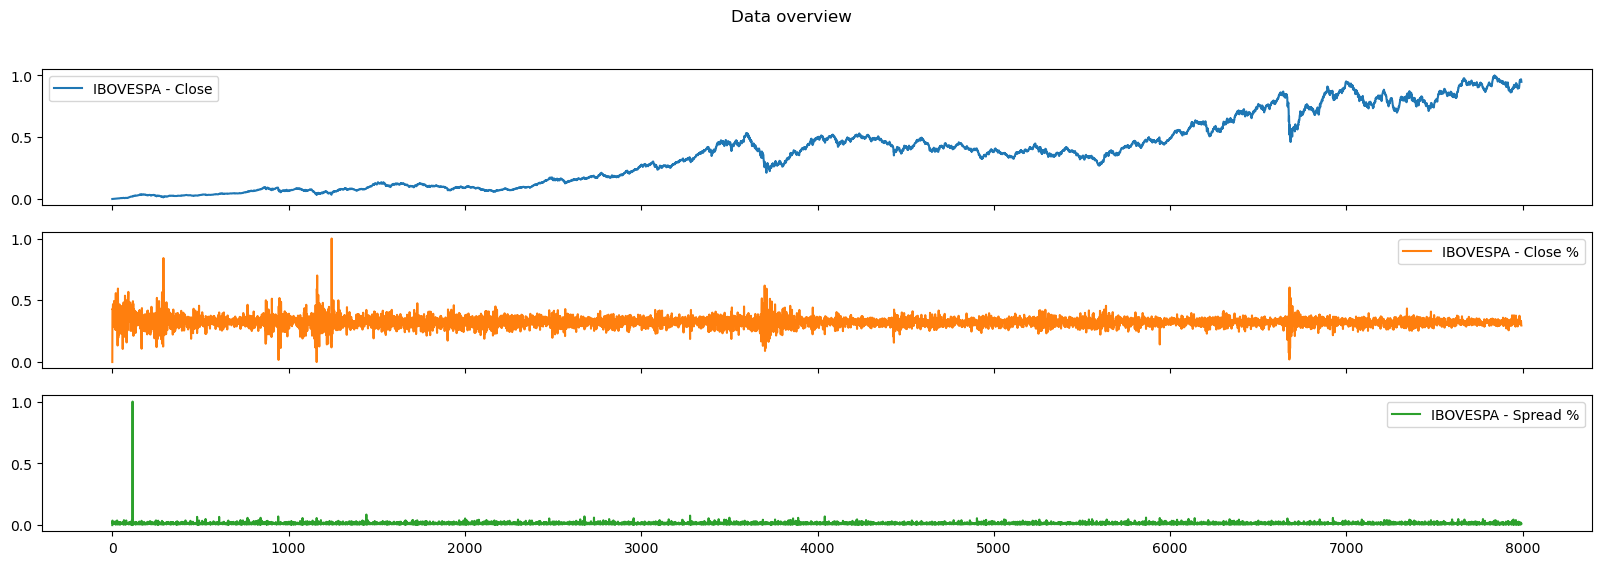

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

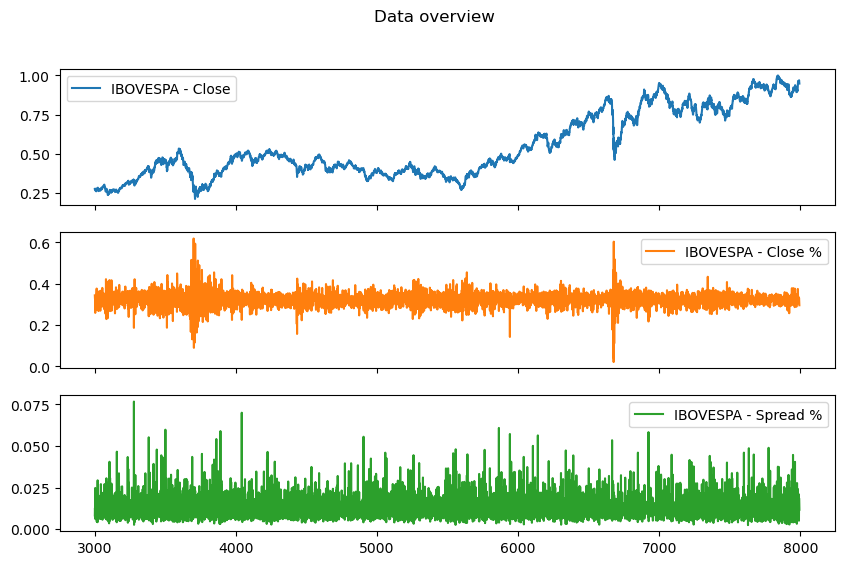

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

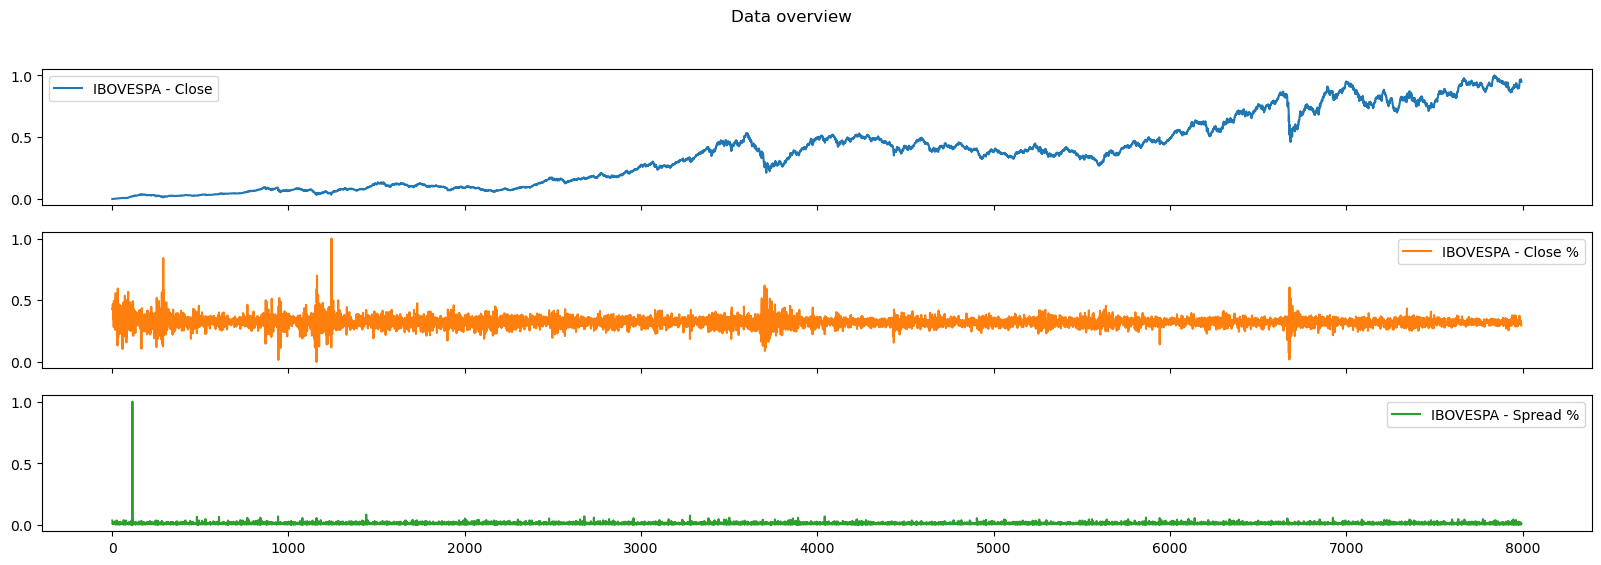

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

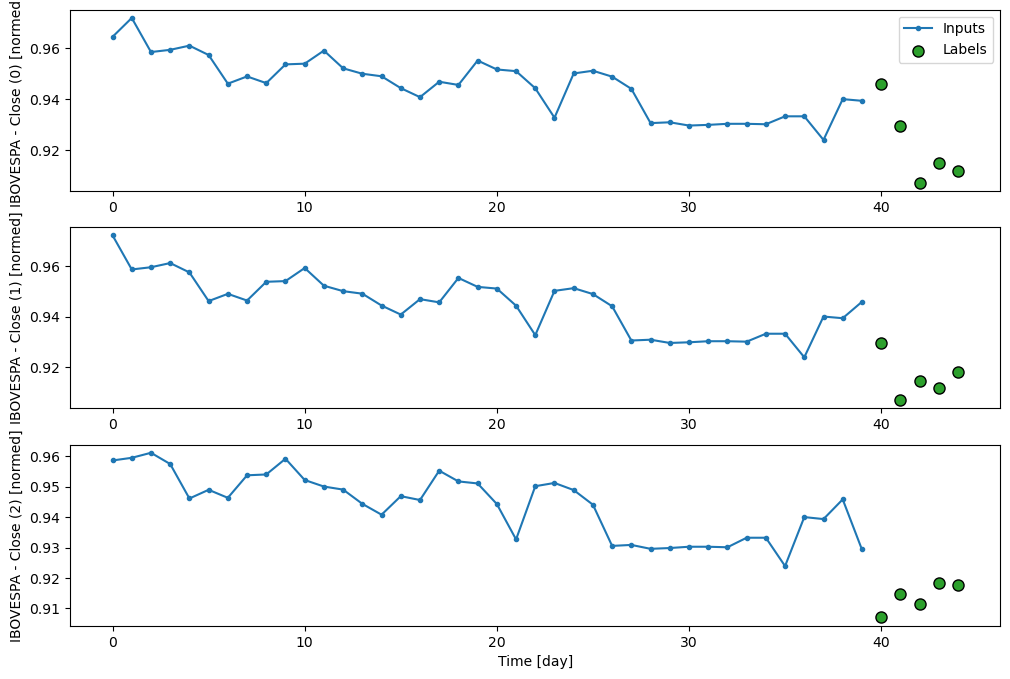

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

3

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13:40 3s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  2/237 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 124.4783 - mean_squared_error: 1.6179e-04 - root_mean_squared_error: 0.0120

  4/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 113.8279 - mean_squared_error: 1.8510e-04 - root_mean_squared_error: 0.0132

  6/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 102.3217 - mean_squared_error: 2.0257e-04 - root_mean_squared_error: 0.0139

  8/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 97.4142 - mean_squared_error: 2.3611e-04 - root_mean_squared_error: 0.0150 

 10/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 92.9576 - mean_squared_error: 2.4733e-04 - root_mean_squared_error: 0.0154

 12/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 88.5573 - mean_squared_error: 2.4779e-04 - root_mean_squared_error: 0.0155 

 14/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 84.3441 - mean_squared_error: 2.4352e-04 - root_mean_squared_error: 0.0154

 16/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 80.4416 - mean_squared_error: 2.3718e-04 - root_mean_squared_error: 0.0152

 18/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 76.8696 - mean_squared_error: 2.3012e-04 - root_mean_squared_error: 0.0150

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 73.6327 - mean_squared_error: 2.2298e-04 - root_mean_squared_error: 0.0147

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 70.6685 - mean_squared_error: 2.1591e-04 - root_mean_squared_error: 0.0145

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 68.0307 - mean_squared_error: 2.1005e-04 - root_mean_squared_error: 0.0143

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 65.7409 - mean_squared_error: 2.0741e-04 - root_mean_squared_error: 0.0142

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 62.7369 - mean_squared_error: 2.0620e-04 - root_mean_squared_error: 0.0142

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 61.0570 - mean_squared_error: 2.0838e-04 - root_mean_squared_error: 0.0143

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 59.4888 - mean_squared_error: 2.0984e-04 - root_mean_squared_error: 0.0143

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 58.0269 - mean_squared_error: 2.1075e-04 - root_mean_squared_error: 0.0144

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 56.7188 - mean_squared_error: 2.1174e-04 - root_mean_squared_error: 0.0144

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 55.5026 - mean_squared_error: 2.1251e-04 - root_mean_squared_error: 0.0144

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 54.3943 - mean_squared_error: 2.1391e-04 - root_mean_squared_error: 0.0145

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.3413 - mean_squared_error: 2.1488e-04 - root_mean_squared_error: 0.0145

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.3415 - mean_squared_error: 2.1559e-04 - root_mean_squared_error: 0.0146

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 51.4100 - mean_squared_error: 2.1723e-04 - root_mean_squared_error: 0.0146

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.5190 - mean_squared_error: 2.1871e-04 - root_mean_squared_error: 0.0147

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 49.6570 - mean_squared_error: 2.1972e-04 - root_mean_squared_error: 0.0147

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.8354 - mean_squared_error: 2.2056e-04 - root_mean_squared_error: 0.0147

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.0491 - mean_squared_error: 2.2125e-04 - root_mean_squared_error: 0.0148

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 47.2885 - mean_squared_error: 2.2161e-04 - root_mean_squared_error: 0.0148

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 46.5668 - mean_squared_error: 2.2197e-04 - root_mean_squared_error: 0.0148

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 45.8799 - mean_squared_error: 2.2231e-04 - root_mean_squared_error: 0.0148

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 44.9006 - mean_squared_error: 2.2255e-04 - root_mean_squared_error: 0.0148

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 44.2888 - mean_squared_error: 2.2269e-04 - root_mean_squared_error: 0.0148

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 43.7154 - mean_squared_error: 2.2295e-04 - root_mean_squared_error: 0.0148

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 43.1606 - mean_squared_error: 2.2305e-04 - root_mean_squared_error: 0.0149

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 42.6323 - mean_squared_error: 2.2323e-04 - root_mean_squared_error: 0.0149

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 42.1336 - mean_squared_error: 2.2375e-04 - root_mean_squared_error: 0.0149

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 41.6667 - mean_squared_error: 2.2535e-04 - root_mean_squared_error: 0.0149

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 41.2261 - mean_squared_error: 2.2813e-04 - root_mean_squared_error: 0.0150

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 40.8096 - mean_squared_error: 2.3182e-04 - root_mean_squared_error: 0.0151

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 40.4041 - mean_squared_error: 2.3530e-04 - root_mean_squared_error: 0.0152

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 40.0098 - mean_squared_error: 2.3858e-04 - root_mean_squared_error: 0.0153

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 39.6238 - mean_squared_error: 2.4159e-04 - root_mean_squared_error: 0.0154

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 39.4360 - mean_squared_error: 2.4320e-04 - root_mean_squared_error: 0.0155

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 39.0698 - mean_squared_error: 2.4648e-04 - root_mean_squared_error: 0.0156

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 38.7140 - mean_squared_error: 2.4978e-04 - root_mean_squared_error: 0.0157

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 38.3727 - mean_squared_error: 2.5411e-04 - root_mean_squared_error: 0.0158

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 37.8851 - mean_squared_error: 2.6252e-04 - root_mean_squared_error: 0.0160

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 37.5724 - mean_squared_error: 2.6846e-04 - root_mean_squared_error: 0.0162

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 37.2676 - mean_squared_error: 2.7445e-04 - root_mean_squared_error: 0.0163

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 36.8272 - mean_squared_error: 2.8437e-04 - root_mean_squared_error: 0.0166

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 36.5425 - mean_squared_error: 2.9159e-04 - root_mean_squared_error: 0.0167

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 36.1298 - mean_squared_error: 3.0421e-04 - root_mean_squared_error: 0.0170

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 35.7265 - mean_squared_error: 3.1602e-04 - root_mean_squared_error: 0.0173

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 35.4641 - mean_squared_error: 3.2395e-04 - root_mean_squared_error: 0.0175

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 35.0975 - mean_squared_error: 3.4405e-04 - root_mean_squared_error: 0.0179

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 34.8703 - mean_squared_error: 3.6144e-04 - root_mean_squared_error: 0.0182

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 34.6486 - mean_squared_error: 3.7875e-04 - root_mean_squared_error: 0.0185

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 34.4358 - mean_squared_error: 3.9839e-04 - root_mean_squared_error: 0.0189

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 34.2337 - mean_squared_error: 4.2438e-04 - root_mean_squared_error: 0.0193

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 34.0414 - mean_squared_error: 4.5667e-04 - root_mean_squared_error: 0.0198

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 33.8555 - mean_squared_error: 4.9119e-04 - root_mean_squared_error: 0.0203

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 33.6717 - mean_squared_error: 5.2441e-04 - root_mean_squared_error: 0.0208

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 33.4898 - mean_squared_error: 5.5625e-04 - root_mean_squared_error: 0.0212

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 33.2193 - mean_squared_error: 6.0128e-04 - root_mean_squared_error: 0.0219

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 33.0406 - mean_squared_error: 6.2960e-04 - root_mean_squared_error: 0.0223

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 32.8640 - mean_squared_error: 6.5673e-04 - root_mean_squared_error: 0.0227

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 32.6900 - mean_squared_error: 6.8295e-04 - root_mean_squared_error: 0.0231

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 32.5208 - mean_squared_error: 7.0981e-04 - root_mean_squared_error: 0.0235

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 32.3545 - mean_squared_error: 7.3617e-04 - root_mean_squared_error: 0.0239

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 32.1896 - mean_squared_error: 7.6139e-04 - root_mean_squared_error: 0.0242

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 32.0265 - mean_squared_error: 7.8558e-04 - root_mean_squared_error: 0.0246

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 31.8659 - mean_squared_error: 8.0900e-04 - root_mean_squared_error: 0.0249

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 31.7087 - mean_squared_error: 8.3201e-04 - root_mean_squared_error: 0.0253

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 31.5547 - mean_squared_error: 8.5458e-04 - root_mean_squared_error: 0.0256

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 31.4019 - mean_squared_error: 8.7617e-04 - root_mean_squared_error: 0.0259

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 31.1751 - mean_squared_error: 9.0691e-04 - root_mean_squared_error: 0.0264

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 31.0272 - mean_squared_error: 9.2682e-04 - root_mean_squared_error: 0.0266

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 30.8825 - mean_squared_error: 9.4662e-04 - root_mean_squared_error: 0.0269

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 30.7394 - mean_squared_error: 9.6567e-04 - root_mean_squared_error: 0.0272

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 30.5974 - mean_squared_error: 9.8395e-04 - root_mean_squared_error: 0.0275

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 30.4567 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0278    

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 30.3186 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0280

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 30.1838 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0283

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 30.0515 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0285

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 29.8561 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 29.7293 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 29.6054 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 29.4239 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 29.3051 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0299

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 29.1877 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0302

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 29.0135 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 28.9004 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 28.7892 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 28.6789 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 28.5701 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0314

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 28.4099 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 28.3046 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 28.2011 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 28.1020 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 27.9578 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 27.8630 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 27.7692 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 27.6767 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 27.6306 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0339

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 27.5394 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 27.4492 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 27.3596 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 27.3150 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 27.2706 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0350

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 27.2264 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0351

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 27.1825 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0352

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 27.0953 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 27.0085 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 26.9223 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 26.8372 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362 - val_loss: 0.0188 - val_mean_absolute_error: 0.0188 - val_mean_absolute_percentage_error: 1.9822 - val_mean_squared_error: 6.0483e-04 - val_root_mean_squared_error: 0.0246 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - loss: 0.6343 - mean_absolute_error: 0.6343 - mean_absolute_percentage_error: 8425.4756 - mean_squared_error: 0.4025 - root_mean_squared_error: 0.6344

  3/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.6353 - mean_absolute_error: 0.6353 - mean_absolute_percentage_error: 7040.7461 - mean_squared_error: 0.4038 - root_mean_squared_error: 0.6355

  5/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.6299 - mean_absolute_error: 0.6299 - mean_absolute_percentage_error: 5975.3203 - mean_squared_error: 0.3972 - root_mean_squared_error: 0.6302 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.6211 - mean_absolute_error: 0.6211 - mean_absolute_percentage_error: 5286.3945 - mean_squared_error: 0.3867 - root_mean_squared_error: 0.6217

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.6079 - mean_absolute_error: 0.6079 - mean_absolute_percentage_error: 4823.4087 - mean_squared_error: 0.3724 - root_mean_squared_error: 0.6097

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.6464 - mean_absolute_error: 0.6464 - mean_absolute_percentage_error: 4683.1182 - mean_squared_error: 0.5553 - root_mean_squared_error: 0.7122

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.6606 - mean_absolute_error: 0.6606 - mean_absolute_percentage_error: 4514.0664 - mean_squared_error: 0.6508 - root_mean_squared_error: 0.7695

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.6596 - mean_absolute_error: 0.6596 - mean_absolute_percentage_error: 4331.8467 - mean_squared_error: 0.6999 - root_mean_squared_error: 0.8015

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.6599 - mean_absolute_error: 0.6599 - mean_absolute_percentage_error: 4177.0234 - mean_squared_error: 0.7509 - root_mean_squared_error: 0.8319

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.6696 - mean_absolute_error: 0.6696 - mean_absolute_percentage_error: 4065.3335 - mean_squared_error: 0.8120 - root_mean_squared_error: 0.8658

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6757 - mean_absolute_error: 0.6757 - mean_absolute_percentage_error: 3957.8953 - mean_squared_error: 0.8541 - root_mean_squared_error: 0.8899

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6799 - mean_absolute_error: 0.6799 - mean_absolute_percentage_error: 3856.7649 - mean_squared_error: 0.8830 - root_mean_squared_error: 0.9073

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6804 - mean_absolute_error: 0.6804 - mean_absolute_percentage_error: 3755.9309 - mean_squared_error: 0.9000 - root_mean_squared_error: 0.9184

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6788 - mean_absolute_error: 0.6788 - mean_absolute_percentage_error: 3657.7603 - mean_squared_error: 0.9090 - root_mean_squared_error: 0.9253

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6749 - mean_absolute_error: 0.6749 - mean_absolute_percentage_error: 3562.2473 - mean_squared_error: 0.9119 - root_mean_squared_error: 0.9287

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6693 - mean_absolute_error: 0.6693 - mean_absolute_percentage_error: 3470.0759 - mean_squared_error: 0.9105 - root_mean_squared_error: 0.9297

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6627 - mean_absolute_error: 0.6627 - mean_absolute_percentage_error: 3381.8140 - mean_squared_error: 0.9060 - root_mean_squared_error: 0.9288

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6560 - mean_absolute_error: 0.6560 - mean_absolute_percentage_error: 3298.4114 - mean_squared_error: 0.8998 - root_mean_squared_error: 0.9267

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6490 - mean_absolute_error: 0.6490 - mean_absolute_percentage_error: 3219.3813 - mean_squared_error: 0.8919 - root_mean_squared_error: 0.9235

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6446 - mean_absolute_error: 0.6446 - mean_absolute_percentage_error: 3150.0342 - mean_squared_error: 0.8890 - root_mean_squared_error: 0.9230

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6399 - mean_absolute_error: 0.6399 - mean_absolute_percentage_error: 3083.9609 - mean_squared_error: 0.8848 - root_mean_squared_error: 0.9217

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.6365 - mean_absolute_error: 0.6365 - mean_absolute_percentage_error: 3022.6470 - mean_squared_error: 0.8811 - root_mean_squared_error: 0.9206

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.6337 - mean_absolute_error: 0.6337 - mean_absolute_percentage_error: 2964.9646 - mean_squared_error: 0.8772 - root_mean_squared_error: 0.9192

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6304 - mean_absolute_error: 0.6304 - mean_absolute_percentage_error: 2909.3479 - mean_squared_error: 0.8723 - root_mean_squared_error: 0.9173

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6272 - mean_absolute_error: 0.6272 - mean_absolute_percentage_error: 2856.1667 - mean_squared_error: 0.8668 - root_mean_squared_error: 0.9149

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6243 - mean_absolute_error: 0.6243 - mean_absolute_percentage_error: 2805.3640 - mean_squared_error: 0.8612 - root_mean_squared_error: 0.9124

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6213 - mean_absolute_error: 0.6213 - mean_absolute_percentage_error: 2756.6772 - mean_squared_error: 0.8551 - root_mean_squared_error: 0.9095

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6181 - mean_absolute_error: 0.6181 - mean_absolute_percentage_error: 2709.6736 - mean_squared_error: 0.8486 - root_mean_squared_error: 0.9063

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6128 - mean_absolute_error: 0.6128 - mean_absolute_percentage_error: 2642.3237 - mean_squared_error: 0.8382 - root_mean_squared_error: 0.9011

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6090 - mean_absolute_error: 0.6090 - mean_absolute_percentage_error: 2599.4448 - mean_squared_error: 0.8310 - root_mean_squared_error: 0.8974

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6071 - mean_absolute_error: 0.6071 - mean_absolute_percentage_error: 2578.5549 - mean_squared_error: 0.8274 - root_mean_squared_error: 0.8954

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6031 - mean_absolute_error: 0.6031 - mean_absolute_percentage_error: 2537.8523 - mean_squared_error: 0.8199 - root_mean_squared_error: 0.8915

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5990 - mean_absolute_error: 0.5990 - mean_absolute_percentage_error: 2498.5564 - mean_squared_error: 0.8124 - root_mean_squared_error: 0.8874

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5949 - mean_absolute_error: 0.5949 - mean_absolute_percentage_error: 2460.5854 - mean_squared_error: 0.8048 - root_mean_squared_error: 0.8832

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5906 - mean_absolute_error: 0.5906 - mean_absolute_percentage_error: 2423.8840 - mean_squared_error: 0.7972 - root_mean_squared_error: 0.8789

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5863 - mean_absolute_error: 0.5863 - mean_absolute_percentage_error: 2388.3838 - mean_squared_error: 0.7896 - root_mean_squared_error: 0.8746

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5842 - mean_absolute_error: 0.5842 - mean_absolute_percentage_error: 2371.0588 - mean_squared_error: 0.7858 - root_mean_squared_error: 0.8725

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5798 - mean_absolute_error: 0.5798 - mean_absolute_percentage_error: 2337.2065 - mean_squared_error: 0.7782 - root_mean_squared_error: 0.8681

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.5754 - mean_absolute_error: 0.5754 - mean_absolute_percentage_error: 2304.3760 - mean_squared_error: 0.7707 - root_mean_squared_error: 0.8637

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.5710 - mean_absolute_error: 0.5710 - mean_absolute_percentage_error: 2272.5266 - mean_squared_error: 0.7633 - root_mean_squared_error: 0.8593

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.5665 - mean_absolute_error: 0.5665 - mean_absolute_percentage_error: 2241.6211 - mean_squared_error: 0.7559 - root_mean_squared_error: 0.8550

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.5621 - mean_absolute_error: 0.5621 - mean_absolute_percentage_error: 2211.6206 - mean_squared_error: 0.7486 - root_mean_squared_error: 0.8506

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.5577 - mean_absolute_error: 0.5577 - mean_absolute_percentage_error: 2182.4919 - mean_squared_error: 0.7414 - root_mean_squared_error: 0.8462

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.5534 - mean_absolute_error: 0.5534 - mean_absolute_percentage_error: 2154.1953 - mean_squared_error: 0.7343 - root_mean_squared_error: 0.8419

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.5490 - mean_absolute_error: 0.5490 - mean_absolute_percentage_error: 2126.6965 - mean_squared_error: 0.7272 - root_mean_squared_error: 0.8376

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.5426 - mean_absolute_error: 0.5426 - mean_absolute_percentage_error: 2086.8733 - mean_squared_error: 0.7169 - root_mean_squared_error: 0.8312

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.5383 - mean_absolute_error: 0.5383 - mean_absolute_percentage_error: 2061.2312 - mean_squared_error: 0.7101 - root_mean_squared_error: 0.8269

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.5342 - mean_absolute_error: 0.5342 - mean_absolute_percentage_error: 2036.2759 - mean_squared_error: 0.7035 - root_mean_squared_error: 0.8228

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.5300 - mean_absolute_error: 0.5300 - mean_absolute_percentage_error: 2011.9879 - mean_squared_error: 0.6970 - root_mean_squared_error: 0.8186

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.5259 - mean_absolute_error: 0.5259 - mean_absolute_percentage_error: 1988.3365 - mean_squared_error: 0.6905 - root_mean_squared_error: 0.8145

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.5219 - mean_absolute_error: 0.5219 - mean_absolute_percentage_error: 1965.3029 - mean_squared_error: 0.6842 - root_mean_squared_error: 0.8104

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.5180 - mean_absolute_error: 0.5180 - mean_absolute_percentage_error: 1942.8605 - mean_squared_error: 0.6780 - root_mean_squared_error: 0.8064

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.5141 - mean_absolute_error: 0.5141 - mean_absolute_percentage_error: 1920.9832 - mean_squared_error: 0.6719 - root_mean_squared_error: 0.8024

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.5103 - mean_absolute_error: 0.5103 - mean_absolute_percentage_error: 1899.6511 - mean_squared_error: 0.6659 - root_mean_squared_error: 0.7985

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.5046 - mean_absolute_error: 0.5046 - mean_absolute_percentage_error: 1868.6261 - mean_squared_error: 0.6570 - root_mean_squared_error: 0.7927

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.5009 - mean_absolute_error: 0.5009 - mean_absolute_percentage_error: 1848.5663 - mean_squared_error: 0.6513 - root_mean_squared_error: 0.7889

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.4973 - mean_absolute_error: 0.4973 - mean_absolute_percentage_error: 1828.9843 - mean_squared_error: 0.6456 - root_mean_squared_error: 0.7851

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.4937 - mean_absolute_error: 0.4937 - mean_absolute_percentage_error: 1809.8754 - mean_squared_error: 0.6401 - root_mean_squared_error: 0.7814

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.4902 - mean_absolute_error: 0.4902 - mean_absolute_percentage_error: 1791.2167 - mean_squared_error: 0.6346 - root_mean_squared_error: 0.7777

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.4868 - mean_absolute_error: 0.4868 - mean_absolute_percentage_error: 1772.9900 - mean_squared_error: 0.6293 - root_mean_squared_error: 0.7741

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.4834 - mean_absolute_error: 0.4834 - mean_absolute_percentage_error: 1755.1855 - mean_squared_error: 0.6240 - root_mean_squared_error: 0.7705

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4802 - mean_absolute_error: 0.4802 - mean_absolute_percentage_error: 1737.7878 - mean_squared_error: 0.6189 - root_mean_squared_error: 0.7670

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4770 - mean_absolute_error: 0.4770 - mean_absolute_percentage_error: 1720.7780 - mean_squared_error: 0.6138 - root_mean_squared_error: 0.7635

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4723 - mean_absolute_error: 0.4723 - mean_absolute_percentage_error: 1695.9584 - mean_squared_error: 0.6064 - root_mean_squared_error: 0.7584

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4693 - mean_absolute_error: 0.4693 - mean_absolute_percentage_error: 1679.8624 - mean_squared_error: 0.6016 - root_mean_squared_error: 0.7550

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4648 - mean_absolute_error: 0.4648 - mean_absolute_percentage_error: 1656.3596 - mean_squared_error: 0.5945 - root_mean_squared_error: 0.7500

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4619 - mean_absolute_error: 0.4619 - mean_absolute_percentage_error: 1641.0988 - mean_squared_error: 0.5898 - root_mean_squared_error: 0.7468

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4590 - mean_absolute_error: 0.4590 - mean_absolute_percentage_error: 1626.1519 - mean_squared_error: 0.5853 - root_mean_squared_error: 0.7435

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4562 - mean_absolute_error: 0.4562 - mean_absolute_percentage_error: 1611.5085 - mean_squared_error: 0.5808 - root_mean_squared_error: 0.7404

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4534 - mean_absolute_error: 0.4534 - mean_absolute_percentage_error: 1597.1593 - mean_squared_error: 0.5764 - root_mean_squared_error: 0.7372

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4506 - mean_absolute_error: 0.4506 - mean_absolute_percentage_error: 1583.0959 - mean_squared_error: 0.5720 - root_mean_squared_error: 0.7341

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4479 - mean_absolute_error: 0.4479 - mean_absolute_percentage_error: 1569.3136 - mean_squared_error: 0.5678 - root_mean_squared_error: 0.7310

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4452 - mean_absolute_error: 0.4452 - mean_absolute_percentage_error: 1555.8008 - mean_squared_error: 0.5636 - root_mean_squared_error: 0.7280

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4426 - mean_absolute_error: 0.4426 - mean_absolute_percentage_error: 1542.5486 - mean_squared_error: 0.5594 - root_mean_squared_error: 0.7250

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4399 - mean_absolute_error: 0.4399 - mean_absolute_percentage_error: 1529.5493 - mean_squared_error: 0.5553 - root_mean_squared_error: 0.7221

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4374 - mean_absolute_error: 0.4374 - mean_absolute_percentage_error: 1516.7958 - mean_squared_error: 0.5513 - root_mean_squared_error: 0.7191

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4348 - mean_absolute_error: 0.4348 - mean_absolute_percentage_error: 1504.2798 - mean_squared_error: 0.5474 - root_mean_squared_error: 0.7162

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4323 - mean_absolute_error: 0.4323 - mean_absolute_percentage_error: 1491.9945 - mean_squared_error: 0.5435 - root_mean_squared_error: 0.7134

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4298 - mean_absolute_error: 0.4298 - mean_absolute_percentage_error: 1479.9341 - mean_squared_error: 0.5397 - root_mean_squared_error: 0.7106

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4273 - mean_absolute_error: 0.4273 - mean_absolute_percentage_error: 1468.0933 - mean_squared_error: 0.5359 - root_mean_squared_error: 0.7078

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4249 - mean_absolute_error: 0.4249 - mean_absolute_percentage_error: 1456.4653 - mean_squared_error: 0.5322 - root_mean_squared_error: 0.7050

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4225 - mean_absolute_error: 0.4225 - mean_absolute_percentage_error: 1445.0452 - mean_squared_error: 0.5286 - root_mean_squared_error: 0.7023

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.4202 - mean_absolute_error: 0.4202 - mean_absolute_percentage_error: 1433.8269 - mean_squared_error: 0.5250 - root_mean_squared_error: 0.6996

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.4178 - mean_absolute_error: 0.4178 - mean_absolute_percentage_error: 1422.8031 - mean_squared_error: 0.5214 - root_mean_squared_error: 0.6969

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.4155 - mean_absolute_error: 0.4155 - mean_absolute_percentage_error: 1411.9690 - mean_squared_error: 0.5179 - root_mean_squared_error: 0.6943

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.4121 - mean_absolute_error: 0.4121 - mean_absolute_percentage_error: 1396.0629 - mean_squared_error: 0.5128 - root_mean_squared_error: 0.6904

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.4099 - mean_absolute_error: 0.4099 - mean_absolute_percentage_error: 1385.6831 - mean_squared_error: 0.5094 - root_mean_squared_error: 0.6878

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.4077 - mean_absolute_error: 0.4077 - mean_absolute_percentage_error: 1375.4772 - mean_squared_error: 0.5061 - root_mean_squared_error: 0.6853

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.4055 - mean_absolute_error: 0.4055 - mean_absolute_percentage_error: 1365.4397 - mean_squared_error: 0.5028 - root_mean_squared_error: 0.6828

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.4034 - mean_absolute_error: 0.4034 - mean_absolute_percentage_error: 1355.5673 - mean_squared_error: 0.4996 - root_mean_squared_error: 0.6803

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.4002 - mean_absolute_error: 0.4002 - mean_absolute_percentage_error: 1341.0582 - mean_squared_error: 0.4949 - root_mean_squared_error: 0.6766

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3981 - mean_absolute_error: 0.3981 - mean_absolute_percentage_error: 1331.5797 - mean_squared_error: 0.4918 - root_mean_squared_error: 0.6742

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3961 - mean_absolute_error: 0.3961 - mean_absolute_percentage_error: 1322.2531 - mean_squared_error: 0.4887 - root_mean_squared_error: 0.6718

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3941 - mean_absolute_error: 0.3941 - mean_absolute_percentage_error: 1313.0746 - mean_squared_error: 0.4857 - root_mean_squared_error: 0.6695

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3921 - mean_absolute_error: 0.3921 - mean_absolute_percentage_error: 1304.0396 - mean_squared_error: 0.4827 - root_mean_squared_error: 0.6672

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3901 - mean_absolute_error: 0.3901 - mean_absolute_percentage_error: 1295.1445 - mean_squared_error: 0.4798 - root_mean_squared_error: 0.6649

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3882 - mean_absolute_error: 0.3882 - mean_absolute_percentage_error: 1286.3854 - mean_squared_error: 0.4769 - root_mean_squared_error: 0.6626

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3863 - mean_absolute_error: 0.3863 - mean_absolute_percentage_error: 1277.7593 - mean_squared_error: 0.4740 - root_mean_squared_error: 0.6603

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3844 - mean_absolute_error: 0.3844 - mean_absolute_percentage_error: 1269.2628 - mean_squared_error: 0.4712 - root_mean_squared_error: 0.6581

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3835 - mean_absolute_error: 0.3835 - mean_absolute_percentage_error: 1265.0623 - mean_squared_error: 0.4698 - root_mean_squared_error: 0.6570

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3816 - mean_absolute_error: 0.3816 - mean_absolute_percentage_error: 1256.7544 - mean_squared_error: 0.4670 - root_mean_squared_error: 0.6548

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3798 - mean_absolute_error: 0.3798 - mean_absolute_percentage_error: 1248.5687 - mean_squared_error: 0.4643 - root_mean_squared_error: 0.6526

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3780 - mean_absolute_error: 0.3780 - mean_absolute_percentage_error: 1240.5055 - mean_squared_error: 0.4616 - root_mean_squared_error: 0.6504

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3762 - mean_absolute_error: 0.3762 - mean_absolute_percentage_error: 1232.5603 - mean_squared_error: 0.4589 - root_mean_squared_error: 0.6483

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3744 - mean_absolute_error: 0.3744 - mean_absolute_percentage_error: 1224.7294 - mean_squared_error: 0.4563 - root_mean_squared_error: 0.6462

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3727 - mean_absolute_error: 0.3727 - mean_absolute_percentage_error: 1217.0109 - mean_squared_error: 0.4537 - root_mean_squared_error: 0.6441

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3710 - mean_absolute_error: 0.3710 - mean_absolute_percentage_error: 1209.4027 - mean_squared_error: 0.4512 - root_mean_squared_error: 0.6421

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3702 - mean_absolute_error: 0.3702 - mean_absolute_percentage_error: 1205.6393 - mean_squared_error: 0.4499 - root_mean_squared_error: 0.6411

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3685 - mean_absolute_error: 0.3685 - mean_absolute_percentage_error: 1198.1918 - mean_squared_error: 0.4474 - root_mean_squared_error: 0.6390

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3677 - mean_absolute_error: 0.3677 - mean_absolute_percentage_error: 1194.5068 - mean_squared_error: 0.4462 - root_mean_squared_error: 0.6380

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3669 - mean_absolute_error: 0.3669 - mean_absolute_percentage_error: 1190.8475 - mean_squared_error: 0.4450 - root_mean_squared_error: 0.6370

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3653 - mean_absolute_error: 0.3653 - mean_absolute_percentage_error: 1183.6044 - mean_squared_error: 0.4425 - root_mean_squared_error: 0.6350

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3637 - mean_absolute_error: 0.3637 - mean_absolute_percentage_error: 1176.4600 - mean_squared_error: 0.4401 - root_mean_squared_error: 0.6331

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3613 - mean_absolute_error: 0.3613 - mean_absolute_percentage_error: 1165.9246 - mean_squared_error: 0.4366 - root_mean_squared_error: 0.6302

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3597 - mean_absolute_error: 0.3597 - mean_absolute_percentage_error: 1159.0184 - mean_squared_error: 0.4342 - root_mean_squared_error: 0.6282

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3582 - mean_absolute_error: 0.3582 - mean_absolute_percentage_error: 1152.2041 - mean_squared_error: 0.4319 - root_mean_squared_error: 0.6263

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3567 - mean_absolute_error: 0.3567 - mean_absolute_percentage_error: 1145.4797 - mean_squared_error: 0.4296 - root_mean_squared_error: 0.6245

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3552 - mean_absolute_error: 0.3552 - mean_absolute_percentage_error: 1138.8485 - mean_squared_error: 0.4274 - root_mean_squared_error: 0.6226

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.3544 - mean_absolute_error: 0.3544 - mean_absolute_percentage_error: 1135.5741 - mean_squared_error: 0.4263 - root_mean_squared_error: 0.6217 - val_loss: 0.0793 - val_mean_absolute_error: 0.0793 - val_mean_absolute_percentage_error: 8.3844 - val_mean_squared_error: 0.0073 - val_root_mean_squared_error: 0.0856 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - loss: 0.8932 - mean_absolute_error: 0.8932 - mean_absolute_percentage_error: 11855.4404 - mean_squared_error: 0.7983 - root_mean_squared_error: 0.8935

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.8889 - mean_absolute_error: 0.8889 - mean_absolute_percentage_error: 9873.1191 - mean_squared_error: 0.7908 - root_mean_squared_error: 0.8893  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8779 - mean_absolute_error: 0.8779 - mean_absolute_percentage_error: 8363.6680 - mean_squared_error: 0.7719 - root_mean_squared_error: 0.8785

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.8625 - mean_absolute_error: 0.8625 - mean_absolute_percentage_error: 7386.1411 - mean_squared_error: 0.7467 - root_mean_squared_error: 0.8637

  8/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.8533 - mean_absolute_error: 0.8533 - mean_absolute_percentage_error: 7033.9565 - mean_squared_error: 0.7323 - root_mean_squared_error: 0.8551

 10/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.8319 - mean_absolute_error: 0.8319 - mean_absolute_percentage_error: 6468.5747 - mean_squared_error: 0.7009 - root_mean_squared_error: 0.8357

 12/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.8065 - mean_absolute_error: 0.8065 - mean_absolute_percentage_error: 6009.4629 - mean_squared_error: 0.6672 - root_mean_squared_error: 0.8141

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.7923 - mean_absolute_error: 0.7923 - mean_absolute_percentage_error: 5805.2305 - mean_squared_error: 0.6500 - root_mean_squared_error: 0.8028

 14/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.7771 - mean_absolute_error: 0.7771 - mean_absolute_percentage_error: 5613.7935 - mean_squared_error: 0.6331 - root_mean_squared_error: 0.7913

 16/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.7469 - mean_absolute_error: 0.7469 - mean_absolute_percentage_error: 5269.2310 - mean_squared_error: 0.6008 - root_mean_squared_error: 0.7689

 18/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7194 - mean_absolute_error: 0.7194 - mean_absolute_percentage_error: 4972.6719 - mean_squared_error: 0.5716 - root_mean_squared_error: 0.7481

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6950 - mean_absolute_error: 0.6950 - mean_absolute_percentage_error: 4715.0938 - mean_squared_error: 0.5455 - root_mean_squared_error: 0.7290

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6837 - mean_absolute_error: 0.6837 - mean_absolute_percentage_error: 4598.2441 - mean_squared_error: 0.5334 - root_mean_squared_error: 0.7200

 22/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.6728 - mean_absolute_error: 0.6728 - mean_absolute_percentage_error: 4488.0845 - mean_squared_error: 0.5219 - root_mean_squared_error: 0.7113

 24/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.6519 - mean_absolute_error: 0.6519 - mean_absolute_percentage_error: 4284.6855 - mean_squared_error: 0.5003 - root_mean_squared_error: 0.6947

 26/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.6320 - mean_absolute_error: 0.6320 - mean_absolute_percentage_error: 4100.6064 - mean_squared_error: 0.4805 - root_mean_squared_error: 0.6792

 27/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.6226 - mean_absolute_error: 0.6226 - mean_absolute_percentage_error: 4015.1208 - mean_squared_error: 0.4712 - root_mean_squared_error: 0.6718

 28/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.6135 - mean_absolute_error: 0.6135 - mean_absolute_percentage_error: 3933.6567 - mean_squared_error: 0.4623 - root_mean_squared_error: 0.6646

 30/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.5964 - mean_absolute_error: 0.5964 - mean_absolute_percentage_error: 3781.8972 - mean_squared_error: 0.4456 - root_mean_squared_error: 0.6510

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.5804 - mean_absolute_error: 0.5804 - mean_absolute_percentage_error: 3643.1111 - mean_squared_error: 0.4302 - root_mean_squared_error: 0.6382

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.5653 - mean_absolute_error: 0.5653 - mean_absolute_percentage_error: 3515.3911 - mean_squared_error: 0.4159 - root_mean_squared_error: 0.6261

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.5509 - mean_absolute_error: 0.5509 - mean_absolute_percentage_error: 3397.4739 - mean_squared_error: 0.4026 - root_mean_squared_error: 0.6147

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.5374 - mean_absolute_error: 0.5374 - mean_absolute_percentage_error: 3288.3572 - mean_squared_error: 0.3903 - root_mean_squared_error: 0.6039

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.5246 - mean_absolute_error: 0.5246 - mean_absolute_percentage_error: 3186.9734 - mean_squared_error: 0.3787 - root_mean_squared_error: 0.5937

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5124 - mean_absolute_error: 0.5124 - mean_absolute_percentage_error: 3092.4338 - mean_squared_error: 0.3679 - root_mean_squared_error: 0.5839

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5009 - mean_absolute_error: 0.5009 - mean_absolute_percentage_error: 3004.1108 - mean_squared_error: 0.3578 - root_mean_squared_error: 0.5747

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4899 - mean_absolute_error: 0.4899 - mean_absolute_percentage_error: 2921.3340 - mean_squared_error: 0.3482 - root_mean_squared_error: 0.5659

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4794 - mean_absolute_error: 0.4794 - mean_absolute_percentage_error: 2843.5474 - mean_squared_error: 0.3393 - root_mean_squared_error: 0.5575

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4695 - mean_absolute_error: 0.4695 - mean_absolute_percentage_error: 2770.2917 - mean_squared_error: 0.3308 - root_mean_squared_error: 0.5495

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4599 - mean_absolute_error: 0.4599 - mean_absolute_percentage_error: 2701.1777 - mean_squared_error: 0.3228 - root_mean_squared_error: 0.5418

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4508 - mean_absolute_error: 0.4508 - mean_absolute_percentage_error: 2635.8586 - mean_squared_error: 0.3152 - root_mean_squared_error: 0.5344

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4378 - mean_absolute_error: 0.4378 - mean_absolute_percentage_error: 2544.2961 - mean_squared_error: 0.3045 - root_mean_squared_error: 0.5240

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4296 - mean_absolute_error: 0.4296 - mean_absolute_percentage_error: 2487.1450 - mean_squared_error: 0.2978 - root_mean_squared_error: 0.5174

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4218 - mean_absolute_error: 0.4218 - mean_absolute_percentage_error: 2432.8328 - mean_squared_error: 0.2915 - root_mean_squared_error: 0.5110

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4143 - mean_absolute_error: 0.4143 - mean_absolute_percentage_error: 2381.1475 - mean_squared_error: 0.2855 - root_mean_squared_error: 0.5048

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4071 - mean_absolute_error: 0.4071 - mean_absolute_percentage_error: 2331.8970 - mean_squared_error: 0.2797 - root_mean_squared_error: 0.4989

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4002 - mean_absolute_error: 0.4002 - mean_absolute_percentage_error: 2284.9236 - mean_squared_error: 0.2742 - root_mean_squared_error: 0.4932

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3935 - mean_absolute_error: 0.3935 - mean_absolute_percentage_error: 2240.0498 - mean_squared_error: 0.2689 - root_mean_squared_error: 0.4877

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3871 - mean_absolute_error: 0.3871 - mean_absolute_percentage_error: 2197.1357 - mean_squared_error: 0.2638 - root_mean_squared_error: 0.4824

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3840 - mean_absolute_error: 0.3840 - mean_absolute_percentage_error: 2176.3687 - mean_squared_error: 0.2614 - root_mean_squared_error: 0.4798

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3779 - mean_absolute_error: 0.3779 - mean_absolute_percentage_error: 2136.1406 - mean_squared_error: 0.2566 - root_mean_squared_error: 0.4748

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3721 - mean_absolute_error: 0.3721 - mean_absolute_percentage_error: 2097.5574 - mean_squared_error: 0.2521 - root_mean_squared_error: 0.4699

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3665 - mean_absolute_error: 0.3665 - mean_absolute_percentage_error: 2060.5166 - mean_squared_error: 0.2477 - root_mean_squared_error: 0.4652

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3611 - mean_absolute_error: 0.3611 - mean_absolute_percentage_error: 2024.9270 - mean_squared_error: 0.2435 - root_mean_squared_error: 0.4606

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3558 - mean_absolute_error: 0.3558 - mean_absolute_percentage_error: 1990.7006 - mean_squared_error: 0.2395 - root_mean_squared_error: 0.4562

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3507 - mean_absolute_error: 0.3507 - mean_absolute_percentage_error: 1957.7555 - mean_squared_error: 0.2356 - root_mean_squared_error: 0.4518

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3459 - mean_absolute_error: 0.3459 - mean_absolute_percentage_error: 1926.0179 - mean_squared_error: 0.2318 - root_mean_squared_error: 0.4477

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3411 - mean_absolute_error: 0.3411 - mean_absolute_percentage_error: 1895.4227 - mean_squared_error: 0.2282 - root_mean_squared_error: 0.4436

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3365 - mean_absolute_error: 0.3365 - mean_absolute_percentage_error: 1865.9083 - mean_squared_error: 0.2247 - root_mean_squared_error: 0.4396

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3321 - mean_absolute_error: 0.3321 - mean_absolute_percentage_error: 1837.4108 - mean_squared_error: 0.2213 - root_mean_squared_error: 0.4358

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3278 - mean_absolute_error: 0.3278 - mean_absolute_percentage_error: 1809.8805 - mean_squared_error: 0.2180 - root_mean_squared_error: 0.4321

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3237 - mean_absolute_error: 0.3237 - mean_absolute_percentage_error: 1783.2651 - mean_squared_error: 0.2149 - root_mean_squared_error: 0.4284

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3197 - mean_absolute_error: 0.3197 - mean_absolute_percentage_error: 1757.5183 - mean_squared_error: 0.2118 - root_mean_squared_error: 0.4249

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3158 - mean_absolute_error: 0.3158 - mean_absolute_percentage_error: 1732.5946 - mean_squared_error: 0.2088 - root_mean_squared_error: 0.4214

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3120 - mean_absolute_error: 0.3120 - mean_absolute_percentage_error: 1708.4530 - mean_squared_error: 0.2060 - root_mean_squared_error: 0.4181

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3083 - mean_absolute_error: 0.3083 - mean_absolute_percentage_error: 1685.0565 - mean_squared_error: 0.2032 - root_mean_squared_error: 0.4148

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3047 - mean_absolute_error: 0.3047 - mean_absolute_percentage_error: 1662.3693 - mean_squared_error: 0.2005 - root_mean_squared_error: 0.4116

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3012 - mean_absolute_error: 0.3012 - mean_absolute_percentage_error: 1640.3575 - mean_squared_error: 0.1979 - root_mean_squared_error: 0.4085

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2979 - mean_absolute_error: 0.2979 - mean_absolute_percentage_error: 1618.9921 - mean_squared_error: 0.1953 - root_mean_squared_error: 0.4054

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2930 - mean_absolute_error: 0.2930 - mean_absolute_percentage_error: 1588.0907 - mean_squared_error: 0.1916 - root_mean_squared_error: 0.4010

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 1568.2219 - mean_squared_error: 0.1893 - root_mean_squared_error: 0.3981

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1548.9160 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.3953

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2839 - mean_absolute_error: 0.2839 - mean_absolute_percentage_error: 1530.1399 - mean_squared_error: 0.1848 - root_mean_squared_error: 0.3926

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2825 - mean_absolute_error: 0.2825 - mean_absolute_percentage_error: 1520.9437 - mean_squared_error: 0.1837 - root_mean_squared_error: 0.3912

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2797 - mean_absolute_error: 0.2797 - mean_absolute_percentage_error: 1502.9243 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.3886

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2770 - mean_absolute_error: 0.2770 - mean_absolute_percentage_error: 1485.3870 - mean_squared_error: 0.1794 - root_mean_squared_error: 0.3860

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2744 - mean_absolute_error: 0.2744 - mean_absolute_percentage_error: 1468.3112 - mean_squared_error: 0.1774 - root_mean_squared_error: 0.3836

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2719 - mean_absolute_error: 0.2719 - mean_absolute_percentage_error: 1451.6758 - mean_squared_error: 0.1755 - root_mean_squared_error: 0.3811

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2695 - mean_absolute_error: 0.2695 - mean_absolute_percentage_error: 1435.4594 - mean_squared_error: 0.1736 - root_mean_squared_error: 0.3788

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2671 - mean_absolute_error: 0.2671 - mean_absolute_percentage_error: 1419.6437 - mean_squared_error: 0.1717 - root_mean_squared_error: 0.3764

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2648 - mean_absolute_error: 0.2648 - mean_absolute_percentage_error: 1404.2159 - mean_squared_error: 0.1699 - root_mean_squared_error: 0.3741

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2626 - mean_absolute_error: 0.2626 - mean_absolute_percentage_error: 1389.1636 - mean_squared_error: 0.1681 - root_mean_squared_error: 0.3719

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2604 - mean_absolute_error: 0.2604 - mean_absolute_percentage_error: 1374.4749 - mean_squared_error: 0.1664 - root_mean_squared_error: 0.3697

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2583 - mean_absolute_error: 0.2583 - mean_absolute_percentage_error: 1360.1368 - mean_squared_error: 0.1647 - root_mean_squared_error: 0.3676

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2563 - mean_absolute_error: 0.2563 - mean_absolute_percentage_error: 1346.1321 - mean_squared_error: 0.1631 - root_mean_squared_error: 0.3655

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2543 - mean_absolute_error: 0.2543 - mean_absolute_percentage_error: 1332.4465 - mean_squared_error: 0.1615 - root_mean_squared_error: 0.3635

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2523 - mean_absolute_error: 0.2523 - mean_absolute_percentage_error: 1319.0687 - mean_squared_error: 0.1599 - root_mean_squared_error: 0.3615

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2513 - mean_absolute_error: 0.2513 - mean_absolute_percentage_error: 1312.4924 - mean_squared_error: 0.1591 - root_mean_squared_error: 0.3605

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2494 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 1299.5583 - mean_squared_error: 0.1576 - root_mean_squared_error: 0.3585

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2485 - mean_absolute_error: 0.2485 - mean_absolute_percentage_error: 1293.1979 - mean_squared_error: 0.1569 - root_mean_squared_error: 0.3575

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2476 - mean_absolute_error: 0.2476 - mean_absolute_percentage_error: 1286.9067 - mean_squared_error: 0.1561 - root_mean_squared_error: 0.3566

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2457 - mean_absolute_error: 0.2457 - mean_absolute_percentage_error: 1274.5286 - mean_squared_error: 0.1547 - root_mean_squared_error: 0.3547

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 1262.4159 - mean_squared_error: 0.1532 - root_mean_squared_error: 0.3528

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2422 - mean_absolute_error: 0.2422 - mean_absolute_percentage_error: 1250.5579 - mean_squared_error: 0.1518 - root_mean_squared_error: 0.3510

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2404 - mean_absolute_error: 0.2404 - mean_absolute_percentage_error: 1238.9462 - mean_squared_error: 0.1505 - root_mean_squared_error: 0.3492

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2388 - mean_absolute_error: 0.2388 - mean_absolute_percentage_error: 1227.5746 - mean_squared_error: 0.1491 - root_mean_squared_error: 0.3474

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2371 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 1216.4368 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3457

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 1205.5239 - mean_squared_error: 0.1465 - root_mean_squared_error: 0.3440

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2339 - mean_absolute_error: 0.2339 - mean_absolute_percentage_error: 1194.8278 - mean_squared_error: 0.1453 - root_mean_squared_error: 0.3423

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 1184.3413 - mean_squared_error: 0.1440 - root_mean_squared_error: 0.3406

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2308 - mean_absolute_error: 0.2308 - mean_absolute_percentage_error: 1174.0592 - mean_squared_error: 0.1428 - root_mean_squared_error: 0.3390

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2292 - mean_absolute_error: 0.2292 - mean_absolute_percentage_error: 1163.9753 - mean_squared_error: 0.1416 - root_mean_squared_error: 0.3374

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2278 - mean_absolute_error: 0.2278 - mean_absolute_percentage_error: 1154.0839 - mean_squared_error: 0.1405 - root_mean_squared_error: 0.3358

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2263 - mean_absolute_error: 0.2263 - mean_absolute_percentage_error: 1144.3804 - mean_squared_error: 0.1393 - root_mean_squared_error: 0.3342

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2249 - mean_absolute_error: 0.2249 - mean_absolute_percentage_error: 1134.8604 - mean_squared_error: 0.1382 - root_mean_squared_error: 0.3327

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2235 - mean_absolute_error: 0.2235 - mean_absolute_percentage_error: 1125.5188 - mean_squared_error: 0.1371 - root_mean_squared_error: 0.3312

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2221 - mean_absolute_error: 0.2221 - mean_absolute_percentage_error: 1116.3499 - mean_squared_error: 0.1360 - root_mean_squared_error: 0.3297

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2208 - mean_absolute_error: 0.2208 - mean_absolute_percentage_error: 1107.3473 - mean_squared_error: 0.1350 - root_mean_squared_error: 0.3282

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2201 - mean_absolute_error: 0.2201 - mean_absolute_percentage_error: 1102.9064 - mean_squared_error: 0.1344 - root_mean_squared_error: 0.3275

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2195 - mean_absolute_error: 0.2195 - mean_absolute_percentage_error: 1098.5051 - mean_squared_error: 0.1339 - root_mean_squared_error: 0.3268

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2182 - mean_absolute_error: 0.2182 - mean_absolute_percentage_error: 1089.8190 - mean_squared_error: 0.1329 - root_mean_squared_error: 0.3254

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2169 - mean_absolute_error: 0.2169 - mean_absolute_percentage_error: 1081.2848 - mean_squared_error: 0.1319 - root_mean_squared_error: 0.3240

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2157 - mean_absolute_error: 0.2157 - mean_absolute_percentage_error: 1072.8982 - mean_squared_error: 0.1309 - root_mean_squared_error: 0.3226

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2144 - mean_absolute_error: 0.2144 - mean_absolute_percentage_error: 1064.6564 - mean_squared_error: 0.1299 - root_mean_squared_error: 0.3213

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2138 - mean_absolute_error: 0.2138 - mean_absolute_percentage_error: 1060.5883 - mean_squared_error: 0.1295 - root_mean_squared_error: 0.3206

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2132 - mean_absolute_error: 0.2132 - mean_absolute_percentage_error: 1056.5547 - mean_squared_error: 0.1290 - root_mean_squared_error: 0.3199

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2120 - mean_absolute_error: 0.2120 - mean_absolute_percentage_error: 1048.5898 - mean_squared_error: 0.1280 - root_mean_squared_error: 0.3186

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2114 - mean_absolute_error: 0.2114 - mean_absolute_percentage_error: 1044.6576 - mean_squared_error: 0.1276 - root_mean_squared_error: 0.3179

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2108 - mean_absolute_error: 0.2108 - mean_absolute_percentage_error: 1040.7584 - mean_squared_error: 0.1271 - root_mean_squared_error: 0.3173

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2103 - mean_absolute_error: 0.2103 - mean_absolute_percentage_error: 1036.8916 - mean_squared_error: 0.1267 - root_mean_squared_error: 0.3166

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2097 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 1033.0569 - mean_squared_error: 0.1262 - root_mean_squared_error: 0.3160

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2086 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 1025.4817 - mean_squared_error: 0.1253 - root_mean_squared_error: 0.3147

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2075 - mean_absolute_error: 0.2075 - mean_absolute_percentage_error: 1018.0296 - mean_squared_error: 0.1244 - root_mean_squared_error: 0.3135

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2064 - mean_absolute_error: 0.2064 - mean_absolute_percentage_error: 1010.6998 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3123

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2053 - mean_absolute_error: 0.2053 - mean_absolute_percentage_error: 1003.4890 - mean_squared_error: 0.1227 - root_mean_squared_error: 0.3111

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2043 - mean_absolute_error: 0.2043 - mean_absolute_percentage_error: 996.3934 - mean_squared_error: 0.1219 - root_mean_squared_error: 0.3099 

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2033 - mean_absolute_error: 0.2033 - mean_absolute_percentage_error: 989.4091 - mean_squared_error: 0.1211 - root_mean_squared_error: 0.3087

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2023 - mean_absolute_error: 0.2023 - mean_absolute_percentage_error: 982.5328 - mean_squared_error: 0.1203 - root_mean_squared_error: 0.3076

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2013 - mean_absolute_error: 0.2013 - mean_absolute_percentage_error: 975.7626 - mean_squared_error: 0.1195 - root_mean_squared_error: 0.3064

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2004 - mean_absolute_error: 0.2004 - mean_absolute_percentage_error: 969.0956 - mean_squared_error: 0.1187 - root_mean_squared_error: 0.3053

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1994 - mean_absolute_error: 0.1994 - mean_absolute_percentage_error: 962.5293 - mean_squared_error: 0.1179 - root_mean_squared_error: 0.3042

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1985 - mean_absolute_error: 0.1985 - mean_absolute_percentage_error: 956.0613 - mean_squared_error: 0.1172 - root_mean_squared_error: 0.3031

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1975 - mean_absolute_error: 0.1975 - mean_absolute_percentage_error: 949.6894 - mean_squared_error: 0.1164 - root_mean_squared_error: 0.3020

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1966 - mean_absolute_error: 0.1966 - mean_absolute_percentage_error: 943.4113 - mean_squared_error: 0.1157 - root_mean_squared_error: 0.3009

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1957 - mean_absolute_error: 0.1957 - mean_absolute_percentage_error: 937.2249 - mean_squared_error: 0.1150 - root_mean_squared_error: 0.2999

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1948 - mean_absolute_error: 0.1948 - mean_absolute_percentage_error: 931.1281 - mean_squared_error: 0.1143 - root_mean_squared_error: 0.2988

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1939 - mean_absolute_error: 0.1939 - mean_absolute_percentage_error: 925.1188 - mean_squared_error: 0.1135 - root_mean_squared_error: 0.2978

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1926 - mean_absolute_error: 0.1926 - mean_absolute_percentage_error: 916.2754 - mean_squared_error: 0.1125 - root_mean_squared_error: 0.2963 - val_loss: 0.0866 - val_mean_absolute_error: 0.0866 - val_mean_absolute_percentage_error: 9.1899 - val_mean_squared_error: 0.0081 - val_root_mean_squared_error: 0.0901 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.7020 - mean_absolute_error: 0.7020 - mean_absolute_percentage_error: 9321.9131 - mean_squared_error: 0.4929 - root_mean_squared_error: 0.7020

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7011 - mean_absolute_error: 0.7011 - mean_absolute_percentage_error: 7778.5601 - mean_squared_error: 0.4917 - root_mean_squared_error: 0.7012 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6956 - mean_absolute_error: 0.6956 - mean_absolute_percentage_error: 6601.4028 - mean_squared_error: 0.4842 - root_mean_squared_error: 0.6958

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6875 - mean_absolute_error: 0.6875 - mean_absolute_percentage_error: 5845.1509 - mean_squared_error: 0.4735 - root_mean_squared_error: 0.6879

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6770 - mean_absolute_error: 0.6770 - mean_absolute_percentage_error: 5351.5483 - mean_squared_error: 0.4601 - root_mean_squared_error: 0.6779

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6635 - mean_absolute_error: 0.6635 - mean_absolute_percentage_error: 4975.4619 - mean_squared_error: 0.4442 - root_mean_squared_error: 0.6657

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6379 - mean_absolute_error: 0.6379 - mean_absolute_percentage_error: 4520.7427 - mean_squared_error: 0.4174 - root_mean_squared_error: 0.6440

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6173 - mean_absolute_error: 0.6173 - mean_absolute_percentage_error: 4261.7529 - mean_squared_error: 0.3989 - root_mean_squared_error: 0.6284

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5965 - mean_absolute_error: 0.5965 - mean_absolute_percentage_error: 4032.4219 - mean_squared_error: 0.3813 - root_mean_squared_error: 0.6130

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5774 - mean_absolute_error: 0.5774 - mean_absolute_percentage_error: 3831.0825 - mean_squared_error: 0.3651 - root_mean_squared_error: 0.5986

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5602 - mean_absolute_error: 0.5602 - mean_absolute_percentage_error: 3653.2510 - mean_squared_error: 0.3504 - root_mean_squared_error: 0.5852

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5444 - mean_absolute_error: 0.5444 - mean_absolute_percentage_error: 3494.0293 - mean_squared_error: 0.3369 - root_mean_squared_error: 0.5726

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5293 - mean_absolute_error: 0.5293 - mean_absolute_percentage_error: 3349.6450 - mean_squared_error: 0.3245 - root_mean_squared_error: 0.5607

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5220 - mean_absolute_error: 0.5220 - mean_absolute_percentage_error: 3282.2305 - mean_squared_error: 0.3186 - root_mean_squared_error: 0.5550

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5080 - mean_absolute_error: 0.5080 - mean_absolute_percentage_error: 3156.1477 - mean_squared_error: 0.3074 - root_mean_squared_error: 0.5441

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.4948 - mean_absolute_error: 0.4948 - mean_absolute_percentage_error: 3040.8484 - mean_squared_error: 0.2971 - root_mean_squared_error: 0.5338

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.4825 - mean_absolute_error: 0.4825 - mean_absolute_percentage_error: 2934.9136 - mean_squared_error: 0.2876 - root_mean_squared_error: 0.5240

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.4709 - mean_absolute_error: 0.4709 - mean_absolute_percentage_error: 2837.1482 - mean_squared_error: 0.2786 - root_mean_squared_error: 0.5148

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.4598 - mean_absolute_error: 0.4598 - mean_absolute_percentage_error: 2746.5027 - mean_squared_error: 0.2703 - root_mean_squared_error: 0.5060

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4443 - mean_absolute_error: 0.4443 - mean_absolute_percentage_error: 2622.4895 - mean_squared_error: 0.2588 - root_mean_squared_error: 0.4937

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4347 - mean_absolute_error: 0.4347 - mean_absolute_percentage_error: 2546.8252 - mean_squared_error: 0.2517 - root_mean_squared_error: 0.4859

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4255 - mean_absolute_error: 0.4255 - mean_absolute_percentage_error: 2475.9890 - mean_squared_error: 0.2450 - root_mean_squared_error: 0.4786

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4125 - mean_absolute_error: 0.4125 - mean_absolute_percentage_error: 2377.6797 - mean_squared_error: 0.2357 - root_mean_squared_error: 0.4682

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4043 - mean_absolute_error: 0.4043 - mean_absolute_percentage_error: 2316.9275 - mean_squared_error: 0.2299 - root_mean_squared_error: 0.4616

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3965 - mean_absolute_error: 0.3965 - mean_absolute_percentage_error: 2259.5896 - mean_squared_error: 0.2245 - root_mean_squared_error: 0.4553

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3890 - mean_absolute_error: 0.3890 - mean_absolute_percentage_error: 2205.3718 - mean_squared_error: 0.2193 - root_mean_squared_error: 0.4493

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3783 - mean_absolute_error: 0.3783 - mean_absolute_percentage_error: 2129.3616 - mean_squared_error: 0.2120 - root_mean_squared_error: 0.4406

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3716 - mean_absolute_error: 0.3716 - mean_absolute_percentage_error: 2081.9011 - mean_squared_error: 0.2074 - root_mean_squared_error: 0.4352

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3651 - mean_absolute_error: 0.3651 - mean_absolute_percentage_error: 2036.7926 - mean_squared_error: 0.2031 - root_mean_squared_error: 0.4299

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3558 - mean_absolute_error: 0.3558 - mean_absolute_percentage_error: 1973.1404 - mean_squared_error: 0.1969 - root_mean_squared_error: 0.4224

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3499 - mean_absolute_error: 0.3499 - mean_absolute_percentage_error: 1933.1531 - mean_squared_error: 0.1931 - root_mean_squared_error: 0.4176

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3415 - mean_absolute_error: 0.3415 - mean_absolute_percentage_error: 1876.5188 - mean_squared_error: 0.1876 - root_mean_squared_error: 0.4107

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3362 - mean_absolute_error: 0.3362 - mean_absolute_percentage_error: 1840.8136 - mean_squared_error: 0.1841 - root_mean_squared_error: 0.4063

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3310 - mean_absolute_error: 0.3310 - mean_absolute_percentage_error: 1806.6199 - mean_squared_error: 0.1808 - root_mean_squared_error: 0.4021

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3260 - mean_absolute_error: 0.3260 - mean_absolute_percentage_error: 1773.8363 - mean_squared_error: 0.1776 - root_mean_squared_error: 0.3980

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3212 - mean_absolute_error: 0.3212 - mean_absolute_percentage_error: 1742.3704 - mean_squared_error: 0.1745 - root_mean_squared_error: 0.3940

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3165 - mean_absolute_error: 0.3165 - mean_absolute_percentage_error: 1712.1404 - mean_squared_error: 0.1715 - root_mean_squared_error: 0.3901

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3120 - mean_absolute_error: 0.3120 - mean_absolute_percentage_error: 1683.0732 - mean_squared_error: 0.1687 - root_mean_squared_error: 0.3864

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3077 - mean_absolute_error: 0.3077 - mean_absolute_percentage_error: 1655.0995 - mean_squared_error: 0.1659 - root_mean_squared_error: 0.3827

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3034 - mean_absolute_error: 0.3034 - mean_absolute_percentage_error: 1628.1573 - mean_squared_error: 0.1633 - root_mean_squared_error: 0.3792

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2993 - mean_absolute_error: 0.2993 - mean_absolute_percentage_error: 1602.1862 - mean_squared_error: 0.1608 - root_mean_squared_error: 0.3758

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2954 - mean_absolute_error: 0.2954 - mean_absolute_percentage_error: 1577.1361 - mean_squared_error: 0.1583 - root_mean_squared_error: 0.3724

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2916 - mean_absolute_error: 0.2916 - mean_absolute_percentage_error: 1552.9564 - mean_squared_error: 0.1559 - root_mean_squared_error: 0.3692

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2878 - mean_absolute_error: 0.2878 - mean_absolute_percentage_error: 1529.6007 - mean_squared_error: 0.1536 - root_mean_squared_error: 0.3660

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2842 - mean_absolute_error: 0.2842 - mean_absolute_percentage_error: 1507.0281 - mean_squared_error: 0.1514 - root_mean_squared_error: 0.3630

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2791 - mean_absolute_error: 0.2791 - mean_absolute_percentage_error: 1474.5455 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3585

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2757 - mean_absolute_error: 0.2757 - mean_absolute_percentage_error: 1453.7567 - mean_squared_error: 0.1461 - root_mean_squared_error: 0.3556

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2725 - mean_absolute_error: 0.2725 - mean_absolute_percentage_error: 1433.6174 - mean_squared_error: 0.1442 - root_mean_squared_error: 0.3528

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2694 - mean_absolute_error: 0.2694 - mean_absolute_percentage_error: 1414.0970 - mean_squared_error: 0.1422 - root_mean_squared_error: 0.3501

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2663 - mean_absolute_error: 0.2663 - mean_absolute_percentage_error: 1395.1676 - mean_squared_error: 0.1404 - root_mean_squared_error: 0.3474

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2633 - mean_absolute_error: 0.2633 - mean_absolute_percentage_error: 1376.7998 - mean_squared_error: 0.1385 - root_mean_squared_error: 0.3448

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2605 - mean_absolute_error: 0.2605 - mean_absolute_percentage_error: 1358.9684 - mean_squared_error: 0.1368 - root_mean_squared_error: 0.3423

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2563 - mean_absolute_error: 0.2563 - mean_absolute_percentage_error: 1333.1763 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3386

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2536 - mean_absolute_error: 0.2536 - mean_absolute_percentage_error: 1316.5867 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3362

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2510 - mean_absolute_error: 0.2510 - mean_absolute_percentage_error: 1300.4646 - mean_squared_error: 0.1310 - root_mean_squared_error: 0.3338

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2485 - mean_absolute_error: 0.2485 - mean_absolute_percentage_error: 1284.7859 - mean_squared_error: 0.1294 - root_mean_squared_error: 0.3315

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2460 - mean_absolute_error: 0.2460 - mean_absolute_percentage_error: 1269.5292 - mean_squared_error: 0.1279 - root_mean_squared_error: 0.3293

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2437 - mean_absolute_error: 0.2437 - mean_absolute_percentage_error: 1254.6814 - mean_squared_error: 0.1265 - root_mean_squared_error: 0.3271

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2414 - mean_absolute_error: 0.2414 - mean_absolute_percentage_error: 1240.2275 - mean_squared_error: 0.1251 - root_mean_squared_error: 0.3250

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2392 - mean_absolute_error: 0.2392 - mean_absolute_percentage_error: 1226.1510 - mean_squared_error: 0.1237 - root_mean_squared_error: 0.3230

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2371 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 1212.4343 - mean_squared_error: 0.1223 - root_mean_squared_error: 0.3210

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2351 - mean_absolute_error: 0.2351 - mean_absolute_percentage_error: 1199.0598 - mean_squared_error: 0.1210 - root_mean_squared_error: 0.3190

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2331 - mean_absolute_error: 0.2331 - mean_absolute_percentage_error: 1186.0127 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3171

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2311 - mean_absolute_error: 0.2311 - mean_absolute_percentage_error: 1173.2820 - mean_squared_error: 0.1185 - root_mean_squared_error: 0.3152

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2292 - mean_absolute_error: 0.2292 - mean_absolute_percentage_error: 1160.8579 - mean_squared_error: 0.1173 - root_mean_squared_error: 0.3134

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2274 - mean_absolute_error: 0.2274 - mean_absolute_percentage_error: 1148.7312 - mean_squared_error: 0.1161 - root_mean_squared_error: 0.3116

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2256 - mean_absolute_error: 0.2256 - mean_absolute_percentage_error: 1136.8915 - mean_squared_error: 0.1150 - root_mean_squared_error: 0.3098

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 1119.6398 - mean_squared_error: 0.1133 - root_mean_squared_error: 0.3072

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2213 - mean_absolute_error: 0.2213 - mean_absolute_percentage_error: 1108.4608 - mean_squared_error: 0.1122 - root_mean_squared_error: 0.3056

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 1097.5302 - mean_squared_error: 0.1112 - root_mean_squared_error: 0.3039

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 1081.5823 - mean_squared_error: 0.1096 - root_mean_squared_error: 0.3015

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2157 - mean_absolute_error: 0.2157 - mean_absolute_percentage_error: 1071.2363 - mean_squared_error: 0.1086 - root_mean_squared_error: 0.2999

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 1061.1113 - mean_squared_error: 0.1076 - root_mean_squared_error: 0.2984

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2126 - mean_absolute_error: 0.2126 - mean_absolute_percentage_error: 1051.1996 - mean_squared_error: 0.1066 - root_mean_squared_error: 0.2968

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2112 - mean_absolute_error: 0.2112 - mean_absolute_percentage_error: 1041.4937 - mean_squared_error: 0.1057 - root_mean_squared_error: 0.2953

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2097 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 1031.9868 - mean_squared_error: 0.1048 - root_mean_squared_error: 0.2939

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2083 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 1022.6741 - mean_squared_error: 0.1038 - root_mean_squared_error: 0.2924

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2069 - mean_absolute_error: 0.2069 - mean_absolute_percentage_error: 1013.5498 - mean_squared_error: 0.1030 - root_mean_squared_error: 0.2910

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2055 - mean_absolute_error: 0.2055 - mean_absolute_percentage_error: 1004.6065 - mean_squared_error: 0.1021 - root_mean_squared_error: 0.2896

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2042 - mean_absolute_error: 0.2042 - mean_absolute_percentage_error: 995.8380 - mean_squared_error: 0.1012 - root_mean_squared_error: 0.2882 

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2022 - mean_absolute_error: 0.2022 - mean_absolute_percentage_error: 983.0027 - mean_squared_error: 0.1000 - root_mean_squared_error: 0.2861

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2009 - mean_absolute_error: 0.2009 - mean_absolute_percentage_error: 974.6515 - mean_squared_error: 0.0991 - root_mean_squared_error: 0.2848

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1996 - mean_absolute_error: 0.1996 - mean_absolute_percentage_error: 966.4594 - mean_squared_error: 0.0983 - root_mean_squared_error: 0.2835

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1990 - mean_absolute_error: 0.1990 - mean_absolute_percentage_error: 962.4211 - mean_squared_error: 0.0979 - root_mean_squared_error: 0.2828

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1978 - mean_absolute_error: 0.1978 - mean_absolute_percentage_error: 954.4578 - mean_squared_error: 0.0972 - root_mean_squared_error: 0.2816

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1966 - mean_absolute_error: 0.1966 - mean_absolute_percentage_error: 946.6426 - mean_squared_error: 0.0964 - root_mean_squared_error: 0.2803

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1954 - mean_absolute_error: 0.1954 - mean_absolute_percentage_error: 938.9712 - mean_squared_error: 0.0956 - root_mean_squared_error: 0.2791

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1942 - mean_absolute_error: 0.1942 - mean_absolute_percentage_error: 931.4388 - mean_squared_error: 0.0949 - root_mean_squared_error: 0.2778

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1937 - mean_absolute_error: 0.1937 - mean_absolute_percentage_error: 927.7231 - mean_squared_error: 0.0945 - root_mean_squared_error: 0.2772

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1925 - mean_absolute_error: 0.1925 - mean_absolute_percentage_error: 920.3903 - mean_squared_error: 0.0938 - root_mean_squared_error: 0.2760

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1914 - mean_absolute_error: 0.1914 - mean_absolute_percentage_error: 913.1859 - mean_squared_error: 0.0931 - root_mean_squared_error: 0.2749

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1903 - mean_absolute_error: 0.1903 - mean_absolute_percentage_error: 906.1064 - mean_squared_error: 0.0924 - root_mean_squared_error: 0.2737

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1892 - mean_absolute_error: 0.1892 - mean_absolute_percentage_error: 899.1485 - mean_squared_error: 0.0917 - root_mean_squared_error: 0.2725

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1882 - mean_absolute_error: 0.1882 - mean_absolute_percentage_error: 892.3098 - mean_squared_error: 0.0911 - root_mean_squared_error: 0.2714

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1871 - mean_absolute_error: 0.1871 - mean_absolute_percentage_error: 885.5867 - mean_squared_error: 0.0904 - root_mean_squared_error: 0.2703

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1861 - mean_absolute_error: 0.1861 - mean_absolute_percentage_error: 878.9759 - mean_squared_error: 0.0898 - root_mean_squared_error: 0.2692

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1851 - mean_absolute_error: 0.1851 - mean_absolute_percentage_error: 872.4749 - mean_squared_error: 0.0891 - root_mean_squared_error: 0.2681

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1841 - mean_absolute_error: 0.1841 - mean_absolute_percentage_error: 866.0807 - mean_squared_error: 0.0885 - root_mean_squared_error: 0.2670

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1831 - mean_absolute_error: 0.1831 - mean_absolute_percentage_error: 859.7906 - mean_squared_error: 0.0879 - root_mean_squared_error: 0.2660

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1822 - mean_absolute_error: 0.1822 - mean_absolute_percentage_error: 853.6019 - mean_squared_error: 0.0873 - root_mean_squared_error: 0.2649

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1812 - mean_absolute_error: 0.1812 - mean_absolute_percentage_error: 847.5142 - mean_squared_error: 0.0867 - root_mean_squared_error: 0.2639

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1803 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 841.5248 - mean_squared_error: 0.0861 - root_mean_squared_error: 0.2629

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1794 - mean_absolute_error: 0.1794 - mean_absolute_percentage_error: 835.6307 - mean_squared_error: 0.0855 - root_mean_squared_error: 0.2619

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1790 - mean_absolute_error: 0.1790 - mean_absolute_percentage_error: 832.7183 - mean_squared_error: 0.0852 - root_mean_squared_error: 0.2614

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1786 - mean_absolute_error: 0.1786 - mean_absolute_percentage_error: 829.8285 - mean_squared_error: 0.0850 - root_mean_squared_error: 0.2610

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1777 - mean_absolute_error: 0.1777 - mean_absolute_percentage_error: 824.1154 - mean_squared_error: 0.0844 - root_mean_squared_error: 0.2600

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1768 - mean_absolute_error: 0.1768 - mean_absolute_percentage_error: 818.4897 - mean_squared_error: 0.0839 - root_mean_squared_error: 0.2591

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1760 - mean_absolute_error: 0.1760 - mean_absolute_percentage_error: 812.9492 - mean_squared_error: 0.0833 - root_mean_squared_error: 0.2581

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1752 - mean_absolute_error: 0.1752 - mean_absolute_percentage_error: 807.4919 - mean_squared_error: 0.0828 - root_mean_squared_error: 0.2572

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1744 - mean_absolute_error: 0.1744 - mean_absolute_percentage_error: 802.1156 - mean_squared_error: 0.0823 - root_mean_squared_error: 0.2563

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1736 - mean_absolute_error: 0.1736 - mean_absolute_percentage_error: 796.8186 - mean_squared_error: 0.0817 - root_mean_squared_error: 0.2554

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1728 - mean_absolute_error: 0.1728 - mean_absolute_percentage_error: 791.5991 - mean_squared_error: 0.0812 - root_mean_squared_error: 0.2545

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1720 - mean_absolute_error: 0.1720 - mean_absolute_percentage_error: 786.4553 - mean_squared_error: 0.0807 - root_mean_squared_error: 0.2536

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1712 - mean_absolute_error: 0.1712 - mean_absolute_percentage_error: 781.3854 - mean_squared_error: 0.0802 - root_mean_squared_error: 0.2528

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1701 - mean_absolute_error: 0.1701 - mean_absolute_percentage_error: 773.9160 - mean_squared_error: 0.0795 - root_mean_squared_error: 0.2515

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1693 - mean_absolute_error: 0.1693 - mean_absolute_percentage_error: 769.0330 - mean_squared_error: 0.0790 - root_mean_squared_error: 0.2506 - val_loss: 0.0876 - val_mean_absolute_error: 0.0876 - val_mean_absolute_percentage_error: 9.3085 - val_mean_squared_error: 0.0082 - val_root_mean_squared_error: 0.0908 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.5983 - mean_absolute_error: 0.5983 - mean_absolute_percentage_error: 7943.8809 - mean_squared_error: 0.3581 - root_mean_squared_error: 0.5984

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.5950 - mean_absolute_error: 0.5950 - mean_absolute_percentage_error: 6066.9180 - mean_squared_error: 0.3543 - root_mean_squared_error: 0.5952 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5889 - mean_absolute_error: 0.5889 - mean_absolute_percentage_error: 5263.8735 - mean_squared_error: 0.3473 - root_mean_squared_error: 0.5892

  8/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5810 - mean_absolute_error: 0.5810 - mean_absolute_percentage_error: 4748.5913 - mean_squared_error: 0.3385 - root_mean_squared_error: 0.5816

  9/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.5763 - mean_absolute_error: 0.5763 - mean_absolute_percentage_error: 4556.8018 - mean_squared_error: 0.3335 - root_mean_squared_error: 0.5772

 10/237 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - loss: 0.5711 - mean_absolute_error: 0.5711 - mean_absolute_percentage_error: 4388.7798 - mean_squared_error: 0.3281 - root_mean_squared_error: 0.5724

 11/237 ━━━━━━━━━━━━━━━━━━━━ 24s 108ms/step - loss: 0.5654 - mean_absolute_error: 0.5654 - mean_absolute_percentage_error: 4238.5996 - mean_squared_error: 0.3224 - root_mean_squared_error: 0.5671

 12/237 ━━━━━━━━━━━━━━━━━━━━ 29s 130ms/step - loss: 0.5591 - mean_absolute_error: 0.5591 - mean_absolute_percentage_error: 4101.2280 - mean_squared_error: 0.3164 - root_mean_squared_error: 0.5616

 13/237 ━━━━━━━━━━━━━━━━━━━━ 32s 145ms/step - loss: 0.5523 - mean_absolute_error: 0.5523 - mean_absolute_percentage_error: 3974.5217 - mean_squared_error: 0.3102 - root_mean_squared_error: 0.5557

 14/237 ━━━━━━━━━━━━━━━━━━━━ 31s 142ms/step - loss: 0.5450 - mean_absolute_error: 0.5450 - mean_absolute_percentage_error: 3856.7041 - mean_squared_error: 0.3038 - root_mean_squared_error: 0.5496

 15/237 ━━━━━━━━━━━━━━━━━━━━ 30s 137ms/step - loss: 0.5371 - mean_absolute_error: 0.5371 - mean_absolute_percentage_error: 3745.7959 - mean_squared_error: 0.2974 - root_mean_squared_error: 0.5433

 16/237 ━━━━━━━━━━━━━━━━━━━━ 29s 131ms/step - loss: 0.5288 - mean_absolute_error: 0.5288 - mean_absolute_percentage_error: 3640.7239 - mean_squared_error: 0.2909 - root_mean_squared_error: 0.5369

 17/237 ━━━━━━━━━━━━━━━━━━━━ 28s 128ms/step - loss: 0.5202 - mean_absolute_error: 0.5202 - mean_absolute_percentage_error: 3541.1626 - mean_squared_error: 0.2846 - root_mean_squared_error: 0.5305

 18/237 ━━━━━━━━━━━━━━━━━━━━ 27s 124ms/step - loss: 0.5116 - mean_absolute_error: 0.5116 - mean_absolute_percentage_error: 3447.3115 - mean_squared_error: 0.2784 - root_mean_squared_error: 0.5241

 19/237 ━━━━━━━━━━━━━━━━━━━━ 26s 120ms/step - loss: 0.5032 - mean_absolute_error: 0.5032 - mean_absolute_percentage_error: 3359.0586 - mean_squared_error: 0.2724 - root_mean_squared_error: 0.5179

 20/237 ━━━━━━━━━━━━━━━━━━━━ 25s 116ms/step - loss: 0.4952 - mean_absolute_error: 0.4952 - mean_absolute_percentage_error: 3276.1062 - mean_squared_error: 0.2667 - root_mean_squared_error: 0.5119

 21/237 ━━━━━━━━━━━━━━━━━━━━ 24s 113ms/step - loss: 0.4876 - mean_absolute_error: 0.4876 - mean_absolute_percentage_error: 3198.0632 - mean_squared_error: 0.2612 - root_mean_squared_error: 0.5061

 22/237 ━━━━━━━━━━━━━━━━━━━━ 24s 112ms/step - loss: 0.4804 - mean_absolute_error: 0.4804 - mean_absolute_percentage_error: 3124.4861 - mean_squared_error: 0.2560 - root_mean_squared_error: 0.5005

 23/237 ━━━━━━━━━━━━━━━━━━━━ 23s 109ms/step - loss: 0.4734 - mean_absolute_error: 0.4734 - mean_absolute_percentage_error: 3054.8723 - mean_squared_error: 0.2510 - root_mean_squared_error: 0.4951

 24/237 ━━━━━━━━━━━━━━━━━━━━ 22s 107ms/step - loss: 0.4668 - mean_absolute_error: 0.4668 - mean_absolute_percentage_error: 2988.8162 - mean_squared_error: 0.2463 - root_mean_squared_error: 0.4898

 25/237 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - loss: 0.4603 - mean_absolute_error: 0.4603 - mean_absolute_percentage_error: 2925.9692 - mean_squared_error: 0.2417 - root_mean_squared_error: 0.4848

 26/237 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - loss: 0.4541 - mean_absolute_error: 0.4541 - mean_absolute_percentage_error: 2866.0247 - mean_squared_error: 0.2373 - root_mean_squared_error: 0.4798

 27/237 ━━━━━━━━━━━━━━━━━━━━ 21s 102ms/step - loss: 0.4480 - mean_absolute_error: 0.4480 - mean_absolute_percentage_error: 2808.7410 - mean_squared_error: 0.2330 - root_mean_squared_error: 0.4750

 28/237 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - loss: 0.4420 - mean_absolute_error: 0.4420 - mean_absolute_percentage_error: 2753.9001 - mean_squared_error: 0.2289 - root_mean_squared_error: 0.4703

 29/237 ━━━━━━━━━━━━━━━━━━━━ 20s 99ms/step - loss: 0.4361 - mean_absolute_error: 0.4361 - mean_absolute_percentage_error: 2701.3945 - mean_squared_error: 0.2249 - root_mean_squared_error: 0.4657 

 31/237 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - loss: 0.4249 - mean_absolute_error: 0.4249 - mean_absolute_percentage_error: 2602.9888 - mean_squared_error: 0.2175 - root_mean_squared_error: 0.4570

 33/237 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - loss: 0.4143 - mean_absolute_error: 0.4143 - mean_absolute_percentage_error: 2512.5342 - mean_squared_error: 0.2105 - root_mean_squared_error: 0.4487

 34/237 ━━━━━━━━━━━━━━━━━━━━ 18s 90ms/step - loss: 0.4093 - mean_absolute_error: 0.4093 - mean_absolute_percentage_error: 2469.9995 - mean_squared_error: 0.2072 - root_mean_squared_error: 0.4447

 36/237 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - loss: 0.3997 - mean_absolute_error: 0.3997 - mean_absolute_percentage_error: 2389.8330 - mean_squared_error: 0.2009 - root_mean_squared_error: 0.4371

 38/237 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - loss: 0.3905 - mean_absolute_error: 0.3905 - mean_absolute_percentage_error: 2315.4006 - mean_squared_error: 0.1950 - root_mean_squared_error: 0.4298

 40/237 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - loss: 0.3817 - mean_absolute_error: 0.3817 - mean_absolute_percentage_error: 2246.0930 - mean_squared_error: 0.1895 - root_mean_squared_error: 0.4229

 42/237 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - loss: 0.3735 - mean_absolute_error: 0.3735 - mean_absolute_percentage_error: 2181.4480 - mean_squared_error: 0.1844 - root_mean_squared_error: 0.4163

 44/237 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - loss: 0.3657 - mean_absolute_error: 0.3657 - mean_absolute_percentage_error: 2120.9641 - mean_squared_error: 0.1795 - root_mean_squared_error: 0.4100

 46/237 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - loss: 0.3582 - mean_absolute_error: 0.3582 - mean_absolute_percentage_error: 2064.1616 - mean_squared_error: 0.1749 - root_mean_squared_error: 0.4040

 48/237 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - loss: 0.3510 - mean_absolute_error: 0.3510 - mean_absolute_percentage_error: 2010.7008 - mean_squared_error: 0.1706 - root_mean_squared_error: 0.3983

 50/237 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - loss: 0.3442 - mean_absolute_error: 0.3442 - mean_absolute_percentage_error: 1960.3270 - mean_squared_error: 0.1665 - root_mean_squared_error: 0.3928

 52/237 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - loss: 0.3378 - mean_absolute_error: 0.3378 - mean_absolute_percentage_error: 1912.7665 - mean_squared_error: 0.1626 - root_mean_squared_error: 0.3876

 54/237 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - loss: 0.3316 - mean_absolute_error: 0.3316 - mean_absolute_percentage_error: 1867.7588 - mean_squared_error: 0.1590 - root_mean_squared_error: 0.3825

 56/237 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - loss: 0.3256 - mean_absolute_error: 0.3256 - mean_absolute_percentage_error: 1825.0909 - mean_squared_error: 0.1555 - root_mean_squared_error: 0.3777

 57/237 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - loss: 0.3227 - mean_absolute_error: 0.3227 - mean_absolute_percentage_error: 1804.5806 - mean_squared_error: 0.1538 - root_mean_squared_error: 0.3753

 58/237 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - loss: 0.3199 - mean_absolute_error: 0.3199 - mean_absolute_percentage_error: 1784.5878 - mean_squared_error: 0.1521 - root_mean_squared_error: 0.3730

 60/237 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - loss: 0.3144 - mean_absolute_error: 0.3144 - mean_absolute_percentage_error: 1746.0702 - mean_squared_error: 0.1490 - root_mean_squared_error: 0.3686

 62/237 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - loss: 0.3091 - mean_absolute_error: 0.3091 - mean_absolute_percentage_error: 1709.3864 - mean_squared_error: 0.1459 - root_mean_squared_error: 0.3642

 64/237 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - loss: 0.3040 - mean_absolute_error: 0.3040 - mean_absolute_percentage_error: 1674.4014 - mean_squared_error: 0.1430 - root_mean_squared_error: 0.3601

 66/237 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - loss: 0.2991 - mean_absolute_error: 0.2991 - mean_absolute_percentage_error: 1640.9985 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3561

 68/237 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - loss: 0.2943 - mean_absolute_error: 0.2943 - mean_absolute_percentage_error: 1609.0718 - mean_squared_error: 0.1376 - root_mean_squared_error: 0.3522

 70/237 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 0.2897 - mean_absolute_error: 0.2897 - mean_absolute_percentage_error: 1578.5225 - mean_squared_error: 0.1351 - root_mean_squared_error: 0.3484

 72/237 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 0.2853 - mean_absolute_error: 0.2853 - mean_absolute_percentage_error: 1549.2545 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3448

 74/237 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 0.2810 - mean_absolute_error: 0.2810 - mean_absolute_percentage_error: 1521.1858 - mean_squared_error: 0.1303 - root_mean_squared_error: 0.3413

 76/237 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 0.2768 - mean_absolute_error: 0.2768 - mean_absolute_percentage_error: 1494.2433 - mean_squared_error: 0.1281 - root_mean_squared_error: 0.3379

 78/237 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.2728 - mean_absolute_error: 0.2728 - mean_absolute_percentage_error: 1468.3578 - mean_squared_error: 0.1259 - root_mean_squared_error: 0.3346 

 80/237 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 0.2690 - mean_absolute_error: 0.2690 - mean_absolute_percentage_error: 1443.4731 - mean_squared_error: 0.1238 - root_mean_squared_error: 0.3314

 82/237 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.2652 - mean_absolute_error: 0.2652 - mean_absolute_percentage_error: 1419.5273 - mean_squared_error: 0.1218 - root_mean_squared_error: 0.3283

 84/237 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.2616 - mean_absolute_error: 0.2616 - mean_absolute_percentage_error: 1396.4635 - mean_squared_error: 0.1199 - root_mean_squared_error: 0.3253

 86/237 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.2581 - mean_absolute_error: 0.2581 - mean_absolute_percentage_error: 1374.2346 - mean_squared_error: 0.1180 - root_mean_squared_error: 0.3223

 87/237 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.2564 - mean_absolute_error: 0.2564 - mean_absolute_percentage_error: 1363.4174 - mean_squared_error: 0.1171 - root_mean_squared_error: 0.3209

 89/237 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.2531 - mean_absolute_error: 0.2531 - mean_absolute_percentage_error: 1342.3499 - mean_squared_error: 0.1153 - root_mean_squared_error: 0.3181

 91/237 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.2498 - mean_absolute_error: 0.2498 - mean_absolute_percentage_error: 1322.0035 - mean_squared_error: 0.1136 - root_mean_squared_error: 0.3153

 92/237 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.2483 - mean_absolute_error: 0.2483 - mean_absolute_percentage_error: 1312.0890 - mean_squared_error: 0.1128 - root_mean_squared_error: 0.3140

 94/237 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.2452 - mean_absolute_error: 0.2452 - mean_absolute_percentage_error: 1292.7551 - mean_squared_error: 0.1112 - root_mean_squared_error: 0.3114

 96/237 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.2422 - mean_absolute_error: 0.2422 - mean_absolute_percentage_error: 1274.0532 - mean_squared_error: 0.1096 - root_mean_squared_error: 0.3088

 98/237 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 0.2393 - mean_absolute_error: 0.2393 - mean_absolute_percentage_error: 1255.9552 - mean_squared_error: 0.1081 - root_mean_squared_error: 0.3063

100/237 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 1238.4281 - mean_squared_error: 0.1066 - root_mean_squared_error: 0.3039

103/237 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 1213.1472 - mean_squared_error: 0.1045 - root_mean_squared_error: 0.3004

105/237 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.2297 - mean_absolute_error: 0.2297 - mean_absolute_percentage_error: 1196.9303 - mean_squared_error: 0.1031 - root_mean_squared_error: 0.2981

107/237 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.2272 - mean_absolute_error: 0.2272 - mean_absolute_percentage_error: 1181.1938 - mean_squared_error: 0.1018 - root_mean_squared_error: 0.2959

109/237 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.2247 - mean_absolute_error: 0.2247 - mean_absolute_percentage_error: 1165.9165 - mean_squared_error: 0.1005 - root_mean_squared_error: 0.2937

110/237 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.2235 - mean_absolute_error: 0.2235 - mean_absolute_percentage_error: 1158.4441 - mean_squared_error: 0.0998 - root_mean_squared_error: 0.2926

111/237 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.2223 - mean_absolute_error: 0.2223 - mean_absolute_percentage_error: 1151.0787 - mean_squared_error: 0.0992 - root_mean_squared_error: 0.2916

113/237 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.2199 - mean_absolute_error: 0.2199 - mean_absolute_percentage_error: 1136.6603 - mean_squared_error: 0.0980 - root_mean_squared_error: 0.2895

114/237 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.2188 - mean_absolute_error: 0.2188 - mean_absolute_percentage_error: 1129.6035 - mean_squared_error: 0.0974 - root_mean_squared_error: 0.2885

115/237 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 1122.6472 - mean_squared_error: 0.0968 - root_mean_squared_error: 0.2875

117/237 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.2154 - mean_absolute_error: 0.2154 - mean_absolute_percentage_error: 1109.0250 - mean_squared_error: 0.0957 - root_mean_squared_error: 0.2855

118/237 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.2144 - mean_absolute_error: 0.2144 - mean_absolute_percentage_error: 1102.3530 - mean_squared_error: 0.0951 - root_mean_squared_error: 0.2845

119/237 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.2133 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 1095.7712 - mean_squared_error: 0.0945 - root_mean_squared_error: 0.2835

120/237 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.2123 - mean_absolute_error: 0.2123 - mean_absolute_percentage_error: 1089.2784 - mean_squared_error: 0.0940 - root_mean_squared_error: 0.2826

121/237 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.2112 - mean_absolute_error: 0.2112 - mean_absolute_percentage_error: 1082.8733 - mean_squared_error: 0.0935 - root_mean_squared_error: 0.2816

122/237 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.2102 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 1076.5538 - mean_squared_error: 0.0929 - root_mean_squared_error: 0.2807

123/237 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.2092 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 1070.3187 - mean_squared_error: 0.0924 - root_mean_squared_error: 0.2798

124/237 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.2083 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 1064.1663 - mean_squared_error: 0.0919 - root_mean_squared_error: 0.2789

125/237 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.2073 - mean_absolute_error: 0.2073 - mean_absolute_percentage_error: 1058.0944 - mean_squared_error: 0.0914 - root_mean_squared_error: 0.2780

127/237 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.2055 - mean_absolute_error: 0.2055 - mean_absolute_percentage_error: 1046.1854 - mean_squared_error: 0.0904 - root_mean_squared_error: 0.2763

129/237 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.2037 - mean_absolute_error: 0.2037 - mean_absolute_percentage_error: 1034.5767 - mean_squared_error: 0.0894 - root_mean_squared_error: 0.2746

130/237 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.2028 - mean_absolute_error: 0.2028 - mean_absolute_percentage_error: 1028.8805 - mean_squared_error: 0.0889 - root_mean_squared_error: 0.2738

131/237 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.2019 - mean_absolute_error: 0.2019 - mean_absolute_percentage_error: 1023.2542 - mean_squared_error: 0.0885 - root_mean_squared_error: 0.2729

132/237 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.2011 - mean_absolute_error: 0.2011 - mean_absolute_percentage_error: 1017.6967 - mean_squared_error: 0.0880 - root_mean_squared_error: 0.2721

134/237 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.1994 - mean_absolute_error: 0.1994 - mean_absolute_percentage_error: 1006.7842 - mean_squared_error: 0.0871 - root_mean_squared_error: 0.2705

136/237 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.1977 - mean_absolute_error: 0.1977 - mean_absolute_percentage_error: 996.1344 - mean_squared_error: 0.0862 - root_mean_squared_error: 0.2689 

138/237 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.1962 - mean_absolute_error: 0.1962 - mean_absolute_percentage_error: 985.7393 - mean_squared_error: 0.0853 - root_mean_squared_error: 0.2674

140/237 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.1946 - mean_absolute_error: 0.1946 - mean_absolute_percentage_error: 975.5897 - mean_squared_error: 0.0845 - root_mean_squared_error: 0.2659

142/237 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.1931 - mean_absolute_error: 0.1931 - mean_absolute_percentage_error: 965.6736 - mean_squared_error: 0.0837 - root_mean_squared_error: 0.2644

143/237 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.1924 - mean_absolute_error: 0.1924 - mean_absolute_percentage_error: 960.7999 - mean_squared_error: 0.0833 - root_mean_squared_error: 0.2637

144/237 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.1916 - mean_absolute_error: 0.1916 - mean_absolute_percentage_error: 955.9810 - mean_squared_error: 0.0829 - root_mean_squared_error: 0.2629

146/237 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.1902 - mean_absolute_error: 0.1902 - mean_absolute_percentage_error: 946.5042 - mean_squared_error: 0.0821 - root_mean_squared_error: 0.2615

148/237 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.1888 - mean_absolute_error: 0.1888 - mean_absolute_percentage_error: 937.2366 - mean_squared_error: 0.0813 - root_mean_squared_error: 0.2601

150/237 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.1874 - mean_absolute_error: 0.1874 - mean_absolute_percentage_error: 928.1708 - mean_squared_error: 0.0805 - root_mean_squared_error: 0.2587

152/237 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.1860 - mean_absolute_error: 0.1860 - mean_absolute_percentage_error: 919.2997 - mean_squared_error: 0.0798 - root_mean_squared_error: 0.2574

154/237 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.1847 - mean_absolute_error: 0.1847 - mean_absolute_percentage_error: 910.6186 - mean_squared_error: 0.0791 - root_mean_squared_error: 0.2560

156/237 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.1834 - mean_absolute_error: 0.1834 - mean_absolute_percentage_error: 902.1199 - mean_squared_error: 0.0784 - root_mean_squared_error: 0.2547

158/237 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.1821 - mean_absolute_error: 0.1821 - mean_absolute_percentage_error: 893.7971 - mean_squared_error: 0.0777 - root_mean_squared_error: 0.2534

160/237 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.1808 - mean_absolute_error: 0.1808 - mean_absolute_percentage_error: 885.6450 - mean_squared_error: 0.0770 - root_mean_squared_error: 0.2522

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.1796 - mean_absolute_error: 0.1796 - mean_absolute_percentage_error: 877.6596 - mean_squared_error: 0.0763 - root_mean_squared_error: 0.2509

164/237 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.1784 - mean_absolute_error: 0.1784 - mean_absolute_percentage_error: 869.8358 - mean_squared_error: 0.0757 - root_mean_squared_error: 0.2497

166/237 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.1772 - mean_absolute_error: 0.1772 - mean_absolute_percentage_error: 862.1668 - mean_squared_error: 0.0750 - root_mean_squared_error: 0.2485

168/237 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.1760 - mean_absolute_error: 0.1760 - mean_absolute_percentage_error: 854.6479 - mean_squared_error: 0.0744 - root_mean_squared_error: 0.2473

170/237 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.1749 - mean_absolute_error: 0.1749 - mean_absolute_percentage_error: 847.2744 - mean_squared_error: 0.0738 - root_mean_squared_error: 0.2461

172/237 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.1737 - mean_absolute_error: 0.1737 - mean_absolute_percentage_error: 840.0428 - mean_squared_error: 0.0732 - root_mean_squared_error: 0.2450

174/237 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.1726 - mean_absolute_error: 0.1726 - mean_absolute_percentage_error: 832.9484 - mean_squared_error: 0.0726 - root_mean_squared_error: 0.2438

176/237 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.1715 - mean_absolute_error: 0.1715 - mean_absolute_percentage_error: 825.9879 - mean_squared_error: 0.0720 - root_mean_squared_error: 0.2427

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.1705 - mean_absolute_error: 0.1705 - mean_absolute_percentage_error: 819.1583 - mean_squared_error: 0.0714 - root_mean_squared_error: 0.2416

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.1689 - mean_absolute_error: 0.1689 - mean_absolute_percentage_error: 809.1519 - mean_squared_error: 0.0706 - root_mean_squared_error: 0.2400

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.1679 - mean_absolute_error: 0.1679 - mean_absolute_percentage_error: 802.6337 - mean_squared_error: 0.0700 - root_mean_squared_error: 0.2390

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.1664 - mean_absolute_error: 0.1664 - mean_absolute_percentage_error: 793.0746 - mean_squared_error: 0.0692 - root_mean_squared_error: 0.2374

188/237 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.1655 - mean_absolute_error: 0.1655 - mean_absolute_percentage_error: 786.8420 - mean_squared_error: 0.0687 - root_mean_squared_error: 0.2364

190/237 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.1645 - mean_absolute_error: 0.1645 - mean_absolute_percentage_error: 780.7180 - mean_squared_error: 0.0682 - root_mean_squared_error: 0.2354

192/237 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.1636 - mean_absolute_error: 0.1636 - mean_absolute_percentage_error: 774.6995 - mean_squared_error: 0.0677 - root_mean_squared_error: 0.2344

194/237 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.1627 - mean_absolute_error: 0.1627 - mean_absolute_percentage_error: 768.7841 - mean_squared_error: 0.0672 - root_mean_squared_error: 0.2334

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.1618 - mean_absolute_error: 0.1618 - mean_absolute_percentage_error: 762.9692 - mean_squared_error: 0.0667 - root_mean_squared_error: 0.2325

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.1609 - mean_absolute_error: 0.1609 - mean_absolute_percentage_error: 757.2518 - mean_squared_error: 0.0662 - root_mean_squared_error: 0.2315

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.1595 - mean_absolute_error: 0.1595 - mean_absolute_percentage_error: 748.8538 - mean_squared_error: 0.0655 - root_mean_squared_error: 0.2301

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.1583 - mean_absolute_error: 0.1583 - mean_absolute_percentage_error: 740.6617 - mean_squared_error: 0.0648 - root_mean_squared_error: 0.2287

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.1574 - mean_absolute_error: 0.1574 - mean_absolute_percentage_error: 735.3104 - mean_squared_error: 0.0644 - root_mean_squared_error: 0.2278

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.1566 - mean_absolute_error: 0.1566 - mean_absolute_percentage_error: 730.0456 - mean_squared_error: 0.0639 - root_mean_squared_error: 0.2269

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.1558 - mean_absolute_error: 0.1558 - mean_absolute_percentage_error: 724.8669 - mean_squared_error: 0.0635 - root_mean_squared_error: 0.2261

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.1550 - mean_absolute_error: 0.1550 - mean_absolute_percentage_error: 719.7710 - mean_squared_error: 0.0631 - root_mean_squared_error: 0.2252

214/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.1543 - mean_absolute_error: 0.1543 - mean_absolute_percentage_error: 714.7552 - mean_squared_error: 0.0627 - root_mean_squared_error: 0.2244

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1535 - mean_absolute_error: 0.1535 - mean_absolute_percentage_error: 709.8169 - mean_squared_error: 0.0622 - root_mean_squared_error: 0.2236

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1528 - mean_absolute_error: 0.1528 - mean_absolute_percentage_error: 704.9543 - mean_squared_error: 0.0618 - root_mean_squared_error: 0.2228

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1520 - mean_absolute_error: 0.1520 - mean_absolute_percentage_error: 700.1658 - mean_squared_error: 0.0614 - root_mean_squared_error: 0.2220

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1510 - mean_absolute_error: 0.1510 - mean_absolute_percentage_error: 693.1180 - mean_squared_error: 0.0609 - root_mean_squared_error: 0.2208

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1503 - mean_absolute_error: 0.1503 - mean_absolute_percentage_error: 688.5068 - mean_squared_error: 0.0605 - root_mean_squared_error: 0.2200

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1496 - mean_absolute_error: 0.1496 - mean_absolute_percentage_error: 683.9637 - mean_squared_error: 0.0601 - root_mean_squared_error: 0.2192

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1489 - mean_absolute_error: 0.1489 - mean_absolute_percentage_error: 679.4870 - mean_squared_error: 0.0597 - root_mean_squared_error: 0.2185

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1482 - mean_absolute_error: 0.1482 - mean_absolute_percentage_error: 675.0753 - mean_squared_error: 0.0594 - root_mean_squared_error: 0.2177

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1476 - mean_absolute_error: 0.1476 - mean_absolute_percentage_error: 670.7269 - mean_squared_error: 0.0590 - root_mean_squared_error: 0.2170

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1469 - mean_absolute_error: 0.1469 - mean_absolute_percentage_error: 666.4406 - mean_squared_error: 0.0586 - root_mean_squared_error: 0.2162

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.1459 - mean_absolute_error: 0.1459 - mean_absolute_percentage_error: 660.1321 - mean_squared_error: 0.0581 - root_mean_squared_error: 0.2152 - val_loss: 0.0549 - val_mean_absolute_error: 0.0549 - val_mean_absolute_percentage_error: 5.8128 - val_mean_squared_error: 0.0035 - val_root_mean_squared_error: 0.0589 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.4884 - mean_absolute_error: 0.4884 - mean_absolute_percentage_error: 6485.7329 - mean_squared_error: 0.2386 - root_mean_squared_error: 0.4885

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4885 - mean_absolute_error: 0.4885 - mean_absolute_percentage_error: 5415.9683 - mean_squared_error: 0.2387 - root_mean_squared_error: 0.4886 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4843 - mean_absolute_error: 0.4843 - mean_absolute_percentage_error: 4595.8115 - mean_squared_error: 0.2348 - root_mean_squared_error: 0.4845

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4781 - mean_absolute_error: 0.4781 - mean_absolute_percentage_error: 4067.5671 - mean_squared_error: 0.2290 - root_mean_squared_error: 0.4785

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4701 - mean_absolute_error: 0.4701 - mean_absolute_percentage_error: 3720.9768 - mean_squared_error: 0.2220 - root_mean_squared_error: 0.4709

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4600 - mean_absolute_error: 0.4600 - mean_absolute_percentage_error: 3456.3052 - mean_squared_error: 0.2139 - root_mean_squared_error: 0.4618

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4413 - mean_absolute_error: 0.4413 - mean_absolute_percentage_error: 3136.1541 - mean_squared_error: 0.2003 - root_mean_squared_error: 0.4460

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4265 - mean_absolute_error: 0.4265 - mean_absolute_percentage_error: 2954.1975 - mean_squared_error: 0.1912 - root_mean_squared_error: 0.4348

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4117 - mean_absolute_error: 0.4117 - mean_absolute_percentage_error: 2793.6001 - mean_squared_error: 0.1826 - root_mean_squared_error: 0.4239

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3982 - mean_absolute_error: 0.3982 - mean_absolute_percentage_error: 2652.5837 - mean_squared_error: 0.1746 - root_mean_squared_error: 0.4137

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3858 - mean_absolute_error: 0.3858 - mean_absolute_percentage_error: 2527.8003 - mean_squared_error: 0.1674 - root_mean_squared_error: 0.4041

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3741 - mean_absolute_error: 0.3741 - mean_absolute_percentage_error: 2415.6482 - mean_squared_error: 0.1607 - root_mean_squared_error: 0.3951

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3631 - mean_absolute_error: 0.3631 - mean_absolute_percentage_error: 2314.1169 - mean_squared_error: 0.1546 - root_mean_squared_error: 0.3866

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3530 - mean_absolute_error: 0.3530 - mean_absolute_percentage_error: 2221.9539 - mean_squared_error: 0.1490 - root_mean_squared_error: 0.3786

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3434 - mean_absolute_error: 0.3434 - mean_absolute_percentage_error: 2137.6504 - mean_squared_error: 0.1438 - root_mean_squared_error: 0.3711

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3342 - mean_absolute_error: 0.3342 - mean_absolute_percentage_error: 2060.2261 - mean_squared_error: 0.1389 - root_mean_squared_error: 0.3640

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3255 - mean_absolute_error: 0.3255 - mean_absolute_percentage_error: 1988.8369 - mean_squared_error: 0.1344 - root_mean_squared_error: 0.3573

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3172 - mean_absolute_error: 0.3172 - mean_absolute_percentage_error: 1922.8643 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3509

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3094 - mean_absolute_error: 0.3094 - mean_absolute_percentage_error: 1861.7690 - mean_squared_error: 0.1263 - root_mean_squared_error: 0.3449

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3020 - mean_absolute_error: 0.3020 - mean_absolute_percentage_error: 1804.9213 - mean_squared_error: 0.1227 - root_mean_squared_error: 0.3392

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2950 - mean_absolute_error: 0.2950 - mean_absolute_percentage_error: 1751.8829 - mean_squared_error: 0.1192 - root_mean_squared_error: 0.3337

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2884 - mean_absolute_error: 0.2884 - mean_absolute_percentage_error: 1702.2518 - mean_squared_error: 0.1160 - root_mean_squared_error: 0.3285

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2820 - mean_absolute_error: 0.2820 - mean_absolute_percentage_error: 1655.6855 - mean_squared_error: 0.1129 - root_mean_squared_error: 0.3236

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2759 - mean_absolute_error: 0.2759 - mean_absolute_percentage_error: 1611.9021 - mean_squared_error: 0.1101 - root_mean_squared_error: 0.3188

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.2701 - mean_absolute_error: 0.2701 - mean_absolute_percentage_error: 1570.6538 - mean_squared_error: 0.1074 - root_mean_squared_error: 0.3143

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.2646 - mean_absolute_error: 0.2646 - mean_absolute_percentage_error: 1531.7195 - mean_squared_error: 0.1048 - root_mean_squared_error: 0.3100

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.2593 - mean_absolute_error: 0.2593 - mean_absolute_percentage_error: 1494.9045 - mean_squared_error: 0.1024 - root_mean_squared_error: 0.3058

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.2542 - mean_absolute_error: 0.2542 - mean_absolute_percentage_error: 1460.0337 - mean_squared_error: 0.1001 - root_mean_squared_error: 0.3019

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.2494 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 1426.9503 - mean_squared_error: 0.0979 - root_mean_squared_error: 0.2980

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.2447 - mean_absolute_error: 0.2447 - mean_absolute_percentage_error: 1395.5205 - mean_squared_error: 0.0958 - root_mean_squared_error: 0.2944

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.2402 - mean_absolute_error: 0.2402 - mean_absolute_percentage_error: 1365.6193 - mean_squared_error: 0.0938 - root_mean_squared_error: 0.2908

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.2360 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 1337.1331 - mean_squared_error: 0.0919 - root_mean_squared_error: 0.2874

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2319 - mean_absolute_error: 0.2319 - mean_absolute_percentage_error: 1309.9644 - mean_squared_error: 0.0901 - root_mean_squared_error: 0.2841

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2279 - mean_absolute_error: 0.2279 - mean_absolute_percentage_error: 1284.0228 - mean_squared_error: 0.0883 - root_mean_squared_error: 0.2810

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2241 - mean_absolute_error: 0.2241 - mean_absolute_percentage_error: 1259.2240 - mean_squared_error: 0.0867 - root_mean_squared_error: 0.2779

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2205 - mean_absolute_error: 0.2205 - mean_absolute_percentage_error: 1235.4851 - mean_squared_error: 0.0851 - root_mean_squared_error: 0.2749

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.2170 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 1212.7361 - mean_squared_error: 0.0836 - root_mean_squared_error: 0.2721

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.2136 - mean_absolute_error: 0.2136 - mean_absolute_percentage_error: 1190.9154 - mean_squared_error: 0.0821 - root_mean_squared_error: 0.2693

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.2103 - mean_absolute_error: 0.2103 - mean_absolute_percentage_error: 1169.9644 - mean_squared_error: 0.0807 - root_mean_squared_error: 0.2666

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.2072 - mean_absolute_error: 0.2072 - mean_absolute_percentage_error: 1149.8363 - mean_squared_error: 0.0793 - root_mean_squared_error: 0.2640

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.2042 - mean_absolute_error: 0.2042 - mean_absolute_percentage_error: 1130.4775 - mean_squared_error: 0.0780 - root_mean_squared_error: 0.2615

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.2013 - mean_absolute_error: 0.2013 - mean_absolute_percentage_error: 1111.8434 - mean_squared_error: 0.0768 - root_mean_squared_error: 0.2590

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.1998 - mean_absolute_error: 0.1998 - mean_absolute_percentage_error: 1102.7850 - mean_squared_error: 0.0762 - root_mean_squared_error: 0.2578

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1984 - mean_absolute_error: 0.1984 - mean_absolute_percentage_error: 1093.8917 - mean_squared_error: 0.0756 - root_mean_squared_error: 0.2567

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1971 - mean_absolute_error: 0.1971 - mean_absolute_percentage_error: 1085.1594 - mean_squared_error: 0.0750 - root_mean_squared_error: 0.2555

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1944 - mean_absolute_error: 0.1944 - mean_absolute_percentage_error: 1068.1617 - mean_squared_error: 0.0738 - root_mean_squared_error: 0.2532

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1918 - mean_absolute_error: 0.1918 - mean_absolute_percentage_error: 1051.7543 - mean_squared_error: 0.0727 - root_mean_squared_error: 0.2510

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1905 - mean_absolute_error: 0.1905 - mean_absolute_percentage_error: 1043.7622 - mean_squared_error: 0.0722 - root_mean_squared_error: 0.2499

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1893 - mean_absolute_error: 0.1893 - mean_absolute_percentage_error: 1035.9066 - mean_squared_error: 0.0716 - root_mean_squared_error: 0.2489

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1869 - mean_absolute_error: 0.1869 - mean_absolute_percentage_error: 1020.5894 - mean_squared_error: 0.0706 - root_mean_squared_error: 0.2468

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1845 - mean_absolute_error: 0.1845 - mean_absolute_percentage_error: 1005.7753 - mean_squared_error: 0.0696 - root_mean_squared_error: 0.2447

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1822 - mean_absolute_error: 0.1822 - mean_absolute_percentage_error: 991.4393 - mean_squared_error: 0.0686 - root_mean_squared_error: 0.2427 

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1811 - mean_absolute_error: 0.1811 - mean_absolute_percentage_error: 984.4424 - mean_squared_error: 0.0681 - root_mean_squared_error: 0.2418

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1790 - mean_absolute_error: 0.1790 - mean_absolute_percentage_error: 970.7771 - mean_squared_error: 0.0672 - root_mean_squared_error: 0.2398

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1768 - mean_absolute_error: 0.1768 - mean_absolute_percentage_error: 957.5327 - mean_squared_error: 0.0663 - root_mean_squared_error: 0.2380

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1738 - mean_absolute_error: 0.1738 - mean_absolute_percentage_error: 938.4103 - mean_squared_error: 0.0650 - root_mean_squared_error: 0.2353

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1728 - mean_absolute_error: 0.1728 - mean_absolute_percentage_error: 932.2254 - mean_squared_error: 0.0646 - root_mean_squared_error: 0.2344

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1709 - mean_absolute_error: 0.1709 - mean_absolute_percentage_error: 920.1271 - mean_squared_error: 0.0638 - root_mean_squared_error: 0.2326

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1690 - mean_absolute_error: 0.1690 - mean_absolute_percentage_error: 908.3763 - mean_squared_error: 0.0630 - root_mean_squared_error: 0.2309

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1672 - mean_absolute_error: 0.1672 - mean_absolute_percentage_error: 896.9584 - mean_squared_error: 0.0622 - root_mean_squared_error: 0.2293

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1654 - mean_absolute_error: 0.1654 - mean_absolute_percentage_error: 885.8625 - mean_squared_error: 0.0614 - root_mean_squared_error: 0.2277

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1637 - mean_absolute_error: 0.1637 - mean_absolute_percentage_error: 875.0720 - mean_squared_error: 0.0607 - root_mean_squared_error: 0.2261

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1620 - mean_absolute_error: 0.1620 - mean_absolute_percentage_error: 864.5753 - mean_squared_error: 0.0600 - root_mean_squared_error: 0.2245

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1604 - mean_absolute_error: 0.1604 - mean_absolute_percentage_error: 854.3620 - mean_squared_error: 0.0593 - root_mean_squared_error: 0.2230

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1588 - mean_absolute_error: 0.1588 - mean_absolute_percentage_error: 844.4204 - mean_squared_error: 0.0586 - root_mean_squared_error: 0.2216

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1581 - mean_absolute_error: 0.1581 - mean_absolute_percentage_error: 839.5475 - mean_squared_error: 0.0583 - root_mean_squared_error: 0.2208

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1573 - mean_absolute_error: 0.1573 - mean_absolute_percentage_error: 834.7377 - mean_squared_error: 0.0580 - root_mean_squared_error: 0.2201

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1559 - mean_absolute_error: 0.1559 - mean_absolute_percentage_error: 825.3016 - mean_squared_error: 0.0573 - root_mean_squared_error: 0.2187

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1544 - mean_absolute_error: 0.1544 - mean_absolute_percentage_error: 816.1031 - mean_squared_error: 0.0567 - root_mean_squared_error: 0.2174

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1530 - mean_absolute_error: 0.1530 - mean_absolute_percentage_error: 807.1331 - mean_squared_error: 0.0561 - root_mean_squared_error: 0.2160

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1517 - mean_absolute_error: 0.1517 - mean_absolute_percentage_error: 798.3824 - mean_squared_error: 0.0555 - root_mean_squared_error: 0.2147

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1504 - mean_absolute_error: 0.1504 - mean_absolute_percentage_error: 789.8420 - mean_squared_error: 0.0549 - root_mean_squared_error: 0.2134

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1491 - mean_absolute_error: 0.1491 - mean_absolute_percentage_error: 781.5037 - mean_squared_error: 0.0543 - root_mean_squared_error: 0.2121

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1478 - mean_absolute_error: 0.1478 - mean_absolute_percentage_error: 773.3608 - mean_squared_error: 0.0538 - root_mean_squared_error: 0.2109

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1466 - mean_absolute_error: 0.1466 - mean_absolute_percentage_error: 765.4070 - mean_squared_error: 0.0533 - root_mean_squared_error: 0.2097

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1454 - mean_absolute_error: 0.1454 - mean_absolute_percentage_error: 757.6354 - mean_squared_error: 0.0527 - root_mean_squared_error: 0.2085

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1442 - mean_absolute_error: 0.1442 - mean_absolute_percentage_error: 750.0388 - mean_squared_error: 0.0522 - root_mean_squared_error: 0.2073

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1430 - mean_absolute_error: 0.1430 - mean_absolute_percentage_error: 742.6109 - mean_squared_error: 0.0517 - root_mean_squared_error: 0.2062

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1419 - mean_absolute_error: 0.1419 - mean_absolute_percentage_error: 735.3458 - mean_squared_error: 0.0512 - root_mean_squared_error: 0.2050

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1408 - mean_absolute_error: 0.1408 - mean_absolute_percentage_error: 728.2379 - mean_squared_error: 0.0507 - root_mean_squared_error: 0.2039

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1397 - mean_absolute_error: 0.1397 - mean_absolute_percentage_error: 721.2822 - mean_squared_error: 0.0503 - root_mean_squared_error: 0.2028

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1386 - mean_absolute_error: 0.1386 - mean_absolute_percentage_error: 714.4739 - mean_squared_error: 0.0498 - root_mean_squared_error: 0.2017

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1376 - mean_absolute_error: 0.1376 - mean_absolute_percentage_error: 707.8079 - mean_squared_error: 0.0493 - root_mean_squared_error: 0.2007

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1366 - mean_absolute_error: 0.1366 - mean_absolute_percentage_error: 701.2795 - mean_squared_error: 0.0489 - root_mean_squared_error: 0.1996

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1356 - mean_absolute_error: 0.1356 - mean_absolute_percentage_error: 694.8844 - mean_squared_error: 0.0485 - root_mean_squared_error: 0.1986

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1346 - mean_absolute_error: 0.1346 - mean_absolute_percentage_error: 688.6185 - mean_squared_error: 0.0480 - root_mean_squared_error: 0.1976

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1336 - mean_absolute_error: 0.1336 - mean_absolute_percentage_error: 682.4785 - mean_squared_error: 0.0476 - root_mean_squared_error: 0.1966

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1331 - mean_absolute_error: 0.1331 - mean_absolute_percentage_error: 679.4546 - mean_squared_error: 0.0474 - root_mean_squared_error: 0.1961

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1322 - mean_absolute_error: 0.1322 - mean_absolute_percentage_error: 673.4955 - mean_squared_error: 0.0470 - root_mean_squared_error: 0.1952

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1313 - mean_absolute_error: 0.1313 - mean_absolute_percentage_error: 667.6520 - mean_squared_error: 0.0466 - root_mean_squared_error: 0.1942

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1303 - mean_absolute_error: 0.1303 - mean_absolute_percentage_error: 661.9207 - mean_squared_error: 0.0462 - root_mean_squared_error: 0.1933

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1294 - mean_absolute_error: 0.1294 - mean_absolute_percentage_error: 656.2985 - mean_squared_error: 0.0458 - root_mean_squared_error: 0.1923

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1290 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 653.5275 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.1919

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1281 - mean_absolute_error: 0.1281 - mean_absolute_percentage_error: 648.0637 - mean_squared_error: 0.0453 - root_mean_squared_error: 0.1910

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1269 - mean_absolute_error: 0.1269 - mean_absolute_percentage_error: 640.0575 - mean_squared_error: 0.0447 - root_mean_squared_error: 0.1897

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1260 - mean_absolute_error: 0.1260 - mean_absolute_percentage_error: 634.8416 - mean_squared_error: 0.0444 - root_mean_squared_error: 0.1888

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1256 - mean_absolute_error: 0.1256 - mean_absolute_percentage_error: 632.2692 - mean_squared_error: 0.0442 - root_mean_squared_error: 0.1884

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1248 - mean_absolute_error: 0.1248 - mean_absolute_percentage_error: 627.1940 - mean_squared_error: 0.0438 - root_mean_squared_error: 0.1875

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1240 - mean_absolute_error: 0.1240 - mean_absolute_percentage_error: 622.2089 - mean_squared_error: 0.0435 - root_mean_squared_error: 0.1867

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1232 - mean_absolute_error: 0.1232 - mean_absolute_percentage_error: 617.3118 - mean_squared_error: 0.0432 - root_mean_squared_error: 0.1858

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1225 - mean_absolute_error: 0.1225 - mean_absolute_percentage_error: 612.5003 - mean_squared_error: 0.0428 - root_mean_squared_error: 0.1850

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 607.7720 - mean_squared_error: 0.0425 - root_mean_squared_error: 0.1842

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1210 - mean_absolute_error: 0.1210 - mean_absolute_percentage_error: 603.1249 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.1834

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1203 - mean_absolute_error: 0.1203 - mean_absolute_percentage_error: 598.5563 - mean_squared_error: 0.0419 - root_mean_squared_error: 0.1827

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1195 - mean_absolute_error: 0.1195 - mean_absolute_percentage_error: 594.0645 - mean_squared_error: 0.0416 - root_mean_squared_error: 0.1819

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1192 - mean_absolute_error: 0.1192 - mean_absolute_percentage_error: 591.8466 - mean_squared_error: 0.0414 - root_mean_squared_error: 0.1815

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - mean_absolute_percentage_error: 587.4659 - mean_squared_error: 0.0411 - root_mean_squared_error: 0.1807

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1178 - mean_absolute_error: 0.1178 - mean_absolute_percentage_error: 583.1567 - mean_squared_error: 0.0408 - root_mean_squared_error: 0.1800

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1171 - mean_absolute_error: 0.1171 - mean_absolute_percentage_error: 578.9174 - mean_squared_error: 0.0405 - root_mean_squared_error: 0.1793

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1165 - mean_absolute_error: 0.1165 - mean_absolute_percentage_error: 574.7478 - mean_squared_error: 0.0403 - root_mean_squared_error: 0.1786

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1158 - mean_absolute_error: 0.1158 - mean_absolute_percentage_error: 570.6458 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.1778

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1152 - mean_absolute_error: 0.1152 - mean_absolute_percentage_error: 566.6091 - mean_squared_error: 0.0397 - root_mean_squared_error: 0.1772

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1146 - mean_absolute_error: 0.1146 - mean_absolute_percentage_error: 562.6357 - mean_squared_error: 0.0394 - root_mean_squared_error: 0.1765

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1137 - mean_absolute_error: 0.1137 - mean_absolute_percentage_error: 556.7917 - mean_squared_error: 0.0390 - root_mean_squared_error: 0.1755

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1131 - mean_absolute_error: 0.1131 - mean_absolute_percentage_error: 552.9708 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1748

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1125 - mean_absolute_error: 0.1125 - mean_absolute_percentage_error: 549.2081 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1742

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - mean_absolute_percentage_error: 545.5022 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1735

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1114 - mean_absolute_error: 0.1114 - mean_absolute_percentage_error: 541.8518 - mean_squared_error: 0.0380 - root_mean_squared_error: 0.1729

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1109 - mean_absolute_error: 0.1109 - mean_absolute_percentage_error: 538.2555 - mean_squared_error: 0.0378 - root_mean_squared_error: 0.1723

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 534.7121 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1717

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1101 - mean_absolute_error: 0.1101 - mean_absolute_percentage_error: 532.9599 - mean_squared_error: 0.0374 - root_mean_squared_error: 0.1714

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1096 - mean_absolute_error: 0.1096 - mean_absolute_percentage_error: 529.4934 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1707

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1093 - mean_absolute_error: 0.1093 - mean_absolute_percentage_error: 527.7790 - mean_squared_error: 0.0371 - root_mean_squared_error: 0.1704

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1090 - mean_absolute_error: 0.1090 - mean_absolute_percentage_error: 526.0768 - mean_squared_error: 0.0370 - root_mean_squared_error: 0.1702

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 524.3869 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1699

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 521.0488 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1693 - val_loss: 0.0300 - val_mean_absolute_error: 0.0300 - val_mean_absolute_percentage_error: 3.1610 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0350 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.3563 - mean_absolute_error: 0.3563 - mean_absolute_percentage_error: 4730.4575 - mean_squared_error: 0.1274 - root_mean_squared_error: 0.3569

  3/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.3545 - mean_absolute_error: 0.3545 - mean_absolute_percentage_error: 3937.2354 - mean_squared_error: 0.1261 - root_mean_squared_error: 0.3551 

  4/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.3516 - mean_absolute_error: 0.3516 - mean_absolute_percentage_error: 3599.6646 - mean_squared_error: 0.1241 - root_mean_squared_error: 0.3523

  5/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.3480 - mean_absolute_error: 0.3480 - mean_absolute_percentage_error: 3328.5083 - mean_squared_error: 0.1218 - root_mean_squared_error: 0.3488

  7/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.3392 - mean_absolute_error: 0.3392 - mean_absolute_percentage_error: 2929.8628 - mean_squared_error: 0.1162 - root_mean_squared_error: 0.3406

  9/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.3283 - mean_absolute_error: 0.3283 - mean_absolute_percentage_error: 2655.9436 - mean_squared_error: 0.1100 - root_mean_squared_error: 0.3309

 11/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.3153 - mean_absolute_error: 0.3153 - mean_absolute_percentage_error: 2439.4949 - mean_squared_error: 0.1035 - root_mean_squared_error: 0.3203 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.3010 - mean_absolute_error: 0.3010 - mean_absolute_percentage_error: 2256.9194 - mean_squared_error: 0.0972 - root_mean_squared_error: 0.3095

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.2877 - mean_absolute_error: 0.2877 - mean_absolute_percentage_error: 2104.4480 - mean_squared_error: 0.0916 - root_mean_squared_error: 0.2995

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.2762 - mean_absolute_error: 0.2762 - mean_absolute_percentage_error: 1976.5238 - mean_squared_error: 0.0867 - root_mean_squared_error: 0.2905

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.2661 - mean_absolute_error: 0.2661 - mean_absolute_percentage_error: 1866.8136 - mean_squared_error: 0.0823 - root_mean_squared_error: 0.2823

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.2567 - mean_absolute_error: 0.2567 - mean_absolute_percentage_error: 1770.3450 - mean_squared_error: 0.0784 - root_mean_squared_error: 0.2748

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.2479 - mean_absolute_error: 0.2479 - mean_absolute_percentage_error: 1684.6132 - mean_squared_error: 0.0749 - root_mean_squared_error: 0.2678

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.2400 - mean_absolute_error: 0.2400 - mean_absolute_percentage_error: 1608.1294 - mean_squared_error: 0.0717 - root_mean_squared_error: 0.2613

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.2326 - mean_absolute_error: 0.2326 - mean_absolute_percentage_error: 1539.1747 - mean_squared_error: 0.0688 - root_mean_squared_error: 0.2553

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.2256 - mean_absolute_error: 0.2256 - mean_absolute_percentage_error: 1476.5857 - mean_squared_error: 0.0661 - root_mean_squared_error: 0.2497

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.2191 - mean_absolute_error: 0.2191 - mean_absolute_percentage_error: 1419.6066 - mean_squared_error: 0.0637 - root_mean_squared_error: 0.2445

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.2131 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 1367.4172 - mean_squared_error: 0.0614 - root_mean_squared_error: 0.2396

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2074 - mean_absolute_error: 0.2074 - mean_absolute_percentage_error: 1319.4404 - mean_squared_error: 0.0594 - root_mean_squared_error: 0.2349

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2020 - mean_absolute_error: 0.2020 - mean_absolute_percentage_error: 1275.2761 - mean_squared_error: 0.0575 - root_mean_squared_error: 0.2306

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1970 - mean_absolute_error: 0.1970 - mean_absolute_percentage_error: 1234.3964 - mean_squared_error: 0.0557 - root_mean_squared_error: 0.2265

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1922 - mean_absolute_error: 0.1922 - mean_absolute_percentage_error: 1196.4045 - mean_squared_error: 0.0540 - root_mean_squared_error: 0.2226

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1877 - mean_absolute_error: 0.1877 - mean_absolute_percentage_error: 1160.9894 - mean_squared_error: 0.0524 - root_mean_squared_error: 0.2189

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1835 - mean_absolute_error: 0.1835 - mean_absolute_percentage_error: 1127.8741 - mean_squared_error: 0.0510 - root_mean_squared_error: 0.2154

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1794 - mean_absolute_error: 0.1794 - mean_absolute_percentage_error: 1096.8273 - mean_squared_error: 0.0496 - root_mean_squared_error: 0.2121

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1755 - mean_absolute_error: 0.1755 - mean_absolute_percentage_error: 1067.6543 - mean_squared_error: 0.0483 - root_mean_squared_error: 0.2089

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1719 - mean_absolute_error: 0.1719 - mean_absolute_percentage_error: 1040.1826 - mean_squared_error: 0.0471 - root_mean_squared_error: 0.2059

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1666 - mean_absolute_error: 0.1666 - mean_absolute_percentage_error: 1001.8459 - mean_squared_error: 0.0454 - root_mean_squared_error: 0.2015

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1634 - mean_absolute_error: 0.1634 - mean_absolute_percentage_error: 978.0135 - mean_squared_error: 0.0444 - root_mean_squared_error: 0.1988 

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1602 - mean_absolute_error: 0.1602 - mean_absolute_percentage_error: 955.4288 - mean_squared_error: 0.0433 - root_mean_squared_error: 0.1962

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1572 - mean_absolute_error: 0.1572 - mean_absolute_percentage_error: 933.9967 - mean_squared_error: 0.0424 - root_mean_squared_error: 0.1937

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1543 - mean_absolute_error: 0.1543 - mean_absolute_percentage_error: 913.6284 - mean_squared_error: 0.0415 - root_mean_squared_error: 0.1913

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1516 - mean_absolute_error: 0.1516 - mean_absolute_percentage_error: 894.2422 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.1890

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1489 - mean_absolute_error: 0.1489 - mean_absolute_percentage_error: 875.7699 - mean_squared_error: 0.0398 - root_mean_squared_error: 0.1868

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1452 - mean_absolute_error: 0.1452 - mean_absolute_percentage_error: 849.6354 - mean_squared_error: 0.0386 - root_mean_squared_error: 0.1836

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1428 - mean_absolute_error: 0.1428 - mean_absolute_percentage_error: 833.1740 - mean_squared_error: 0.0379 - root_mean_squared_error: 0.1816

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1394 - mean_absolute_error: 0.1394 - mean_absolute_percentage_error: 809.7905 - mean_squared_error: 0.0368 - root_mean_squared_error: 0.1786

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1372 - mean_absolute_error: 0.1372 - mean_absolute_percentage_error: 795.0074 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1768

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1351 - mean_absolute_error: 0.1351 - mean_absolute_percentage_error: 780.8217 - mean_squared_error: 0.0355 - root_mean_squared_error: 0.1750

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1331 - mean_absolute_error: 0.1331 - mean_absolute_percentage_error: 767.1979 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1732

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1321 - mean_absolute_error: 0.1321 - mean_absolute_percentage_error: 760.5856 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1724

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1311 - mean_absolute_error: 0.1311 - mean_absolute_percentage_error: 754.1013 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1715

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1302 - mean_absolute_error: 0.1302 - mean_absolute_percentage_error: 747.7411 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1707

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1283 - mean_absolute_error: 0.1283 - mean_absolute_percentage_error: 735.3770 - mean_squared_error: 0.0335 - root_mean_squared_error: 0.1691

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1266 - mean_absolute_error: 0.1266 - mean_absolute_percentage_error: 723.4671 - mean_squared_error: 0.0329 - root_mean_squared_error: 0.1675

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1248 - mean_absolute_error: 0.1248 - mean_absolute_percentage_error: 711.9850 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1660

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1240 - mean_absolute_error: 0.1240 - mean_absolute_percentage_error: 706.3973 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1652

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1232 - mean_absolute_error: 0.1232 - mean_absolute_percentage_error: 700.9083 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1645

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.1224 - mean_absolute_error: 0.1224 - mean_absolute_percentage_error: 695.5148 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1638

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.1216 - mean_absolute_error: 0.1216 - mean_absolute_percentage_error: 690.2140 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1630

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.1208 - mean_absolute_error: 0.1208 - mean_absolute_percentage_error: 685.0035 - mean_squared_error: 0.0312 - root_mean_squared_error: 0.1623

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.1193 - mean_absolute_error: 0.1193 - mean_absolute_percentage_error: 674.8456 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1610

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.1178 - mean_absolute_error: 0.1178 - mean_absolute_percentage_error: 665.0226 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1596

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.1171 - mean_absolute_error: 0.1171 - mean_absolute_percentage_error: 660.2310 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1589

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.1164 - mean_absolute_error: 0.1164 - mean_absolute_percentage_error: 655.5169 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1583

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 650.8785 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1577

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.1150 - mean_absolute_error: 0.1150 - mean_absolute_percentage_error: 646.3137 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1570

103/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.1143 - mean_absolute_error: 0.1143 - mean_absolute_percentage_error: 641.8204 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1564

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.1136 - mean_absolute_error: 0.1136 - mean_absolute_percentage_error: 637.3968 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1558

105/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.1130 - mean_absolute_error: 0.1130 - mean_absolute_percentage_error: 633.0414 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1552

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 628.7526 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1546

107/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.1117 - mean_absolute_error: 0.1117 - mean_absolute_percentage_error: 624.5286 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1540

109/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 616.2692 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1528

111/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.1092 - mean_absolute_error: 0.1092 - mean_absolute_percentage_error: 608.2517 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1517

113/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.1081 - mean_absolute_error: 0.1081 - mean_absolute_percentage_error: 600.4653 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1506

115/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.1069 - mean_absolute_error: 0.1069 - mean_absolute_percentage_error: 592.9011 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1495

117/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 585.5506 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1484

119/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.1047 - mean_absolute_error: 0.1047 - mean_absolute_percentage_error: 578.4025 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1474

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 571.4500 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1464

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 564.6848 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1454

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 558.0976 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1444

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 551.6808 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1435

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 545.4288 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1426

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 539.3340 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1416

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0981 - mean_absolute_error: 0.0981 - mean_absolute_percentage_error: 533.3900 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1408

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 527.5909 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1399

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 521.9314 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1391

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 516.4067 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1382

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 511.0116 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1374

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 505.7418 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1366

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 500.5923 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1358

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 495.5587 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1350

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0918 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 490.6370 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1343

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 485.8233 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1335

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 483.4557 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1332

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 478.7974 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1324

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 474.2384 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1317

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 469.7754 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1310

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 465.4052 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1303

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 461.1249 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1297

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0867 - mean_absolute_error: 0.0867 - mean_absolute_percentage_error: 456.9318 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1290

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 452.8233 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1283

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 448.7966 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1277

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 444.8492 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1271

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 440.9786 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1264

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 437.1826 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1258

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 433.4591 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1252

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 429.8061 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1246

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 426.2211 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1240

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 422.7025 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1234

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 419.2481 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1229

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 415.8562 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1223

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 412.5252 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1218

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 409.2532 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1212

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 406.0386 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1207

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 402.8802 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1201

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 399.7764 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1196

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 396.7256 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1191

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 393.7265 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1186

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 390.7778 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1181

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 387.8778 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1176

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 383.6166 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1169

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 380.8342 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1164

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 378.0967 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1160

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 375.4026 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1155

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 372.7516 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1151

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 370.1423 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1146

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 367.5737 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1142

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 365.0448 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1138

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 362.5552 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1133

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 360.1035 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1129

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 357.6888 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1125

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 355.3101 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1121

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 352.9666 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1118

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 350.6576 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1114

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 348.3820 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1110

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 345.0334 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1104 - val_loss: 0.0160 - val_mean_absolute_error: 0.0160 - val_mean_absolute_percentage_error: 1.7288 - val_mean_squared_error: 3.7844e-04 - val_root_mean_squared_error: 0.0195 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.2160 - mean_absolute_error: 0.2160 - mean_absolute_percentage_error: 2867.6428 - mean_squared_error: 0.0473 - root_mean_squared_error: 0.2174

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2151 - mean_absolute_error: 0.2151 - mean_absolute_percentage_error: 2388.1531 - mean_squared_error: 0.0469 - root_mean_squared_error: 0.2166 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2088 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 2011.5966 - mean_squared_error: 0.0444 - root_mean_squared_error: 0.2107

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1991 - mean_absolute_error: 0.1991 - mean_absolute_percentage_error: 1755.4379 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.2024

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1870 - mean_absolute_error: 0.1870 - mean_absolute_percentage_error: 1565.4283 - mean_squared_error: 0.0378 - root_mean_squared_error: 0.1932

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1763 - mean_absolute_error: 0.1763 - mean_absolute_percentage_error: 1421.5167 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1849

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1679 - mean_absolute_error: 0.1679 - mean_absolute_percentage_error: 1310.2250 - mean_squared_error: 0.0325 - root_mean_squared_error: 0.1780

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1605 - mean_absolute_error: 0.1605 - mean_absolute_percentage_error: 1219.3684 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1718

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1536 - mean_absolute_error: 0.1536 - mean_absolute_percentage_error: 1141.8220 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1662

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1474 - mean_absolute_error: 0.1474 - mean_absolute_percentage_error: 1075.4211 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1611

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1418 - mean_absolute_error: 0.1418 - mean_absolute_percentage_error: 1017.5687 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1564

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1366 - mean_absolute_error: 0.1366 - mean_absolute_percentage_error: 966.4072 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1522 

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1342 - mean_absolute_error: 0.1342 - mean_absolute_percentage_error: 943.0231 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1502

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1320 - mean_absolute_error: 0.1320 - mean_absolute_percentage_error: 920.9225 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1483

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1276 - mean_absolute_error: 0.1276 - mean_absolute_percentage_error: 880.0814 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1447

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.1256 - mean_absolute_error: 0.1256 - mean_absolute_percentage_error: 861.1782 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1430

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.1218 - mean_absolute_error: 0.1218 - mean_absolute_percentage_error: 826.1104 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1397

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.1182 - mean_absolute_error: 0.1182 - mean_absolute_percentage_error: 794.1964 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1368

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.1166 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 779.2751 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1353

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.1134 - mean_absolute_error: 0.1134 - mean_absolute_percentage_error: 751.3477 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1326

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 725.6962 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1301

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.1077 - mean_absolute_error: 0.1077 - mean_absolute_percentage_error: 702.0150 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1277

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.1051 - mean_absolute_error: 0.1051 - mean_absolute_percentage_error: 680.0411 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1255

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.1026 - mean_absolute_error: 0.1026 - mean_absolute_percentage_error: 659.5844 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1233

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 640.4791 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1213

 47/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0981 - mean_absolute_error: 0.0981 - mean_absolute_percentage_error: 622.5892 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1194

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 597.7827 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1167

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - mean_absolute_percentage_error: 582.4512 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1150

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 567.9871 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1134

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 547.7554 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1110

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 535.1516 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1096

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - mean_absolute_percentage_error: 523.1927 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1082

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 511.8262 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1068

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 501.0093 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1055

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 490.7037 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1043

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 480.8720 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1031

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 471.4806 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1019

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 462.4966 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1008

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 453.8922 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0997

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 445.6423 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0987

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 437.7249 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0977

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 430.1194 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0967

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 422.8061 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0958

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 415.7677 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0949

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 408.9887 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0940

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 402.4546 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0931

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 396.1516 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0923

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 393.0828 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0918

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 387.1028 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0910

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 384.1891 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0906

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 381.3244 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0903

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 375.7370 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0895

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 373.0117 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0891

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 367.6924 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0884

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 362.5409 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0877

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 357.5491 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0870

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 355.1107 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0866

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 350.3445 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0860

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 348.0150 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0856

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 345.7202 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0853

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 341.2311 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0847

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 336.8714 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0841

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 332.6364 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0835

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 328.5199 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0829

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 324.5168 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0823

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 320.6218 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0817

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 318.7134 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0814

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 316.8304 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0812

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 314.9721 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0809

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 311.3281 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0804

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 307.7773 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0798

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 304.3162 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0793

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 300.9410 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0788

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 297.6486 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0783

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 294.4359 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0779

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 291.3000 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0774

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 288.2383 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0769

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 285.2478 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0765

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 282.3267 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0760

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 279.4719 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0756

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 276.6813 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0752

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 273.9523 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0747

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 271.2833 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0743

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 268.6721 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0739

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 266.1169 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0735

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 263.6155 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0731

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 261.1662 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0727

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 258.7672 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0724

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 256.4174 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0720

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 254.1149 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0716

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 251.8584 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0713

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 249.6463 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0709

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 247.4775 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0706

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 245.3506 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0702

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 243.2649 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0699

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 241.2188 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0696

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 239.2111 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0692

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 237.2406 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0689

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 235.3062 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0686

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 233.4069 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0683

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 231.5418 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0680

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 229.7096 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0677

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 227.9097 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0674

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 226.1410 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0671

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 224.4028 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0668

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 222.6945 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0666

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 221.0150 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0663

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 219.3636 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0660

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 217.7395 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0657

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 215.3536 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0653

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 213.7961 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0651

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 212.2637 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0649

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 210.7559 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0646

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 209.2723 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0644

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 207.8123 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0642

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 206.3749 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0639

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 204.9601 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0637

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 203.5674 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0635

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 202.1959 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0633

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 200.8450 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0631

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 199.5145 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0629

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 198.2038 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0627

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 196.9123 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0626

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 195.6394 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0624

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 194.3869 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0622 - val_loss: 0.0223 - val_mean_absolute_error: 0.0223 - val_mean_absolute_percentage_error: 2.4188 - val_mean_squared_error: 6.7291e-04 - val_root_mean_squared_error: 0.0259 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.1919 - mean_absolute_error: 0.1919 - mean_absolute_percentage_error: 2548.6514 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1929

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1849 - mean_absolute_error: 0.1849 - mean_absolute_percentage_error: 1917.4373 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1861 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1749 - mean_absolute_error: 0.1749 - mean_absolute_percentage_error: 1635.7906 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1774

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1626 - mean_absolute_error: 0.1626 - mean_absolute_percentage_error: 1434.3700 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1679

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1473 - mean_absolute_error: 0.1473 - mean_absolute_percentage_error: 1227.1989 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1559

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1397 - mean_absolute_error: 0.1397 - mean_absolute_percentage_error: 1128.6173 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1496

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1330 - mean_absolute_error: 0.1330 - mean_absolute_percentage_error: 1047.5242 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1440

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1271 - mean_absolute_error: 0.1271 - mean_absolute_percentage_error: 979.8132 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1390 

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1220 - mean_absolute_error: 0.1220 - mean_absolute_percentage_error: 921.9539 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1346

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 871.5688 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1306

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1130 - mean_absolute_error: 0.1130 - mean_absolute_percentage_error: 827.3618 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1269

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1110 - mean_absolute_error: 0.1110 - mean_absolute_percentage_error: 807.1185 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1252

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1091 - mean_absolute_error: 0.1091 - mean_absolute_percentage_error: 787.9901 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1236

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 752.7313 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1205

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - mean_absolute_percentage_error: 720.9169 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1176

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 692.0872 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1150

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 665.8015 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1126

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 641.7300 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1103

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 619.6452 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1081

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 599.2786 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1061

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 580.4090 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1042

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 562.8508 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1024

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 546.4684 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1007

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 531.1368 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0991

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 516.7542 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0976

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 503.2307 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0961

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 490.4888 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0947

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 478.4617 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0934

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 467.0874 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0921

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 456.3121 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0909

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 446.0907 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0898

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 436.3773 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0886

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 427.1349 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0876

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 414.0845 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0860

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 405.8784 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0850

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 398.0346 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0841

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 386.8927 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0827

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 379.8482 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0819

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 373.0883 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0810

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 366.5953 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0802

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 360.3525 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0794

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 357.3200 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0790

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 351.4250 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0783

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 345.7455 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0776

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 342.9828 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0772

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 340.2694 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0768

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 337.6042 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0765

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 334.9856 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0762

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 332.4124 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0758

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 329.8834 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0755

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 324.9534 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0748

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 322.5501 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0745

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 317.8617 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0739

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 313.3239 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0733

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 311.1092 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0730

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 308.9294 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0727

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 304.6713 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0721

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 300.5434 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0715

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 298.5262 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0713

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 296.5394 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0710

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 294.5821 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0707

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 292.6537 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0705

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 290.7535 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0702

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 288.8809 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0699

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 285.2167 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0694

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 281.6566 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0689

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 278.1956 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0685

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 274.8290 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0680

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 271.5529 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0675

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 268.3632 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0671

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 265.2565 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0666

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 262.2296 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0662

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 259.2791 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0658

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 256.4021 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0654

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 253.5957 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0650

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 252.2182 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0648

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 249.5130 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0644

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 246.8722 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0640

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 244.2936 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0636

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 241.7747 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0632

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 239.3137 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0629

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 236.9082 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0625

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 234.5563 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0622

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 232.2561 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0618

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 230.0061 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0615

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 227.8045 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0611

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 225.6496 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0608

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 223.5399 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0605

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 221.4739 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0602

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 219.4502 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0599

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 217.4678 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0596

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 214.5683 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0591

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 212.6830 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0588

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 209.9235 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0584

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 208.1282 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0581

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 206.3670 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0579

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 204.6389 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0576

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 202.9429 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0573

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 201.2780 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0571

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 199.6434 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0568

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 198.0383 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0565

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 196.4617 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0563

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 194.1488 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0559

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 192.6404 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0557

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 191.1580 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0554

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 188.9819 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0551

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 187.5617 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0549

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 186.1651 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0546

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 184.7916 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0544

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 183.4409 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0542

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 182.1128 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0540

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 180.8061 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0538

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 179.5203 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0536

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 178.2553 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0534

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 177.0102 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0532

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 175.7845 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0531

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 174.5782 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0529

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 173.3905 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0527

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 172.2208 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0525

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 170.4994 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0523

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 169.3734 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0522

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 168.2638 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0520

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 166.6296 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0518

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 165.5614 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0516 - val_loss: 0.0382 - val_mean_absolute_error: 0.0382 - val_mean_absolute_percentage_error: 4.0518 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0412 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.1220 - mean_absolute_error: 0.1220 - mean_absolute_percentage_error: 1618.7861 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1239

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1093 - mean_absolute_error: 0.1093 - mean_absolute_percentage_error: 1173.3405 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1125 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 978.6948 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1034 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 853.1441 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0967

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 768.7242 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0920

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 704.2073 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0882

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 651.3421 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0847

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 607.9958 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0818

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 571.3511 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0792

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 539.5244 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0768

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 511.7635 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0747

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 487.1108 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0727

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 465.0576 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0709

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 445.1719 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0692

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 427.1600 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0677

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 410.7398 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0662

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 395.7166 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0649

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 381.9404 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0636

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 369.2747 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0625

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 352.0329 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0608

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 341.5520 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0598

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 331.7715 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0589

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 322.6271 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0580

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 318.2699 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0575

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 309.9509 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0567

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 302.1176 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0559

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 294.7308 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0551

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 287.7496 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0544

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 281.1412 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0537

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 277.9679 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0534

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 271.8685 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0527

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 266.0756 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0521

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 263.2861 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0518

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 260.5678 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0515

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 257.9171 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0512

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 255.3293 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0509

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 252.8027 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0506

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 250.3361 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0504

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 247.9265 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0501

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 245.5697 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0498

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 243.2645 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0496

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 241.0100 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0493

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 238.8033 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0491

 75/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 236.6425 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0488

 77/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 232.4541 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0483

 79/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 228.4328 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0479

 81/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 224.5697 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0474

 83/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 220.8534 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0470

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 219.0477 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0468

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 215.5357 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 213.8280 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0462

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 212.1508 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0460

 89/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 210.5036 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 207.2962 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 204.1982 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 201.2044 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0446

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 198.3099 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 195.5090 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 194.1427 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0438

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 192.7982 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

103/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 190.1716 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

105/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 187.6252 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

107/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 185.1551 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

109/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 182.7578 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

111/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 180.4301 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0421

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 178.1688 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 175.9731 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 173.8406 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 171.7670 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 169.7514 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 168.7645 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 167.7910 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 166.8304 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 165.8821 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0404

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 164.9462 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 163.1107 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 161.3225 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 159.5784 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 157.8768 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 156.2162 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 154.5948 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

140/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 153.0118 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

142/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 151.4652 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

144/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 149.9539 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 148.4765 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 147.0316 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 146.3210 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 145.6181 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 144.9229 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 144.2350 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 143.5546 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 142.2155 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 140.9046 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 139.6209 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 138.3633 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 137.7441 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

164/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 136.5244 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

166/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 135.3293 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

167/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 134.7407 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

168/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 134.1578 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 133.0091 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 131.8826 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 130.7775 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 130.2329 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 129.1595 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 128.1063 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 127.0725 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 126.5628 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 125.5574 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 124.5699 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

188/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 123.6002 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

190/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 122.6478 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

191/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 122.1779 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 121.7120 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 120.7926 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 119.8894 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 119.0014 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 118.1283 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 117.6972 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 117.2697 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 116.4252 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 115.5943 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 114.7770 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 113.9737 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 113.5769 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 112.7926 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 112.0210 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 110.8868 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 110.1453 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 109.4153 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 108.6967 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 107.9890 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 107.2917 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 106.6049 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 105.9281 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 105.2611 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 104.2785 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 103.9563 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341 - val_loss: 0.0151 - val_mean_absolute_error: 0.0151 - val_mean_absolute_percentage_error: 1.6315 - val_mean_squared_error: 3.4218e-04 - val_root_mean_squared_error: 0.0185 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.1968 - mean_absolute_error: 0.1968 - mean_absolute_percentage_error: 2609.8523 - mean_squared_error: 0.0397 - root_mean_squared_error: 0.1993

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 2156.3484 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1961 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1856 - mean_absolute_error: 0.1856 - mean_absolute_percentage_error: 1807.5629 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1889

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1752 - mean_absolute_error: 0.1752 - mean_absolute_percentage_error: 1570.0909 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1801

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1635 - mean_absolute_error: 0.1635 - mean_absolute_percentage_error: 1395.5930 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1712

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1535 - mean_absolute_error: 0.1535 - mean_absolute_percentage_error: 1264.4840 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1634

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1459 - mean_absolute_error: 0.1459 - mean_absolute_percentage_error: 1163.9052 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1570

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1397 - mean_absolute_error: 0.1397 - mean_absolute_percentage_error: 1083.1044 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1516

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1339 - mean_absolute_error: 0.1339 - mean_absolute_percentage_error: 1014.5635 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1466

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1286 - mean_absolute_error: 0.1286 - mean_absolute_percentage_error: 955.5768 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1421 

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1240 - mean_absolute_error: 0.1240 - mean_absolute_percentage_error: 904.4790 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1381

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1197 - mean_absolute_error: 0.1197 - mean_absolute_percentage_error: 859.4100 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1343

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 819.2119 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1309

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1121 - mean_absolute_error: 0.1121 - mean_absolute_percentage_error: 783.1750 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1278

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 750.6060 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1249

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1057 - mean_absolute_error: 0.1057 - mean_absolute_percentage_error: 721.0463 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1222

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1028 - mean_absolute_error: 0.1028 - mean_absolute_percentage_error: 694.0612 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1196

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 657.7074 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1161

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 635.8510 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1140

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 615.6057 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1120

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0918 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 596.7772 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1100

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 579.2139 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1082

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 562.7864 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1065

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 547.3835 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1048

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 525.9935 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1025

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 512.7563 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1010

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 500.2544 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0996

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 488.4259 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0983

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 477.2164 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0970

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 466.5803 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0958

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 456.4705 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0946

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 446.8499 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0934

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 437.6835 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0923

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 428.9381 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0913

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 420.5829 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0903

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 412.5891 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0893

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 404.9321 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0883

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 397.5897 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0874

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 387.1245 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0861

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 380.4868 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0852

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 374.1008 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0844

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 367.9521 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0836

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 362.0275 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0828

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 356.3145 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0821

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 350.8012 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0814

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 345.4767 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0807

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 340.3315 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0800

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 335.3561 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0793

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 330.5417 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0786

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 325.8804 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0780

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 321.3646 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0774

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 316.9875 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0768

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 312.7425 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0762

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 308.6237 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0756

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 304.6251 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0750

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 300.7416 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0745

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 296.9693 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0740

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 295.1229 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0737

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 293.3024 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0734

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 291.5071 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0732

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 289.7364 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0729

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 287.9898 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0727

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 286.2667 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0724

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 284.5667 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0722

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 282.8891 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0719

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 281.2337 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0717

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 279.5998 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0715

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 276.3954 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0710

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 273.2723 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0706

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 270.2274 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0701

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 267.2576 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0697

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 264.3601 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0692

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 261.5324 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0688

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 258.7719 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0684

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 256.0764 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0680

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 253.4433 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0676

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 250.8706 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0672

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 248.3559 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0669

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 245.8972 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0665

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 243.4924 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0661

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 242.3098 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0659

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 241.1400 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0658

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 238.8380 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0654

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 236.5847 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0651

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 234.3784 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0647

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 232.2177 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0644

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 230.1012 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0641

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 228.0277 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0637

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 225.9957 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0634

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 224.0040 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0631

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 222.0512 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0628

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 220.1362 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0625

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 218.2582 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0622

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 216.4160 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0619

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 214.6083 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0616

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 212.8344 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0613

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 211.0929 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0610

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 210.2341 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0609

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 209.3831 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0608

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 207.7041 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0605

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 206.8759 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0604

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 206.0550 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0602

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 205.2414 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0601

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 204.4349 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0600

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 203.6355 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0598

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 202.8431 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0597

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 202.0576 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0596

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 201.2790 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0595

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 199.7418 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0592

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 198.9831 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0591

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 198.2308 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0590

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 197.4849 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0589

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 196.7452 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0587

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 195.2843 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0585

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 193.8475 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0583

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 192.4344 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0580

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 191.0447 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0578

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 189.6773 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0576

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 188.3317 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0574

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 187.0077 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0572

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 185.7043 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0570

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 184.4213 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0568

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 183.1586 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0566

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 181.9154 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0564

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 180.6910 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0562

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 179.4850 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0561

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 178.2973 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0559

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 177.1272 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0557

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 175.9741 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0555

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 174.8376 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0554

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 173.7192 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0552 - val_loss: 0.0263 - val_mean_absolute_error: 0.0263 - val_mean_absolute_percentage_error: 2.7800 - val_mean_squared_error: 9.1430e-04 - val_root_mean_squared_error: 0.0302 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 23s 98ms/step - loss: 0.1600 - mean_absolute_error: 0.1600 - mean_absolute_percentage_error: 2122.8604 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1617

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1539 - mean_absolute_error: 0.1539 - mean_absolute_percentage_error: 1730.8856 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1559 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1435 - mean_absolute_error: 0.1435 - mean_absolute_percentage_error: 1434.9989 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1469

  6/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.1375 - mean_absolute_error: 0.1375 - mean_absolute_percentage_error: 1324.5322 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1421

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.1260 - mean_absolute_error: 0.1260 - mean_absolute_percentage_error: 1154.4652 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1333

 10/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1177 - mean_absolute_error: 0.1177 - mean_absolute_percentage_error: 1036.2928 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1265

 12/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1118 - mean_absolute_error: 0.1118 - mean_absolute_percentage_error: 949.1387 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1212 

 14/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1070 - mean_absolute_error: 0.1070 - mean_absolute_percentage_error: 879.7977 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1168

 15/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.1047 - mean_absolute_error: 0.1047 - mean_absolute_percentage_error: 849.4128 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1148

 16/237 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 821.4188 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1128

 17/237 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - loss: 0.1004 - mean_absolute_error: 0.1004 - mean_absolute_percentage_error: 795.6970 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1110

 18/237 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 771.9823 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1093

 19/237 ━━━━━━━━━━━━━━━━━━━━ 16s 75ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 750.0034 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1076

 20/237 ━━━━━━━━━━━━━━━━━━━━ 17s 79ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 729.5131 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1061

 21/237 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 710.2771 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1046

 22/237 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 692.1508 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1032

 23/237 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 675.0869 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1018

 24/237 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 659.0051 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1006

 26/237 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 629.4070 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0981

 27/237 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 615.7174 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0970

 29/237 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 590.3185 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0948

 31/237 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 567.3091 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0928

 32/237 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 556.5613 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0918

 33/237 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 546.2715 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0909

 34/237 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 536.4222 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0900

 35/237 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 526.9960 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0892

 36/237 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 517.9577 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0883

 37/237 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 509.2706 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0875

 39/237 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 492.8875 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0860

 40/237 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 485.1405 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0852

 41/237 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 477.6664 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0845

 43/237 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 463.4782 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0831

 45/237 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 450.2152 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0818

 46/237 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 443.9016 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0811

 47/237 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 437.7861 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0805

 48/237 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 431.8615 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0799

 49/237 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 426.1165 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0793

 51/237 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 415.1327 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0781

 53/237 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 404.7740 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0771

 54/237 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 399.8117 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0765

 55/237 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 394.9865 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0760

 56/237 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 390.2920 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0755

 57/237 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 385.7226 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0750

 59/237 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 376.9401 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0740

 61/237 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 368.6028 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0731

 63/237 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 360.6746 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0722

 65/237 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 353.1263 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0714

 67/237 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 345.9327 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0705

 69/237 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 339.0672 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0697

 71/237 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 332.5074 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0690

 73/237 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 326.2307 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0682

 75/237 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 320.2170 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0675

 77/237 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 314.4492 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0668 

 79/237 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 308.9126 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0661

 81/237 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 303.5928 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0655

 84/237 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 295.9909 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0646

 86/237 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 291.1576 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0640

 89/237 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 284.2334 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0631

 91/237 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 279.8207 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0625

 93/237 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 275.5600 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0620

 95/237 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 271.4434 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0615

 97/237 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 267.4639 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0609

 99/237 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 263.6142 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0604

101/237 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 259.8880 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0600

104/237 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 254.5165 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0592

106/237 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 251.0726 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0588

108/237 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 247.7323 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0583

110/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 244.4911 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0579

112/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 241.3441 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0575

114/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 238.2878 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0571

116/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 235.3199 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0567

118/237 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 232.4350 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0563

120/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 229.6310 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0559

123/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 225.5686 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0554

125/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 222.9498 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0551

127/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 220.3994 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0547

129/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 217.9156 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0544

131/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 215.4948 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0541

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 213.1339 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0538

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 210.8308 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0535

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 208.5831 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0532

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 206.3893 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0529

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 204.2471 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0526

143/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 202.1549 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0524

146/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 199.1058 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0520

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 197.1298 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0517

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 195.1973 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0514

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 192.3772 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0511

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 190.5477 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0508

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 187.8759 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0505

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 185.2871 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0501

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 183.6053 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0499

166/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 181.1466 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0495

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 179.5484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0493

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 177.9817 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0491

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 176.4455 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0489

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 174.9389 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0487

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 173.4614 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0485

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 172.0122 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0483

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 169.8891 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0480

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 167.8246 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0477

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 166.4794 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0475

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 165.1586 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0473

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 163.8614 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0471

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 162.5872 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0469

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 161.3353 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0467

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 159.4986 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0465

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 157.7085 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0462

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 156.5402 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0461

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 155.3911 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0459

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 154.2608 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0458

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 153.1492 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0456

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 152.0566 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0455

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 150.9816 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0454

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 149.9238 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0452

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 148.8831 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0451

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 147.8591 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0450

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 146.8511 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0449

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 145.8586 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0448

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 144.8814 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0447

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 143.9191 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0446

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 142.9711 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0445

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 141.5757 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0444

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 140.6624 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0443

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 139.3171 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0442

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 138.4377 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0441 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 1.3449 - val_mean_squared_error: 2.4375e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.1954 - mean_absolute_error: 0.1954 - mean_absolute_percentage_error: 2592.5718 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1971

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1918 - mean_absolute_error: 0.1918 - mean_absolute_percentage_error: 2139.5488 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1936 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1839 - mean_absolute_error: 0.1839 - mean_absolute_percentage_error: 1792.7094 - mean_squared_error: 0.0348 - root_mean_squared_error: 0.1863

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1734 - mean_absolute_error: 0.1734 - mean_absolute_percentage_error: 1556.6193 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1776

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1565 - mean_absolute_error: 0.1565 - mean_absolute_percentage_error: 1313.5035 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1647

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1479 - mean_absolute_error: 0.1479 - mean_absolute_percentage_error: 1200.1835 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1577

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1411 - mean_absolute_error: 0.1411 - mean_absolute_percentage_error: 1111.3284 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1519

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1351 - mean_absolute_error: 0.1351 - mean_absolute_percentage_error: 1037.6681 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1467

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1271 - mean_absolute_error: 0.1271 - mean_absolute_percentage_error: 946.4692 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1399 

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1205 - mean_absolute_error: 0.1205 - mean_absolute_percentage_error: 873.1327 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1341

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1165 - mean_absolute_error: 0.1165 - mean_absolute_percentage_error: 831.2115 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1306

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1128 - mean_absolute_error: 0.1128 - mean_absolute_percentage_error: 793.6637 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1274

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1094 - mean_absolute_error: 0.1094 - mean_absolute_percentage_error: 759.8352 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1245

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1063 - mean_absolute_error: 0.1063 - mean_absolute_percentage_error: 729.1660 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1217

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1019 - mean_absolute_error: 0.1019 - mean_absolute_percentage_error: 688.1854 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1179

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 663.6861 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1156

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - mean_absolute_percentage_error: 641.1513 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1134

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 620.3266 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1114

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 600.9902 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1094

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 582.9816 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1076

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 566.1587 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1058

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 550.4034 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1042

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 535.6149 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1026

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 521.7009 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1011

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 508.5846 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0996

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 490.2549 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0976

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 478.8447 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0963

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 468.0239 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0951

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 452.7972 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0933

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 443.2573 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0922

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 434.1672 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0911

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 425.4926 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0900

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 417.2043 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0890

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 409.2743 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0881

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 397.9978 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0867

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 387.4018 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0853

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 380.6851 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0845

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 374.2263 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0837

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 368.0100 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0829

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 362.0225 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0821

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 356.2508 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0813

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 350.6830 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0806

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 342.6890 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0796

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 337.5839 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0789

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 332.6473 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0782

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 327.8706 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0776

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 320.9879 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0766

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 316.5771 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0760

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 312.3006 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0754

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 306.1245 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0746

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 302.1575 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0740

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 298.3046 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0735

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 294.5620 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0730

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 289.1430 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0722

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 285.6537 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0717

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 282.2578 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0712

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 278.9513 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0707

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 275.7307 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0703

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 272.5925 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0698

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 269.5333 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0694

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 266.5502 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0689

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 263.6401 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0685

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 260.8004 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0681

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 258.0286 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0677

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 255.3223 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0673

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 252.6792 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0669

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 250.0971 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0665

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 247.5738 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0661

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 245.1070 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0658

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 242.6947 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0654

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 240.3353 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0650

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 238.0270 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0647

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 235.7678 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0643

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 233.5561 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0640

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 231.3903 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0637

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 228.2247 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0632

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 226.1679 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0629

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 224.1523 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0626

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 222.1765 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0622

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 220.2396 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0619

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 218.3401 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0616

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 215.5595 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0612

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 212.8576 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0608

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 211.0982 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0605

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 208.5195 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0601

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 206.8393 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0598

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 205.1893 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0596

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 202.7688 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0592

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 201.1905 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0589

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 199.6397 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0587

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 198.1155 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0584

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 196.6175 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0582

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 195.1447 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0580

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 193.6964 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0577

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 192.9812 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0576

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 192.2719 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0575

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 191.5684 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0574

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 190.8709 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0573

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 189.4931 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0571

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 188.1373 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0569

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 186.8032 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0566

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 185.4904 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0564

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 184.1981 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0562

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 182.9259 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0561

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 181.0553 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0558

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 179.8321 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0556

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 178.6273 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0554

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 176.8542 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0552

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 175.6942 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0550

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 174.5511 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0549

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 173.4244 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0547

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 172.3157 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0545 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 1.3300 - val_mean_squared_error: 2.4968e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.1709 - mean_absolute_error: 0.1709 - mean_absolute_percentage_error: 2267.0986 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1722

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1666 - mean_absolute_error: 0.1666 - mean_absolute_percentage_error: 1864.0522 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1682 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1576 - mean_absolute_error: 0.1576 - mean_absolute_percentage_error: 1554.2217 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1602

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1456 - mean_absolute_error: 0.1456 - mean_absolute_percentage_error: 1338.9995 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1509

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1357 - mean_absolute_error: 0.1357 - mean_absolute_percentage_error: 1190.8838 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1431

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1288 - mean_absolute_error: 0.1288 - mean_absolute_percentage_error: 1085.2803 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1371

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1229 - mean_absolute_error: 0.1229 - mean_absolute_percentage_error: 1001.6516 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1320

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 931.5212 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1273 

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1100 - mean_absolute_error: 0.1100 - mean_absolute_percentage_error: 846.3912 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1211

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1057 - mean_absolute_error: 0.1057 - mean_absolute_percentage_error: 799.0126 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1175

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - mean_absolute_percentage_error: 738.6588 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1126

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 703.9635 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1097

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 672.7946 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1070

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 644.6632 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1045

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 619.1074 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1022

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 595.7892 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1001

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 574.4066 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0980

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 554.7684 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0962

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 536.6404 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0944

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 519.8466 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0927

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 504.2215 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0911

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 489.6430 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0896

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 469.4922 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0875

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 457.0756 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0862

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 439.7863 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0843

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 429.0615 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0832

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 418.9160 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0820

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 409.3022 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0810

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 400.1783 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0799

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 391.5043 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0789

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 383.2476 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0780

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 375.3796 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0771

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 367.8714 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0762

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 360.6981 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0753

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 353.8354 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0745

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 347.2621 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0737

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 340.9593 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0729

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 334.9115 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0722

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 329.1024 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0715

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 323.5181 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0708

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 318.1443 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0701

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 312.9690 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0694

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 307.9809 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0688

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 300.8272 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0679

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 296.2627 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0673

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 291.8521 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0667

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 287.5871 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0661

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 283.4603 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0656

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 279.4649 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0651

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 275.5941 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0645

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 271.8424 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0640

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 268.2040 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0635

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 264.6739 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0631

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 261.2469 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0626

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 257.9187 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0621

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 253.1041 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0615

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 250.0062 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0611

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 245.5173 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0604

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 241.2064 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0598

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 238.4258 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0595

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 234.3877 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0589

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 231.7799 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0585

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 227.9883 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0580

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 224.3336 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0575

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 221.9697 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0571

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 219.6616 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0568

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 217.4070 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0565

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 215.2048 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0562

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 213.0524 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0559

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 210.9480 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0556

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 208.8899 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0553

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 206.8768 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0550

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 203.9374 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0546

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 202.0292 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0543

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 200.1608 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0540

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 198.3308 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0537

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 195.6563 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0533

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 193.0622 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0530

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 191.3754 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0527

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 188.9065 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0524

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 186.5085 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0520

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 184.9476 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0518

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 182.6605 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0514

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 181.1709 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0512

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 179.7082 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0510

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 177.5637 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0507

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 176.1659 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0504

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 174.7925 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0502

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 173.4434 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0500

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 172.1176 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0498

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 170.8145 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0496

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 169.5336 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0495

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 168.2740 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0493

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 167.0352 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0491

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 165.2152 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0488

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 164.0272 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0486

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 162.8583 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0485

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 161.1400 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0483

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 160.0174 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0481

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 158.9125 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0480

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 157.8248 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0478

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 156.7543 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0477

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 155.7002 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0476

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 154.1488 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0474

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 152.6325 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0472

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 151.6403 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0471

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 150.6625 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0470

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 149.2236 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0468 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 1.3400 - val_mean_squared_error: 2.4475e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.1968 - mean_absolute_error: 0.1968 - mean_absolute_percentage_error: 2612.0864 - mean_squared_error: 0.0391 - root_mean_squared_error: 0.1976

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1933 - mean_absolute_error: 0.1933 - mean_absolute_percentage_error: 2157.6172 - mean_squared_error: 0.0377 - root_mean_squared_error: 0.1941 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1858 - mean_absolute_error: 0.1858 - mean_absolute_percentage_error: 1809.4950 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1871

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1759 - mean_absolute_error: 0.1759 - mean_absolute_percentage_error: 1573.6270 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1786

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1642 - mean_absolute_error: 0.1642 - mean_absolute_percentage_error: 1398.5972 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1698

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1541 - mean_absolute_error: 0.1541 - mean_absolute_percentage_error: 1266.3014 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1620

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1463 - mean_absolute_error: 0.1463 - mean_absolute_percentage_error: 1164.8612 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1556

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1400 - mean_absolute_error: 0.1400 - mean_absolute_percentage_error: 1083.7181 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1502

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1342 - mean_absolute_error: 0.1342 - mean_absolute_percentage_error: 1015.0683 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1452

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.1289 - mean_absolute_error: 0.1289 - mean_absolute_percentage_error: 955.8722 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1408 

 21/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.1242 - mean_absolute_error: 0.1242 - mean_absolute_percentage_error: 904.7345 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1368

 22/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.1221 - mean_absolute_error: 0.1221 - mean_absolute_percentage_error: 881.6187 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1349

 24/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.1181 - mean_absolute_error: 0.1181 - mean_absolute_percentage_error: 839.2235 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1314

 26/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.1143 - mean_absolute_error: 0.1143 - mean_absolute_percentage_error: 801.2725 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1282

 28/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.1110 - mean_absolute_error: 0.1110 - mean_absolute_percentage_error: 767.1471 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1252

 30/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 736.2180 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1225

 32/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.1048 - mean_absolute_error: 0.1048 - mean_absolute_percentage_error: 708.0340 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1199

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 682.2360 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1175

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 658.5190 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1152

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0970 - mean_absolute_error: 0.0970 - mean_absolute_percentage_error: 636.6571 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1131

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - mean_absolute_percentage_error: 616.3973 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1111

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 597.5571 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1092

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 579.9866 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1074

 46/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 563.5593 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1057

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 548.1613 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1041

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 533.6960 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1025

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 520.0745 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1010

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 507.2214 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0996

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 495.0742 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0983

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 483.5712 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0970

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 472.6626 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0957

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 462.2991 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0945

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 452.4392 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0934

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 438.5156 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0917

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 429.7613 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0907

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 421.3947 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0897

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 409.5143 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0882

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 402.0054 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0873

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 391.3094 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0860

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 384.5301 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0851

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 378.0126 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0843

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 371.7402 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0835

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 365.6992 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0827

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 359.8765 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0820

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 354.2603 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0812

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 346.1969 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0802

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 341.0473 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0795

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 336.0676 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0788

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 331.2491 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0782

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 326.5838 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0775

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 322.0641 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0769

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 317.6832 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0763

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 313.4345 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0757

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 309.3121 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0752

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 305.3100 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0746

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 301.4229 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0741

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 297.6472 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0735

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 293.9772 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0730

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 290.4089 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0725

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 286.9375 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0720

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 283.5583 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0716

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 280.2677 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0711

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 277.0621 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0706

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 273.9382 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0702

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 270.8928 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0698

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 267.9226 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0693

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 265.0250 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0689

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 262.1976 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0685

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 259.4377 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0681

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 256.7429 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0677

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 254.1112 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0673

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 251.5394 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0670

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 249.0255 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0666

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 246.5673 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0662

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 244.1629 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0659

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 242.9803 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0657

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 240.6534 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0654

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 239.5087 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0652

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 237.2554 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0649

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 235.0493 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0645

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 232.8888 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0642

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 230.7724 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0639

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 228.6992 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0636

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 226.6674 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0633

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 224.6757 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0630

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 222.7228 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0627

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 219.8640 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0622

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 218.0038 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0620

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 216.1787 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0617

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 214.3876 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0614

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 212.6297 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0611

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 210.9037 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0609

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 209.2091 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0606

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 207.5449 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0603

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 205.9102 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0601

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 204.3042 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0598

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 201.9479 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0595

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 200.4107 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0592

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 198.8999 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0590

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 197.4144 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0588

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 195.9536 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0585

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 193.8072 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0582

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 192.4060 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0580

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 191.0276 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0578

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 189.6711 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0576

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 188.3365 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0574

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 187.0231 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0572

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 185.7301 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0570

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 184.4574 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0568

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 183.2045 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0567

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 181.3608 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0564

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 180.1547 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0562

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 178.3796 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0560

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 176.6434 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0558

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 175.5066 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0556

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 174.3880 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0555 - val_loss: 0.0262 - val_mean_absolute_error: 0.0262 - val_mean_absolute_percentage_error: 2.7709 - val_mean_squared_error: 9.0628e-04 - val_root_mean_squared_error: 0.0301 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.1685 - mean_absolute_error: 0.1685 - mean_absolute_percentage_error: 2234.1985 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1703

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1624 - mean_absolute_error: 0.1624 - mean_absolute_percentage_error: 1824.7568 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1644 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1524 - mean_absolute_error: 0.1524 - mean_absolute_percentage_error: 1516.1620 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1555

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1404 - mean_absolute_error: 0.1404 - mean_absolute_percentage_error: 1304.1194 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1461

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1297 - mean_absolute_error: 0.1297 - mean_absolute_percentage_error: 1153.7784 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1378

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1219 - mean_absolute_error: 0.1219 - mean_absolute_percentage_error: 1045.5769 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1312

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1161 - mean_absolute_error: 0.1161 - mean_absolute_percentage_error: 962.7562 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1260 

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1109 - mean_absolute_error: 0.1109 - mean_absolute_percentage_error: 894.9629 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1214

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 865.0550 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1193

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 812.3340 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1155

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1002 - mean_absolute_error: 0.1002 - mean_absolute_percentage_error: 767.0418 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1120

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 727.2010 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1089

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 691.9061 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1060

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 660.3608 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1033

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 631.9443 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1009

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 606.2921 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0986

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 582.9426 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0965

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 561.5836 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0945

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 541.9796 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0927

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 523.9148 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0910

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 499.2714 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0885

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 484.2566 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0870

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 470.2374 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0856

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 457.1168 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0843

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 444.8130 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0830

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 427.7114 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0812

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 417.1198 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0800

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 402.3139 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0784

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 393.0933 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0774

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 384.3527 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0764

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 376.0512 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0755

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 372.0545 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0750

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 368.1591 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0746

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 360.6519 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0737

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 353.4936 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0729

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 346.6608 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0721

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 340.1252 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0713

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 333.8662 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0705

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 327.8645 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0698

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 322.1035 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0691

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 316.5692 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0684

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 311.2468 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0678

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 306.1240 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0671

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 301.1894 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0665

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 296.4325 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0659

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 291.8440 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0653

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 287.4144 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0648

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 283.1347 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0642

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 278.9990 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0637

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 276.9822 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0634

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 273.0466 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0629

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 269.2368 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0624

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 265.5459 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0620

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 261.9678 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0615

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 258.4972 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0610

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 256.8007 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0608

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 253.4823 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0604

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 250.2594 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0599

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 247.1290 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0595

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 242.5990 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0589

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 239.6833 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0585

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 238.2558 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0584

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 236.8479 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0582

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 235.4591 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0580

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 232.7366 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0576

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 230.0844 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0573

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 227.5009 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0570

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 224.9831 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0567

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 222.5275 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0563

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 221.3223 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0562

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 218.9555 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0559

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 216.6452 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0556

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 214.3894 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0553

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 212.1860 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0550

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 208.9752 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0546

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 206.8949 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0543

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 204.8607 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0540

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 202.8709 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0538

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 200.9242 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0535

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 198.0821 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0531

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 196.2371 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0529

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 195.3290 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0528

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 193.5409 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0525

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 191.7892 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0523

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 190.0730 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0520

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 188.3914 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0518

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 186.7431 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0516

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 185.1269 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0513

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 183.5419 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0511

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 181.9873 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0509

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 180.4625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0507

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 178.9665 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0505

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 177.4982 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0503

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 176.0569 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0501

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 174.6419 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0499

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 173.2522 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0497

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 171.8875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0495

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 169.8856 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0492

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 168.5801 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0490

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 167.2975 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0488

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 166.0368 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0486

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 164.7973 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0485

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 162.9767 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0482

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 161.7878 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0480

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 160.6181 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0479

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 159.4685 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0477

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 158.3377 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0476

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 157.2249 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0474

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 156.1299 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0473

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 155.0524 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0472

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 153.9920 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0471

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 152.4317 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0469

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 151.4115 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0468

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 150.4066 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0467

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 149.4167 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0466

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 148.4415 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0464

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 147.4807 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0463

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 146.5338 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0462

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 145.1391 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0461

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 144.6818 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0460 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 1.2974 - val_mean_squared_error: 2.3362e-04 - val_root_mean_squared_error: 0.0153 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.1769 - mean_absolute_error: 0.1769 - mean_absolute_percentage_error: 2346.6792 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1791

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1734 - mean_absolute_error: 0.1734 - mean_absolute_percentage_error: 1935.0647 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1757 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1617 - mean_absolute_error: 0.1617 - mean_absolute_percentage_error: 1505.1255 - mean_squared_error: 0.0275 - root_mean_squared_error: 0.1653

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1463 - mean_absolute_error: 0.1463 - mean_absolute_percentage_error: 1251.2740 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1533

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1375 - mean_absolute_error: 0.1375 - mean_absolute_percentage_error: 1133.8141 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1464

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1306 - mean_absolute_error: 0.1306 - mean_absolute_percentage_error: 1043.4508 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1406

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1250 - mean_absolute_error: 0.1250 - mean_absolute_percentage_error: 970.8455 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1357 

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 909.2836 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1312

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1150 - mean_absolute_error: 0.1150 - mean_absolute_percentage_error: 856.2862 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1272

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1109 - mean_absolute_error: 0.1109 - mean_absolute_percentage_error: 810.4515 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1236

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1071 - mean_absolute_error: 0.1071 - mean_absolute_percentage_error: 770.1372 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1202

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 734.1353 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1172

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 701.8360 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1144

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 672.6490 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1118

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0945 - mean_absolute_error: 0.0945 - mean_absolute_percentage_error: 646.1448 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1093

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0919 - mean_absolute_error: 0.0919 - mean_absolute_percentage_error: 621.9440 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1071

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 599.7373 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1049

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 579.3063 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1029

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 560.4237 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1011

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 542.8902 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0993

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 526.5590 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0976

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 504.0476 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0952

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 483.6167 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0930

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 471.0073 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0917

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 453.4312 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0897

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 442.5165 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0885

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 432.1810 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0873

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 422.3807 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0862

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 413.0728 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0851

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 404.2205 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0840

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 395.7910 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0830

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 387.7547 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0821

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 380.0818 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0811

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 369.1979 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0798

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 362.3251 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0790

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 355.7354 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0781

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 349.4118 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0773

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 340.3893 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0762

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 331.8775 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0751

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 326.4652 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0744

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 321.2489 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0737

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 316.2176 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0730

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 311.3609 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0724

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 306.6694 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0718

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 302.1351 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0711

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 295.6097 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0703

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 291.4329 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0697

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 287.3866 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0691

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 283.4650 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0686

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 277.8034 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0678

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 274.1684 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0673

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 270.6389 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0668

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 267.2111 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0663

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 263.8807 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0658

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 260.6430 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0654

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 257.4940 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0649

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 254.4294 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0645

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 251.4458 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0641

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 248.5398 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0637

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 244.3197 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0631

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 241.5946 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0627

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 238.9369 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0623

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 236.3441 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0619

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 233.8137 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0615

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 231.3437 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0612

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 228.9321 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0608

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 225.4192 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0603

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 223.1441 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0599

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 220.9200 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0596

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 218.7451 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0593

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 216.6177 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0590

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 214.5364 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 212.4993 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0583

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 210.5051 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0580

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 208.5524 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0577

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 206.6399 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0574

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 204.7666 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0572

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 202.9314 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0569

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 201.1327 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0566

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 199.3694 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0563

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 196.7887 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0559

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 195.1096 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0557

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 193.4626 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0554

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 191.8464 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0551

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 190.2603 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0549

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 188.7033 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0546

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 187.1746 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0544

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 185.6736 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0542

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 184.1993 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0539

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 182.7510 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0537

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 181.3282 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0535

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 179.9302 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0533

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 178.5562 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0530

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 177.2057 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0528

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 175.8779 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0526

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 174.5722 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0524

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 173.2880 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0522

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 172.0250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0520

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 170.1695 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0517

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 168.9572 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0515

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 167.7644 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0513

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 166.0103 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0511

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 164.8638 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0509

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 163.1779 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0507

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 162.0758 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0505

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 160.9902 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0504

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 159.9211 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0502

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 158.8680 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0501

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 157.3175 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0499

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 156.3024 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0497

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 155.3036 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0496 - val_loss: 0.0244 - val_mean_absolute_error: 0.0244 - val_mean_absolute_percentage_error: 2.6423 - val_mean_squared_error: 7.6992e-04 - val_root_mean_squared_error: 0.0277 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.1796 - mean_absolute_error: 0.1796 - mean_absolute_percentage_error: 2383.2405 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1807

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1767 - mean_absolute_error: 0.1767 - mean_absolute_percentage_error: 1970.9037 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1779 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1661 - mean_absolute_error: 0.1661 - mean_absolute_percentage_error: 1537.6497 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1682

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1564 - mean_absolute_error: 0.1564 - mean_absolute_percentage_error: 1355.6711 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1603

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1462 - mean_absolute_error: 0.1462 - mean_absolute_percentage_error: 1217.0110 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1527

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1381 - mean_absolute_error: 0.1381 - mean_absolute_percentage_error: 1111.5647 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1462

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1287 - mean_absolute_error: 0.1287 - mean_absolute_percentage_error: 993.2072 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1384 

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1233 - mean_absolute_error: 0.1233 - mean_absolute_percentage_error: 929.8759 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1338

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - mean_absolute_percentage_error: 875.9518 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1297

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1122 - mean_absolute_error: 0.1122 - mean_absolute_percentage_error: 807.7181 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1243

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 768.6885 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1211

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1048 - mean_absolute_error: 0.1048 - mean_absolute_percentage_error: 733.7397 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1181

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 702.2344 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1153

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 673.7474 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1127

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 635.6489 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1092

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0918 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 612.8875 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1070

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 591.9501 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1050

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 572.6177 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1031

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 554.6731 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1013

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 530.0314 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0987

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 514.9376 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0971

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 500.7889 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0956

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 487.4956 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0942

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 474.9780 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0928

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 463.1685 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0915

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 452.0066 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0902

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 441.4375 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0890

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 431.4160 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0879

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 421.8974 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0868

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 412.8438 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0857

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 404.2218 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0847

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 396.0012 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0837

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 388.1523 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0827

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 380.6492 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0818

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 373.4671 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0809

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 366.5846 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0801

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 359.9831 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0792

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 353.6453 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0784

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 347.5547 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0777

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 341.6960 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0769

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 333.3141 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0758

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 327.9790 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0751

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 322.8331 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0744

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 317.8658 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0738

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 313.0678 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0731

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 308.4304 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0725

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 303.9451 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0719

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 299.6041 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0713

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 295.4004 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0707

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 289.3378 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0699

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 285.4492 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0694

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 281.6767 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0688

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 278.0146 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0683

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 272.7190 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0676

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 269.3141 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0671

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 266.0039 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0666

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 262.7841 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0662

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 259.6507 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0657

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 255.1048 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0651

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 250.7340 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0645

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 247.9123 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0640

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 245.1608 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0636

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 242.4769 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0632

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 239.8580 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0629

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 237.3020 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0625

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 236.0468 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0623

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 233.5807 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0619

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 231.1717 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0616

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 228.8182 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0612

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 226.5177 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0609

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 224.2686 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0605

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 222.0689 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0602

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 219.9172 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0599

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 217.8116 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0595

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 215.7507 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0592

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 213.7330 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0589

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 211.7570 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0586

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 208.8689 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0582

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 206.9922 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0579

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 205.1530 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 203.3499 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0573

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 201.5821 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0570

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 199.8485 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0568

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 198.1481 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0565

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 196.4799 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0562

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 194.8428 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0560

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 193.2359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0557

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 191.6584 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0554

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 190.1095 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0552

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 188.5883 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0550

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 187.0941 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0547

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 185.6261 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0545

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 183.4719 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0541

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 182.0667 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0539

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 180.6855 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0537

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 179.3275 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0534

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 177.9921 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0532

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 176.0302 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0529

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 174.7494 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0527

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 172.8670 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0524

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 171.0297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0521

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 169.8291 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0519

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 169.2358 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0518

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 168.0632 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0517

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 166.9091 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0515

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 165.7728 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0513

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 165.2112 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0512

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 164.1006 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0511

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 163.5517 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0510

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 163.0069 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0509

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 161.9295 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0507

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 160.8680 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0506

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 159.8218 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0504

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 158.2824 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0502 - val_loss: 0.0220 - val_mean_absolute_error: 0.0220 - val_mean_absolute_percentage_error: 2.3242 - val_mean_squared_error: 6.5477e-04 - val_root_mean_squared_error: 0.0256 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 1517.6494 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1161

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1090 - mean_absolute_error: 0.1090 - mean_absolute_percentage_error: 1230.2446 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1111 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - mean_absolute_percentage_error: 1014.2128 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1036

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 866.9517 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0964 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 813.1129 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0934

 10/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 731.2271 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0888

 12/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 670.2239 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0851

 14/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 620.5481 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0819

 16/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 579.1763 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0790

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 544.5881 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0765

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 514.7170 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0743

 21/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 501.1492 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0733

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 476.4949 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0714

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 454.5991 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0696

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 434.9009 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0680

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 417.1434 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0665

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 401.0721 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0652

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 386.3655 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0639

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 379.4834 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0633

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 366.5667 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0621

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 354.6443 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0610

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 343.5899 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0600

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 333.2935 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0590

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 323.6749 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0581

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 319.0990 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0576

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 310.3757 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0568

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 302.1854 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0559

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 294.4734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0552

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 287.1970 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0544

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 280.3191 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0537

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 273.8071 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0530

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 267.6314 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0523

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 261.7674 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0517

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 256.1893 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0511

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 250.8779 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0505

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 248.3164 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0502

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 243.3713 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0496

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 238.6481 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0491

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 236.3645 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0488

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 234.1304 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0486

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 231.9441 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0483

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 229.8038 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0480

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 225.6551 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0476

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 221.6735 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0471

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 217.8493 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0466

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 212.3865 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0460

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 208.9140 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0455

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 203.9414 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0449

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 200.7731 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 197.7149 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 193.3205 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 190.5127 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0432

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 186.4704 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 183.8820 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 181.3737 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0421

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 178.9419 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 176.5829 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 174.2935 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 172.0704 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 169.9113 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 167.8150 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 165.7773 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 163.7965 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 161.8703 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 159.9957 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 158.1697 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 156.3912 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 154.6584 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 152.9685 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 151.3201 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 149.7113 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 148.1410 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 147.3699 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 146.6079 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 145.1104 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 143.6474 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 142.2175 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 140.8193 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 139.4517 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 138.1138 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 136.8046 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 134.8928 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 133.6514 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 132.4356 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 131.2445 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 130.0776 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 128.9342 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 127.8133 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 126.7141 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 125.6362 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 124.5790 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 123.5421 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 122.0230 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 121.0337 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 119.5834 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 118.1720 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 117.7100 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 116.7982 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 115.9022 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 114.5878 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 113.7302 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 112.4710 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 111.6490 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 110.8403 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 110.0447 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 109.2628 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 108.4937 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 107.7367 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 106.9920 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 106.2593 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 105.5381 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 104.8280 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 104.1291 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 103.4410 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 102.7632 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 101.7654 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 101.1125 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 100.4691 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 99.8348 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322 

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 99.2107 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322 - val_loss: 0.0154 - val_mean_absolute_error: 0.0154 - val_mean_absolute_percentage_error: 1.6665 - val_mean_squared_error: 3.4275e-04 - val_root_mean_squared_error: 0.0185 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.1628 - mean_absolute_error: 0.1628 - mean_absolute_percentage_error: 2159.4370 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1647

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1600 - mean_absolute_error: 0.1600 - mean_absolute_percentage_error: 1783.5420 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1619 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1538 - mean_absolute_error: 0.1538 - mean_absolute_percentage_error: 1495.8687 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1562

  6/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.1499 - mean_absolute_error: 0.1499 - mean_absolute_percentage_error: 1389.9263 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1528

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.1408 - mean_absolute_error: 0.1408 - mean_absolute_percentage_error: 1223.8450 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1455

 10/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1317 - mean_absolute_error: 0.1317 - mean_absolute_percentage_error: 1098.8309 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1386

 12/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 1004.5777 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1328

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - mean_absolute_percentage_error: 931.1201 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1281 

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 870.6622 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1239

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1100 - mean_absolute_error: 0.1100 - mean_absolute_percentage_error: 818.7764 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1202

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1061 - mean_absolute_error: 0.1061 - mean_absolute_percentage_error: 773.9484 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1167

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 734.9978 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1137

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 700.4995 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1109

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 669.4717 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1083

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 655.1284 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1071

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 628.5043 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1047

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 604.2602 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1026

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 582.0728 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1005

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 561.6956 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0986

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 552.1212 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0977

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 534.0828 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0960

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 517.3629 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0943

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 501.8050 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0927

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 487.2932 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0912

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 473.7107 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0898

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 460.9674 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0885

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 448.9818 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0872

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 437.6859 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0860

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 432.2784 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0854

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 427.0225 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0848

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 416.9356 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0837

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 407.3801 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0826

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 398.3141 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0816

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 389.7009 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0806

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 385.5516 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0801

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 377.5515 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0791

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 369.9232 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0782

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 362.6412 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0774

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 355.6799 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0765

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 349.0155 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0757

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 342.6288 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0749

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 336.5013 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0742

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 330.6174 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0734

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 324.9622 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0727

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 319.5215 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0720

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 311.7353 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0710

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 306.7784 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0704

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 301.9967 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0697

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 297.3806 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0691

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 292.9211 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0685

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 288.6103 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0680

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 284.4406 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0674

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 280.4045 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0668

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 276.4956 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0663

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 270.8572 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0655

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 267.2402 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0650

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 263.7307 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0646

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 260.3238 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0641

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 257.0147 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0636

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 253.7999 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0632

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 250.6755 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0627

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 247.6371 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0623

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 244.6807 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0619

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 241.8029 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0615

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 239.0002 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0611

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 234.9306 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0605

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 232.3031 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0601

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 229.7408 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0597

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 227.2411 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0594

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 224.8018 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0590

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 222.4206 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0587

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 220.0957 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0583

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 217.8248 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0580

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 215.6060 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0576

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 213.4377 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0573

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 211.3177 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0570

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 209.2445 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0567

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 207.2165 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0564

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 205.2323 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0561

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 202.3348 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0556

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 200.4535 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0554

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 198.6111 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0551

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 196.8063 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0548

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 194.1673 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0544

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 192.4518 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0541

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 190.7699 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0538

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 189.1208 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0536

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 187.5033 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0533

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 185.9168 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0531

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 184.3602 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0528

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 182.0793 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0525

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 180.5936 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0522

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 179.1348 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0520

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 177.7021 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0518

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 176.2950 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0515

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 174.2304 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0512

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 172.8839 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0510

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 171.5605 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0508

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 170.2598 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0506

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 168.9810 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0504

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 167.1027 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0501

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 165.8762 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0499

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 164.0741 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0496

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 162.8974 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0494

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 161.7395 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0492

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 160.6000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0490

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 159.4787 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0488

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 158.3748 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0487

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 157.2881 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0485

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 156.2183 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0483

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 155.1651 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0482

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 153.6148 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0479

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 152.6007 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0478

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 151.6017 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0477

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 150.6173 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0475

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 149.6470 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0474

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 148.2192 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0472 - val_loss: 0.0187 - val_mean_absolute_error: 0.0187 - val_mean_absolute_percentage_error: 1.9772 - val_mean_squared_error: 4.9647e-04 - val_root_mean_squared_error: 0.0223 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 1277.2067 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0990

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 1028.7878 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0939 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 775.7538 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0837 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 676.4843 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0784

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 609.4432 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0746

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 558.7079 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0715

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 517.1439 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0688

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 482.8150 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0664

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 453.9099 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0643

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 428.7618 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0624

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 406.7416 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0607

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 378.2109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0583

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 361.6110 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0569

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 346.5981 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0556

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 332.9622 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0544

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 320.5064 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0533

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 309.1119 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0522

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 298.6516 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0512

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 289.0138 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0503

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 280.0862 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0494

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 267.8455 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0482

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 260.3516 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0475

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 253.3258 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0468

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 246.7199 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0461

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 240.4944 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0454

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 234.6193 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0448

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 229.0646 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0442

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 223.8025 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0436

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 218.8109 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0431

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 214.0679 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0425

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 209.5556 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 205.2576 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0416

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 201.1589 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0411

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 195.3520 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 191.6896 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 188.1800 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 183.1815 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 180.0151 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 175.4940 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 172.6216 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 169.8552 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 167.1886 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 164.6165 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 162.1331 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 159.7337 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 157.4149 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 155.1717 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 153.0008 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 150.8981 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 148.8600 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 146.8837 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 144.9663 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 142.1945 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 140.4130 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 138.6839 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 137.0032 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 135.3696 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 133.7814 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 132.2362 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 129.9932 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 128.5466 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 127.1368 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 125.7616 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 124.4200 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 122.4675 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 121.2044 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 119.9705 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 118.7650 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 117.0073 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 115.8679 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 114.7533 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 113.6627 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 112.5956 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 111.0369 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 110.0246 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 109.0330 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 108.0615 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 107.1097 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 106.1768 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 105.2622 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 104.3652 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 103.4855 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 102.6228 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 101.7766 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 100.9462 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 100.1311 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 99.3310 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289 

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 98.5454 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 97.3933 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 96.6424 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 95.9045 - mean_squared_error: 9.9848e-04 - root_mean_squared_error: 0.0285

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 95.1797 - mean_squared_error: 9.9253e-04 - root_mean_squared_error: 0.0284

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 94.4674 - mean_squared_error: 9.8674e-04 - root_mean_squared_error: 0.0283

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 93.7672 - mean_squared_error: 9.8106e-04 - root_mean_squared_error: 0.0282

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 93.0787 - mean_squared_error: 9.7550e-04 - root_mean_squared_error: 0.0282

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 92.4017 - mean_squared_error: 9.7007e-04 - root_mean_squared_error: 0.0281

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 91.7357 - mean_squared_error: 9.6472e-04 - root_mean_squared_error: 0.0280

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 90.7571 - mean_squared_error: 9.5711e-04 - root_mean_squared_error: 0.0279

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 89.8034 - mean_squared_error: 9.5055e-04 - root_mean_squared_error: 0.0278

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 89.1801 - mean_squared_error: 9.4630e-04 - root_mean_squared_error: 0.0278

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 88.2642 - mean_squared_error: 9.4055e-04 - root_mean_squared_error: 0.0277

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 87.6659 - mean_squared_error: 9.3715e-04 - root_mean_squared_error: 0.0277

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 87.0768 - mean_squared_error: 9.3388e-04 - root_mean_squared_error: 0.0276

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 86.4970 - mean_squared_error: 9.3081e-04 - root_mean_squared_error: 0.0276

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 85.9260 - mean_squared_error: 9.2787e-04 - root_mean_squared_error: 0.0276

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 85.0854 - mean_squared_error: 9.2355e-04 - root_mean_squared_error: 0.0276

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 84.5357 - mean_squared_error: 9.2091e-04 - root_mean_squared_error: 0.0275

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 83.9940 - mean_squared_error: 9.1834e-04 - root_mean_squared_error: 0.0275

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 83.1963 - mean_squared_error: 9.1460e-04 - root_mean_squared_error: 0.0275

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 82.4158 - mean_squared_error: 9.1090e-04 - root_mean_squared_error: 0.0274

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 82.1598 - mean_squared_error: 9.0968e-04 - root_mean_squared_error: 0.0274 - val_loss: 0.0281 - val_mean_absolute_error: 0.0281 - val_mean_absolute_percentage_error: 2.9768 - val_mean_squared_error: 9.8686e-04 - val_root_mean_squared_error: 0.0314 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 1725.3761 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1317

  3/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.1250 - mean_absolute_error: 0.1250 - mean_absolute_percentage_error: 1406.2343 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1269

  5/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 1166.8604 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1198 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1075 - mean_absolute_error: 0.1075 - mean_absolute_percentage_error: 1002.8268 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1125

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - mean_absolute_percentage_error: 887.6693 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1061 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 804.8622 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1011

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 741.4678 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0972

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 666.6606 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0920

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 626.1150 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0891

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 591.3394 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0865

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 560.8434 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0841

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 533.7860 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0819

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 498.4792 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0789

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 477.7737 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0771

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 459.0152 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0754

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 441.8703 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0739

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 426.1484 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0724

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 411.6766 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0711

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 398.3028 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0698

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 385.8847 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0685

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 374.3198 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0674

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 363.5181 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0663

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 353.4048 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0653

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 343.9177 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0643

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 334.9934 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0633

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 322.5527 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0620

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 314.8288 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0611

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 307.5147 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0603

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 300.5789 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0596

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 293.9902 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0588

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 284.7016 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0578

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 278.8733 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0571

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 273.3111 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0564

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 267.9967 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0558

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 260.4507 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0549

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 255.6814 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0543

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 251.1064 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0538

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 246.7150 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0532

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 242.4956 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0527

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 238.4381 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0522

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 234.5326 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0517

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 230.7718 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0512

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 227.1458 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0508

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 223.6481 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0503

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 220.2711 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0499

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 217.0085 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0495

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 213.8553 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0491

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 209.3157 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0485

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 206.4093 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0481

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 203.5930 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0478

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 200.8624 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0474

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 198.2138 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0471

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 195.6432 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0467

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 193.1469 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 189.5368 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0459

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 187.2145 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0456

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 184.9569 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 182.7612 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0450

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 180.6241 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0448

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 178.5428 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0445

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 176.5157 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0442

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 173.5717 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0439

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 171.6699 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0436

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 169.8146 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0434

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 168.0040 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0431

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 166.2368 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0429

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 164.5113 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0427

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 162.8260 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 161.1793 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0422

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 159.5697 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0420

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 157.9959 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0418

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 156.4566 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0416

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 154.2099 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 152.7522 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0411

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 151.3253 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0409

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 149.9281 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 148.5596 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0405

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 147.2190 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0404

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 145.9057 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 144.6187 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0400

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 143.3569 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0398

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 142.1197 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0397

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 140.9064 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 139.7165 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0393

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 138.5494 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 137.4041 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 136.2801 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 135.1768 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0387

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 134.0936 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0385

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 133.0298 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0384

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 131.9852 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0382

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 130.9590 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 129.9509 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 128.4716 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 127.5063 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 126.5573 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 125.6242 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0373

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 124.7063 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0372

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 123.8033 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 122.9158 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 121.6116 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 120.7595 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 119.9211 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 119.0961 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 118.2838 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 117.4843 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 116.6970 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0363

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 115.5384 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 114.7804 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 113.6645 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 112.9341 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 112.2141 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 111.5057 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358 - val_loss: 0.0114 - val_mean_absolute_error: 0.0114 - val_mean_absolute_percentage_error: 1.2236 - val_mean_squared_error: 2.0695e-04 - val_root_mean_squared_error: 0.0144 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.1431 - mean_absolute_error: 0.1431 - mean_absolute_percentage_error: 1898.7397 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1441

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1392 - mean_absolute_error: 0.1392 - mean_absolute_percentage_error: 1559.1013 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1404 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1283 - mean_absolute_error: 0.1283 - mean_absolute_percentage_error: 1206.8879 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1306

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1192 - mean_absolute_error: 0.1192 - mean_absolute_percentage_error: 1057.3091 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1235

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1110 - mean_absolute_error: 0.1110 - mean_absolute_percentage_error: 947.1335 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1172 

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - mean_absolute_percentage_error: 865.0314 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1121

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 773.1055 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1060

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 723.7652 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1025

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 681.5483 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0993

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 645.1704 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0965

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 613.2036 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0940

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 584.6676 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0916

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 559.0865 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0895

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 535.9685 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0875

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 514.9615 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0856

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 486.7861 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0830

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 469.8959 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0814

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 454.3160 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0799

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 439.8820 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0785

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 426.4545 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0772

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 413.9297 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0759

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 402.2142 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0747

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 391.2306 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0735

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 380.9097 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0724

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 371.1892 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0714

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 362.0169 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0704

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 353.3457 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0694

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 345.1336 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0685

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 337.3457 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0677

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 326.3862 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0664

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 319.5197 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0656

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 312.9764 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0648

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 306.7332 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0641

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 300.7681 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0634

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 295.0608 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0627

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 289.5941 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0620

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 281.8113 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0611

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 276.8822 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0605

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 272.1454 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0599

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 267.5889 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0593

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 263.2026 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0588

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 258.9769 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0582

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 254.9026 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0577

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 250.9715 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0572

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 247.1751 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0567

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 243.5073 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0562

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 238.2314 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0555

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 234.8560 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0551

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 231.5871 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0546

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 228.4194 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0542

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 225.3481 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0538

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 222.3689 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0534

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 219.4773 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0530

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 216.6694 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0526

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 213.9426 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0523

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 211.2938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0519

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 208.7184 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0515

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 206.2140 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0512

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 203.7774 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0509

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 200.2421 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0504

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 197.9617 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0501

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 195.7394 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0498

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 193.5727 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0495

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 191.4595 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0492

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 189.3976 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0489

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 187.3852 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0487

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 185.4207 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0484

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 183.5022 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0481

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 181.6281 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0479

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 179.7965 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0476

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 177.1256 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0472

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 174.5423 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0469

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 172.8667 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0466

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 171.2269 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0464

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 169.6217 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0462

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 168.0499 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0459

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 166.5105 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0457

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 165.0026 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0455

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 163.5253 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0453

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 162.0775 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0451

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 160.6582 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0449

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 159.2666 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0447

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 157.2294 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0444

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 155.9037 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0442

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 154.6030 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0440

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 153.3265 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0438

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 152.0735 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0436

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 150.8433 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0434

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 149.0395 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0431

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 147.2835 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0429

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 146.1385 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0427

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 145.0134 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0425

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 143.9078 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0424

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 142.8210 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0422

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 141.7526 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0420

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 140.7020 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0419

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 139.6687 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0417

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 138.6522 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0416

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 137.1591 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0414

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 135.7018 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0411

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 134.7496 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0410

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 133.8123 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0409

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 132.8896 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 131.5326 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0406

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 130.2067 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0404

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 129.3394 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0403

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 128.4852 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0401

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 127.6437 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0400

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 126.4044 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 125.5931 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0398

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 124.7947 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0397 - val_loss: 0.0223 - val_mean_absolute_error: 0.0223 - val_mean_absolute_percentage_error: 2.3613 - val_mean_squared_error: 6.6121e-04 - val_root_mean_squared_error: 0.0257 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.1283 - mean_absolute_error: 0.1283 - mean_absolute_percentage_error: 1700.2495 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1308

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1234 - mean_absolute_error: 0.1234 - mean_absolute_percentage_error: 1385.8179 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1262 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 1150.7864 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1196

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1070 - mean_absolute_error: 0.1070 - mean_absolute_percentage_error: 991.3912 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1127 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 878.0310 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1065

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 795.2444 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1015

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 731.6766 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0974

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 679.9040 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0938

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 635.9985 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0905

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 582.0173 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0864

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 551.8047 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0839

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 525.0094 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0817

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 501.1528 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0797

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 479.6979 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0778

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 460.2830 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0761

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 442.6517 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0745

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 426.5196 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0730

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 411.7037 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0716

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 398.0609 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0703

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 385.4221 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0690

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 368.1066 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0673

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 352.4915 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0657

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 342.9003 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0647

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 333.8908 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0637

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 325.4076 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0628

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 317.4059 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0619

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 309.8446 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0611

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 299.2498 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0599

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 289.4593 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0588

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 283.3311 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0581

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 274.6857 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0571

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 269.2557 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0565

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 264.0695 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0558

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 256.7070 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0550

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 252.0543 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0544

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 247.5908 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0538

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 243.3051 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0533

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 239.1852 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0528

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 233.2948 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0521

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 229.5478 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0516

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 225.9356 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0511

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 222.4507 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0507

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 217.4471 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0500

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 212.6939 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0494

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 209.6548 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0490

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 206.7128 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0486

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 203.8635 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 199.7528 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0477

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 197.1150 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0474

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 194.5555 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0470

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 192.0700 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0467

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 189.6556 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 187.3108 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0460

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 185.0313 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0457

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 182.8149 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 180.6591 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0452

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 178.5610 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0449

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 176.5173 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0446

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 174.5265 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0444

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 171.6354 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0440

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 169.7673 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0437

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 167.9448 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 166.1658 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 163.5764 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0429

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 161.9002 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0427

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 160.2625 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 158.6619 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 157.0969 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0421

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 154.8134 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0418

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 153.3323 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0416

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 151.8829 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0414

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 150.4642 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 149.0750 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 147.0446 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 145.7253 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0405

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 144.4328 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 143.1660 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 141.9240 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0400

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 140.7061 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0398

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 139.5117 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0396

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 137.7627 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0394

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 136.6243 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 135.5069 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 134.4101 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 133.3333 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 132.2758 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0386

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 130.7250 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0384

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 129.7139 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 128.7205 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 127.7443 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 126.7848 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 125.3756 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 124.4556 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 123.5506 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0374

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 122.6603 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0373

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 121.7852 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 120.4991 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 119.6588 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 118.8319 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 117.6162 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 116.8213 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 115.6520 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 114.5091 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0363

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 113.7613 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 113.0246 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 112.2986 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 111.2292 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 110.5300 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 1.3007 - val_mean_squared_error: 2.2273e-04 - val_root_mean_squared_error: 0.0149 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.1435 - mean_absolute_error: 0.1435 - mean_absolute_percentage_error: 1907.2544 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1437

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1406 - mean_absolute_error: 0.1406 - mean_absolute_percentage_error: 1572.5316 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1408 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1348 - mean_absolute_error: 0.1348 - mean_absolute_percentage_error: 1317.4780 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1355

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1274 - mean_absolute_error: 0.1274 - mean_absolute_percentage_error: 1144.9174 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1291

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1189 - mean_absolute_error: 0.1189 - mean_absolute_percentage_error: 1016.9677 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1226

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1115 - mean_absolute_error: 0.1115 - mean_absolute_percentage_error: 920.6337 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1170 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - mean_absolute_percentage_error: 846.9064 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1123

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - mean_absolute_percentage_error: 787.9791 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1084

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 738.1195 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1049

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 695.0991 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1017

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 657.9755 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0988

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 625.4544 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0962

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 583.0214 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0927

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 558.2540 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0905

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 535.7931 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0886

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 515.3046 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0867

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 496.5331 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0850

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 479.2708 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0833

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 463.3478 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0818

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 441.6100 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0796

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 428.3630 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0783

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 415.9914 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0770

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 404.4067 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0758

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 393.5376 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0747

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 383.3120 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0736

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 373.6738 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0725

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 364.5713 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0715

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 355.9610 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0706

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 343.8791 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0692

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 336.3291 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0684

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 329.1463 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0675

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 322.3046 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0667

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 315.7792 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0660

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 309.5471 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0652

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 303.5881 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0645

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 297.8832 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0638

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 292.4154 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0631

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 287.1705 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0625

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 282.1352 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0619

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 277.2961 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0612

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 272.6411 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0607

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 268.1599 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0601

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 263.8426 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0595

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 259.6802 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0590

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 255.6639 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0585

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 251.7854 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0580

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 248.0379 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0575

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 244.4145 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0570

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 240.9088 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0565

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 235.8578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0558

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 232.6211 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0554

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 229.4832 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0550

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 224.9515 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0544

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 222.0408 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0540

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 219.2142 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0536

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 216.4692 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0532

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 213.8010 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0528

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 209.9358 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0523

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 207.4455 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0520

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 205.0208 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0516

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 202.6592 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0513

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 200.3582 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0510

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 198.1153 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0507

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 195.9282 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0503

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 193.7947 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0500

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 191.7129 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0498

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 189.6811 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0495

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 187.6973 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0492

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 184.8080 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0488

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 182.9368 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0485

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 181.1077 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0482

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 179.3192 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0480

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 177.5699 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0477

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 175.8586 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0475

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 174.1839 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0472

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 172.5446 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0470

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 170.9396 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0467

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 168.5939 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0464

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 167.0700 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0462

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 164.8416 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0458

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 163.3927 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0456

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 161.9720 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0454

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 159.8924 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0451

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 158.5392 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0449

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 157.2115 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0447

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 155.9085 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0445

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 154.6295 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0443

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 152.7545 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0440

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 151.5327 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0438

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 149.7404 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0435

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 148.5717 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0433

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 147.4235 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0432

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 146.2950 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0430

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 145.1858 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0428

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 144.0955 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0426

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 143.0233 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0425

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 141.4480 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0422

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 140.4195 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0421

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 139.4079 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0419

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 138.4126 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0418

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 137.4332 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0416

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 135.9930 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0414

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 135.0516 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0413

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 134.1249 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0411

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 132.7620 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0409

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 131.8705 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0408

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 130.9925 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 129.7001 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0405

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 128.8543 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0404

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 127.6086 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0402

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 126.7943 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0401 - val_loss: 0.0166 - val_mean_absolute_error: 0.0166 - val_mean_absolute_percentage_error: 1.7540 - val_mean_squared_error: 3.9929e-04 - val_root_mean_squared_error: 0.0200 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.1122 - mean_absolute_error: 0.1122 - mean_absolute_percentage_error: 1487.8265 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1135

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1044 - mean_absolute_error: 0.1044 - mean_absolute_percentage_error: 1098.4756 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1064 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 928.9388 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1000 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 809.9905 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0939

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 726.0984 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0890

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 663.8810 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0852

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 614.2717 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0819

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 572.5864 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0789

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 537.5136 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0764

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 507.4424 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0741

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 469.0036 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0710

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 447.0338 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0692

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 427.3404 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0675

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 409.5576 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0660

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 393.4780 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0646

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 378.7920 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0633

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 365.3324 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0620

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 352.9428 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0609

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 341.4920 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0598

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 330.8568 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0587

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 320.9480 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0577

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 311.6936 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0568

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 303.0287 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0559

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 294.9041 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0551

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 287.2615 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0543

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 280.0580 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0535

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 269.9960 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0524

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 263.7359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0517

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 254.9477 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0508

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 246.8091 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0499

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 241.7120 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0493

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 236.8562 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0487

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 232.2259 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0482

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 227.7989 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 223.5626 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0471

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 219.5034 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0467

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 215.6101 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0462

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 211.8731 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0457

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 208.2816 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0453

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 204.8266 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0449

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 199.8826 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0443

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 196.7355 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 193.6994 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 190.7683 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 187.9363 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 185.1994 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 182.5520 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0421

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 179.9892 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 177.5071 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0414

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 175.1016 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0411

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 172.7689 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 170.5058 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 168.3091 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 166.1757 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 164.1037 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 162.0907 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 160.1334 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 158.2302 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 156.3784 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 154.5751 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 152.8186 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 151.1077 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 149.4399 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 147.8131 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 145.4467 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 143.9162 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 141.6880 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 140.2456 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 138.8360 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 137.4581 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 136.1106 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 134.7926 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 133.5031 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 132.2413 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 131.0062 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 129.7968 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 128.6124 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 127.4521 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 126.3154 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 124.6529 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 123.0391 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 121.9892 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 120.4521 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 118.9586 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 117.9861 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 117.0314 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 116.0942 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 115.1739 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 114.2700 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 113.3822 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 112.5100 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 111.6530 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 110.3951 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 109.5741 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 108.7668 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 107.9729 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 107.1918 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 106.4236 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 105.6685 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 104.9255 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 104.1943 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 103.4749 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 102.7669 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 102.0699 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 101.3837 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 100.7082 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 100.0427 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 99.3872 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314 

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 98.7416 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 98.1055 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 97.4786 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 96.5552 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 96.2524 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311 - val_loss: 0.0130 - val_mean_absolute_error: 0.0130 - val_mean_absolute_percentage_error: 1.3709 - val_mean_squared_error: 2.6368e-04 - val_root_mean_squared_error: 0.0162 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.1229 - mean_absolute_error: 0.1229 - mean_absolute_percentage_error: 1632.0741 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1235

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1190 - mean_absolute_error: 0.1190 - mean_absolute_percentage_error: 1335.9915 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1196 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1125 - mean_absolute_error: 0.1125 - mean_absolute_percentage_error: 1112.9534 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1137

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - mean_absolute_percentage_error: 960.5421 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1073 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 849.7717 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1013

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 736.9762 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0946

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 682.6448 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0911

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 637.4163 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0880

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 581.4391 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0839

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 550.4971 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0816

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 523.2396 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0794

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 498.9163 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0774

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 477.1181 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0756

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 457.4138 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0739

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 439.5143 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0723

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 423.1675 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0709

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 408.1585 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0695

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 387.8337 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0676

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 375.5338 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0664

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 364.0901 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0653

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 353.4148 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0642

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 343.4284 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0632

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 334.0664 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0622

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 325.2703 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0613

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 316.9855 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0604

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 309.1676 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0596

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 298.2316 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0584

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 291.4166 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0576

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 284.9485 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0569

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 275.8374 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0559

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 270.1248 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0552

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 264.6794 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0546

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 259.4802 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0540

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 254.5094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0534

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 249.7504 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0528

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 245.1889 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0522

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 238.6920 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0515

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 234.5743 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0509

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 228.6935 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0502

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 224.9559 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0497

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 221.3562 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0493

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 217.8851 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0489

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 214.5364 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0484

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 211.3030 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0480

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 208.1786 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 205.1587 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0472

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 202.2363 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0468

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 198.0262 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0463

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 195.3281 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0459

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 192.7121 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0456

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 190.1744 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 187.7115 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0449

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 184.1496 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 181.8602 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0442

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 179.6347 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0439

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 177.4708 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 175.3657 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 173.3165 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 171.3207 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0428

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 169.3767 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 167.4822 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 165.6349 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0420

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 163.8331 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0418

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 162.0750 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 160.3592 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 158.6843 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0411

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 157.0485 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0409

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 155.4506 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 153.8889 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 152.3622 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 150.8692 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 149.4087 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 147.9798 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0397

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 146.5816 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 144.5391 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 143.2127 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 141.9134 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 140.6405 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0386

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 139.3933 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0385

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 138.1708 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 136.9721 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 135.7967 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 134.6440 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 133.5134 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 132.4043 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 131.3158 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0373

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 130.2473 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 128.6811 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 127.1569 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 126.1635 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 125.1874 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 124.2284 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0363

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 123.2859 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 121.9021 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 120.9988 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 120.1105 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 119.2366 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 117.9530 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 117.1149 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 116.2902 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0352

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 115.4787 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0351

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 114.6801 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0350

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 113.8941 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 113.1201 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 111.9818 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 111.2372 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 110.5037 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 109.7812 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 109.0695 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 108.3680 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 107.3349 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 106.9961 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0341 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 1.1374 - val_mean_squared_error: 1.8291e-04 - val_root_mean_squared_error: 0.0135 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.1196 - mean_absolute_error: 0.1196 - mean_absolute_percentage_error: 1587.8220 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1206

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1163 - mean_absolute_error: 0.1163 - mean_absolute_percentage_error: 1303.2910 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1174 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1102 - mean_absolute_error: 0.1102 - mean_absolute_percentage_error: 1086.9935 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1119

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - mean_absolute_percentage_error: 938.5728 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1057 

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 789.7762 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0975

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 721.9541 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0933

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 667.4352 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0897

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 621.5936 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0864

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 582.8685 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0835

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 534.2755 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0796

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 506.7992 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0773

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 482.4203 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0753

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 460.5848 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0734

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 440.9341 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0716

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 423.1352 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0700

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 406.9375 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0685

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 392.1247 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0671

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 378.5243 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0658

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 365.9807 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0645

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 354.3598 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0633

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 343.5541 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0622

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 333.4758 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0612

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 324.0508 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0602

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 319.5635 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0597

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 315.2158 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0593

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 306.9116 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0584

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 299.0899 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0575

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 291.7095 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0567

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 284.7330 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0559

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 278.1256 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0552

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 271.8592 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0545

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 265.9057 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0538

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 260.2427 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0531

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 254.8499 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0525

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 249.7066 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0519

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 244.7960 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0513

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 240.1001 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0507

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 235.6042 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0502

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 231.2947 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0496

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 227.1609 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0491

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 223.1912 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0486

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 219.3759 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 215.7053 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0477

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 212.1715 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0472

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 208.7667 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0468

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 205.4840 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 202.3158 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0460

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 199.2563 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0456

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 197.7658 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 196.3002 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0452

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 194.8591 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0450

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 193.4418 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0448

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 192.0477 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0446

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 190.6761 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0444

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 187.9983 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 186.6909 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0439

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 185.4040 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0437

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 184.1370 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0436

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 182.8894 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0434

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 181.6608 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0432

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 180.4508 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0431

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 178.0846 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0427

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 175.7875 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 173.5575 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0421

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 171.3919 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0419

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 169.2869 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0416

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 167.2406 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 165.2500 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 163.3123 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0408

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 161.4256 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0405

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 159.5879 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 157.7969 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0400

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 156.0507 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0398

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 154.3476 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0396

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 152.6859 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0394

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 151.0644 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 149.4813 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 147.9353 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0387

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 146.4249 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0385

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 144.9488 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0383

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 143.5058 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 142.0947 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 140.7145 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 139.3642 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 138.0427 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0374

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 136.7491 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0372

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 135.4825 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0370

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 134.2419 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 133.0269 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 131.8365 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 130.6698 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0363

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 129.5262 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 128.4048 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0360

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 127.3052 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0359

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 126.7634 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 126.2268 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 125.1688 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 124.1306 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 123.1116 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 122.1113 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0351

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 121.1291 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0350

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 120.1646 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0348

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 119.2173 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0347

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 118.2866 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 117.3723 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 116.4739 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 115.5908 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 114.7228 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0340

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 113.8693 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0339

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 113.0298 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0338

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 112.2042 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0337

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 111.3925 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0336

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 110.5940 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0335

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 109.8082 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 109.0352 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 108.2744 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 107.5254 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 106.7883 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 106.0629 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 105.3486 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 104.6451 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 103.9522 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0326

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 103.2698 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0326

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 102.5975 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0325

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 101.9348 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0324

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 100.9598 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1643 - val_mean_squared_error: 1.8829e-04 - val_root_mean_squared_error: 0.0137 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.1212 - mean_absolute_error: 0.1212 - mean_absolute_percentage_error: 1607.7476 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1224

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1181 - mean_absolute_error: 0.1181 - mean_absolute_percentage_error: 1321.7103 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1194 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1126 - mean_absolute_error: 0.1126 - mean_absolute_percentage_error: 1104.7244 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1143

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1057 - mean_absolute_error: 0.1057 - mean_absolute_percentage_error: 957.4913 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1086 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0984 - mean_absolute_error: 0.0984 - mean_absolute_percentage_error: 849.4791 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1030

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 769.1318 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0982

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 707.7782 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0943

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 658.6132 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0910

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 616.8852 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0881

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 580.9127 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0853

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 549.7422 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0829

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 522.2618 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0807

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 497.7660 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0786

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 475.8003 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0767

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 455.9430 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0749

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 437.9441 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0733

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 421.5193 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0718

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 406.4527 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0704

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 392.5919 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0690

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 379.7857 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0677

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 367.8981 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0666

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 356.8317 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0654

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 346.5016 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0644

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 336.8317 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0633

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 327.7643 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0624

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 319.2363 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0615

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 311.1987 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0606

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 303.6101 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0597

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 296.4332 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0589

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 289.6319 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0582

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 283.1801 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0574

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 277.0484 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0567

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 271.2161 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0560

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 265.6602 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0554

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 260.3633 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0547

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 255.3025 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0541

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 250.4608 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0535

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 245.8243 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0530

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 241.3792 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0524

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 237.1155 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0519

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 233.0220 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0514

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 229.0864 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0509

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 225.3002 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0504

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 221.6536 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0499

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 218.1393 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0495

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 214.7491 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0490

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 211.4763 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0486

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 208.3146 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 205.2590 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0478

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 202.3032 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0474

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 199.4422 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0470

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 196.6713 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0467

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 193.9860 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0463

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 191.3824 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0459

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 188.8568 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0456

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 186.4055 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 184.0251 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0450

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 181.7135 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0446

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 179.4677 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 177.2840 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0440

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 175.1602 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0437

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 173.0933 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 171.0808 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0432

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 169.1206 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0429

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 167.2106 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0427

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 165.3487 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 163.5330 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0422

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 161.7616 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0419

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 160.0330 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0417

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 158.3459 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0414

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 156.6985 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 155.0894 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 153.5172 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0408

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 151.9805 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0405

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 150.4781 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 149.0087 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 147.5712 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 146.1646 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0397

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 144.7879 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 143.4401 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0393

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 142.1201 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 140.8273 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 139.5608 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 138.3199 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0386

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 137.1036 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0384

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 135.9110 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0382

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 134.7417 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 133.5948 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 132.4699 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 131.3661 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 130.2829 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0374

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 129.2196 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0372

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 128.1757 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0371

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 127.1505 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 126.1437 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 125.1546 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 124.1828 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 123.2280 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0363

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 122.2896 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 121.3673 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0360

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 120.4605 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0359

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 119.5687 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 118.6917 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 117.8290 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 116.9807 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 116.1462 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 115.3249 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0351

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 114.5168 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0350

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 113.7214 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0349

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 112.9384 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0348

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 112.1676 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0347

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 111.4091 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 110.6620 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 109.9262 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 109.2015 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 108.4877 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 107.7844 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 107.0912 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0341

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 106.0711 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0339 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 1.2832 - val_mean_squared_error: 2.3666e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0048


Epoch 30/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.1113 - mean_absolute_error: 0.1113 - mean_absolute_percentage_error: 1476.9773 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1124

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 1213.6110 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1096 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1031 - mean_absolute_error: 0.1031 - mean_absolute_percentage_error: 1013.4562 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1048

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 877.2130 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0993 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 777.5849 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0941

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 704.0573 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0897

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 647.9628 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0861

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 602.8981 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0831

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 564.5921 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0804

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 531.7157 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0779

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 503.2788 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0757

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 478.2156 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0736

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 455.8843 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0718

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 435.8700 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0701

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 417.7777 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0685

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 401.3712 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0670

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 386.4077 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0656

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 372.6766 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0643

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 360.0500 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0631

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 348.3949 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0620

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 337.5786 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0609

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 327.5137 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0599

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 318.1171 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0590

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 309.3230 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0580

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 301.0669 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0572

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 293.2984 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0563

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 285.9741 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0555

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 279.0584 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0548

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 272.5139 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0541

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 266.3131 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0534

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 260.4296 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0527

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 254.8382 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0521

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 249.5176 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0514

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 244.4492 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0509

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 239.6150 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0503

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 234.9969 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0497

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 230.5793 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0492

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 226.3480 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0487

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 222.2907 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0482

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 218.3964 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0477

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 214.6550 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0472

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 211.0564 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0468

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 207.5923 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0463

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 204.2552 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0459

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 201.0379 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0455

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 197.9337 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0451

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 194.9363 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0447

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 192.0402 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 189.2405 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 186.5319 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 183.9098 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 181.3698 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 178.9079 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 176.5207 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 174.2046 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 171.9564 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 169.7731 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0414

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 167.6525 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0411

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 165.5921 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 163.5886 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 161.6396 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 159.7426 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0400

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 157.8953 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 156.0958 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 154.3421 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 152.6324 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 150.9650 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 149.3381 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 147.7503 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 146.2005 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 144.6870 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 143.2087 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 141.7642 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 140.3522 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 138.9716 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 137.6212 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 136.3001 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 135.0073 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 133.7419 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 132.5029 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 131.2894 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 130.1008 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 128.9364 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 127.7954 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 126.6770 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 125.5804 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0352

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 124.5050 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0351

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 123.4503 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 122.4157 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 121.4005 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 120.4041 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 119.4260 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 118.4657 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 117.5226 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0341

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 116.5963 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0339

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 115.6863 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 114.7922 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 113.9136 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 113.0501 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 112.2013 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 111.3669 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 110.5462 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 109.7391 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 108.9451 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 108.1644 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 107.3963 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0326

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 106.6403 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 105.8965 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 105.1644 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 104.4436 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 103.7341 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 103.0358 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 102.3481 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 101.6708 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 101.0037 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 100.3465 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 99.6990 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316 

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 99.0608 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 98.1216 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0314 - val_loss: 0.0228 - val_mean_absolute_error: 0.0228 - val_mean_absolute_percentage_error: 2.4184 - val_mean_squared_error: 9.3052e-04 - val_root_mean_squared_error: 0.0305 - lr: 0.0047


Epoch 31/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 1289.6422 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0985

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 1059.1978 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0960 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 882.9762 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0914 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 761.7650 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0863

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 675.0006 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0816

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 612.3458 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0778

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 564.2292 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 524.6717 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0721

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 491.1160 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0697

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 462.4998 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0675

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 437.5222 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0655

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 415.4876 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0637

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 395.9190 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0621

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 378.3440 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0606

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 362.5137 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0592

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 348.1827 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0579

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 335.0984 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0567

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 323.1175 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0555

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 312.0946 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0545

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 301.9156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0535

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 292.4691 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0525

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 283.6736 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0516

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 275.4621 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0508

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 267.7764 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0500

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 260.5664 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0492

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 253.7849 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0485

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 247.3936 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0478

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 241.3597 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0471

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 235.6532 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0465

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 230.2461 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0459

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 225.1163 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0453

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 220.2409 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0447

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 215.6021 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 211.1832 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0437

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 206.9682 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0432

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 202.9422 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 199.0905 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 195.4012 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 191.8638 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 188.4697 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 185.2095 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 182.0748 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 179.0581 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 176.1529 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 173.3528 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 170.6520 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 168.0449 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 165.5265 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 163.0924 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 160.7380 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 158.4592 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 156.2523 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 154.1138 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 152.0408 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 150.0301 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 148.0789 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 146.1844 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 144.3450 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 142.5582 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 140.8214 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 139.1322 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 137.4883 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 135.8878 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 134.3290 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 132.8102 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 131.3298 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 129.8862 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 128.4779 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 127.1039 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 125.7630 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 124.4538 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 123.1754 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 121.9264 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 120.7058 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 119.5125 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 118.3455 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 117.2039 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 116.0870 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 114.9938 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 113.9237 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 112.8757 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 111.8493 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 110.8440 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 109.8590 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 108.8935 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 107.9470 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 107.0189 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0301

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 106.1088 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 105.2162 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 104.3404 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 103.4809 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 102.6374 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 101.8092 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 100.9960 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 100.1974 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 99.4129 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291 

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 98.6422 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 97.8851 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 97.1411 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0287

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 96.4098 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 95.6909 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 94.9840 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 94.2887 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 93.6048 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0283

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 92.9325 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0282

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 92.2712 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0281

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 91.6204 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0280

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 90.9802 - mean_squared_error: 9.9630e-04 - root_mean_squared_error: 0.0279

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 90.3501 - mean_squared_error: 9.9085e-04 - root_mean_squared_error: 0.0279

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 89.7299 - mean_squared_error: 9.8554e-04 - root_mean_squared_error: 0.0278

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 89.1194 - mean_squared_error: 9.8043e-04 - root_mean_squared_error: 0.0277

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 88.5187 - mean_squared_error: 9.7563e-04 - root_mean_squared_error: 0.0277

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 87.9274 - mean_squared_error: 9.7176e-04 - root_mean_squared_error: 0.0276

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 87.3454 - mean_squared_error: 9.6883e-04 - root_mean_squared_error: 0.0276

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 86.7728 - mean_squared_error: 9.6764e-04 - root_mean_squared_error: 0.0276

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 86.2088 - mean_squared_error: 9.6647e-04 - root_mean_squared_error: 0.0276

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 85.6532 - mean_squared_error: 9.6542e-04 - root_mean_squared_error: 0.0276

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 85.1058 - mean_squared_error: 9.6447e-04 - root_mean_squared_error: 0.0277

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 84.3008 - mean_squared_error: 9.6359e-04 - root_mean_squared_error: 0.0277 - val_loss: 0.0554 - val_mean_absolute_error: 0.0554 - val_mean_absolute_percentage_error: 5.8742 - val_mean_squared_error: 0.0050 - val_root_mean_squared_error: 0.0709 - lr: 0.0046


Epoch 32/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - loss: 0.7437 - mean_absolute_error: 0.7437 - mean_absolute_percentage_error: 9881.7129 - mean_squared_error: 0.5544 - root_mean_squared_error: 0.7446

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.6622 - mean_absolute_error: 0.6622 - mean_absolute_percentage_error: 7689.9478 - mean_squared_error: 0.4524 - root_mean_squared_error: 0.6699 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5843 - mean_absolute_error: 0.5843 - mean_absolute_percentage_error: 6226.4282 - mean_squared_error: 0.3753 - root_mean_squared_error: 0.6055

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.5167 - mean_absolute_error: 0.5167 - mean_absolute_percentage_error: 5263.8667 - mean_squared_error: 0.3201 - root_mean_squared_error: 0.5543

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.4669 - mean_absolute_error: 0.4669 - mean_absolute_percentage_error: 4606.8901 - mean_squared_error: 0.2806 - root_mean_squared_error: 0.5149

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.4283 - mean_absolute_error: 0.4283 - mean_absolute_percentage_error: 4122.3022 - mean_squared_error: 0.2509 - root_mean_squared_error: 0.4835

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.3962 - mean_absolute_error: 0.3962 - mean_absolute_percentage_error: 3742.0557 - mean_squared_error: 0.2274 - root_mean_squared_error: 0.4574

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.3694 - mean_absolute_error: 0.3694 - mean_absolute_percentage_error: 3435.5186 - mean_squared_error: 0.2085 - root_mean_squared_error: 0.4354

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.3467 - mean_absolute_error: 0.3467 - mean_absolute_percentage_error: 3182.1165 - mean_squared_error: 0.1928 - root_mean_squared_error: 0.4164

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.3270 - mean_absolute_error: 0.3270 - mean_absolute_percentage_error: 2968.0735 - mean_squared_error: 0.1796 - root_mean_squared_error: 0.3998

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.3097 - mean_absolute_error: 0.3097 - mean_absolute_percentage_error: 2784.4695 - mean_squared_error: 0.1682 - root_mean_squared_error: 0.3852

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.2944 - mean_absolute_error: 0.2944 - mean_absolute_percentage_error: 2624.9641 - mean_squared_error: 0.1584 - root_mean_squared_error: 0.3721

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.2808 - mean_absolute_error: 0.2808 - mean_absolute_percentage_error: 2484.8794 - mean_squared_error: 0.1498 - root_mean_squared_error: 0.3604

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.2685 - mean_absolute_error: 0.2685 - mean_absolute_percentage_error: 2360.7285 - mean_squared_error: 0.1422 - root_mean_squared_error: 0.3497

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.2574 - mean_absolute_error: 0.2574 - mean_absolute_percentage_error: 2249.8484 - mean_squared_error: 0.1354 - root_mean_squared_error: 0.3400

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.2474 - mean_absolute_error: 0.2474 - mean_absolute_percentage_error: 2150.1411 - mean_squared_error: 0.1293 - root_mean_squared_error: 0.3311

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.2382 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 2059.9294 - mean_squared_error: 0.1237 - root_mean_squared_error: 0.3229

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.2297 - mean_absolute_error: 0.2297 - mean_absolute_percentage_error: 1977.8896 - mean_squared_error: 0.1187 - root_mean_squared_error: 0.3153

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.2220 - mean_absolute_error: 0.2220 - mean_absolute_percentage_error: 1902.9485 - mean_squared_error: 0.1142 - root_mean_squared_error: 0.3082

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.2148 - mean_absolute_error: 0.2148 - mean_absolute_percentage_error: 1834.1630 - mean_squared_error: 0.1100 - root_mean_squared_error: 0.3016

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.2082 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 1770.7900 - mean_squared_error: 0.1061 - root_mean_squared_error: 0.2954

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.2020 - mean_absolute_error: 0.2020 - mean_absolute_percentage_error: 1712.1671 - mean_squared_error: 0.1025 - root_mean_squared_error: 0.2897

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1963 - mean_absolute_error: 0.1963 - mean_absolute_percentage_error: 1657.7574 - mean_squared_error: 0.0992 - root_mean_squared_error: 0.2842

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1909 - mean_absolute_error: 0.1909 - mean_absolute_percentage_error: 1607.0956 - mean_squared_error: 0.0961 - root_mean_squared_error: 0.2791

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1859 - mean_absolute_error: 0.1859 - mean_absolute_percentage_error: 1559.7911 - mean_squared_error: 0.0932 - root_mean_squared_error: 0.2742

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1811 - mean_absolute_error: 0.1811 - mean_absolute_percentage_error: 1515.5051 - mean_squared_error: 0.0906 - root_mean_squared_error: 0.2696

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1767 - mean_absolute_error: 0.1767 - mean_absolute_percentage_error: 1473.9478 - mean_squared_error: 0.0880 - root_mean_squared_error: 0.2653

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1724 - mean_absolute_error: 0.1724 - mean_absolute_percentage_error: 1434.8673 - mean_squared_error: 0.0857 - root_mean_squared_error: 0.2611

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1684 - mean_absolute_error: 0.1684 - mean_absolute_percentage_error: 1398.0386 - mean_squared_error: 0.0834 - root_mean_squared_error: 0.2572

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1646 - mean_absolute_error: 0.1646 - mean_absolute_percentage_error: 1363.2654 - mean_squared_error: 0.0813 - root_mean_squared_error: 0.2534

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1611 - mean_absolute_error: 0.1611 - mean_absolute_percentage_error: 1330.3792 - mean_squared_error: 0.0793 - root_mean_squared_error: 0.2498

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1576 - mean_absolute_error: 0.1576 - mean_absolute_percentage_error: 1299.2233 - mean_squared_error: 0.0774 - root_mean_squared_error: 0.2463

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1544 - mean_absolute_error: 0.1544 - mean_absolute_percentage_error: 1269.6628 - mean_squared_error: 0.0757 - root_mean_squared_error: 0.2430

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1513 - mean_absolute_error: 0.1513 - mean_absolute_percentage_error: 1241.5759 - mean_squared_error: 0.0740 - root_mean_squared_error: 0.2399

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1484 - mean_absolute_error: 0.1484 - mean_absolute_percentage_error: 1214.8501 - mean_squared_error: 0.0723 - root_mean_squared_error: 0.2368

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1455 - mean_absolute_error: 0.1455 - mean_absolute_percentage_error: 1189.3873 - mean_squared_error: 0.0708 - root_mean_squared_error: 0.2339

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1429 - mean_absolute_error: 0.1429 - mean_absolute_percentage_error: 1165.0895 - mean_squared_error: 0.0693 - root_mean_squared_error: 0.2311

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1403 - mean_absolute_error: 0.1403 - mean_absolute_percentage_error: 1141.8749 - mean_squared_error: 0.0679 - root_mean_squared_error: 0.2284

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1378 - mean_absolute_error: 0.1378 - mean_absolute_percentage_error: 1119.6688 - mean_squared_error: 0.0666 - root_mean_squared_error: 0.2258

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1354 - mean_absolute_error: 0.1354 - mean_absolute_percentage_error: 1098.4052 - mean_squared_error: 0.0653 - root_mean_squared_error: 0.2232

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1332 - mean_absolute_error: 0.1332 - mean_absolute_percentage_error: 1078.0239 - mean_squared_error: 0.0641 - root_mean_squared_error: 0.2208

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1310 - mean_absolute_error: 0.1310 - mean_absolute_percentage_error: 1058.4678 - mean_squared_error: 0.0629 - root_mean_squared_error: 0.2184

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1289 - mean_absolute_error: 0.1289 - mean_absolute_percentage_error: 1039.6862 - mean_squared_error: 0.0618 - root_mean_squared_error: 0.2162

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1269 - mean_absolute_error: 0.1269 - mean_absolute_percentage_error: 1021.6315 - mean_squared_error: 0.0607 - root_mean_squared_error: 0.2140

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1249 - mean_absolute_error: 0.1249 - mean_absolute_percentage_error: 1004.2619 - mean_squared_error: 0.0596 - root_mean_squared_error: 0.2118

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1230 - mean_absolute_error: 0.1230 - mean_absolute_percentage_error: 987.5370 - mean_squared_error: 0.0586 - root_mean_squared_error: 0.2097 

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1212 - mean_absolute_error: 0.1212 - mean_absolute_percentage_error: 971.4213 - mean_squared_error: 0.0577 - root_mean_squared_error: 0.2077

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1195 - mean_absolute_error: 0.1195 - mean_absolute_percentage_error: 955.8794 - mean_squared_error: 0.0567 - root_mean_squared_error: 0.2058

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1178 - mean_absolute_error: 0.1178 - mean_absolute_percentage_error: 940.8819 - mean_squared_error: 0.0558 - root_mean_squared_error: 0.2039

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1162 - mean_absolute_error: 0.1162 - mean_absolute_percentage_error: 926.3996 - mean_squared_error: 0.0549 - root_mean_squared_error: 0.2020

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1146 - mean_absolute_error: 0.1146 - mean_absolute_percentage_error: 912.4037 - mean_squared_error: 0.0541 - root_mean_squared_error: 0.2002

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1131 - mean_absolute_error: 0.1131 - mean_absolute_percentage_error: 898.8699 - mean_squared_error: 0.0533 - root_mean_squared_error: 0.1985

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1116 - mean_absolute_error: 0.1116 - mean_absolute_percentage_error: 885.7746 - mean_squared_error: 0.0525 - root_mean_squared_error: 0.1968

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1102 - mean_absolute_error: 0.1102 - mean_absolute_percentage_error: 873.0955 - mean_squared_error: 0.0517 - root_mean_squared_error: 0.1952

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 860.8127 - mean_squared_error: 0.0510 - root_mean_squared_error: 0.1935

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1075 - mean_absolute_error: 0.1075 - mean_absolute_percentage_error: 848.9073 - mean_squared_error: 0.0503 - root_mean_squared_error: 0.1920

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1062 - mean_absolute_error: 0.1062 - mean_absolute_percentage_error: 837.3613 - mean_squared_error: 0.0496 - root_mean_squared_error: 0.1904

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 826.1591 - mean_squared_error: 0.0489 - root_mean_squared_error: 0.1890

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 815.2856 - mean_squared_error: 0.0483 - root_mean_squared_error: 0.1875

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.1026 - mean_absolute_error: 0.1026 - mean_absolute_percentage_error: 804.7251 - mean_squared_error: 0.0476 - root_mean_squared_error: 0.1861

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - mean_absolute_percentage_error: 794.4648 - mean_squared_error: 0.0470 - root_mean_squared_error: 0.1847

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.1004 - mean_absolute_error: 0.1004 - mean_absolute_percentage_error: 784.4918 - mean_squared_error: 0.0464 - root_mean_squared_error: 0.1834

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 774.7930 - mean_squared_error: 0.0458 - root_mean_squared_error: 0.1820

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 765.3564 - mean_squared_error: 0.0453 - root_mean_squared_error: 0.1807

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 756.1714 - mean_squared_error: 0.0447 - root_mean_squared_error: 0.1795

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 747.2280 - mean_squared_error: 0.0442 - root_mean_squared_error: 0.1782

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 738.5157 - mean_squared_error: 0.0437 - root_mean_squared_error: 0.1770

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 730.0250 - mean_squared_error: 0.0432 - root_mean_squared_error: 0.1759

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 721.7476 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.1747

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 713.6750 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.1736

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0918 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 705.7996 - mean_squared_error: 0.0417 - root_mean_squared_error: 0.1725

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 698.1137 - mean_squared_error: 0.0413 - root_mean_squared_error: 0.1714

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 690.6105 - mean_squared_error: 0.0408 - root_mean_squared_error: 0.1703

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 683.2834 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.1693

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 676.1259 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.1682

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 669.1318 - mean_squared_error: 0.0395 - root_mean_squared_error: 0.1672

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 662.2955 - mean_squared_error: 0.0391 - root_mean_squared_error: 0.1662

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 655.6116 - mean_squared_error: 0.0387 - root_mean_squared_error: 0.1653

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 649.0749 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1643

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 642.6802 - mean_squared_error: 0.0380 - root_mean_squared_error: 0.1634

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 636.4229 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1625

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 630.2985 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1615

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 624.3028 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1607

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 618.4319 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1598

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 612.6813 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1589

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 607.0474 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1581

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 601.5264 - mean_squared_error: 0.0355 - root_mean_squared_error: 0.1572

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 596.1151 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1564

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 590.8101 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1556

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 585.6082 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1548

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 580.5062 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1541

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 575.5011 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1533

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 570.5901 - mean_squared_error: 0.0337 - root_mean_squared_error: 0.1525

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 565.7706 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1518

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 561.0398 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1511

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 556.3953 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1503

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 551.8347 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1496

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 547.3557 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1489

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 542.9562 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1482

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 538.6338 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1475

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 534.3865 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1469

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 530.2123 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1462

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 526.1091 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1456

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 522.0750 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1449

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 520.0836 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1446

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 516.1507 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1440

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 512.2827 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1434

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 508.4779 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1427

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 504.7350 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1421

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 501.0523 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1416

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 497.4282 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1410

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 493.8615 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1404

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 490.3508 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1398

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 486.8946 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1393

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 483.4917 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1387

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 480.1407 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1382

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 476.8404 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1376

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 473.5894 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1371

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 470.3868 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1366

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 467.2358 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1361 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 1.3428 - val_mean_squared_error: 2.4907e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0045


Epoch 33/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.1002 - mean_absolute_error: 0.1002 - mean_absolute_percentage_error: 1324.9304 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1049

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1002 - mean_absolute_error: 0.1002 - mean_absolute_percentage_error: 1087.9840 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1119 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 938.8821 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1178 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - mean_absolute_percentage_error: 845.1933 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1196

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1065 - mean_absolute_error: 0.1065 - mean_absolute_percentage_error: 785.0557 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1196

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 734.6331 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1179

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 689.4833 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1155

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 652.1306 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1131

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0976 - mean_absolute_error: 0.0976 - mean_absolute_percentage_error: 620.9211 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1111

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 593.4893 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1091

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0936 - mean_absolute_error: 0.0936 - mean_absolute_percentage_error: 568.3362 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1070

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 545.6422 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1051

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 525.0359 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1033

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 506.0291 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1015

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 488.4472 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0998

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 472.1590 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0982

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 457.0163 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0966

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 442.9733 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0951

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 429.9050 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0936

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 417.7333 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0922

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 406.3497 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0909

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 395.6560 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0897

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 385.5961 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0884

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 376.0980 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0873

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 367.1130 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0862

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 358.5986 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0851

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 350.5219 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0840

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 342.8507 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0830

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 335.5511 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0821

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 328.5996 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0811

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 321.9771 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0803

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 315.6603 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0794

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 309.6285 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0785

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 303.8707 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0777

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 298.3595 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0770

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 293.0819 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0762

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 288.0161 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0755

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 283.1486 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0748

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 278.4657 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0741

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 273.9568 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0734

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 269.6127 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0727

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 265.4232 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0721

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 261.3798 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0715

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 257.4756 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0709

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 253.7028 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0703

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 250.0556 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0697

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 246.5269 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0692

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 243.1103 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0687

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 239.8021 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0681

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 236.5954 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0676

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 233.4861 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0671

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 230.4693 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0666

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 227.5400 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0662

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 224.6948 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0657

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 221.9296 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0653

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 219.2408 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0648

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 216.6255 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0644

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 214.0815 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0640

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 211.6071 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0636

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 209.1976 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0632

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 206.8512 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0628

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 204.5653 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0624

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 202.3364 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0621

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 200.1626 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0617

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 198.0422 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0614

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 195.9726 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0610

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 193.9517 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0607

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 191.9777 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0604

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 190.0489 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0601

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 188.1641 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0597

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 186.3215 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0594

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 184.5198 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0591

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 182.7573 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0588

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 181.0327 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0585

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 179.3446 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0583

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 177.6918 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0580

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 176.0732 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0577

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 174.4878 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0574

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 172.9344 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0572

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 171.4121 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0569

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 169.9199 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0566

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 168.4568 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0564

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 167.0223 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0561

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 165.6155 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0559

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 164.2354 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0556

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 162.8810 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0554

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 161.5518 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0551

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 160.2472 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0549

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 158.9664 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0547

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 157.7088 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0545

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 156.4735 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0542

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 155.2601 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0540

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 154.0678 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0538

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 152.8961 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0536

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 151.7445 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0534

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 150.6124 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0532

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 149.4993 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0529

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 148.4048 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0527

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 147.3284 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0525

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 146.2696 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0523

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 145.2280 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0522

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 144.2030 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0520

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 143.1944 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0518

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 142.2014 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0516

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 141.2244 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0514

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 140.2625 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0512

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 139.3152 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0511

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 138.3824 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0509

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 137.4637 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0507

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 136.5586 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0505

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 135.6669 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0504

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 134.7883 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0502

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 133.9226 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0500

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 133.0694 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0499

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 132.2284 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0497

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 131.3994 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0496

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 130.5822 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0494

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 129.7763 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0493

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 128.5900 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0491 - val_loss: 0.0154 - val_mean_absolute_error: 0.0154 - val_mean_absolute_percentage_error: 1.6335 - val_mean_squared_error: 3.4142e-04 - val_root_mean_squared_error: 0.0185 - lr: 0.0044


Epoch 34/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.1228 - mean_absolute_error: 0.1228 - mean_absolute_percentage_error: 1628.5801 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1235

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1196 - mean_absolute_error: 0.1196 - mean_absolute_percentage_error: 1340.0643 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1204 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1140 - mean_absolute_error: 0.1140 - mean_absolute_percentage_error: 1120.0715 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1152

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1069 - mean_absolute_error: 0.1069 - mean_absolute_percentage_error: 970.4709 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1093 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 860.1887 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1035

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 779.1033 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0987

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 717.6332 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0950

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 668.6499 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0918

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 627.1899 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0890

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 591.3192 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0863

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 560.3020 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0840

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 533.0734 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0819

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 508.6906 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0799

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 486.7788 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0781

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 466.9758 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0764

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 448.9340 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0748

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 432.4295 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0733

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 417.2682 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0719

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 403.3069 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0706

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 390.4203 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0694

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 378.4551 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0682

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 367.3140 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0671

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 356.9053 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0660

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 347.1513 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0650

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 337.9858 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0641

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 329.3542 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0632

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 321.2114 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0623

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 313.5182 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0615

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 306.2335 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0607

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 299.3284 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0599

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 292.7738 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0592

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 289.6199 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0588

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 283.5392 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0581

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 277.7517 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0574

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 272.2323 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0568

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 266.9654 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0562

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 261.9289 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0556

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 257.1062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0550

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 252.4816 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0544

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 248.0429 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0539

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 243.7796 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0534

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 239.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0529

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 235.7334 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0524

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 231.9321 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0519

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 228.2679 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0514

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 224.7330 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0510

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 221.3206 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0505

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 218.0237 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0501

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 214.8369 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0497

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 211.7541 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0493

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 208.7704 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0489

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 205.8805 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0485

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 203.0797 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 200.3641 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0478

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 197.7296 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0474

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 195.1725 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0471

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 192.6893 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0468

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 190.2769 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 187.9333 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0461

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 185.6546 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 183.4379 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0455

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 181.2804 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0452

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 179.1796 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0449

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 177.1330 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0447

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 175.1387 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0444

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 173.1946 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 171.2985 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0439

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 169.4486 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 167.6432 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0434

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 165.8808 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0431

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 164.1599 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0429

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 162.4789 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 160.8363 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 159.2310 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0422

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 157.6614 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0419

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 156.1263 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0417

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 154.6244 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 153.1549 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 151.7165 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0411

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 150.3082 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0409

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 148.9290 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 147.5780 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 146.2545 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 144.9576 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 143.6865 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 142.4402 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0397

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 141.2180 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0396

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 140.0194 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 138.8436 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 137.6900 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 136.5578 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 135.4464 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0387

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 134.3551 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0385

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 133.2836 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0384

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 132.2310 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 131.1971 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 130.1811 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 129.1827 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 128.2015 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 127.2369 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0374

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 126.2885 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0373

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 125.3559 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 124.4386 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 123.5363 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 122.6487 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 121.7756 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 120.9163 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 120.0707 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 119.2382 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 118.4186 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0361

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 117.6116 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 116.8169 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 116.0342 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 115.2633 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 114.5038 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 113.7555 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 113.0182 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 112.2915 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0352

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 111.5753 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0351

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 110.8704 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0350 - val_loss: 0.0160 - val_mean_absolute_error: 0.0160 - val_mean_absolute_percentage_error: 1.6935 - val_mean_squared_error: 3.5588e-04 - val_root_mean_squared_error: 0.0189 - lr: 0.0043


Epoch 35/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 1123.1755 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0879

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 913.5272 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0846  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 755.9525 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0798

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 649.9260 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0750

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 576.1678 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 523.1255 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 482.4291 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0650

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 449.0729 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 420.9975 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0607

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 397.1281 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0590

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 376.4286 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0574

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 358.0843 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 341.7769 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0546

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 327.1579 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0533

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 313.9331 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0522

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 301.9284 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0512

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 290.9453 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0502

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 280.8495 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0493

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 271.5508 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0484

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 262.9476 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0476

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 254.9446 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0468

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 247.4876 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0460

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 240.5174 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0453

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 233.9841 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0447

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 227.8508 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0440

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 222.0769 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0434

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 216.6294 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0428

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 211.4850 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0423

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 206.6140 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0417

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 201.9980 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 197.6171 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0407

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 193.4527 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0402

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 189.4874 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 185.7109 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0394

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 182.1074 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0389

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 178.6647 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0385

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 175.3692 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 172.2107 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 169.1800 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0374

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 166.2699 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 163.4733 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 160.7823 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 158.1910 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 155.6938 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 153.2856 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 150.9613 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 148.7164 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 146.5464 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 144.4484 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 142.4179 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 140.4517 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 138.5464 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 136.6991 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 134.9072 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 133.1682 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 131.4796 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 129.8392 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 128.2456 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 126.6970 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 125.1907 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 123.7251 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 122.2980 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 120.9080 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 119.5535 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 118.2332 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 116.9456 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 115.6895 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 114.4635 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 113.2667 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 112.0982 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 110.9569 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 109.8419 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 108.7520 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 107.6864 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 106.6443 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 105.6247 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 104.6270 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 103.6505 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 102.6944 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 101.7581 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 100.8409 - mean_squared_error: 9.9210e-04 - root_mean_squared_error: 0.0285

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 99.9423 - mean_squared_error: 9.8408e-04 - root_mean_squared_error: 0.0284 

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 99.0619 - mean_squared_error: 9.7624e-04 - root_mean_squared_error: 0.0283

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 98.1990 - mean_squared_error: 9.6856e-04 - root_mean_squared_error: 0.0281

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 97.3531 - mean_squared_error: 9.6103e-04 - root_mean_squared_error: 0.0280

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 96.5235 - mean_squared_error: 9.5363e-04 - root_mean_squared_error: 0.0279

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 95.7098 - mean_squared_error: 9.4638e-04 - root_mean_squared_error: 0.0278

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 94.9117 - mean_squared_error: 9.3927e-04 - root_mean_squared_error: 0.0277

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 94.1287 - mean_squared_error: 9.3231e-04 - root_mean_squared_error: 0.0276

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 93.3603 - mean_squared_error: 9.2548e-04 - root_mean_squared_error: 0.0275

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 92.6061 - mean_squared_error: 9.1878e-04 - root_mean_squared_error: 0.0274

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 91.8656 - mean_squared_error: 9.1221e-04 - root_mean_squared_error: 0.0273

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 91.1384 - mean_squared_error: 9.0577e-04 - root_mean_squared_error: 0.0272

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 90.4242 - mean_squared_error: 8.9944e-04 - root_mean_squared_error: 0.0271

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 89.7225 - mean_squared_error: 8.9323e-04 - root_mean_squared_error: 0.0270

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 89.0331 - mean_squared_error: 8.8713e-04 - root_mean_squared_error: 0.0269

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 88.3557 - mean_squared_error: 8.8115e-04 - root_mean_squared_error: 0.0268

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 87.6898 - mean_squared_error: 8.7529e-04 - root_mean_squared_error: 0.0267

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 87.0353 - mean_squared_error: 8.6954e-04 - root_mean_squared_error: 0.0266

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 86.3918 - mean_squared_error: 8.6391e-04 - root_mean_squared_error: 0.0265

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 85.7591 - mean_squared_error: 8.5839e-04 - root_mean_squared_error: 0.0264

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 85.1367 - mean_squared_error: 8.5297e-04 - root_mean_squared_error: 0.0263

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 84.5245 - mean_squared_error: 8.4764e-04 - root_mean_squared_error: 0.0262

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 83.9221 - mean_squared_error: 8.4241e-04 - root_mean_squared_error: 0.0261

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 83.3298 - mean_squared_error: 8.3749e-04 - root_mean_squared_error: 0.0261

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 82.7469 - mean_squared_error: 8.3266e-04 - root_mean_squared_error: 0.0260

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 82.1731 - mean_squared_error: 8.2792e-04 - root_mean_squared_error: 0.0259

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 81.6085 - mean_squared_error: 8.2330e-04 - root_mean_squared_error: 0.0258

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 81.0525 - mean_squared_error: 8.1877e-04 - root_mean_squared_error: 0.0258

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 80.5050 - mean_squared_error: 8.1430e-04 - root_mean_squared_error: 0.0257

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 79.9659 - mean_squared_error: 8.0997e-04 - root_mean_squared_error: 0.0256

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 79.4351 - mean_squared_error: 8.0573e-04 - root_mean_squared_error: 0.0256

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 78.9121 - mean_squared_error: 8.0157e-04 - root_mean_squared_error: 0.0255

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 78.3970 - mean_squared_error: 7.9749e-04 - root_mean_squared_error: 0.0254

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 77.8895 - mean_squared_error: 7.9351e-04 - root_mean_squared_error: 0.0254

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 77.3894 - mean_squared_error: 7.8960e-04 - root_mean_squared_error: 0.0253

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 76.8966 - mean_squared_error: 7.8576e-04 - root_mean_squared_error: 0.0253

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 76.4108 - mean_squared_error: 7.8199e-04 - root_mean_squared_error: 0.0252

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 75.6958 - mean_squared_error: 7.7643e-04 - root_mean_squared_error: 0.0251 - val_loss: 0.0198 - val_mean_absolute_error: 0.0198 - val_mean_absolute_percentage_error: 2.1060 - val_mean_squared_error: 5.1738e-04 - val_root_mean_squared_error: 0.0227 - lr: 0.0042


Epoch 36/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 1265.8649 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0970

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 1031.4474 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0934 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 856.0517 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0883 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 736.9410 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0831

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 652.0250 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0784

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 590.4514 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0747

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 543.6932 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0717

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 506.0951 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0693

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 474.2156 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0670

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 446.8656 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0650

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 423.2780 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0632

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 402.5356 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0616

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 383.9870 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0601

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 367.3466 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0587

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 352.2972 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0574

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 338.6171 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0562

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 326.1081 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0551

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 314.6130 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0540

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 304.0204 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0530

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 294.2272 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0521

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 285.1297 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0512

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 276.6625 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0503

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 268.7555 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0495

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 261.3569 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0488

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 254.4112 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0481

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 247.8764 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0474

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 241.7162 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0467

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 235.9004 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0461

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 230.3967 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0455

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 225.1841 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0449

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 220.2376 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0444

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 215.5357 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0438

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 211.0604 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0433

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 206.7982 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0428

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 202.7330 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 198.8521 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0419

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 195.1385 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 191.5809 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 188.1684 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0406

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 184.8925 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 181.7451 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 178.7174 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0394

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 175.8028 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 172.9947 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 170.2874 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 167.6751 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 165.1527 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 162.7152 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 160.3594 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 158.0800 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 155.8733 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 153.7356 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 151.6636 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 149.6542 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 147.7045 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 145.8119 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 144.8861 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 143.9736 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 143.0743 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 141.3147 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 140.4533 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 139.6039 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 138.7663 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 137.9402 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 137.1253 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 135.5280 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 133.9724 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 133.2098 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 131.7140 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 130.2559 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 128.8340 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 127.4469 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 126.0931 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 124.7717 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 123.4816 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 122.2214 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 120.9901 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 120.3849 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 119.7865 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 119.1949 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 118.6098 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 117.4588 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 116.3328 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 115.2310 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 114.1527 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 113.6220 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 112.5772 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 111.5539 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 111.0501 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 110.5514 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 110.0579 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 109.0857 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 108.6069 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 108.1328 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 107.1985 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 106.2823 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 105.3837 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 104.5024 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 103.6377 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 102.7892 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 102.3708 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 101.9562 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 101.1384 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 100.3354 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 99.5467 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291 

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 98.7719 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 98.0107 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 97.2627 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 96.5277 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 96.1648 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 95.8051 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 95.0947 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 94.7439 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 94.0512 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0283

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 93.3697 - mean_squared_error: 9.9746e-04 - root_mean_squared_error: 0.0282

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 92.6992 - mean_squared_error: 9.9118e-04 - root_mean_squared_error: 0.0282

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 92.0401 - mean_squared_error: 9.8530e-04 - root_mean_squared_error: 0.0281

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 91.3914 - mean_squared_error: 9.7953e-04 - root_mean_squared_error: 0.0280

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 90.7531 - mean_squared_error: 9.7387e-04 - root_mean_squared_error: 0.0279

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 90.1249 - mean_squared_error: 9.6837e-04 - root_mean_squared_error: 0.0278

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 89.5066 - mean_squared_error: 9.6301e-04 - root_mean_squared_error: 0.0278

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 88.8978 - mean_squared_error: 9.5774e-04 - root_mean_squared_error: 0.0277

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 88.2984 - mean_squared_error: 9.5266e-04 - root_mean_squared_error: 0.0276

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 87.7084 - mean_squared_error: 9.4778e-04 - root_mean_squared_error: 0.0275

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 87.1273 - mean_squared_error: 9.4301e-04 - root_mean_squared_error: 0.0275

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 86.5549 - mean_squared_error: 9.3833e-04 - root_mean_squared_error: 0.0274

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 85.9910 - mean_squared_error: 9.3379e-04 - root_mean_squared_error: 0.0274

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 85.4356 - mean_squared_error: 9.2938e-04 - root_mean_squared_error: 0.0273

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 84.8882 - mean_squared_error: 9.2504e-04 - root_mean_squared_error: 0.0272

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 84.3486 - mean_squared_error: 9.2076e-04 - root_mean_squared_error: 0.0272

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 83.8170 - mean_squared_error: 9.1655e-04 - root_mean_squared_error: 0.0271

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 83.5546 - mean_squared_error: 9.1447e-04 - root_mean_squared_error: 0.0271 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0412 - val_mean_squared_error: 1.5395e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0041


Epoch 37/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 28s 121ms/step - loss: 0.1072 - mean_absolute_error: 0.1072 - mean_absolute_percentage_error: 1421.9587 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1082

  2/237 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - mean_absolute_percentage_error: 1294.9354 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1069 

  4/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 1058.1509 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1026

  6/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 901.3776 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0977 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 791.5790 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0926

 10/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 709.3276 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0880

 12/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 647.4750 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0841

 14/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 599.5491 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0811

 15/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 579.1840 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0797

 17/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 543.3759 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0773

 19/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 512.3060 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0750

 20/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 498.3064 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0739

 22/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 473.0258 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0720

 24/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 450.6900 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0702 

 26/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 430.6309 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0685

 28/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 412.5231 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0670

 30/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 396.0950 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0656

 32/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 381.0828 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0642

 34/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 367.3226 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0629

 36/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 354.6856 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0618

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 343.0235 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0606

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 332.2368 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0596

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 322.2133 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0586

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 312.8653 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0576

 46/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 304.1177 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0567

 48/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 295.9102 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0559

 50/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 288.1917 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0551

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 280.9176 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0543

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 274.0513 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0536

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 267.5569 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0528

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 261.4028 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0522

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 255.5654 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0515

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 250.0204 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0509

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 244.7445 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0503

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 239.7235 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0497

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 234.9358 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0491

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 230.3687 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0486

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 226.0033 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0481

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 221.8238 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0476

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 217.8167 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0471

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 213.9713 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0466

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 210.2781 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0461

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 206.7270 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0457

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 203.3095 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0453

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 200.0181 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0448

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 198.4176 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0446

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 195.3026 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 192.2971 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 189.3951 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 186.5908 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 183.8803 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 181.2579 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 178.7189 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0421

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 176.2595 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 173.8757 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0414

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 171.5639 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0411

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 169.3210 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 167.1438 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 165.0292 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 162.9752 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 160.9792 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 159.0383 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 157.1501 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 155.3121 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 153.5223 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 151.7786 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 150.0793 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 148.4226 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 146.8067 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 145.2300 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 143.6911 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 142.1889 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 140.7219 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 139.2889 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 137.8884 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 136.5194 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 135.1807 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 133.8713 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 132.5901 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 131.3365 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 130.1093 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 128.9077 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 127.7308 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 126.5779 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 125.4485 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 124.3417 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 123.2567 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 122.1928 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 121.1495 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 120.1262 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0341

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 119.1225 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 118.1377 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 117.1712 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 116.2224 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 115.2908 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 114.3759 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 113.4773 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 112.5946 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 111.7272 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 110.8749 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 110.0372 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 109.2136 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 108.4039 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 107.6075 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 106.8242 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 106.0536 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 105.2959 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 104.5504 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 103.8167 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 103.0947 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 102.3841 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 101.6844 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 100.9956 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 100.3174 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 99.6495 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312 

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 98.9917 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 98.3436 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 97.7051 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 97.0760 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 96.4558 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 95.5432 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0780 - val_mean_squared_error: 1.6079e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0040


Epoch 38/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.1019 - mean_absolute_error: 0.1019 - mean_absolute_percentage_error: 1352.3459 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1025

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 1110.1672 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0996 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 927.4012 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0953 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 804.6401 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0906

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 714.5595 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0860

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 646.3351 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0820

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 594.1273 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0787

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 552.7052 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0759

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 518.1052 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0735

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 488.1079 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0713

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 462.0244 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0693

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 439.1693 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0674

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 418.7858 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0658

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 400.4556 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0642

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 383.8995 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0628

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 368.8298 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0614

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 355.0439 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0602

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 342.3905 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0590

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 330.7383 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0579

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 319.9776 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0568

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 309.9969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0558

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 300.7126 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0549

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 292.0473 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0540

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 283.9367 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0532

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 276.3254 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0524

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 269.1648 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0516

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 262.4176 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0509

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 256.0479 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0502

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 250.0215 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0495

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 244.3125 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0489

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 238.8959 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0482

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 233.7478 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0477

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 228.8488 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0471

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 224.1833 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0465

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 219.7335 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0460

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 215.4837 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0455

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 211.4180 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 207.5236 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0446

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 203.7893 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 200.2057 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0437

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 196.7640 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0432

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 193.4540 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 190.2687 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0424

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 187.2005 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 184.2431 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 181.3899 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 178.6352 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 175.9738 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 173.4015 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 170.9131 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 168.5043 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 166.1711 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 163.9099 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 161.7175 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 159.5907 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 158.5509 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 156.5168 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 154.5412 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 152.6227 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 150.7577 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 148.9439 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 147.1790 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 145.4609 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 143.7874 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 142.1571 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 140.5679 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 139.0184 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 137.5069 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 136.0320 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 134.5925 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 133.1871 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 131.8146 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 130.4737 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 129.1632 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 127.8822 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0341

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 126.6294 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 125.4040 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 124.2051 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 123.0317 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 121.8831 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 120.7584 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 119.6568 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 118.5777 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 117.5206 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 116.4846 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 115.4689 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 114.4731 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 113.4964 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 112.5386 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 111.5990 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 110.6769 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 109.7719 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 108.8835 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 108.0111 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 107.1544 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 106.3128 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 105.4859 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 104.6736 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 103.8752 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 103.0905 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 102.3190 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 101.9381 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 101.1859 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0302

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 100.4459 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0301

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 99.7181 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300 

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 99.0024 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 98.2983 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 97.6053 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 96.9234 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 96.2522 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 95.5913 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 94.9408 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 94.3003 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 93.6695 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 93.0482 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 92.4362 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 91.8333 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 91.2392 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 90.6537 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0288

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 89.7920 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0287 - val_loss: 0.0116 - val_mean_absolute_error: 0.0116 - val_mean_absolute_percentage_error: 1.2267 - val_mean_squared_error: 2.0826e-04 - val_root_mean_squared_error: 0.0144 - lr: 0.0039


Epoch 39/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 1181.1592 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 964.0632 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0875  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 801.5829 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0830

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 691.8453 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0784

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 612.9598 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0742

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 554.7333 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 510.3577 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0678

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 474.8566 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0654

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 444.8187 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0633

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 418.9092 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0613

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 407.3191 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0604

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 386.3853 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0588

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 367.8083 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0573

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 351.1973 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0559

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 336.2696 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0546

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 322.7408 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0534

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 310.4101 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0523

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 299.1173 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0512

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 288.7327 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0502

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 279.1672 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0493

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 270.3204 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0484

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 262.0977 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0476

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 254.4409 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0468

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 247.2819 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0461

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 240.5722 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0454

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 234.2647 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0447

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 228.3249 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0441

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 222.7213 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0435

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 217.4238 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0429

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 212.4064 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 207.6507 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0418

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 203.1339 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 198.8369 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0408

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 194.7477 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0403

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 190.8492 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0399

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 187.1310 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0394

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 183.5772 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 180.1754 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 176.9142 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 173.7854 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 170.7811 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 167.8930 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 165.1140 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 162.4379 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 159.8593 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 157.3724 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 154.9722 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 152.6539 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 150.4135 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 148.2474 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 146.1509 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 144.1208 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 142.1539 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 140.2471 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 138.3976 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 136.6031 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 134.8607 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 133.1683 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 131.5249 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 129.9272 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 128.3737 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 126.8621 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 125.3905 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 123.9571 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 122.5607 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 121.1996 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 119.8723 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 118.5776 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 117.3140 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 116.0807 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 114.8767 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 113.7008 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 112.5518 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 111.4288 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 110.3309 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 109.2571 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 108.2067 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 107.1789 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 106.1731 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 105.1883 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 104.2240 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 103.2795 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 102.3542 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 101.4477 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 100.5592 - mean_squared_error: 9.9786e-04 - root_mean_squared_error: 0.0283

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 99.6882 - mean_squared_error: 9.8996e-04 - root_mean_squared_error: 0.0282 

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 98.8341 - mean_squared_error: 9.8221e-04 - root_mean_squared_error: 0.0280

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 97.9964 - mean_squared_error: 9.7461e-04 - root_mean_squared_error: 0.0279

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 97.1749 - mean_squared_error: 9.6717e-04 - root_mean_squared_error: 0.0278

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 96.3689 - mean_squared_error: 9.5989e-04 - root_mean_squared_error: 0.0277

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 95.5781 - mean_squared_error: 9.5275e-04 - root_mean_squared_error: 0.0276

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 94.8018 - mean_squared_error: 9.4575e-04 - root_mean_squared_error: 0.0275

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 94.0397 - mean_squared_error: 9.3888e-04 - root_mean_squared_error: 0.0274

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 93.2915 - mean_squared_error: 9.3215e-04 - root_mean_squared_error: 0.0273

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 92.5566 - mean_squared_error: 9.2555e-04 - root_mean_squared_error: 0.0272

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 91.8347 - mean_squared_error: 9.1907e-04 - root_mean_squared_error: 0.0271

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 91.1255 - mean_squared_error: 9.1272e-04 - root_mean_squared_error: 0.0270

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 90.4286 - mean_squared_error: 9.0651e-04 - root_mean_squared_error: 0.0269

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 89.7438 - mean_squared_error: 9.0042e-04 - root_mean_squared_error: 0.0268

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 89.0706 - mean_squared_error: 8.9444e-04 - root_mean_squared_error: 0.0267

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 88.4088 - mean_squared_error: 8.8859e-04 - root_mean_squared_error: 0.0266

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 87.7580 - mean_squared_error: 8.8284e-04 - root_mean_squared_error: 0.0265

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 87.1180 - mean_squared_error: 8.7720e-04 - root_mean_squared_error: 0.0264

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 86.4883 - mean_squared_error: 8.7165e-04 - root_mean_squared_error: 0.0263

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 85.8691 - mean_squared_error: 8.6634e-04 - root_mean_squared_error: 0.0263

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 85.2602 - mean_squared_error: 8.6133e-04 - root_mean_squared_error: 0.0262

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 84.6610 - mean_squared_error: 8.5641e-04 - root_mean_squared_error: 0.0261

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 84.0714 - mean_squared_error: 8.5161e-04 - root_mean_squared_error: 0.0260

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 83.4911 - mean_squared_error: 8.4696e-04 - root_mean_squared_error: 0.0260

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 82.9199 - mean_squared_error: 8.4244e-04 - root_mean_squared_error: 0.0259

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 82.3575 - mean_squared_error: 8.3802e-04 - root_mean_squared_error: 0.0258

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 81.8039 - mean_squared_error: 8.3376e-04 - root_mean_squared_error: 0.0258

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 81.2588 - mean_squared_error: 8.2964e-04 - root_mean_squared_error: 0.0257

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 80.7220 - mean_squared_error: 8.2561e-04 - root_mean_squared_error: 0.0257

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 80.1931 - mean_squared_error: 8.2165e-04 - root_mean_squared_error: 0.0256

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 79.6721 - mean_squared_error: 8.1783e-04 - root_mean_squared_error: 0.0256

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 79.1588 - mean_squared_error: 8.1409e-04 - root_mean_squared_error: 0.0255

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 78.6530 - mean_squared_error: 8.1041e-04 - root_mean_squared_error: 0.0255

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 78.1544 - mean_squared_error: 8.0679e-04 - root_mean_squared_error: 0.0254

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 77.6637 - mean_squared_error: 8.0323e-04 - root_mean_squared_error: 0.0254 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0799 - val_mean_squared_error: 1.6026e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0038


Epoch 40/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 1284.0757 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0971

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 1055.2369 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0946 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 882.2276 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 766.2053 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0863

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 681.1277 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0820

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 616.2936 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0782

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 566.6365 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 527.3101 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0725

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 494.5466 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0702

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 466.1555 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0681

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 441.3864 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0662

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 419.6661 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0645

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 400.2994 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0629

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 382.8569 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0614

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 367.0809 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0601

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 352.7126 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0588

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 339.5629 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0576

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 327.4850 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0564

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 316.3598 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0554

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 306.0827 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0544

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 296.5452 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0534

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 287.6726 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0525

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 279.3900 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0517

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 271.6389 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0509

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 264.3640 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0501

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 257.5200 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0494

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 251.0711 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0487

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 244.9816 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0480

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 239.2196 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0474

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 233.7605 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0468

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 228.5803 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0462

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 223.6570 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0456

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 218.9717 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0451

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 214.5088 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0446

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 210.2524 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 206.1872 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0436

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 202.2982 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 198.5732 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 195.0014 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 191.5735 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 188.2808 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 185.1140 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 182.0662 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 179.1305 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 176.3008 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 173.5708 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 170.9351 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 168.3887 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 165.9274 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 163.5464 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 161.2415 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 159.0090 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 156.8453 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 154.7475 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 152.7126 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 150.7375 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 148.8195 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 146.9568 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 145.1472 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 143.3876 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 141.6759 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 140.0098 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 138.3875 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 136.8071 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 135.2671 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 133.7658 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 132.3016 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 130.8730 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 129.4788 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 128.1180 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 126.7892 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 125.4912 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 124.2229 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 122.9833 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 121.7713 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 120.5858 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 119.4261 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 118.2914 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 117.1807 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 116.0932 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 115.0282 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 113.9851 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 112.9633 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 111.9620 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 110.9806 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 110.0184 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 109.0748 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 108.1495 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 107.2419 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 106.3514 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 105.4774 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0302

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 104.6195 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 103.7773 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 102.9502 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 102.1378 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 101.3398 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 100.5557 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 99.7852 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294 

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 99.0280 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 98.2836 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 97.5517 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 96.8320 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 96.1241 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 95.4277 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0288

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 94.7431 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 94.0694 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 93.4065 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 92.7541 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 92.1120 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0283

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 91.4798 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0282

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 90.8574 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0281

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 90.2448 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0281

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 89.6413 - mean_squared_error: 9.9682e-04 - root_mean_squared_error: 0.0280

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 89.0470 - mean_squared_error: 9.9136e-04 - root_mean_squared_error: 0.0279

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 88.4615 - mean_squared_error: 9.8604e-04 - root_mean_squared_error: 0.0278

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 87.8848 - mean_squared_error: 9.8083e-04 - root_mean_squared_error: 0.0278

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 87.3164 - mean_squared_error: 9.7571e-04 - root_mean_squared_error: 0.0277

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 86.7563 - mean_squared_error: 9.7067e-04 - root_mean_squared_error: 0.0276

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 85.9320 - mean_squared_error: 9.6324e-04 - root_mean_squared_error: 0.0275 - val_loss: 0.0115 - val_mean_absolute_error: 0.0115 - val_mean_absolute_percentage_error: 1.2176 - val_mean_squared_error: 2.0838e-04 - val_root_mean_squared_error: 0.0144 - lr: 0.0037


Epoch 41/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 1034.5885 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0795

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 842.7510 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0765  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 699.3423 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0723

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 602.1424 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 532.6226 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 481.9179 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 443.2804 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 412.1490 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 385.7789 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 363.2242 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0529

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 343.7877 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0514

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 326.6914 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0500

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 311.4509 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0488

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 297.8223 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0476

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 285.5255 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0466

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 274.3542 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0456

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 264.1535 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0447

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 254.7881 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0438

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 246.1701 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0430

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 238.2215 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0422

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 230.8479 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0415

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 223.9901 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0408

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 217.5894 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0402

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 211.5983 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0395

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 205.9744 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0390

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 200.6821 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 195.6952 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 190.9854 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0374

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 186.5284 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 182.3051 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 178.2970 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 174.4864 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 170.8593 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 167.4036 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 164.1082 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 160.9609 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 157.9499 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 155.0655 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 152.2995 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 149.6447 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 147.0946 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 144.6417 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 142.2810 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 140.0066 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 137.8141 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 135.6985 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 133.6556 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 131.6816 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 129.7735 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 127.9274 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 126.1400 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 124.4086 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 122.7304 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 121.1031 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 119.5243 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 117.9919 - mean_squared_error: 9.9125e-04 - root_mean_squared_error: 0.0286

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 116.5036 - mean_squared_error: 9.7925e-04 - root_mean_squared_error: 0.0284

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 115.0583 - mean_squared_error: 9.6772e-04 - root_mean_squared_error: 0.0282

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 113.6542 - mean_squared_error: 9.5661e-04 - root_mean_squared_error: 0.0280

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 112.2890 - mean_squared_error: 9.4583e-04 - root_mean_squared_error: 0.0278

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 110.9609 - mean_squared_error: 9.3539e-04 - root_mean_squared_error: 0.0277

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 109.6682 - mean_squared_error: 9.2526e-04 - root_mean_squared_error: 0.0275

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 108.4094 - mean_squared_error: 9.1541e-04 - root_mean_squared_error: 0.0274

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 107.1830 - mean_squared_error: 9.0585e-04 - root_mean_squared_error: 0.0272

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 105.9879 - mean_squared_error: 8.9657e-04 - root_mean_squared_error: 0.0271

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 104.8227 - mean_squared_error: 8.8753e-04 - root_mean_squared_error: 0.0269

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 103.6863 - mean_squared_error: 8.7872e-04 - root_mean_squared_error: 0.0268

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 102.5774 - mean_squared_error: 8.7013e-04 - root_mean_squared_error: 0.0266

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 101.4950 - mean_squared_error: 8.6174e-04 - root_mean_squared_error: 0.0265

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 100.4385 - mean_squared_error: 8.5359e-04 - root_mean_squared_error: 0.0263

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 99.4069 - mean_squared_error: 8.4563e-04 - root_mean_squared_error: 0.0262 

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 98.3990 - mean_squared_error: 8.3787e-04 - root_mean_squared_error: 0.0261

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 97.4141 - mean_squared_error: 8.3029e-04 - root_mean_squared_error: 0.0260

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 96.4513 - mean_squared_error: 8.2289e-04 - root_mean_squared_error: 0.0258

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 95.5098 - mean_squared_error: 8.1564e-04 - root_mean_squared_error: 0.0257

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 94.5889 - mean_squared_error: 8.0854e-04 - root_mean_squared_error: 0.0256

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 93.6879 - mean_squared_error: 8.0160e-04 - root_mean_squared_error: 0.0255

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 92.8063 - mean_squared_error: 7.9481e-04 - root_mean_squared_error: 0.0254

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 91.9432 - mean_squared_error: 7.8815e-04 - root_mean_squared_error: 0.0253

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 91.0981 - mean_squared_error: 7.8163e-04 - root_mean_squared_error: 0.0251

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 90.2704 - mean_squared_error: 7.7524e-04 - root_mean_squared_error: 0.0250

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 89.4597 - mean_squared_error: 7.6898e-04 - root_mean_squared_error: 0.0249

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 88.6654 - mean_squared_error: 7.6286e-04 - root_mean_squared_error: 0.0248

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 87.8871 - mean_squared_error: 7.5687e-04 - root_mean_squared_error: 0.0247

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 87.1241 - mean_squared_error: 7.5099e-04 - root_mean_squared_error: 0.0246

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 86.3760 - mean_squared_error: 7.4522e-04 - root_mean_squared_error: 0.0245

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 85.6424 - mean_squared_error: 7.3957e-04 - root_mean_squared_error: 0.0244

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 84.9230 - mean_squared_error: 7.3403e-04 - root_mean_squared_error: 0.0243

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 84.2173 - mean_squared_error: 7.2861e-04 - root_mean_squared_error: 0.0242

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 83.5248 - mean_squared_error: 7.2331e-04 - root_mean_squared_error: 0.0241

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 82.8453 - mean_squared_error: 7.1811e-04 - root_mean_squared_error: 0.0240

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 82.1781 - mean_squared_error: 7.1300e-04 - root_mean_squared_error: 0.0240

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 81.5232 - mean_squared_error: 7.0800e-04 - root_mean_squared_error: 0.0239

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 80.8799 - mean_squared_error: 7.0310e-04 - root_mean_squared_error: 0.0238

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 80.2481 - mean_squared_error: 6.9829e-04 - root_mean_squared_error: 0.0237

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 79.6273 - mean_squared_error: 6.9357e-04 - root_mean_squared_error: 0.0236

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 79.0174 - mean_squared_error: 6.8894e-04 - root_mean_squared_error: 0.0235

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 78.4181 - mean_squared_error: 6.8442e-04 - root_mean_squared_error: 0.0235

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 77.8290 - mean_squared_error: 6.7998e-04 - root_mean_squared_error: 0.0234

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 77.2499 - mean_squared_error: 6.7564e-04 - root_mean_squared_error: 0.0233

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 76.6806 - mean_squared_error: 6.7139e-04 - root_mean_squared_error: 0.0232

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 76.1206 - mean_squared_error: 6.6722e-04 - root_mean_squared_error: 0.0231

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 75.5698 - mean_squared_error: 6.6311e-04 - root_mean_squared_error: 0.0231

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 75.0279 - mean_squared_error: 6.5909e-04 - root_mean_squared_error: 0.0230

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 74.4952 - mean_squared_error: 6.5541e-04 - root_mean_squared_error: 0.0229

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 73.9712 - mean_squared_error: 6.5182e-04 - root_mean_squared_error: 0.0229

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 73.4554 - mean_squared_error: 6.4831e-04 - root_mean_squared_error: 0.0228

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 72.9479 - mean_squared_error: 6.4492e-04 - root_mean_squared_error: 0.0228

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 72.4484 - mean_squared_error: 6.4165e-04 - root_mean_squared_error: 0.0227

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 71.9566 - mean_squared_error: 6.3845e-04 - root_mean_squared_error: 0.0227

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 71.4725 - mean_squared_error: 6.3538e-04 - root_mean_squared_error: 0.0226

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 70.9959 - mean_squared_error: 6.3246e-04 - root_mean_squared_error: 0.0226

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 70.5266 - mean_squared_error: 6.2962e-04 - root_mean_squared_error: 0.0225

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 70.0643 - mean_squared_error: 6.2685e-04 - root_mean_squared_error: 0.0225

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 69.6090 - mean_squared_error: 6.2416e-04 - root_mean_squared_error: 0.0224

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 69.1604 - mean_squared_error: 6.2157e-04 - root_mean_squared_error: 0.0224

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 68.7183 - mean_squared_error: 6.1903e-04 - root_mean_squared_error: 0.0224

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 68.2826 - mean_squared_error: 6.1653e-04 - root_mean_squared_error: 0.0223

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 67.6414 - mean_squared_error: 6.1285e-04 - root_mean_squared_error: 0.0223 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0605 - val_mean_squared_error: 1.5702e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0036


Epoch 42/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 1134.0741 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0863

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 929.4193 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0837  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 775.2690 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0798

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 671.2826 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0757

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 595.1877 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0717

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 538.4427 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 495.2266 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0656

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 460.8599 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0633

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 431.9590 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 406.9111 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 385.1890 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 375.3641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0570

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 357.3454 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0555

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 341.2036 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0542

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 326.6655 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0529

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 313.4900 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0517

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 301.4885 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0507

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 290.4943 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0496

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 280.3855 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0487

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 271.0679 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0478

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 262.4411 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0469

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 254.4264 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0461

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 246.9634 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0454

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 239.9882 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0447

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 233.4532 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0440

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 227.3116 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0433

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 221.5316 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 216.0798 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0421

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 210.9266 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0415

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 206.0462 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0410

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 201.4202 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0405

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 197.0262 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0400

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 192.8459 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0395

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 188.8668 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 185.0731 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 181.4533 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 177.9924 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 174.6806 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 171.5065 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 168.4618 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 165.5388 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 162.7292 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 160.0261 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 157.4234 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 154.9156 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 152.4972 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 150.1630 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 147.9086 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 145.7301 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 143.6234 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 141.5846 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 139.6105 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 137.6976 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 135.8435 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 134.0453 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 132.3005 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 130.6066 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 128.9615 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 127.3641 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 125.8115 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 124.3014 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 122.8320 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 121.4015 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 120.0082 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 118.6507 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 117.3276 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 116.0374 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 114.7788 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 113.5507 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 112.3520 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 111.1819 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 110.0390 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 108.9224 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 107.8312 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 106.7645 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 105.7214 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 104.7010 - mean_squared_error: 9.9474e-04 - root_mean_squared_error: 0.0283

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 103.7027 - mean_squared_error: 9.8590e-04 - root_mean_squared_error: 0.0281

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 102.7257 - mean_squared_error: 9.7726e-04 - root_mean_squared_error: 0.0280

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 101.7693 - mean_squared_error: 9.6879e-04 - root_mean_squared_error: 0.0279

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 100.8327 - mean_squared_error: 9.6050e-04 - root_mean_squared_error: 0.0277

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 99.9155 - mean_squared_error: 9.5237e-04 - root_mean_squared_error: 0.0276 

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 99.0170 - mean_squared_error: 9.4442e-04 - root_mean_squared_error: 0.0275

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 98.1367 - mean_squared_error: 9.3664e-04 - root_mean_squared_error: 0.0274

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 97.2740 - mean_squared_error: 9.2902e-04 - root_mean_squared_error: 0.0272

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 96.4283 - mean_squared_error: 9.2154e-04 - root_mean_squared_error: 0.0271

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 95.5991 - mean_squared_error: 9.1421e-04 - root_mean_squared_error: 0.0270

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 94.7859 - mean_squared_error: 9.0703e-04 - root_mean_squared_error: 0.0269

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 93.9883 - mean_squared_error: 8.9999e-04 - root_mean_squared_error: 0.0268

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 93.2059 - mean_squared_error: 8.9310e-04 - root_mean_squared_error: 0.0267

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 92.4381 - mean_squared_error: 8.8633e-04 - root_mean_squared_error: 0.0266

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 92.0596 - mean_squared_error: 8.8300e-04 - root_mean_squared_error: 0.0265

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 91.3129 - mean_squared_error: 8.7643e-04 - root_mean_squared_error: 0.0264

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 90.5798 - mean_squared_error: 8.6999e-04 - root_mean_squared_error: 0.0263

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 89.8599 - mean_squared_error: 8.6366e-04 - root_mean_squared_error: 0.0262

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 89.1528 - mean_squared_error: 8.5745e-04 - root_mean_squared_error: 0.0261

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 88.4581 - mean_squared_error: 8.5135e-04 - root_mean_squared_error: 0.0260

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 87.7756 - mean_squared_error: 8.4538e-04 - root_mean_squared_error: 0.0259

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 87.1049 - mean_squared_error: 8.3952e-04 - root_mean_squared_error: 0.0258

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 86.4457 - mean_squared_error: 8.3377e-04 - root_mean_squared_error: 0.0257

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 85.7977 - mean_squared_error: 8.2815e-04 - root_mean_squared_error: 0.0256

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 85.1607 - mean_squared_error: 8.2263e-04 - root_mean_squared_error: 0.0255

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 84.5341 - mean_squared_error: 8.1721e-04 - root_mean_squared_error: 0.0254

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 83.9179 - mean_squared_error: 8.1188e-04 - root_mean_squared_error: 0.0253

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 83.3117 - mean_squared_error: 8.0665e-04 - root_mean_squared_error: 0.0253

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 82.7158 - mean_squared_error: 8.0176e-04 - root_mean_squared_error: 0.0252

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 82.1294 - mean_squared_error: 7.9698e-04 - root_mean_squared_error: 0.0251

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 81.5524 - mean_squared_error: 7.9229e-04 - root_mean_squared_error: 0.0250

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 80.9847 - mean_squared_error: 7.8773e-04 - root_mean_squared_error: 0.0250

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 80.4258 - mean_squared_error: 7.8329e-04 - root_mean_squared_error: 0.0249

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 79.8756 - mean_squared_error: 7.7893e-04 - root_mean_squared_error: 0.0248

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 79.3340 - mean_squared_error: 7.7472e-04 - root_mean_squared_error: 0.0248

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 78.8009 - mean_squared_error: 7.7068e-04 - root_mean_squared_error: 0.0247

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 78.2758 - mean_squared_error: 7.6672e-04 - root_mean_squared_error: 0.0246

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 77.7586 - mean_squared_error: 7.6283e-04 - root_mean_squared_error: 0.0246

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 77.2492 - mean_squared_error: 7.5906e-04 - root_mean_squared_error: 0.0245

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 76.7474 - mean_squared_error: 7.5541e-04 - root_mean_squared_error: 0.0245

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 76.2529 - mean_squared_error: 7.5181e-04 - root_mean_squared_error: 0.0244

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 75.7655 - mean_squared_error: 7.4827e-04 - root_mean_squared_error: 0.0244

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 75.0483 - mean_squared_error: 7.4306e-04 - root_mean_squared_error: 0.0243 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0605 - val_mean_squared_error: 1.6337e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0035


Epoch 43/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 965.6052 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0742

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 786.7363 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0714 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 652.9066 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0675

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 562.1163 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0636

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 497.1983 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 449.9883 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 414.0291 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 385.0287 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0528

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 360.4622 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0511

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 339.4309 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0495

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 321.2623 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0481

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 305.2472 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0468

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 290.9943 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0456

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 278.2458 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0445

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 266.7351 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0435

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 256.2950 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0426

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 246.7669 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0417

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 238.0223 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0409

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 229.9759 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0402

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 222.5500 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0395

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 215.6593 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0388

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 209.2498 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 203.2655 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0375

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 197.6650 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 192.4081 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 187.4615 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 182.7995 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 178.3976 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 174.2321 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 170.2857 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 166.5412 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 162.9821 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 159.5949 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 156.3689 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 153.2924 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 150.3544 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 147.5436 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 144.8510 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 142.2686 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 139.7901 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 137.4092 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 135.1191 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 132.9146 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 130.7910 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 128.7439 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 126.7686 - mean_squared_error: 9.9333e-04 - root_mean_squared_error: 0.0289

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 124.8612 - mean_squared_error: 9.7859e-04 - root_mean_squared_error: 0.0286

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 123.0182 - mean_squared_error: 9.6437e-04 - root_mean_squared_error: 0.0284

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 121.2367 - mean_squared_error: 9.5066e-04 - root_mean_squared_error: 0.0281

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 119.5131 - mean_squared_error: 9.3740e-04 - root_mean_squared_error: 0.0279

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 117.8443 - mean_squared_error: 9.2458e-04 - root_mean_squared_error: 0.0277

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 116.2278 - mean_squared_error: 9.1217e-04 - root_mean_squared_error: 0.0275

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 114.6609 - mean_squared_error: 9.0017e-04 - root_mean_squared_error: 0.0273

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 113.1415 - mean_squared_error: 8.8857e-04 - root_mean_squared_error: 0.0271

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 111.6675 - mean_squared_error: 8.7739e-04 - root_mean_squared_error: 0.0269

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 110.2368 - mean_squared_error: 8.6659e-04 - root_mean_squared_error: 0.0267

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 108.8473 - mean_squared_error: 8.5615e-04 - root_mean_squared_error: 0.0265

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 107.4980 - mean_squared_error: 8.4613e-04 - root_mean_squared_error: 0.0264

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 106.1873 - mean_squared_error: 8.3650e-04 - root_mean_squared_error: 0.0262

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 104.9128 - mean_squared_error: 8.2716e-04 - root_mean_squared_error: 0.0261

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 103.6730 - mean_squared_error: 8.1811e-04 - root_mean_squared_error: 0.0259

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 102.4663 - mean_squared_error: 8.0933e-04 - root_mean_squared_error: 0.0257

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 101.2911 - mean_squared_error: 8.0080e-04 - root_mean_squared_error: 0.0256

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 100.1462 - mean_squared_error: 7.9251e-04 - root_mean_squared_error: 0.0255

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 99.0306 - mean_squared_error: 7.8447e-04 - root_mean_squared_error: 0.0253 

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 97.9428 - mean_squared_error: 7.7664e-04 - root_mean_squared_error: 0.0252

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 96.8819 - mean_squared_error: 7.6901e-04 - root_mean_squared_error: 0.0251

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 95.8466 - mean_squared_error: 7.6156e-04 - root_mean_squared_error: 0.0249

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 94.8361 - mean_squared_error: 7.5429e-04 - root_mean_squared_error: 0.0248

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 93.8498 - mean_squared_error: 7.4722e-04 - root_mean_squared_error: 0.0247

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 92.8867 - mean_squared_error: 7.4034e-04 - root_mean_squared_error: 0.0246

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 91.9458 - mean_squared_error: 7.3362e-04 - root_mean_squared_error: 0.0244

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 91.0263 - mean_squared_error: 7.2705e-04 - root_mean_squared_error: 0.0243

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 90.1275 - mean_squared_error: 7.2064e-04 - root_mean_squared_error: 0.0242

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 89.2486 - mean_squared_error: 7.1437e-04 - root_mean_squared_error: 0.0241

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 88.3889 - mean_squared_error: 7.0823e-04 - root_mean_squared_error: 0.0240

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 87.5478 - mean_squared_error: 7.0222e-04 - root_mean_squared_error: 0.0239

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 86.7248 - mean_squared_error: 6.9634e-04 - root_mean_squared_error: 0.0238

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 85.9191 - mean_squared_error: 6.9058e-04 - root_mean_squared_error: 0.0237

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 85.1302 - mean_squared_error: 6.8494e-04 - root_mean_squared_error: 0.0236

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 84.3575 - mean_squared_error: 6.7940e-04 - root_mean_squared_error: 0.0235

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 83.6007 - mean_squared_error: 6.7398e-04 - root_mean_squared_error: 0.0234

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 82.8592 - mean_squared_error: 6.6869e-04 - root_mean_squared_error: 0.0233

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 82.1327 - mean_squared_error: 6.6351e-04 - root_mean_squared_error: 0.0232

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 81.4205 - mean_squared_error: 6.5843e-04 - root_mean_squared_error: 0.0231

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 80.7221 - mean_squared_error: 6.5344e-04 - root_mean_squared_error: 0.0230

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 80.0373 - mean_squared_error: 6.4855e-04 - root_mean_squared_error: 0.0229

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 79.3657 - mean_squared_error: 6.4376e-04 - root_mean_squared_error: 0.0228

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 78.7069 - mean_squared_error: 6.3907e-04 - root_mean_squared_error: 0.0227

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 78.0606 - mean_squared_error: 6.3448e-04 - root_mean_squared_error: 0.0226

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 77.4262 - mean_squared_error: 6.2998e-04 - root_mean_squared_error: 0.0226

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 76.8034 - mean_squared_error: 6.2557e-04 - root_mean_squared_error: 0.0225

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 76.1919 - mean_squared_error: 6.2124e-04 - root_mean_squared_error: 0.0224

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 75.5914 - mean_squared_error: 6.1700e-04 - root_mean_squared_error: 0.0223

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 75.0015 - mean_squared_error: 6.1283e-04 - root_mean_squared_error: 0.0222

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 74.4220 - mean_squared_error: 6.0874e-04 - root_mean_squared_error: 0.0222

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 73.8525 - mean_squared_error: 6.0474e-04 - root_mean_squared_error: 0.0221

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 73.2930 - mean_squared_error: 6.0082e-04 - root_mean_squared_error: 0.0220

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 72.7430 - mean_squared_error: 5.9699e-04 - root_mean_squared_error: 0.0219

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 72.2024 - mean_squared_error: 5.9324e-04 - root_mean_squared_error: 0.0219

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 71.6708 - mean_squared_error: 5.8956e-04 - root_mean_squared_error: 0.0218

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 71.1480 - mean_squared_error: 5.8596e-04 - root_mean_squared_error: 0.0217

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 70.6338 - mean_squared_error: 5.8242e-04 - root_mean_squared_error: 0.0217

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 70.1279 - mean_squared_error: 5.7895e-04 - root_mean_squared_error: 0.0216

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 69.6306 - mean_squared_error: 5.7581e-04 - root_mean_squared_error: 0.0215

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 69.1413 - mean_squared_error: 5.7275e-04 - root_mean_squared_error: 0.0215

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 68.8996 - mean_squared_error: 5.7125e-04 - root_mean_squared_error: 0.0215

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 68.6599 - mean_squared_error: 5.6976e-04 - root_mean_squared_error: 0.0214

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 68.4220 - mean_squared_error: 5.6831e-04 - root_mean_squared_error: 0.0214

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 67.9520 - mean_squared_error: 5.6550e-04 - root_mean_squared_error: 0.0214

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 67.4894 - mean_squared_error: 5.6278e-04 - root_mean_squared_error: 0.0213

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 67.2608 - mean_squared_error: 5.6144e-04 - root_mean_squared_error: 0.0213

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 67.0339 - mean_squared_error: 5.6012e-04 - root_mean_squared_error: 0.0213

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 66.5856 - mean_squared_error: 5.5762e-04 - root_mean_squared_error: 0.0212

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 66.1441 - mean_squared_error: 5.5521e-04 - root_mean_squared_error: 0.0212

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 65.9259 - mean_squared_error: 5.5404e-04 - root_mean_squared_error: 0.0212

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 65.4944 - mean_squared_error: 5.5172e-04 - root_mean_squared_error: 0.0211

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 65.2811 - mean_squared_error: 5.5058e-04 - root_mean_squared_error: 0.0211

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 65.0694 - mean_squared_error: 5.4948e-04 - root_mean_squared_error: 0.0211

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 64.6506 - mean_squared_error: 5.4733e-04 - root_mean_squared_error: 0.0211

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 64.2380 - mean_squared_error: 5.4523e-04 - root_mean_squared_error: 0.0210

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 64.0339 - mean_squared_error: 5.4419e-04 - root_mean_squared_error: 0.0210

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 63.6301 - mean_squared_error: 5.4213e-04 - root_mean_squared_error: 0.0210

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 63.2327 - mean_squared_error: 5.4011e-04 - root_mean_squared_error: 0.0210 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0375 - val_mean_squared_error: 1.5371e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0034


Epoch 44/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 985.9158 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0752

  3/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 805.2277 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0726 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 669.6475 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0689

  7/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 577.7015 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

  9/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 511.1785 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

 11/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 462.5695 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

 13/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 425.5965 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561 

 15/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 395.9071 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

 17/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 370.6998 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0523

 19/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 349.0665 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0507

 20/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 339.4041 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0499

 22/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 321.9358 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0485

 24/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 306.4119 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0473

 26/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 292.5530 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0461

 28/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 280.0886 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0451

 30/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 268.7994 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0441

 32/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 258.5269 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0431

 34/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 249.1186 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0423

 36/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 240.4708 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0415

 38/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 232.5020 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0407

 39/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 228.7437 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0403

 40/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 225.1216 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0400

 41/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 221.6302 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

 42/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 218.2643 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 43/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 215.0153 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0390

 45/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 208.8406 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

 46/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 205.9056 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 47/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 203.0645 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 49/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 197.6433 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

 50/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 195.0550 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 52/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 190.1058 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 53/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 187.7381 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 54/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 185.4378 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

 55/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 183.2015 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

 57/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 178.9092 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 59/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 174.8438 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 61/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 170.9862 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

 63/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 167.3201 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 65/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 163.8311 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 67/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 160.5078 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 69/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 157.3384 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 71/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 154.3108 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 73/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 151.4149 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 75/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 148.6410 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 77/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 145.9813 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

 79/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 143.4290 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 81/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 140.9773 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 139.7869 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 137.4738 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 135.2466 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

 88/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 133.1005 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

 90/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 131.0307 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 91/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 130.0230 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

 92/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 129.0329 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

 93/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 128.0598 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

 94/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 127.1032 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

 95/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 126.1629 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

 96/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 125.2384 - mean_squared_error: 9.9660e-04 - root_mean_squared_error: 0.0288

 98/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 123.4351 - mean_squared_error: 9.8246e-04 - root_mean_squared_error: 0.0286

100/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 121.6898 - mean_squared_error: 9.6878e-04 - root_mean_squared_error: 0.0283

102/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 119.9996 - mean_squared_error: 9.5554e-04 - root_mean_squared_error: 0.0281

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 118.3618 - mean_squared_error: 9.4272e-04 - root_mean_squared_error: 0.0279

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 116.7742 - mean_squared_error: 9.3035e-04 - root_mean_squared_error: 0.0277

107/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 115.9985 - mean_squared_error: 9.2431e-04 - root_mean_squared_error: 0.0276

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 115.2344 - mean_squared_error: 9.1838e-04 - root_mean_squared_error: 0.0275

110/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 113.7405 - mean_squared_error: 9.0685e-04 - root_mean_squared_error: 0.0273

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 112.2900 - mean_squared_error: 8.9569e-04 - root_mean_squared_error: 0.0271

114/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 110.8812 - mean_squared_error: 8.8492e-04 - root_mean_squared_error: 0.0269

116/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 109.5136 - mean_squared_error: 8.7463e-04 - root_mean_squared_error: 0.0268

118/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 108.1842 - mean_squared_error: 8.6465e-04 - root_mean_squared_error: 0.0266

120/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 106.8912 - mean_squared_error: 8.5496e-04 - root_mean_squared_error: 0.0264

122/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 105.6331 - mean_squared_error: 8.4557e-04 - root_mean_squared_error: 0.0263

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 104.4083 - mean_squared_error: 8.3644e-04 - root_mean_squared_error: 0.0261

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 103.2153 - mean_squared_error: 8.2757e-04 - root_mean_squared_error: 0.0260

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 102.0531 - mean_squared_error: 8.1897e-04 - root_mean_squared_error: 0.0258

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 100.9201 - mean_squared_error: 8.1059e-04 - root_mean_squared_error: 0.0257

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 99.8154 - mean_squared_error: 8.0243e-04 - root_mean_squared_error: 0.0255 

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 98.7377 - mean_squared_error: 7.9448e-04 - root_mean_squared_error: 0.0254

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 97.6861 - mean_squared_error: 7.8671e-04 - root_mean_squared_error: 0.0253

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 96.6596 - mean_squared_error: 7.7915e-04 - root_mean_squared_error: 0.0251

140/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 95.6576 - mean_squared_error: 7.7179e-04 - root_mean_squared_error: 0.0250

142/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 94.6789 - mean_squared_error: 7.6462e-04 - root_mean_squared_error: 0.0249

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 93.7227 - mean_squared_error: 7.5761e-04 - root_mean_squared_error: 0.0248

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 92.7882 - mean_squared_error: 7.5077e-04 - root_mean_squared_error: 0.0247

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 91.8746 - mean_squared_error: 7.4408e-04 - root_mean_squared_error: 0.0245

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 90.9811 - mean_squared_error: 7.3754e-04 - root_mean_squared_error: 0.0244

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 90.1071 - mean_squared_error: 7.3114e-04 - root_mean_squared_error: 0.0243

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 89.2521 - mean_squared_error: 7.2488e-04 - root_mean_squared_error: 0.0242

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 88.4152 - mean_squared_error: 7.1875e-04 - root_mean_squared_error: 0.0241

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 87.5959 - mean_squared_error: 7.1274e-04 - root_mean_squared_error: 0.0240

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 86.7937 - mean_squared_error: 7.0686e-04 - root_mean_squared_error: 0.0239

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 86.0079 - mean_squared_error: 7.0109e-04 - root_mean_squared_error: 0.0238

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 85.2382 - mean_squared_error: 6.9545e-04 - root_mean_squared_error: 0.0237

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 84.4841 - mean_squared_error: 6.8994e-04 - root_mean_squared_error: 0.0236

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 83.7450 - mean_squared_error: 6.8454e-04 - root_mean_squared_error: 0.0235

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 83.0205 - mean_squared_error: 6.7925e-04 - root_mean_squared_error: 0.0234

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 82.3101 - mean_squared_error: 6.7405e-04 - root_mean_squared_error: 0.0233

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 81.6134 - mean_squared_error: 6.6896e-04 - root_mean_squared_error: 0.0232

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 80.9301 - mean_squared_error: 6.6398e-04 - root_mean_squared_error: 0.0231

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 80.2598 - mean_squared_error: 6.5910e-04 - root_mean_squared_error: 0.0230

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 79.6019 - mean_squared_error: 6.5431e-04 - root_mean_squared_error: 0.0229

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 78.9562 - mean_squared_error: 6.4962e-04 - root_mean_squared_error: 0.0228

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 78.3223 - mean_squared_error: 6.4501e-04 - root_mean_squared_error: 0.0227

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 77.6999 - mean_squared_error: 6.4050e-04 - root_mean_squared_error: 0.0227

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 77.0885 - mean_squared_error: 6.3606e-04 - root_mean_squared_error: 0.0226

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 76.4879 - mean_squared_error: 6.3171e-04 - root_mean_squared_error: 0.0225

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 75.8978 - mean_squared_error: 6.2744e-04 - root_mean_squared_error: 0.0224

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 75.3180 - mean_squared_error: 6.2326e-04 - root_mean_squared_error: 0.0223

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 74.7482 - mean_squared_error: 6.1917e-04 - root_mean_squared_error: 0.0223

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 74.1882 - mean_squared_error: 6.1516e-04 - root_mean_squared_error: 0.0222

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 73.6375 - mean_squared_error: 6.1124e-04 - root_mean_squared_error: 0.0221

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 73.0961 - mean_squared_error: 6.0739e-04 - root_mean_squared_error: 0.0221

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 72.5636 - mean_squared_error: 6.0362e-04 - root_mean_squared_error: 0.0220

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 72.0398 - mean_squared_error: 5.9991e-04 - root_mean_squared_error: 0.0219

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 71.5246 - mean_squared_error: 5.9639e-04 - root_mean_squared_error: 0.0218

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 71.0180 - mean_squared_error: 5.9308e-04 - root_mean_squared_error: 0.0218

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 70.5196 - mean_squared_error: 5.8984e-04 - root_mean_squared_error: 0.0217

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 70.0290 - mean_squared_error: 5.8670e-04 - root_mean_squared_error: 0.0217

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 69.5463 - mean_squared_error: 5.8366e-04 - root_mean_squared_error: 0.0216

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 69.0711 - mean_squared_error: 5.8070e-04 - root_mean_squared_error: 0.0216

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 68.6033 - mean_squared_error: 5.7782e-04 - root_mean_squared_error: 0.0215

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 68.1428 - mean_squared_error: 5.7510e-04 - root_mean_squared_error: 0.0215

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 67.6895 - mean_squared_error: 5.7247e-04 - root_mean_squared_error: 0.0214

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 67.2429 - mean_squared_error: 5.6989e-04 - root_mean_squared_error: 0.0214

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 66.8030 - mean_squared_error: 5.6739e-04 - root_mean_squared_error: 0.0214

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 66.3698 - mean_squared_error: 5.6499e-04 - root_mean_squared_error: 0.0213

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 65.9429 - mean_squared_error: 5.6266e-04 - root_mean_squared_error: 0.0213

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 65.5222 - mean_squared_error: 5.6037e-04 - root_mean_squared_error: 0.0213

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 65.1075 - mean_squared_error: 5.5811e-04 - root_mean_squared_error: 0.0212

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 64.6995 - mean_squared_error: 5.5588e-04 - root_mean_squared_error: 0.0212 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0708 - val_mean_squared_error: 1.6503e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0033


Epoch 45/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 884.4589 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0677

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 719.6150 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0651 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 596.4541 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0614

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 512.6791 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 453.5259 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0543

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 411.1075 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0518

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 378.9618 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0499

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 353.0074 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0482

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 330.8844 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0466

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 311.9039 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0452

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 295.4471 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0440

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 280.8867 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0428

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 267.9119 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0418

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 256.2758 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0408

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 245.7500 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0399

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 236.2128 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 227.5027 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0383

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 219.5025 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0376

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 212.1393 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 205.3358 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0362

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 199.0148 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0356

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 193.1323 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 187.6385 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 182.4981 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 177.6714 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 173.1290 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 168.8468 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 164.8034 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 160.9765 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 157.3509 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 153.9099 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 150.6387 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 147.5247 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 144.5582 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 141.7284 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 139.0251 - mean_squared_error: 9.8987e-04 - root_mean_squared_error: 0.0292

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 136.4386 - mean_squared_error: 9.7173e-04 - root_mean_squared_error: 0.0289

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 133.9603 - mean_squared_error: 9.5433e-04 - root_mean_squared_error: 0.0286

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 131.5834 - mean_squared_error: 9.3765e-04 - root_mean_squared_error: 0.0283

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 129.3019 - mean_squared_error: 9.2164e-04 - root_mean_squared_error: 0.0281

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 127.1098 - mean_squared_error: 9.0626e-04 - root_mean_squared_error: 0.0278

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 125.0009 - mean_squared_error: 8.9145e-04 - root_mean_squared_error: 0.0275

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 122.9706 - mean_squared_error: 8.7720e-04 - root_mean_squared_error: 0.0273

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 121.0146 - mean_squared_error: 8.6347e-04 - root_mean_squared_error: 0.0270

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 119.1288 - mean_squared_error: 8.5024e-04 - root_mean_squared_error: 0.0268

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 117.3089 - mean_squared_error: 8.3748e-04 - root_mean_squared_error: 0.0266

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 115.5514 - mean_squared_error: 8.2516e-04 - root_mean_squared_error: 0.0264

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 113.8531 - mean_squared_error: 8.1327e-04 - root_mean_squared_error: 0.0261

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 112.2113 - mean_squared_error: 8.0181e-04 - root_mean_squared_error: 0.0259

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 110.6227 - mean_squared_error: 7.9073e-04 - root_mean_squared_error: 0.0257

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 109.0844 - mean_squared_error: 7.8001e-04 - root_mean_squared_error: 0.0255

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 107.5941 - mean_squared_error: 7.6964e-04 - root_mean_squared_error: 0.0253

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 106.1495 - mean_squared_error: 7.5960e-04 - root_mean_squared_error: 0.0252

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 104.7486 - mean_squared_error: 7.4992e-04 - root_mean_squared_error: 0.0250

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 103.3894 - mean_squared_error: 7.4058e-04 - root_mean_squared_error: 0.0248

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 102.0700 - mean_squared_error: 7.3157e-04 - root_mean_squared_error: 0.0246

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 100.7886 - mean_squared_error: 7.2287e-04 - root_mean_squared_error: 0.0245

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 99.5443 - mean_squared_error: 7.1455e-04 - root_mean_squared_error: 0.0243 

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 98.3356 - mean_squared_error: 7.0656e-04 - root_mean_squared_error: 0.0242

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 97.1602 - mean_squared_error: 6.9881e-04 - root_mean_squared_error: 0.0240

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 96.0167 - mean_squared_error: 6.9131e-04 - root_mean_squared_error: 0.0239

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 94.9037 - mean_squared_error: 6.8403e-04 - root_mean_squared_error: 0.0238

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 93.8198 - mean_squared_error: 6.7697e-04 - root_mean_squared_error: 0.0236

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 92.7638 - mean_squared_error: 6.7012e-04 - root_mean_squared_error: 0.0235

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 91.7347 - mean_squared_error: 6.6348e-04 - root_mean_squared_error: 0.0234

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 90.7312 - mean_squared_error: 6.5701e-04 - root_mean_squared_error: 0.0233

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 89.7524 - mean_squared_error: 6.5070e-04 - root_mean_squared_error: 0.0231

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 88.7973 - mean_squared_error: 6.4455e-04 - root_mean_squared_error: 0.0230

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 87.8650 - mean_squared_error: 6.3855e-04 - root_mean_squared_error: 0.0229

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 86.9549 - mean_squared_error: 6.3272e-04 - root_mean_squared_error: 0.0228

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 86.0662 - mean_squared_error: 6.2704e-04 - root_mean_squared_error: 0.0227

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 85.1980 - mean_squared_error: 6.2150e-04 - root_mean_squared_error: 0.0226

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 84.3494 - mean_squared_error: 6.1608e-04 - root_mean_squared_error: 0.0225

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 83.5199 - mean_squared_error: 6.1079e-04 - root_mean_squared_error: 0.0224

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 82.7088 - mean_squared_error: 6.0561e-04 - root_mean_squared_error: 0.0223

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 81.9153 - mean_squared_error: 6.0054e-04 - root_mean_squared_error: 0.0222

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 81.1389 - mean_squared_error: 5.9558e-04 - root_mean_squared_error: 0.0221

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 80.3792 - mean_squared_error: 5.9072e-04 - root_mean_squared_error: 0.0220

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 79.6354 - mean_squared_error: 5.8597e-04 - root_mean_squared_error: 0.0219

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 78.9072 - mean_squared_error: 5.8130e-04 - root_mean_squared_error: 0.0218

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 78.1938 - mean_squared_error: 5.7673e-04 - root_mean_squared_error: 0.0217

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 77.4951 - mean_squared_error: 5.7225e-04 - root_mean_squared_error: 0.0216

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 76.8105 - mean_squared_error: 5.6788e-04 - root_mean_squared_error: 0.0216

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 76.1397 - mean_squared_error: 5.6361e-04 - root_mean_squared_error: 0.0215

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 75.4821 - mean_squared_error: 5.5941e-04 - root_mean_squared_error: 0.0214

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 74.8373 - mean_squared_error: 5.5529e-04 - root_mean_squared_error: 0.0213

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 74.2050 - mean_squared_error: 5.5125e-04 - root_mean_squared_error: 0.0212

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 73.5848 - mean_squared_error: 5.4729e-04 - root_mean_squared_error: 0.0211

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 72.9764 - mean_squared_error: 5.4342e-04 - root_mean_squared_error: 0.0211

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 72.3795 - mean_squared_error: 5.3963e-04 - root_mean_squared_error: 0.0210

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 71.7936 - mean_squared_error: 5.3591e-04 - root_mean_squared_error: 0.0209

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 71.2184 - mean_squared_error: 5.3227e-04 - root_mean_squared_error: 0.0208

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 70.6537 - mean_squared_error: 5.2870e-04 - root_mean_squared_error: 0.0208

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 70.0990 - mean_squared_error: 5.2519e-04 - root_mean_squared_error: 0.0207

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 69.5542 - mean_squared_error: 5.2175e-04 - root_mean_squared_error: 0.0206

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 69.0189 - mean_squared_error: 5.1838e-04 - root_mean_squared_error: 0.0206

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 68.4929 - mean_squared_error: 5.1508e-04 - root_mean_squared_error: 0.0205

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 67.9760 - mean_squared_error: 5.1186e-04 - root_mean_squared_error: 0.0204

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 67.4680 - mean_squared_error: 5.0870e-04 - root_mean_squared_error: 0.0204

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 66.9686 - mean_squared_error: 5.0561e-04 - root_mean_squared_error: 0.0203

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 66.4775 - mean_squared_error: 5.0260e-04 - root_mean_squared_error: 0.0202

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 65.9946 - mean_squared_error: 4.9964e-04 - root_mean_squared_error: 0.0202

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 65.5195 - mean_squared_error: 4.9673e-04 - root_mean_squared_error: 0.0201

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 65.0521 - mean_squared_error: 4.9388e-04 - root_mean_squared_error: 0.0201

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 64.5926 - mean_squared_error: 4.9134e-04 - root_mean_squared_error: 0.0200

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 64.1406 - mean_squared_error: 4.8888e-04 - root_mean_squared_error: 0.0200

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 63.6958 - mean_squared_error: 4.8648e-04 - root_mean_squared_error: 0.0199

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 63.2581 - mean_squared_error: 4.8418e-04 - root_mean_squared_error: 0.0199

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 62.8272 - mean_squared_error: 4.8197e-04 - root_mean_squared_error: 0.0199

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 62.4031 - mean_squared_error: 4.7982e-04 - root_mean_squared_error: 0.0198

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 61.9855 - mean_squared_error: 4.7777e-04 - root_mean_squared_error: 0.0198

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 61.5745 - mean_squared_error: 4.7585e-04 - root_mean_squared_error: 0.0197

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 61.1697 - mean_squared_error: 4.7399e-04 - root_mean_squared_error: 0.0197

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 60.7709 - mean_squared_error: 4.7218e-04 - root_mean_squared_error: 0.0197

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 60.3781 - mean_squared_error: 4.7045e-04 - root_mean_squared_error: 0.0197

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 59.9912 - mean_squared_error: 4.6880e-04 - root_mean_squared_error: 0.0196

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 59.6099 - mean_squared_error: 4.6718e-04 - root_mean_squared_error: 0.0196

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 59.2341 - mean_squared_error: 4.6558e-04 - root_mean_squared_error: 0.0196

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 58.6810 - mean_squared_error: 4.6324e-04 - root_mean_squared_error: 0.0195 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0376 - val_mean_squared_error: 1.5379e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0033


Epoch 46/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 905.2230 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0687

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 737.9937 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0662 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 612.8212 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0625

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 527.6226 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0588

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 466.3984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 422.2481 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0528

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 388.8177 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0508

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 361.9575 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0490

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 339.1087 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0474

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 319.5020 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0460

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 302.5561 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0447

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 287.6074 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0435

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 274.2673 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0424

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 262.3065 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0415

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 251.4922 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0405

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 241.6858 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0397

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 232.7291 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0389

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 224.5051 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 216.9365 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 209.9460 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 203.4543 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 197.4135 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 191.7733 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 186.4954 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 181.5407 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 176.8786 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 172.4841 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 168.3349 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 166.3450 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 162.5232 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 158.9007 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 155.4598 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 152.1861 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 149.0701 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 146.0990 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 143.2639 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 141.8934 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 139.2416 - mean_squared_error: 9.9972e-04 - root_mean_squared_error: 0.0293

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 136.7013 - mean_squared_error: 9.8170e-04 - root_mean_squared_error: 0.0290

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 134.2653 - mean_squared_error: 9.6442e-04 - root_mean_squared_error: 0.0287

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 131.9274 - mean_squared_error: 9.4784e-04 - root_mean_squared_error: 0.0284

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 129.6814 - mean_squared_error: 9.3192e-04 - root_mean_squared_error: 0.0281

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 127.5210 - mean_squared_error: 9.1659e-04 - root_mean_squared_error: 0.0279

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 125.4415 - mean_squared_error: 9.0185e-04 - root_mean_squared_error: 0.0276

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 123.4382 - mean_squared_error: 8.8764e-04 - root_mean_squared_error: 0.0274

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 121.5069 - mean_squared_error: 8.7396e-04 - root_mean_squared_error: 0.0271

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 119.6433 - mean_squared_error: 8.6075e-04 - root_mean_squared_error: 0.0269

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 117.8437 - mean_squared_error: 8.4800e-04 - root_mean_squared_error: 0.0267

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 116.1048 - mean_squared_error: 8.3570e-04 - root_mean_squared_error: 0.0264

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 114.4239 - mean_squared_error: 8.2383e-04 - root_mean_squared_error: 0.0262

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 112.7974 - mean_squared_error: 8.1236e-04 - root_mean_squared_error: 0.0260

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 111.2226 - mean_squared_error: 8.0126e-04 - root_mean_squared_error: 0.0258

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 109.6971 - mean_squared_error: 7.9052e-04 - root_mean_squared_error: 0.0256

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 108.2184 - mean_squared_error: 7.8013e-04 - root_mean_squared_error: 0.0254

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 106.7847 - mean_squared_error: 7.7010e-04 - root_mean_squared_error: 0.0253

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 105.3937 - mean_squared_error: 7.6043e-04 - root_mean_squared_error: 0.0251

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 104.0436 - mean_squared_error: 7.5110e-04 - root_mean_squared_error: 0.0249

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 102.7325 - mean_squared_error: 7.4209e-04 - root_mean_squared_error: 0.0247

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 101.4594 - mean_squared_error: 7.3346e-04 - root_mean_squared_error: 0.0246

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 100.2228 - mean_squared_error: 7.2518e-04 - root_mean_squared_error: 0.0244

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 99.0204 - mean_squared_error: 7.1715e-04 - root_mean_squared_error: 0.0243 

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 97.8507 - mean_squared_error: 7.0936e-04 - root_mean_squared_error: 0.0241

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 96.7121 - mean_squared_error: 7.0181e-04 - root_mean_squared_error: 0.0240

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 95.6033 - mean_squared_error: 6.9448e-04 - root_mean_squared_error: 0.0239

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 94.5232 - mean_squared_error: 6.8735e-04 - root_mean_squared_error: 0.0237

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 93.4706 - mean_squared_error: 6.8045e-04 - root_mean_squared_error: 0.0236

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 92.4443 - mean_squared_error: 6.7372e-04 - root_mean_squared_error: 0.0235

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 91.4433 - mean_squared_error: 6.6717e-04 - root_mean_squared_error: 0.0234

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 90.4666 - mean_squared_error: 6.6077e-04 - root_mean_squared_error: 0.0233

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 89.5133 - mean_squared_error: 6.5453e-04 - root_mean_squared_error: 0.0231

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 88.5828 - mean_squared_error: 6.4848e-04 - root_mean_squared_error: 0.0230

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 87.6742 - mean_squared_error: 6.4258e-04 - root_mean_squared_error: 0.0229

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 86.7865 - mean_squared_error: 6.3682e-04 - root_mean_squared_error: 0.0228

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 85.9191 - mean_squared_error: 6.3119e-04 - root_mean_squared_error: 0.0227

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 85.0712 - mean_squared_error: 6.2570e-04 - root_mean_squared_error: 0.0226

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 84.2421 - mean_squared_error: 6.2033e-04 - root_mean_squared_error: 0.0225

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 83.4310 - mean_squared_error: 6.1506e-04 - root_mean_squared_error: 0.0224

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 82.6376 - mean_squared_error: 6.0992e-04 - root_mean_squared_error: 0.0223

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 81.8612 - mean_squared_error: 6.0488e-04 - root_mean_squared_error: 0.0222

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 81.1011 - mean_squared_error: 5.9995e-04 - root_mean_squared_error: 0.0221

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 80.3569 - mean_squared_error: 5.9511e-04 - root_mean_squared_error: 0.0220

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 79.6281 - mean_squared_error: 5.9037e-04 - root_mean_squared_error: 0.0219

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 78.9141 - mean_squared_error: 5.8573e-04 - root_mean_squared_error: 0.0218

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 78.2147 - mean_squared_error: 5.8120e-04 - root_mean_squared_error: 0.0217

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 77.5294 - mean_squared_error: 5.7676e-04 - root_mean_squared_error: 0.0217

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 76.8576 - mean_squared_error: 5.7241e-04 - root_mean_squared_error: 0.0216

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 76.1988 - mean_squared_error: 5.6814e-04 - root_mean_squared_error: 0.0215

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 75.5529 - mean_squared_error: 5.6396e-04 - root_mean_squared_error: 0.0214

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 74.9194 - mean_squared_error: 5.5986e-04 - root_mean_squared_error: 0.0213

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 74.2980 - mean_squared_error: 5.5585e-04 - root_mean_squared_error: 0.0212

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 73.6883 - mean_squared_error: 5.5192e-04 - root_mean_squared_error: 0.0212

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 73.0898 - mean_squared_error: 5.4807e-04 - root_mean_squared_error: 0.0211

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 72.5023 - mean_squared_error: 5.4428e-04 - root_mean_squared_error: 0.0210

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 71.9256 - mean_squared_error: 5.4058e-04 - root_mean_squared_error: 0.0209

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 71.3591 - mean_squared_error: 5.3695e-04 - root_mean_squared_error: 0.0209

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 70.8026 - mean_squared_error: 5.3338e-04 - root_mean_squared_error: 0.0208

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 70.2560 - mean_squared_error: 5.2988e-04 - root_mean_squared_error: 0.0207

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 69.7188 - mean_squared_error: 5.2646e-04 - root_mean_squared_error: 0.0207

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 69.1910 - mean_squared_error: 5.2311e-04 - root_mean_squared_error: 0.0206

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 68.6722 - mean_squared_error: 5.1984e-04 - root_mean_squared_error: 0.0205

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 68.1622 - mean_squared_error: 5.1664e-04 - root_mean_squared_error: 0.0205

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 67.6608 - mean_squared_error: 5.1350e-04 - root_mean_squared_error: 0.0204

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 67.1677 - mean_squared_error: 5.1043e-04 - root_mean_squared_error: 0.0203

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 66.6826 - mean_squared_error: 5.0741e-04 - root_mean_squared_error: 0.0203

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 66.4430 - mean_squared_error: 5.0592e-04 - root_mean_squared_error: 0.0202

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 66.2054 - mean_squared_error: 5.0445e-04 - root_mean_squared_error: 0.0202

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 65.9698 - mean_squared_error: 5.0311e-04 - root_mean_squared_error: 0.0202

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 65.7363 - mean_squared_error: 5.0179e-04 - root_mean_squared_error: 0.0202

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 65.5046 - mean_squared_error: 5.0048e-04 - root_mean_squared_error: 0.0201

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 65.2747 - mean_squared_error: 4.9919e-04 - root_mean_squared_error: 0.0201

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 64.8205 - mean_squared_error: 4.9665e-04 - root_mean_squared_error: 0.0201

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 64.3736 - mean_squared_error: 4.9421e-04 - root_mean_squared_error: 0.0200

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 63.9337 - mean_squared_error: 4.9186e-04 - root_mean_squared_error: 0.0200

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 63.5006 - mean_squared_error: 4.8955e-04 - root_mean_squared_error: 0.0199

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 63.0742 - mean_squared_error: 4.8736e-04 - root_mean_squared_error: 0.0199

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 62.6545 - mean_squared_error: 4.8530e-04 - root_mean_squared_error: 0.0199

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 62.2412 - mean_squared_error: 4.8330e-04 - root_mean_squared_error: 0.0198

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 61.8341 - mean_squared_error: 4.8134e-04 - root_mean_squared_error: 0.0198

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 61.4331 - mean_squared_error: 4.7948e-04 - root_mean_squared_error: 0.0198

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 61.0381 - mean_squared_error: 4.7769e-04 - root_mean_squared_error: 0.0198

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 60.6488 - mean_squared_error: 4.7594e-04 - root_mean_squared_error: 0.0197

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 60.2651 - mean_squared_error: 4.7422e-04 - root_mean_squared_error: 0.0197

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 59.7005 - mean_squared_error: 4.7169e-04 - root_mean_squared_error: 0.0197 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0601 - val_mean_squared_error: 1.5986e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0032


Epoch 47/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 822.1886 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0626

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 668.2600 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0600 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 553.4395 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0565

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 475.1805 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0529

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 420.0798 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0499

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 380.7191 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0475

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 350.7951 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0457

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 326.4660 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0441

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 305.7201 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0426

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 287.9943 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0413

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 272.5869 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 258.9802 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0391

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 246.9035 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 236.0730 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 226.2876 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0364

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 217.4357 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0356

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 209.3466 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 201.9301 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 195.1066 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 188.8033 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 182.9489 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 177.4991 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 172.4110 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 167.6495 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 163.1831 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 158.9825 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 155.0237 - mean_squared_error: 9.9433e-04 - root_mean_squared_error: 0.0296

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 151.2887 - mean_squared_error: 9.7089e-04 - root_mean_squared_error: 0.0292

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 147.7557 - mean_squared_error: 9.4870e-04 - root_mean_squared_error: 0.0288

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 144.4104 - mean_squared_error: 9.2765e-04 - root_mean_squared_error: 0.0284

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 141.2369 - mean_squared_error: 9.0767e-04 - root_mean_squared_error: 0.0281

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 138.2212 - mean_squared_error: 8.8866e-04 - root_mean_squared_error: 0.0278

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 135.3508 - mean_squared_error: 8.7054e-04 - root_mean_squared_error: 0.0274

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 132.6169 - mean_squared_error: 8.5326e-04 - root_mean_squared_error: 0.0271

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 130.0089 - mean_squared_error: 8.3674e-04 - root_mean_squared_error: 0.0268

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 127.5170 - mean_squared_error: 8.2095e-04 - root_mean_squared_error: 0.0265

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 125.1329 - mean_squared_error: 8.0582e-04 - root_mean_squared_error: 0.0263

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 122.8489 - mean_squared_error: 7.9132e-04 - root_mean_squared_error: 0.0260

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 120.6585 - mean_squared_error: 7.7740e-04 - root_mean_squared_error: 0.0257

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 118.5568 - mean_squared_error: 7.6408e-04 - root_mean_squared_error: 0.0255

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 116.5384 - mean_squared_error: 7.5129e-04 - root_mean_squared_error: 0.0252

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 114.5971 - mean_squared_error: 7.3898e-04 - root_mean_squared_error: 0.0250

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 112.7289 - mean_squared_error: 7.2715e-04 - root_mean_squared_error: 0.0248

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 110.9292 - mean_squared_error: 7.1575e-04 - root_mean_squared_error: 0.0246

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 109.1945 - mean_squared_error: 7.0477e-04 - root_mean_squared_error: 0.0243

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 107.5207 - mean_squared_error: 6.9418e-04 - root_mean_squared_error: 0.0241

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 105.9044 - mean_squared_error: 6.8396e-04 - root_mean_squared_error: 0.0239

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 104.3428 - mean_squared_error: 6.7410e-04 - root_mean_squared_error: 0.0237

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 102.8333 - mean_squared_error: 6.6460e-04 - root_mean_squared_error: 0.0236

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 101.3729 - mean_squared_error: 6.5542e-04 - root_mean_squared_error: 0.0234

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 99.9589 - mean_squared_error: 6.4654e-04 - root_mean_squared_error: 0.0232 

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 98.5891 - mean_squared_error: 6.3795e-04 - root_mean_squared_error: 0.0230

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 97.2615 - mean_squared_error: 6.2964e-04 - root_mean_squared_error: 0.0229

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 95.9741 - mean_squared_error: 6.2163e-04 - root_mean_squared_error: 0.0227

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 94.7254 - mean_squared_error: 6.1392e-04 - root_mean_squared_error: 0.0225

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 93.5133 - mean_squared_error: 6.0649e-04 - root_mean_squared_error: 0.0224

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 92.3363 - mean_squared_error: 5.9933e-04 - root_mean_squared_error: 0.0222

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 91.1935 - mean_squared_error: 5.9251e-04 - root_mean_squared_error: 0.0221

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 90.0836 - mean_squared_error: 5.8598e-04 - root_mean_squared_error: 0.0220

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 89.0045 - mean_squared_error: 5.7965e-04 - root_mean_squared_error: 0.0218

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 87.9548 - mean_squared_error: 5.7353e-04 - root_mean_squared_error: 0.0217

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 86.9332 - mean_squared_error: 5.6760e-04 - root_mean_squared_error: 0.0216

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 85.9384 - mean_squared_error: 5.6185e-04 - root_mean_squared_error: 0.0215

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 84.9692 - mean_squared_error: 5.5628e-04 - root_mean_squared_error: 0.0214

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 84.0249 - mean_squared_error: 5.5089e-04 - root_mean_squared_error: 0.0213

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 83.1042 - mean_squared_error: 5.4564e-04 - root_mean_squared_error: 0.0212

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 82.2062 - mean_squared_error: 5.4053e-04 - root_mean_squared_error: 0.0211

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 81.3299 - mean_squared_error: 5.3555e-04 - root_mean_squared_error: 0.0210

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 80.4747 - mean_squared_error: 5.3068e-04 - root_mean_squared_error: 0.0209

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 79.6400 - mean_squared_error: 5.2597e-04 - root_mean_squared_error: 0.0208

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 78.8249 - mean_squared_error: 5.2138e-04 - root_mean_squared_error: 0.0207

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 78.0286 - mean_squared_error: 5.1690e-04 - root_mean_squared_error: 0.0206

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 77.2505 - mean_squared_error: 5.1252e-04 - root_mean_squared_error: 0.0205

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 76.4899 - mean_squared_error: 5.0825e-04 - root_mean_squared_error: 0.0204

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 75.7461 - mean_squared_error: 5.0407e-04 - root_mean_squared_error: 0.0203

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 75.0185 - mean_squared_error: 4.9998e-04 - root_mean_squared_error: 0.0202

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 74.3068 - mean_squared_error: 4.9597e-04 - root_mean_squared_error: 0.0202

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 73.6103 - mean_squared_error: 4.9205e-04 - root_mean_squared_error: 0.0201

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 72.9285 - mean_squared_error: 4.8821e-04 - root_mean_squared_error: 0.0200

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 72.2609 - mean_squared_error: 4.8444e-04 - root_mean_squared_error: 0.0199

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 71.6070 - mean_squared_error: 4.8075e-04 - root_mean_squared_error: 0.0198

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 70.9665 - mean_squared_error: 4.7713e-04 - root_mean_squared_error: 0.0198

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 70.3391 - mean_squared_error: 4.7360e-04 - root_mean_squared_error: 0.0197

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 69.7244 - mean_squared_error: 4.7015e-04 - root_mean_squared_error: 0.0196

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 69.1217 - mean_squared_error: 4.6676e-04 - root_mean_squared_error: 0.0195

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 68.5308 - mean_squared_error: 4.6344e-04 - root_mean_squared_error: 0.0195

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 67.9514 - mean_squared_error: 4.6018e-04 - root_mean_squared_error: 0.0194

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 67.3831 - mean_squared_error: 4.5699e-04 - root_mean_squared_error: 0.0193

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 66.8258 - mean_squared_error: 4.5387e-04 - root_mean_squared_error: 0.0193

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 66.2789 - mean_squared_error: 4.5082e-04 - root_mean_squared_error: 0.0192

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 65.7421 - mean_squared_error: 4.4782e-04 - root_mean_squared_error: 0.0191

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 65.2152 - mean_squared_error: 4.4489e-04 - root_mean_squared_error: 0.0191

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 64.6979 - mean_squared_error: 4.4202e-04 - root_mean_squared_error: 0.0190

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 64.1898 - mean_squared_error: 4.3920e-04 - root_mean_squared_error: 0.0190

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 63.6908 - mean_squared_error: 4.3644e-04 - root_mean_squared_error: 0.0189

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 63.2005 - mean_squared_error: 4.3373e-04 - root_mean_squared_error: 0.0188

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 62.7188 - mean_squared_error: 4.3108e-04 - root_mean_squared_error: 0.0188

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 62.2454 - mean_squared_error: 4.2850e-04 - root_mean_squared_error: 0.0187

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 61.7801 - mean_squared_error: 4.2597e-04 - root_mean_squared_error: 0.0187

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 61.3228 - mean_squared_error: 4.2351e-04 - root_mean_squared_error: 0.0186

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 60.8731 - mean_squared_error: 4.2110e-04 - root_mean_squared_error: 0.0186

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 60.4308 - mean_squared_error: 4.1874e-04 - root_mean_squared_error: 0.0185

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 59.9958 - mean_squared_error: 4.1642e-04 - root_mean_squared_error: 0.0185

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 59.5678 - mean_squared_error: 4.1415e-04 - root_mean_squared_error: 0.0184

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 59.1471 - mean_squared_error: 4.1219e-04 - root_mean_squared_error: 0.0184

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 58.7333 - mean_squared_error: 4.1030e-04 - root_mean_squared_error: 0.0183

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 58.3261 - mean_squared_error: 4.0846e-04 - root_mean_squared_error: 0.0183

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 57.9254 - mean_squared_error: 4.0671e-04 - root_mean_squared_error: 0.0183

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 57.5310 - mean_squared_error: 4.0504e-04 - root_mean_squared_error: 0.0183

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 57.1427 - mean_squared_error: 4.0342e-04 - root_mean_squared_error: 0.0182

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 56.7605 - mean_squared_error: 4.0189e-04 - root_mean_squared_error: 0.0182

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 56.3843 - mean_squared_error: 4.0047e-04 - root_mean_squared_error: 0.0182

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 56.0138 - mean_squared_error: 3.9910e-04 - root_mean_squared_error: 0.0182

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 55.6488 - mean_squared_error: 3.9776e-04 - root_mean_squared_error: 0.0181

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 55.2894 - mean_squared_error: 3.9650e-04 - root_mean_squared_error: 0.0181

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 54.9352 - mean_squared_error: 3.9531e-04 - root_mean_squared_error: 0.0181

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 54.5862 - mean_squared_error: 3.9414e-04 - root_mean_squared_error: 0.0181

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 54.2423 - mean_squared_error: 3.9299e-04 - root_mean_squared_error: 0.0181

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 53.7361 - mean_squared_error: 3.9130e-04 - root_mean_squared_error: 0.0180 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0529 - val_mean_squared_error: 1.5844e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0031


Epoch 48/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 822.5005 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0623

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 668.9177 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0597 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 554.3391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0562

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 476.1028 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0527

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 420.6080 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0496

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 380.8760 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0472

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 350.6581 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 326.1173 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0437

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 305.2381 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0423

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 287.4394 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0410

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 272.0111 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 258.3974 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0387

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 246.3302 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0377

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 235.5335 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 225.7785 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 216.9624 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 208.9324 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 201.5627 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 194.7935 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 188.5597 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 182.7773 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 177.4019 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 172.3862 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 167.6865 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 163.2729 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 159.1176 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 155.2003 - mean_squared_error: 9.8484e-04 - root_mean_squared_error: 0.0295

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 151.4981 - mean_squared_error: 9.6203e-04 - root_mean_squared_error: 0.0291

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 147.9929 - mean_squared_error: 9.4039e-04 - root_mean_squared_error: 0.0287

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 144.6692 - mean_squared_error: 9.1983e-04 - root_mean_squared_error: 0.0284

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 141.5137 - mean_squared_error: 9.0029e-04 - root_mean_squared_error: 0.0280

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 138.5126 - mean_squared_error: 8.8167e-04 - root_mean_squared_error: 0.0277

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 135.6555 - mean_squared_error: 8.6391e-04 - root_mean_squared_error: 0.0274

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 132.9323 - mean_squared_error: 8.4696e-04 - root_mean_squared_error: 0.0271

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 130.3353 - mean_squared_error: 8.3076e-04 - root_mean_squared_error: 0.0268

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 127.8532 - mean_squared_error: 8.1527e-04 - root_mean_squared_error: 0.0265

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 125.4784 - mean_squared_error: 8.0042e-04 - root_mean_squared_error: 0.0262

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 123.2029 - mean_squared_error: 7.8619e-04 - root_mean_squared_error: 0.0260

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 121.0206 - mean_squared_error: 7.7253e-04 - root_mean_squared_error: 0.0257

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 118.9260 - mean_squared_error: 7.5944e-04 - root_mean_squared_error: 0.0255

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 116.9139 - mean_squared_error: 7.4686e-04 - root_mean_squared_error: 0.0252

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 114.9781 - mean_squared_error: 7.3476e-04 - root_mean_squared_error: 0.0250

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 113.1148 - mean_squared_error: 7.2312e-04 - root_mean_squared_error: 0.0248

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 111.3195 - mean_squared_error: 7.1190e-04 - root_mean_squared_error: 0.0246

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 109.5885 - mean_squared_error: 7.0109e-04 - root_mean_squared_error: 0.0243

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 107.9179 - mean_squared_error: 6.9065e-04 - root_mean_squared_error: 0.0241

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 106.3044 - mean_squared_error: 6.8057e-04 - root_mean_squared_error: 0.0239

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 104.7451 - mean_squared_error: 6.7085e-04 - root_mean_squared_error: 0.0238

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 103.2376 - mean_squared_error: 6.6147e-04 - root_mean_squared_error: 0.0236

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 101.7788 - mean_squared_error: 6.5241e-04 - root_mean_squared_error: 0.0234

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 100.3661 - mean_squared_error: 6.4363e-04 - root_mean_squared_error: 0.0232

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 98.9974 - mean_squared_error: 6.3514e-04 - root_mean_squared_error: 0.0230 

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 97.6707 - mean_squared_error: 6.2693e-04 - root_mean_squared_error: 0.0229

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 96.3840 - mean_squared_error: 6.1901e-04 - root_mean_squared_error: 0.0227

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 95.1358 - mean_squared_error: 6.1139e-04 - root_mean_squared_error: 0.0226

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 93.9241 - mean_squared_error: 6.0405e-04 - root_mean_squared_error: 0.0224

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 92.7473 - mean_squared_error: 5.9697e-04 - root_mean_squared_error: 0.0223

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 91.6046 - mean_squared_error: 5.9022e-04 - root_mean_squared_error: 0.0221

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 90.4947 - mean_squared_error: 5.8377e-04 - root_mean_squared_error: 0.0220

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 89.4155 - mean_squared_error: 5.7751e-04 - root_mean_squared_error: 0.0219

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 88.3655 - mean_squared_error: 5.7145e-04 - root_mean_squared_error: 0.0217

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 87.3434 - mean_squared_error: 5.6558e-04 - root_mean_squared_error: 0.0216

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 86.3480 - mean_squared_error: 5.5988e-04 - root_mean_squared_error: 0.0215

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 85.3782 - mean_squared_error: 5.5435e-04 - root_mean_squared_error: 0.0214

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 84.4331 - mean_squared_error: 5.4899e-04 - root_mean_squared_error: 0.0213

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 83.5116 - mean_squared_error: 5.4378e-04 - root_mean_squared_error: 0.0212

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 82.6126 - mean_squared_error: 5.3870e-04 - root_mean_squared_error: 0.0211

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 81.7355 - mean_squared_error: 5.3374e-04 - root_mean_squared_error: 0.0210

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 80.8792 - mean_squared_error: 5.2890e-04 - root_mean_squared_error: 0.0209

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 80.0434 - mean_squared_error: 5.2421e-04 - root_mean_squared_error: 0.0208

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 79.2273 - mean_squared_error: 5.1965e-04 - root_mean_squared_error: 0.0207

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 78.4298 - mean_squared_error: 5.1519e-04 - root_mean_squared_error: 0.0206

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 77.6505 - mean_squared_error: 5.1083e-04 - root_mean_squared_error: 0.0205

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 76.8886 - mean_squared_error: 5.0658e-04 - root_mean_squared_error: 0.0204

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 76.1436 - mean_squared_error: 5.0242e-04 - root_mean_squared_error: 0.0203

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 75.4148 - mean_squared_error: 4.9834e-04 - root_mean_squared_error: 0.0203

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 74.7017 - mean_squared_error: 4.9435e-04 - root_mean_squared_error: 0.0202

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 74.0039 - mean_squared_error: 4.9045e-04 - root_mean_squared_error: 0.0201

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 73.3208 - mean_squared_error: 4.8662e-04 - root_mean_squared_error: 0.0200

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 72.6518 - mean_squared_error: 4.8287e-04 - root_mean_squared_error: 0.0199

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 71.9966 - mean_squared_error: 4.7919e-04 - root_mean_squared_error: 0.0199

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 71.3548 - mean_squared_error: 4.7559e-04 - root_mean_squared_error: 0.0198

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 70.7260 - mean_squared_error: 4.7207e-04 - root_mean_squared_error: 0.0197

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 70.1099 - mean_squared_error: 4.6863e-04 - root_mean_squared_error: 0.0196

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 69.5058 - mean_squared_error: 4.6526e-04 - root_mean_squared_error: 0.0196

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 68.9135 - mean_squared_error: 4.6195e-04 - root_mean_squared_error: 0.0195

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 68.3327 - mean_squared_error: 4.5870e-04 - root_mean_squared_error: 0.0194

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 67.7630 - mean_squared_error: 4.5552e-04 - root_mean_squared_error: 0.0194

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 67.2042 - mean_squared_error: 4.5241e-04 - root_mean_squared_error: 0.0193

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 66.6559 - mean_squared_error: 4.4937e-04 - root_mean_squared_error: 0.0192

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 66.1177 - mean_squared_error: 4.4638e-04 - root_mean_squared_error: 0.0192

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 65.5893 - mean_squared_error: 4.4345e-04 - root_mean_squared_error: 0.0191

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 65.0706 - mean_squared_error: 4.4059e-04 - root_mean_squared_error: 0.0190

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 64.5611 - mean_squared_error: 4.3778e-04 - root_mean_squared_error: 0.0190

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 64.0606 - mean_squared_error: 4.3502e-04 - root_mean_squared_error: 0.0189

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 63.5688 - mean_squared_error: 4.3232e-04 - root_mean_squared_error: 0.0189

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 63.0857 - mean_squared_error: 4.2967e-04 - root_mean_squared_error: 0.0188

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 62.6108 - mean_squared_error: 4.2709e-04 - root_mean_squared_error: 0.0187

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 62.1441 - mean_squared_error: 4.2457e-04 - root_mean_squared_error: 0.0187

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 61.6853 - mean_squared_error: 4.2210e-04 - root_mean_squared_error: 0.0186

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 61.2342 - mean_squared_error: 4.1969e-04 - root_mean_squared_error: 0.0186

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 60.7905 - mean_squared_error: 4.1733e-04 - root_mean_squared_error: 0.0185

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 60.3540 - mean_squared_error: 4.1501e-04 - root_mean_squared_error: 0.0185

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 59.9246 - mean_squared_error: 4.1274e-04 - root_mean_squared_error: 0.0184

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 59.5025 - mean_squared_error: 4.1076e-04 - root_mean_squared_error: 0.0184

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 59.0872 - mean_squared_error: 4.0886e-04 - root_mean_squared_error: 0.0184

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 58.6786 - mean_squared_error: 4.0700e-04 - root_mean_squared_error: 0.0183

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.2764 - mean_squared_error: 4.0523e-04 - root_mean_squared_error: 0.0183

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 57.8807 - mean_squared_error: 4.0354e-04 - root_mean_squared_error: 0.0183

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 57.4910 - mean_squared_error: 4.0190e-04 - root_mean_squared_error: 0.0182

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 57.1074 - mean_squared_error: 4.0035e-04 - root_mean_squared_error: 0.0182

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 56.7297 - mean_squared_error: 3.9891e-04 - root_mean_squared_error: 0.0182

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 56.3578 - mean_squared_error: 3.9752e-04 - root_mean_squared_error: 0.0181

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 55.9915 - mean_squared_error: 3.9617e-04 - root_mean_squared_error: 0.0181

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 55.6306 - mean_squared_error: 3.9489e-04 - root_mean_squared_error: 0.0181

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 55.2752 - mean_squared_error: 3.9368e-04 - root_mean_squared_error: 0.0181

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 54.9248 - mean_squared_error: 3.9249e-04 - root_mean_squared_error: 0.0181

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 54.5795 - mean_squared_error: 3.9133e-04 - root_mean_squared_error: 0.0181

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 54.0714 - mean_squared_error: 3.8961e-04 - root_mean_squared_error: 0.0180 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0354 - val_mean_squared_error: 1.5347e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0030


Epoch 49/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 764.8917 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0580

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 621.3525 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0556 

  4/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 562.1906 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0539

  6/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 474.7024 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0505

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 413.3616 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0474

 10/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 370.4075 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0449

 12/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 338.8931 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0430

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 314.0506 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0414

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 293.1751 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0400

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 275.4158 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0387

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 260.1437 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0376

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 246.7258 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0366

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 234.8684 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0356

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 224.3251 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 214.8282 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 206.2471 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 198.4633 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 191.3409 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 184.7927 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 178.7733 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 173.2075 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 168.0339 - mean_squared_error: 9.9083e-04 - root_mean_squared_error: 0.0299

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 163.2192 - mean_squared_error: 9.6357e-04 - root_mean_squared_error: 0.0294

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 158.7132 - mean_squared_error: 9.3800e-04 - root_mean_squared_error: 0.0290

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 154.4856 - mean_squared_error: 9.1397e-04 - root_mean_squared_error: 0.0286

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 150.5094 - mean_squared_error: 8.9132e-04 - root_mean_squared_error: 0.0282

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 146.7623 - mean_squared_error: 8.6994e-04 - root_mean_squared_error: 0.0278

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 143.2248 - mean_squared_error: 8.4970e-04 - root_mean_squared_error: 0.0274

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 139.8776 - mean_squared_error: 8.3052e-04 - root_mean_squared_error: 0.0271

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 136.7047 - mean_squared_error: 8.1229e-04 - root_mean_squared_error: 0.0267

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 133.6946 - mean_squared_error: 7.9497e-04 - root_mean_squared_error: 0.0264

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 130.8332 - mean_squared_error: 7.7847e-04 - root_mean_squared_error: 0.0261

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 128.1094 - mean_squared_error: 7.6274e-04 - root_mean_squared_error: 0.0258

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 125.5147 - mean_squared_error: 7.4772e-04 - root_mean_squared_error: 0.0255

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 123.0403 - mean_squared_error: 7.3337e-04 - root_mean_squared_error: 0.0252

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 120.6778 - mean_squared_error: 7.1965e-04 - root_mean_squared_error: 0.0250

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 118.4176 - mean_squared_error: 7.0650e-04 - root_mean_squared_error: 0.0247

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 116.2533 - mean_squared_error: 6.9390e-04 - root_mean_squared_error: 0.0245

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 114.1782 - mean_squared_error: 6.8180e-04 - root_mean_squared_error: 0.0242

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 112.1868 - mean_squared_error: 6.7020e-04 - root_mean_squared_error: 0.0240

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 110.2753 - mean_squared_error: 6.5909e-04 - root_mean_squared_error: 0.0238

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 108.4372 - mean_squared_error: 6.4840e-04 - root_mean_squared_error: 0.0236

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 106.6684 - mean_squared_error: 6.3811e-04 - root_mean_squared_error: 0.0233

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 104.9648 - mean_squared_error: 6.2821e-04 - root_mean_squared_error: 0.0231

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 103.3228 - mean_squared_error: 6.1867e-04 - root_mean_squared_error: 0.0229

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 101.7387 - mean_squared_error: 6.0946e-04 - root_mean_squared_error: 0.0227

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 100.2092 - mean_squared_error: 6.0057e-04 - root_mean_squared_error: 0.0226

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 98.7313 - mean_squared_error: 5.9199e-04 - root_mean_squared_error: 0.0224 

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 97.3027 - mean_squared_error: 5.8372e-04 - root_mean_squared_error: 0.0222

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 95.9208 - mean_squared_error: 5.7573e-04 - root_mean_squared_error: 0.0220

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 94.5829 - mean_squared_error: 5.6800e-04 - root_mean_squared_error: 0.0219

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 93.2869 - mean_squared_error: 5.6052e-04 - root_mean_squared_error: 0.0217

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 92.0308 - mean_squared_error: 5.5327e-04 - root_mean_squared_error: 0.0216

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 90.8129 - mean_squared_error: 5.4630e-04 - root_mean_squared_error: 0.0214

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 89.6314 - mean_squared_error: 5.3957e-04 - root_mean_squared_error: 0.0213

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 88.4849 - mean_squared_error: 5.3311e-04 - root_mean_squared_error: 0.0211

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 87.3715 - mean_squared_error: 5.2689e-04 - root_mean_squared_error: 0.0210

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 86.2901 - mean_squared_error: 5.2090e-04 - root_mean_squared_error: 0.0209

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 85.2403 - mean_squared_error: 5.1526e-04 - root_mean_squared_error: 0.0207

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 84.2198 - mean_squared_error: 5.0981e-04 - root_mean_squared_error: 0.0206

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 83.2271 - mean_squared_error: 5.0452e-04 - root_mean_squared_error: 0.0205

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 82.2611 - mean_squared_error: 4.9941e-04 - root_mean_squared_error: 0.0204

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 81.3205 - mean_squared_error: 4.9445e-04 - root_mean_squared_error: 0.0203

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 80.4042 - mean_squared_error: 4.8963e-04 - root_mean_squared_error: 0.0202

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 79.5112 - mean_squared_error: 4.8498e-04 - root_mean_squared_error: 0.0201

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 78.6408 - mean_squared_error: 4.8046e-04 - root_mean_squared_error: 0.0200

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 77.7918 - mean_squared_error: 4.7605e-04 - root_mean_squared_error: 0.0199

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 76.9634 - mean_squared_error: 4.7176e-04 - root_mean_squared_error: 0.0198

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 76.1550 - mean_squared_error: 4.6757e-04 - root_mean_squared_error: 0.0197

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 75.3658 - mean_squared_error: 4.6350e-04 - root_mean_squared_error: 0.0196

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 74.5953 - mean_squared_error: 4.5955e-04 - root_mean_squared_error: 0.0195

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 73.8426 - mean_squared_error: 4.5570e-04 - root_mean_squared_error: 0.0195

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 73.1071 - mean_squared_error: 4.5194e-04 - root_mean_squared_error: 0.0194

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 72.3882 - mean_squared_error: 4.4828e-04 - root_mean_squared_error: 0.0193

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 71.6852 - mean_squared_error: 4.4469e-04 - root_mean_squared_error: 0.0192

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 70.9976 - mean_squared_error: 4.4117e-04 - root_mean_squared_error: 0.0191

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 70.3249 - mean_squared_error: 4.3773e-04 - root_mean_squared_error: 0.0191

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 69.6666 - mean_squared_error: 4.3436e-04 - root_mean_squared_error: 0.0190

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 69.0223 - mean_squared_error: 4.3106e-04 - root_mean_squared_error: 0.0189

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 68.3914 - mean_squared_error: 4.2783e-04 - root_mean_squared_error: 0.0189

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 67.7735 - mean_squared_error: 4.2466e-04 - root_mean_squared_error: 0.0188

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 67.1683 - mean_squared_error: 4.2155e-04 - root_mean_squared_error: 0.0187

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 66.5753 - mean_squared_error: 4.1851e-04 - root_mean_squared_error: 0.0186

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 65.9944 - mean_squared_error: 4.1554e-04 - root_mean_squared_error: 0.0186

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 65.4249 - mean_squared_error: 4.1264e-04 - root_mean_squared_error: 0.0185

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 64.8665 - mean_squared_error: 4.0978e-04 - root_mean_squared_error: 0.0184

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 64.3190 - mean_squared_error: 4.0698e-04 - root_mean_squared_error: 0.0184

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 63.7820 - mean_squared_error: 4.0424e-04 - root_mean_squared_error: 0.0183

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 63.2553 - mean_squared_error: 4.0155e-04 - root_mean_squared_error: 0.0183

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 62.7385 - mean_squared_error: 3.9893e-04 - root_mean_squared_error: 0.0182

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 62.2314 - mean_squared_error: 3.9635e-04 - root_mean_squared_error: 0.0181

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 61.7335 - mean_squared_error: 3.9383e-04 - root_mean_squared_error: 0.0181

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 61.2447 - mean_squared_error: 3.9136e-04 - root_mean_squared_error: 0.0180

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 60.7647 - mean_squared_error: 3.8894e-04 - root_mean_squared_error: 0.0180

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 60.2932 - mean_squared_error: 3.8657e-04 - root_mean_squared_error: 0.0179

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 59.8300 - mean_squared_error: 3.8424e-04 - root_mean_squared_error: 0.0179

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 59.3748 - mean_squared_error: 3.8196e-04 - root_mean_squared_error: 0.0178

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 58.9275 - mean_squared_error: 3.7974e-04 - root_mean_squared_error: 0.0178

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 58.4879 - mean_squared_error: 3.7757e-04 - root_mean_squared_error: 0.0177

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.0558 - mean_squared_error: 3.7545e-04 - root_mean_squared_error: 0.0177

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 57.6310 - mean_squared_error: 3.7339e-04 - root_mean_squared_error: 0.0176

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.2132 - mean_squared_error: 3.7137e-04 - root_mean_squared_error: 0.0176

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 56.8022 - mean_squared_error: 3.6940e-04 - root_mean_squared_error: 0.0175

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 56.3979 - mean_squared_error: 3.6745e-04 - root_mean_squared_error: 0.0175

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 56.0002 - mean_squared_error: 3.6568e-04 - root_mean_squared_error: 0.0174

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 55.6093 - mean_squared_error: 3.6408e-04 - root_mean_squared_error: 0.0174

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 55.2245 - mean_squared_error: 3.6253e-04 - root_mean_squared_error: 0.0174

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.8459 - mean_squared_error: 3.6103e-04 - root_mean_squared_error: 0.0174

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.4733 - mean_squared_error: 3.5962e-04 - root_mean_squared_error: 0.0173

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.1064 - mean_squared_error: 3.5826e-04 - root_mean_squared_error: 0.0173

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 53.7452 - mean_squared_error: 3.5695e-04 - root_mean_squared_error: 0.0173

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.3897 - mean_squared_error: 3.5576e-04 - root_mean_squared_error: 0.0173

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.0397 - mean_squared_error: 3.5464e-04 - root_mean_squared_error: 0.0172

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 52.6949 - mean_squared_error: 3.5355e-04 - root_mean_squared_error: 0.0172

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 52.3552 - mean_squared_error: 3.5250e-04 - root_mean_squared_error: 0.0172

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 52.0206 - mean_squared_error: 3.5154e-04 - root_mean_squared_error: 0.0172

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 51.6910 - mean_squared_error: 3.5061e-04 - root_mean_squared_error: 0.0172

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 51.3661 - mean_squared_error: 3.4970e-04 - root_mean_squared_error: 0.0172

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 51.0458 - mean_squared_error: 3.4880e-04 - root_mean_squared_error: 0.0171

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 50.7305 - mean_squared_error: 3.4792e-04 - root_mean_squared_error: 0.0171 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0596 - val_mean_squared_error: 1.6096e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0029


Epoch 50/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 781.3691 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0591

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 634.7181 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0566 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 525.6149 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0532

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 451.1699 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0498

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 398.4010 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0469

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 360.5648 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0446

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 331.7188 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0428

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 308.2304 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0412

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 288.3202 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 271.3822 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0385

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 256.6942 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 243.7535 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0364

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 232.3022 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 222.0614 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 212.8149 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 204.4639 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 196.8571 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 189.8775 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 183.4651 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 177.5541 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 172.0694 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 166.9731 - mean_squared_error: 9.9029e-04 - root_mean_squared_error: 0.0297

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 162.2170 - mean_squared_error: 9.6287e-04 - root_mean_squared_error: 0.0293

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 157.7655 - mean_squared_error: 9.3720e-04 - root_mean_squared_error: 0.0288

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 153.5875 - mean_squared_error: 9.1308e-04 - root_mean_squared_error: 0.0284

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 149.6563 - mean_squared_error: 8.9036e-04 - root_mean_squared_error: 0.0280

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 145.9535 - mean_squared_error: 8.6894e-04 - root_mean_squared_error: 0.0276

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 142.4556 - mean_squared_error: 8.4867e-04 - root_mean_squared_error: 0.0273

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 139.1456 - mean_squared_error: 8.2946e-04 - root_mean_squared_error: 0.0269

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 136.0079 - mean_squared_error: 8.1123e-04 - root_mean_squared_error: 0.0266

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 133.0300 - mean_squared_error: 7.9390e-04 - root_mean_squared_error: 0.0263

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 130.1980 - mean_squared_error: 7.7739e-04 - root_mean_squared_error: 0.0260

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 127.5018 - mean_squared_error: 7.6165e-04 - root_mean_squared_error: 0.0257

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 124.9321 - mean_squared_error: 7.4662e-04 - root_mean_squared_error: 0.0254

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 122.4810 - mean_squared_error: 7.3226e-04 - root_mean_squared_error: 0.0251

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 120.1382 - mean_squared_error: 7.1852e-04 - root_mean_squared_error: 0.0248

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 117.8965 - mean_squared_error: 7.0536e-04 - root_mean_squared_error: 0.0246

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 115.7489 - mean_squared_error: 6.9274e-04 - root_mean_squared_error: 0.0243

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 113.6894 - mean_squared_error: 6.8063e-04 - root_mean_squared_error: 0.0241

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 111.7135 - mean_squared_error: 6.6904e-04 - root_mean_squared_error: 0.0239

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 109.8161 - mean_squared_error: 6.5793e-04 - root_mean_squared_error: 0.0236

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 107.9911 - mean_squared_error: 6.4723e-04 - root_mean_squared_error: 0.0234

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 106.2349 - mean_squared_error: 6.3695e-04 - root_mean_squared_error: 0.0232

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 104.5431 - mean_squared_error: 6.2704e-04 - root_mean_squared_error: 0.0230

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 102.9122 - mean_squared_error: 6.1750e-04 - root_mean_squared_error: 0.0228

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 101.3384 - mean_squared_error: 6.0829e-04 - root_mean_squared_error: 0.0226

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 99.8186 - mean_squared_error: 5.9941e-04 - root_mean_squared_error: 0.0224 

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 98.3502 - mean_squared_error: 5.9083e-04 - root_mean_squared_error: 0.0222

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 96.9306 - mean_squared_error: 5.8257e-04 - root_mean_squared_error: 0.0221

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 95.5570 - mean_squared_error: 5.7458e-04 - root_mean_squared_error: 0.0219

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 94.2270 - mean_squared_error: 5.6685e-04 - root_mean_squared_error: 0.0217

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 92.9386 - mean_squared_error: 5.5938e-04 - root_mean_squared_error: 0.0216

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 91.6897 - mean_squared_error: 5.5216e-04 - root_mean_squared_error: 0.0214

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 90.4788 - mean_squared_error: 5.4519e-04 - root_mean_squared_error: 0.0213

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 89.3041 - mean_squared_error: 5.3850e-04 - root_mean_squared_error: 0.0211

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 88.1640 - mean_squared_error: 5.3207e-04 - root_mean_squared_error: 0.0210

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 87.0567 - mean_squared_error: 5.2586e-04 - root_mean_squared_error: 0.0209

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 85.9818 - mean_squared_error: 5.1997e-04 - root_mean_squared_error: 0.0207

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 84.9378 - mean_squared_error: 5.1435e-04 - root_mean_squared_error: 0.0206

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 83.9228 - mean_squared_error: 5.0890e-04 - root_mean_squared_error: 0.0205

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 82.9354 - mean_squared_error: 5.0364e-04 - root_mean_squared_error: 0.0204

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 81.9745 - mean_squared_error: 4.9856e-04 - root_mean_squared_error: 0.0203

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 81.0387 - mean_squared_error: 4.9363e-04 - root_mean_squared_error: 0.0202

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 80.1271 - mean_squared_error: 4.8885e-04 - root_mean_squared_error: 0.0201

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 79.2389 - mean_squared_error: 4.8424e-04 - root_mean_squared_error: 0.0200

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 78.3728 - mean_squared_error: 4.7976e-04 - root_mean_squared_error: 0.0199

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 77.5281 - mean_squared_error: 4.7539e-04 - root_mean_squared_error: 0.0198

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 76.7039 - mean_squared_error: 4.7113e-04 - root_mean_squared_error: 0.0197

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 75.8994 - mean_squared_error: 4.6698e-04 - root_mean_squared_error: 0.0196

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 75.1142 - mean_squared_error: 4.6296e-04 - root_mean_squared_error: 0.0195

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 74.3474 - mean_squared_error: 4.5904e-04 - root_mean_squared_error: 0.0194

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 73.5983 - mean_squared_error: 4.5522e-04 - root_mean_squared_error: 0.0194

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 72.8662 - mean_squared_error: 4.5148e-04 - root_mean_squared_error: 0.0193

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 72.1506 - mean_squared_error: 4.4783e-04 - root_mean_squared_error: 0.0192

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 71.4508 - mean_squared_error: 4.4426e-04 - root_mean_squared_error: 0.0191

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 70.7662 - mean_squared_error: 4.4077e-04 - root_mean_squared_error: 0.0191

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 70.0965 - mean_squared_error: 4.3734e-04 - root_mean_squared_error: 0.0190

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 69.4411 - mean_squared_error: 4.3399e-04 - root_mean_squared_error: 0.0189

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 68.7996 - mean_squared_error: 4.3071e-04 - root_mean_squared_error: 0.0188

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 68.1714 - mean_squared_error: 4.2749e-04 - root_mean_squared_error: 0.0188

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 67.5561 - mean_squared_error: 4.2433e-04 - root_mean_squared_error: 0.0187

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 66.9534 - mean_squared_error: 4.2124e-04 - root_mean_squared_error: 0.0186

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 66.3630 - mean_squared_error: 4.1822e-04 - root_mean_squared_error: 0.0186

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 65.7844 - mean_squared_error: 4.1527e-04 - root_mean_squared_error: 0.0185

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 65.2173 - mean_squared_error: 4.1237e-04 - root_mean_squared_error: 0.0184

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 64.6612 - mean_squared_error: 4.0953e-04 - root_mean_squared_error: 0.0184

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 64.1159 - mean_squared_error: 4.0674e-04 - root_mean_squared_error: 0.0183

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.5811 - mean_squared_error: 4.0401e-04 - root_mean_squared_error: 0.0182

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 63.0565 - mean_squared_error: 4.0135e-04 - root_mean_squared_error: 0.0182

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.5418 - mean_squared_error: 3.9874e-04 - root_mean_squared_error: 0.0181

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 62.0366 - mean_squared_error: 3.9618e-04 - root_mean_squared_error: 0.0181

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.5407 - mean_squared_error: 3.9368e-04 - root_mean_squared_error: 0.0180

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.0539 - mean_squared_error: 3.9122e-04 - root_mean_squared_error: 0.0180

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.5757 - mean_squared_error: 3.8882e-04 - root_mean_squared_error: 0.0179

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.1060 - mean_squared_error: 3.8646e-04 - root_mean_squared_error: 0.0179

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.6445 - mean_squared_error: 3.8415e-04 - root_mean_squared_error: 0.0178

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.1911 - mean_squared_error: 3.8189e-04 - root_mean_squared_error: 0.0177

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.7455 - mean_squared_error: 3.7969e-04 - root_mean_squared_error: 0.0177

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.3076 - mean_squared_error: 3.7754e-04 - root_mean_squared_error: 0.0176

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 57.8770 - mean_squared_error: 3.7544e-04 - root_mean_squared_error: 0.0176

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 57.4537 - mean_squared_error: 3.7338e-04 - root_mean_squared_error: 0.0176

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 57.0374 - mean_squared_error: 3.7138e-04 - root_mean_squared_error: 0.0175

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 56.6279 - mean_squared_error: 3.6940e-04 - root_mean_squared_error: 0.0175

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 56.2249 - mean_squared_error: 3.6747e-04 - root_mean_squared_error: 0.0174

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.8290 - mean_squared_error: 3.6584e-04 - root_mean_squared_error: 0.0174

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 55.4394 - mean_squared_error: 3.6428e-04 - root_mean_squared_error: 0.0174

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 55.0561 - mean_squared_error: 3.6276e-04 - root_mean_squared_error: 0.0173

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 54.6789 - mean_squared_error: 3.6133e-04 - root_mean_squared_error: 0.0173

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 54.3077 - mean_squared_error: 3.5996e-04 - root_mean_squared_error: 0.0173

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 53.9422 - mean_squared_error: 3.5866e-04 - root_mean_squared_error: 0.0173

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 53.5824 - mean_squared_error: 3.5742e-04 - root_mean_squared_error: 0.0172

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 53.2282 - mean_squared_error: 3.5628e-04 - root_mean_squared_error: 0.0172

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 52.8794 - mean_squared_error: 3.5519e-04 - root_mean_squared_error: 0.0172

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 52.5359 - mean_squared_error: 3.5412e-04 - root_mean_squared_error: 0.0172

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 52.1974 - mean_squared_error: 3.5312e-04 - root_mean_squared_error: 0.0172

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 51.8640 - mean_squared_error: 3.5218e-04 - root_mean_squared_error: 0.0172

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 51.5355 - mean_squared_error: 3.5126e-04 - root_mean_squared_error: 0.0171

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 51.2116 - mean_squared_error: 3.5037e-04 - root_mean_squared_error: 0.0171

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 50.7351 - mean_squared_error: 3.4904e-04 - root_mean_squared_error: 0.0171 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0320 - val_mean_squared_error: 1.5335e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0029


Epoch 51/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 734.3744 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0558

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 596.7431 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0534 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 494.1255 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0503

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 424.1099 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0471

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 375.0023 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0443

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 339.9996 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0423

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 313.3138 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0407

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 291.4951 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0392

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 272.9526 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 257.1472 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 243.4040 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 231.2614 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 220.4968 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 210.8489 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 202.1314 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 194.2466 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 187.0445 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 180.4403 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 174.3699 - mean_squared_error: 9.8615e-04 - root_mean_squared_error: 0.0299

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 168.7641 - mean_squared_error: 9.5537e-04 - root_mean_squared_error: 0.0294

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 163.5576 - mean_squared_error: 9.2670e-04 - root_mean_squared_error: 0.0289

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 158.7125 - mean_squared_error: 8.9996e-04 - root_mean_squared_error: 0.0284

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 154.1885 - mean_squared_error: 8.7494e-04 - root_mean_squared_error: 0.0279

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 149.9548 - mean_squared_error: 8.5154e-04 - root_mean_squared_error: 0.0275

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 145.9815 - mean_squared_error: 8.2955e-04 - root_mean_squared_error: 0.0271

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 142.2439 - mean_squared_error: 8.0885e-04 - root_mean_squared_error: 0.0267

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 138.7214 - mean_squared_error: 7.8932e-04 - root_mean_squared_error: 0.0264

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 135.3959 - mean_squared_error: 7.7087e-04 - root_mean_squared_error: 0.0260

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 132.2495 - mean_squared_error: 7.5339e-04 - root_mean_squared_error: 0.0257

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 130.7388 - mean_squared_error: 7.4499e-04 - root_mean_squared_error: 0.0255

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 129.2688 - mean_squared_error: 7.3681e-04 - root_mean_squared_error: 0.0254

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 127.8366 - mean_squared_error: 7.2884e-04 - root_mean_squared_error: 0.0252

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 125.0796 - mean_squared_error: 7.1348e-04 - root_mean_squared_error: 0.0249

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 122.4564 - mean_squared_error: 6.9884e-04 - root_mean_squared_error: 0.0246

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 121.1925 - mean_squared_error: 6.9178e-04 - root_mean_squared_error: 0.0245

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 119.9588 - mean_squared_error: 6.8488e-04 - root_mean_squared_error: 0.0243

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 118.7540 - mean_squared_error: 6.7814e-04 - root_mean_squared_error: 0.0242

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 117.5773 - mean_squared_error: 6.7155e-04 - root_mean_squared_error: 0.0241

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 116.4277 - mean_squared_error: 6.6511e-04 - root_mean_squared_error: 0.0239

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 114.2048 - mean_squared_error: 6.5264e-04 - root_mean_squared_error: 0.0237

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 113.1298 - mean_squared_error: 6.4660e-04 - root_mean_squared_error: 0.0236

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 112.0781 - mean_squared_error: 6.4069e-04 - root_mean_squared_error: 0.0234

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 111.0485 - mean_squared_error: 6.3491e-04 - root_mean_squared_error: 0.0233

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 109.0531 - mean_squared_error: 6.2369e-04 - root_mean_squared_error: 0.0231

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 107.1388 - mean_squared_error: 6.1294e-04 - root_mean_squared_error: 0.0229

 79/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 106.2108 - mean_squared_error: 6.0774e-04 - root_mean_squared_error: 0.0228

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 104.4095 - mean_squared_error: 5.9764e-04 - root_mean_squared_error: 0.0225

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 102.6768 - mean_squared_error: 5.8792e-04 - root_mean_squared_error: 0.0223

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 101.0091 - mean_squared_error: 5.7857e-04 - root_mean_squared_error: 0.0221

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 99.4025 - mean_squared_error: 5.6957e-04 - root_mean_squared_error: 0.0219 

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 98.6211 - mean_squared_error: 5.6519e-04 - root_mean_squared_error: 0.0218

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 97.8538 - mean_squared_error: 5.6090e-04 - root_mean_squared_error: 0.0218

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 97.0999 - mean_squared_error: 5.5668e-04 - root_mean_squared_error: 0.0217

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 96.3592 - mean_squared_error: 5.5253e-04 - root_mean_squared_error: 0.0216

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 94.9160 - mean_squared_error: 5.4445e-04 - root_mean_squared_error: 0.0214

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 93.5214 - mean_squared_error: 5.3667e-04 - root_mean_squared_error: 0.0212

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 92.1733 - mean_squared_error: 5.2917e-04 - root_mean_squared_error: 0.0211

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 90.8688 - mean_squared_error: 5.2192e-04 - root_mean_squared_error: 0.0209

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 89.6057 - mean_squared_error: 5.1490e-04 - root_mean_squared_error: 0.0207

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 88.9891 - mean_squared_error: 5.1148e-04 - root_mean_squared_error: 0.0207

103/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 88.3821 - mean_squared_error: 5.0812e-04 - root_mean_squared_error: 0.0206

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 87.7844 - mean_squared_error: 5.0481e-04 - root_mean_squared_error: 0.0205

105/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 87.1961 - mean_squared_error: 5.0157e-04 - root_mean_squared_error: 0.0204

107/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 86.0461 - mean_squared_error: 4.9526e-04 - root_mean_squared_error: 0.0203

109/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 84.9305 - mean_squared_error: 4.8922e-04 - root_mean_squared_error: 0.0202

111/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 83.8477 - mean_squared_error: 4.8340e-04 - root_mean_squared_error: 0.0200

113/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 82.7962 - mean_squared_error: 4.7781e-04 - root_mean_squared_error: 0.0199

114/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 82.2819 - mean_squared_error: 4.7510e-04 - root_mean_squared_error: 0.0198

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 81.2760 - mean_squared_error: 4.6993e-04 - root_mean_squared_error: 0.0197

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 80.2984 - mean_squared_error: 4.6494e-04 - root_mean_squared_error: 0.0196

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 79.3476 - mean_squared_error: 4.6011e-04 - root_mean_squared_error: 0.0195

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 78.4224 - mean_squared_error: 4.5544e-04 - root_mean_squared_error: 0.0194

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 77.5217 - mean_squared_error: 4.5091e-04 - root_mean_squared_error: 0.0193

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 77.0801 - mean_squared_error: 4.4870e-04 - root_mean_squared_error: 0.0193

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 76.6442 - mean_squared_error: 4.4652e-04 - root_mean_squared_error: 0.0192

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 75.7893 - mean_squared_error: 4.4227e-04 - root_mean_squared_error: 0.0191

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 74.9559 - mean_squared_error: 4.3814e-04 - root_mean_squared_error: 0.0190

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 74.1432 - mean_squared_error: 4.3412e-04 - root_mean_squared_error: 0.0189

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 73.3503 - mean_squared_error: 4.3020e-04 - root_mean_squared_error: 0.0188

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 72.5765 - mean_squared_error: 4.2637e-04 - root_mean_squared_error: 0.0188

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.8212 - mean_squared_error: 4.2265e-04 - root_mean_squared_error: 0.0187

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.4503 - mean_squared_error: 4.2084e-04 - root_mean_squared_error: 0.0186

140/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.0838 - mean_squared_error: 4.1905e-04 - root_mean_squared_error: 0.0186

142/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 70.3636 - mean_squared_error: 4.1554e-04 - root_mean_squared_error: 0.0185

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 70.0097 - mean_squared_error: 4.1381e-04 - root_mean_squared_error: 0.0185

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 69.6599 - mean_squared_error: 4.1211e-04 - root_mean_squared_error: 0.0184

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 69.3141 - mean_squared_error: 4.1043e-04 - root_mean_squared_error: 0.0184

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.6341 - mean_squared_error: 4.0712e-04 - root_mean_squared_error: 0.0183

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 67.9691 - mean_squared_error: 4.0389e-04 - root_mean_squared_error: 0.0183

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.3187 - mean_squared_error: 4.0073e-04 - root_mean_squared_error: 0.0182

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 66.6823 - mean_squared_error: 3.9763e-04 - root_mean_squared_error: 0.0181

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 66.0596 - mean_squared_error: 3.9460e-04 - root_mean_squared_error: 0.0180

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 65.4500 - mean_squared_error: 3.9164e-04 - root_mean_squared_error: 0.0180

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 64.8531 - mean_squared_error: 3.8872e-04 - root_mean_squared_error: 0.0179

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 64.2685 - mean_squared_error: 3.8587e-04 - root_mean_squared_error: 0.0178

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.6959 - mean_squared_error: 3.8308e-04 - root_mean_squared_error: 0.0178

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.1349 - mean_squared_error: 3.8036e-04 - root_mean_squared_error: 0.0177

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.5853 - mean_squared_error: 3.7770e-04 - root_mean_squared_error: 0.0177

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.0464 - mean_squared_error: 3.7509e-04 - root_mean_squared_error: 0.0176

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 61.5181 - mean_squared_error: 3.7253e-04 - root_mean_squared_error: 0.0175

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 61.0000 - mean_squared_error: 3.7002e-04 - root_mean_squared_error: 0.0175

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 60.4919 - mean_squared_error: 3.6756e-04 - root_mean_squared_error: 0.0174

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.9935 - mean_squared_error: 3.6517e-04 - root_mean_squared_error: 0.0174

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.5045 - mean_squared_error: 3.6282e-04 - root_mean_squared_error: 0.0173

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.0245 - mean_squared_error: 3.6051e-04 - root_mean_squared_error: 0.0173

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.7878 - mean_squared_error: 3.5938e-04 - root_mean_squared_error: 0.0172

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 58.5533 - mean_squared_error: 3.5826e-04 - root_mean_squared_error: 0.0172

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 58.0906 - mean_squared_error: 3.5605e-04 - root_mean_squared_error: 0.0172

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.6362 - mean_squared_error: 3.5388e-04 - root_mean_squared_error: 0.0171

188/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.4121 - mean_squared_error: 3.5281e-04 - root_mean_squared_error: 0.0171

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.1899 - mean_squared_error: 3.5175e-04 - root_mean_squared_error: 0.0171

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.9696 - mean_squared_error: 3.5070e-04 - root_mean_squared_error: 0.0170

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 56.5349 - mean_squared_error: 3.4864e-04 - root_mean_squared_error: 0.0170

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 56.1078 - mean_squared_error: 3.4663e-04 - root_mean_squared_error: 0.0169

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.6881 - mean_squared_error: 3.4468e-04 - root_mean_squared_error: 0.0169

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 55.2754 - mean_squared_error: 3.4277e-04 - root_mean_squared_error: 0.0168

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.8698 - mean_squared_error: 3.4091e-04 - root_mean_squared_error: 0.0168

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.6695 - mean_squared_error: 3.4000e-04 - root_mean_squared_error: 0.0168

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.4709 - mean_squared_error: 3.3910e-04 - root_mean_squared_error: 0.0168

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.0786 - mean_squared_error: 3.3732e-04 - root_mean_squared_error: 0.0167

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.6926 - mean_squared_error: 3.3558e-04 - root_mean_squared_error: 0.0167

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.3130 - mean_squared_error: 3.3399e-04 - root_mean_squared_error: 0.0166

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.9399 - mean_squared_error: 3.3260e-04 - root_mean_squared_error: 0.0166

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.5727 - mean_squared_error: 3.3124e-04 - root_mean_squared_error: 0.0166

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.2114 - mean_squared_error: 3.2994e-04 - root_mean_squared_error: 0.0166

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.8558 - mean_squared_error: 3.2872e-04 - root_mean_squared_error: 0.0165

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.5058 - mean_squared_error: 3.2755e-04 - root_mean_squared_error: 0.0165

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.1612 - mean_squared_error: 3.2643e-04 - root_mean_squared_error: 0.0165

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.8220 - mean_squared_error: 3.2541e-04 - root_mean_squared_error: 0.0165

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.4880 - mean_squared_error: 3.2445e-04 - root_mean_squared_error: 0.0165

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.1590 - mean_squared_error: 3.2353e-04 - root_mean_squared_error: 0.0164

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.8350 - mean_squared_error: 3.2264e-04 - root_mean_squared_error: 0.0164

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.5158 - mean_squared_error: 3.2183e-04 - root_mean_squared_error: 0.0164

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.2014 - mean_squared_error: 3.2105e-04 - root_mean_squared_error: 0.0164

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 48.8914 - mean_squared_error: 3.2029e-04 - root_mean_squared_error: 0.0164

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 48.5859 - mean_squared_error: 3.1954e-04 - root_mean_squared_error: 0.0164

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 48.2852 - mean_squared_error: 3.1881e-04 - root_mean_squared_error: 0.0164 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0360 - val_mean_squared_error: 1.5466e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0028


Epoch 52/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 769.9650 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0584

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 626.1836 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0560 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 519.2415 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0528

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 446.5085 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0495

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 394.4525 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0467

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 357.0115 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0444

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 328.6006 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0427

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 305.6696 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0412

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 286.1476 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 269.4860 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 255.0980 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0375

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 242.4004 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0365

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 231.1003 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0356

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 220.9801 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 211.8344 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 203.5559 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 196.0071 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 189.0776 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 182.7085 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 176.8367 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 171.3870 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 166.3222 - mean_squared_error: 9.9162e-04 - root_mean_squared_error: 0.0298

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 161.5948 - mean_squared_error: 9.6413e-04 - root_mean_squared_error: 0.0293

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 157.1685 - mean_squared_error: 9.3839e-04 - root_mean_squared_error: 0.0289

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 153.0130 - mean_squared_error: 9.1420e-04 - root_mean_squared_error: 0.0285

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 149.1022 - mean_squared_error: 8.9140e-04 - root_mean_squared_error: 0.0281

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 145.4173 - mean_squared_error: 8.6989e-04 - root_mean_squared_error: 0.0277

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 141.9357 - mean_squared_error: 8.4955e-04 - root_mean_squared_error: 0.0273

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 138.6406 - mean_squared_error: 8.3027e-04 - root_mean_squared_error: 0.0270

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 135.5168 - mean_squared_error: 8.1196e-04 - root_mean_squared_error: 0.0266

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 132.5515 - mean_squared_error: 7.9456e-04 - root_mean_squared_error: 0.0263

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 129.7316 - mean_squared_error: 7.7799e-04 - root_mean_squared_error: 0.0260

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 127.0470 - mean_squared_error: 7.6219e-04 - root_mean_squared_error: 0.0257

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 124.4885 - mean_squared_error: 7.4711e-04 - root_mean_squared_error: 0.0254

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 122.0481 - mean_squared_error: 7.3271e-04 - root_mean_squared_error: 0.0251

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 119.7155 - mean_squared_error: 7.1893e-04 - root_mean_squared_error: 0.0249

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 117.4838 - mean_squared_error: 7.0573e-04 - root_mean_squared_error: 0.0246

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 115.3455 - mean_squared_error: 6.9307e-04 - root_mean_squared_error: 0.0244

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 113.2949 - mean_squared_error: 6.8093e-04 - root_mean_squared_error: 0.0241

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 111.3272 - mean_squared_error: 6.6930e-04 - root_mean_squared_error: 0.0239

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 109.4371 - mean_squared_error: 6.5814e-04 - root_mean_squared_error: 0.0237

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 107.6191 - mean_squared_error: 6.4740e-04 - root_mean_squared_error: 0.0234

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 105.8693 - mean_squared_error: 6.3707e-04 - root_mean_squared_error: 0.0232

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 104.1837 - mean_squared_error: 6.2712e-04 - root_mean_squared_error: 0.0230

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 102.5587 - mean_squared_error: 6.1754e-04 - root_mean_squared_error: 0.0228

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 101.7677 - mean_squared_error: 6.1287e-04 - root_mean_squared_error: 0.0227

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 100.9906 - mean_squared_error: 6.0829e-04 - root_mean_squared_error: 0.0226

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 99.4762 - mean_squared_error: 5.9936e-04 - root_mean_squared_error: 0.0224 

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 98.0130 - mean_squared_error: 5.9075e-04 - root_mean_squared_error: 0.0223

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 96.5985 - mean_squared_error: 5.8246e-04 - root_mean_squared_error: 0.0221

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 95.2299 - mean_squared_error: 5.7444e-04 - root_mean_squared_error: 0.0219

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 93.9046 - mean_squared_error: 5.6668e-04 - root_mean_squared_error: 0.0217

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 92.6208 - mean_squared_error: 5.5918e-04 - root_mean_squared_error: 0.0216

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 91.3765 - mean_squared_error: 5.5193e-04 - root_mean_squared_error: 0.0214

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 90.1699 - mean_squared_error: 5.4495e-04 - root_mean_squared_error: 0.0213

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 88.9994 - mean_squared_error: 5.3824e-04 - root_mean_squared_error: 0.0211

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 87.8634 - mean_squared_error: 5.3178e-04 - root_mean_squared_error: 0.0210

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 86.7601 - mean_squared_error: 5.2556e-04 - root_mean_squared_error: 0.0209

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 85.6890 - mean_squared_error: 5.1965e-04 - root_mean_squared_error: 0.0207

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 84.6488 - mean_squared_error: 5.1401e-04 - root_mean_squared_error: 0.0206

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 83.6374 - mean_squared_error: 5.0854e-04 - root_mean_squared_error: 0.0205

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 82.6534 - mean_squared_error: 5.0325e-04 - root_mean_squared_error: 0.0204

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 81.6956 - mean_squared_error: 4.9812e-04 - root_mean_squared_error: 0.0203

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 80.7629 - mean_squared_error: 4.9314e-04 - root_mean_squared_error: 0.0202

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 79.8542 - mean_squared_error: 4.8831e-04 - root_mean_squared_error: 0.0201

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 78.9687 - mean_squared_error: 4.8363e-04 - root_mean_squared_error: 0.0200

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 78.1052 - mean_squared_error: 4.7907e-04 - root_mean_squared_error: 0.0199

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 77.2630 - mean_squared_error: 4.7463e-04 - root_mean_squared_error: 0.0198

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 76.4412 - mean_squared_error: 4.7030e-04 - root_mean_squared_error: 0.0197

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 75.6391 - mean_squared_error: 4.6607e-04 - root_mean_squared_error: 0.0196

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 74.8561 - mean_squared_error: 4.6198e-04 - root_mean_squared_error: 0.0195

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 74.0916 - mean_squared_error: 4.5799e-04 - root_mean_squared_error: 0.0194

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 73.3446 - mean_squared_error: 4.5410e-04 - root_mean_squared_error: 0.0193

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 72.6147 - mean_squared_error: 4.5030e-04 - root_mean_squared_error: 0.0192

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 71.9012 - mean_squared_error: 4.4659e-04 - root_mean_squared_error: 0.0192

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 71.2035 - mean_squared_error: 4.4296e-04 - root_mean_squared_error: 0.0191

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 70.5210 - mean_squared_error: 4.3941e-04 - root_mean_squared_error: 0.0190

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 69.8532 - mean_squared_error: 4.3593e-04 - root_mean_squared_error: 0.0189

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 69.1999 - mean_squared_error: 4.3252e-04 - root_mean_squared_error: 0.0189

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 68.5602 - mean_squared_error: 4.2919e-04 - root_mean_squared_error: 0.0188

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 67.9339 - mean_squared_error: 4.2592e-04 - root_mean_squared_error: 0.0187

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 67.3205 - mean_squared_error: 4.2272e-04 - root_mean_squared_error: 0.0186

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.7196 - mean_squared_error: 4.1958e-04 - root_mean_squared_error: 0.0186

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.1310 - mean_squared_error: 4.1652e-04 - root_mean_squared_error: 0.0185

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.5543 - mean_squared_error: 4.1353e-04 - root_mean_squared_error: 0.0184

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 64.9889 - mean_squared_error: 4.1060e-04 - root_mean_squared_error: 0.0184

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.4345 - mean_squared_error: 4.0772e-04 - root_mean_squared_error: 0.0183

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.8909 - mean_squared_error: 4.0490e-04 - root_mean_squared_error: 0.0182

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 63.3577 - mean_squared_error: 4.0213e-04 - root_mean_squared_error: 0.0182

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 62.8348 - mean_squared_error: 3.9944e-04 - root_mean_squared_error: 0.0181

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 62.3217 - mean_squared_error: 3.9679e-04 - root_mean_squared_error: 0.0181

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 61.8181 - mean_squared_error: 3.9420e-04 - root_mean_squared_error: 0.0180

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 61.3237 - mean_squared_error: 3.9166e-04 - root_mean_squared_error: 0.0179

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 60.8382 - mean_squared_error: 3.8917e-04 - root_mean_squared_error: 0.0179

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 60.3615 - mean_squared_error: 3.8673e-04 - root_mean_squared_error: 0.0178

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 59.8932 - mean_squared_error: 3.8434e-04 - root_mean_squared_error: 0.0178

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 59.4331 - mean_squared_error: 3.8199e-04 - root_mean_squared_error: 0.0177

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.9810 - mean_squared_error: 3.7970e-04 - root_mean_squared_error: 0.0177

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 58.5367 - mean_squared_error: 3.7746e-04 - root_mean_squared_error: 0.0176

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 58.1001 - mean_squared_error: 3.7528e-04 - root_mean_squared_error: 0.0176

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 57.6708 - mean_squared_error: 3.7314e-04 - root_mean_squared_error: 0.0175

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 57.2488 - mean_squared_error: 3.7106e-04 - root_mean_squared_error: 0.0175

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 56.8337 - mean_squared_error: 3.6902e-04 - root_mean_squared_error: 0.0174

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.4254 - mean_squared_error: 3.6702e-04 - root_mean_squared_error: 0.0174

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.0237 - mean_squared_error: 3.6506e-04 - root_mean_squared_error: 0.0173

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.6288 - mean_squared_error: 3.6339e-04 - root_mean_squared_error: 0.0173

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.2404 - mean_squared_error: 3.6177e-04 - root_mean_squared_error: 0.0173

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.8582 - mean_squared_error: 3.6021e-04 - root_mean_squared_error: 0.0172

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.4821 - mean_squared_error: 3.5872e-04 - root_mean_squared_error: 0.0172

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.1119 - mean_squared_error: 3.5729e-04 - root_mean_squared_error: 0.0172

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.7474 - mean_squared_error: 3.5591e-04 - root_mean_squared_error: 0.0172

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.3886 - mean_squared_error: 3.5461e-04 - root_mean_squared_error: 0.0171

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 53.0355 - mean_squared_error: 3.5341e-04 - root_mean_squared_error: 0.0171

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.6876 - mean_squared_error: 3.5225e-04 - root_mean_squared_error: 0.0171

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.3450 - mean_squared_error: 3.5112e-04 - root_mean_squared_error: 0.0171

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.0075 - mean_squared_error: 3.5005e-04 - root_mean_squared_error: 0.0171

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.6750 - mean_squared_error: 3.4905e-04 - root_mean_squared_error: 0.0170

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.3474 - mean_squared_error: 3.4807e-04 - root_mean_squared_error: 0.0170

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.0245 - mean_squared_error: 3.4711e-04 - root_mean_squared_error: 0.0170

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.5492 - mean_squared_error: 3.4570e-04 - root_mean_squared_error: 0.0170 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0399 - val_mean_squared_error: 1.5663e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0027


Epoch 53/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 714.9530 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0543

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 580.9486 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0520 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 481.3076 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0490

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 413.4558 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0459

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 365.4452 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0433

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 331.0925 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0412

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 304.9688 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0396

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 283.7393 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0382

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 265.6468 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0370

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 250.1741 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 236.7071 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 224.8184 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 214.2870 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 204.8574 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 196.3449 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 188.6521 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 181.6322 - mean_squared_error: 9.9947e-04 - root_mean_squared_error: 0.0302

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 175.1949 - mean_squared_error: 9.6524e-04 - root_mean_squared_error: 0.0296

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 169.2807 - mean_squared_error: 9.3367e-04 - root_mean_squared_error: 0.0291

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 163.8224 - mean_squared_error: 9.0444e-04 - root_mean_squared_error: 0.0285

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 158.7543 - mean_squared_error: 8.7722e-04 - root_mean_squared_error: 0.0281

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 154.0410 - mean_squared_error: 8.5186e-04 - root_mean_squared_error: 0.0276

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 149.6416 - mean_squared_error: 8.2814e-04 - root_mean_squared_error: 0.0272

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 145.5258 - mean_squared_error: 8.0596e-04 - root_mean_squared_error: 0.0268

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 141.6627 - mean_squared_error: 7.8513e-04 - root_mean_squared_error: 0.0264

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 138.0287 - mean_squared_error: 7.6550e-04 - root_mean_squared_error: 0.0260

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 134.6048 - mean_squared_error: 7.4699e-04 - root_mean_squared_error: 0.0256

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 131.3714 - mean_squared_error: 7.2949e-04 - root_mean_squared_error: 0.0253

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 128.3119 - mean_squared_error: 7.1290e-04 - root_mean_squared_error: 0.0250

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 125.4125 - mean_squared_error: 6.9717e-04 - root_mean_squared_error: 0.0247

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 122.6612 - mean_squared_error: 6.8221e-04 - root_mean_squared_error: 0.0244

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 120.0455 - mean_squared_error: 6.6797e-04 - root_mean_squared_error: 0.0241

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 117.5560 - mean_squared_error: 6.5440e-04 - root_mean_squared_error: 0.0238

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 115.1842 - mean_squared_error: 6.4146e-04 - root_mean_squared_error: 0.0235

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 112.9224 - mean_squared_error: 6.2909e-04 - root_mean_squared_error: 0.0233

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 110.7613 - mean_squared_error: 6.1726e-04 - root_mean_squared_error: 0.0230

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 108.6940 - mean_squared_error: 6.0594e-04 - root_mean_squared_error: 0.0228

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 106.7136 - mean_squared_error: 5.9508e-04 - root_mean_squared_error: 0.0226

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 104.8145 - mean_squared_error: 5.8466e-04 - root_mean_squared_error: 0.0223

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 102.9923 - mean_squared_error: 5.7469e-04 - root_mean_squared_error: 0.0221

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 101.2420 - mean_squared_error: 5.6511e-04 - root_mean_squared_error: 0.0219

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 99.5584 - mean_squared_error: 5.5590e-04 - root_mean_squared_error: 0.0217 

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 97.9382 - mean_squared_error: 5.4704e-04 - root_mean_squared_error: 0.0215

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 96.3774 - mean_squared_error: 5.3851e-04 - root_mean_squared_error: 0.0213

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 94.8728 - mean_squared_error: 5.3029e-04 - root_mean_squared_error: 0.0211

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 93.4211 - mean_squared_error: 5.2236e-04 - root_mean_squared_error: 0.0210

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 92.0191 - mean_squared_error: 5.1470e-04 - root_mean_squared_error: 0.0208

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 90.6646 - mean_squared_error: 5.0732e-04 - root_mean_squared_error: 0.0206

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 89.3553 - mean_squared_error: 5.0022e-04 - root_mean_squared_error: 0.0205

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 88.0885 - mean_squared_error: 4.9335e-04 - root_mean_squared_error: 0.0203

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 86.8620 - mean_squared_error: 4.8671e-04 - root_mean_squared_error: 0.0201

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 85.6738 - mean_squared_error: 4.8029e-04 - root_mean_squared_error: 0.0200

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 84.5222 - mean_squared_error: 4.7409e-04 - root_mean_squared_error: 0.0198

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 83.4057 - mean_squared_error: 4.6813e-04 - root_mean_squared_error: 0.0197

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 82.3226 - mean_squared_error: 4.6241e-04 - root_mean_squared_error: 0.0196

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 81.2715 - mean_squared_error: 4.5691e-04 - root_mean_squared_error: 0.0195

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 80.2508 - mean_squared_error: 4.5162e-04 - root_mean_squared_error: 0.0193

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 79.2599 - mean_squared_error: 4.4662e-04 - root_mean_squared_error: 0.0192

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 78.2977 - mean_squared_error: 4.4186e-04 - root_mean_squared_error: 0.0191

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 77.3623 - mean_squared_error: 4.3725e-04 - root_mean_squared_error: 0.0190

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 76.4522 - mean_squared_error: 4.3280e-04 - root_mean_squared_error: 0.0189

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 75.5665 - mean_squared_error: 4.2849e-04 - root_mean_squared_error: 0.0188

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 74.7040 - mean_squared_error: 4.2431e-04 - root_mean_squared_error: 0.0187

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 73.8638 - mean_squared_error: 4.2025e-04 - root_mean_squared_error: 0.0186

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 73.0450 - mean_squared_error: 4.1634e-04 - root_mean_squared_error: 0.0185

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 72.2467 - mean_squared_error: 4.1253e-04 - root_mean_squared_error: 0.0185

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 71.4680 - mean_squared_error: 4.0882e-04 - root_mean_squared_error: 0.0184

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 70.7083 - mean_squared_error: 4.0520e-04 - root_mean_squared_error: 0.0183

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 70.3352 - mean_squared_error: 4.0342e-04 - root_mean_squared_error: 0.0182

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 69.6026 - mean_squared_error: 3.9995e-04 - root_mean_squared_error: 0.0182

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 68.8875 - mean_squared_error: 3.9658e-04 - root_mean_squared_error: 0.0181

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 68.1889 - mean_squared_error: 3.9330e-04 - root_mean_squared_error: 0.0180

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 67.5064 - mean_squared_error: 3.9009e-04 - root_mean_squared_error: 0.0179

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 66.8394 - mean_squared_error: 3.8696e-04 - root_mean_squared_error: 0.0179

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 66.1872 - mean_squared_error: 3.8391e-04 - root_mean_squared_error: 0.0178

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 65.5494 - mean_squared_error: 3.8091e-04 - root_mean_squared_error: 0.0177

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 64.9254 - mean_squared_error: 3.7798e-04 - root_mean_squared_error: 0.0177

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 64.3149 - mean_squared_error: 3.7512e-04 - root_mean_squared_error: 0.0176

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 63.7174 - mean_squared_error: 3.7231e-04 - root_mean_squared_error: 0.0175

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 63.1325 - mean_squared_error: 3.6956e-04 - root_mean_squared_error: 0.0175

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 62.5596 - mean_squared_error: 3.6686e-04 - root_mean_squared_error: 0.0174

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 61.9985 - mean_squared_error: 3.6421e-04 - root_mean_squared_error: 0.0173

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 61.4489 - mean_squared_error: 3.6163e-04 - root_mean_squared_error: 0.0173

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 60.9104 - mean_squared_error: 3.5911e-04 - root_mean_squared_error: 0.0172

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 60.3827 - mean_squared_error: 3.5665e-04 - root_mean_squared_error: 0.0172

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 59.8653 - mean_squared_error: 3.5422e-04 - root_mean_squared_error: 0.0171

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 59.3580 - mean_squared_error: 3.5185e-04 - root_mean_squared_error: 0.0170

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 58.8605 - mean_squared_error: 3.4952e-04 - root_mean_squared_error: 0.0170

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 58.3726 - mean_squared_error: 3.4725e-04 - root_mean_squared_error: 0.0169

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 57.8940 - mean_squared_error: 3.4503e-04 - root_mean_squared_error: 0.0169

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 57.4243 - mean_squared_error: 3.4285e-04 - root_mean_squared_error: 0.0168

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 56.9633 - mean_squared_error: 3.4072e-04 - root_mean_squared_error: 0.0168

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 56.5106 - mean_squared_error: 3.3863e-04 - root_mean_squared_error: 0.0167

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 56.0662 - mean_squared_error: 3.3659e-04 - root_mean_squared_error: 0.0167

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 55.6296 - mean_squared_error: 3.3458e-04 - root_mean_squared_error: 0.0166

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 55.2007 - mean_squared_error: 3.3261e-04 - root_mean_squared_error: 0.0166

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 54.7793 - mean_squared_error: 3.3068e-04 - root_mean_squared_error: 0.0165

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 54.3653 - mean_squared_error: 3.2881e-04 - root_mean_squared_error: 0.0165

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.9584 - mean_squared_error: 3.2699e-04 - root_mean_squared_error: 0.0165

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.5584 - mean_squared_error: 3.2520e-04 - root_mean_squared_error: 0.0164

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 53.1652 - mean_squared_error: 3.2347e-04 - root_mean_squared_error: 0.0164

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 52.7786 - mean_squared_error: 3.2177e-04 - root_mean_squared_error: 0.0163

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 52.3983 - mean_squared_error: 3.2011e-04 - root_mean_squared_error: 0.0163

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 52.0241 - mean_squared_error: 3.1848e-04 - root_mean_squared_error: 0.0163

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 51.6562 - mean_squared_error: 3.1701e-04 - root_mean_squared_error: 0.0162

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 51.2945 - mean_squared_error: 3.1570e-04 - root_mean_squared_error: 0.0162

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 50.9386 - mean_squared_error: 3.1444e-04 - root_mean_squared_error: 0.0162

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 50.5884 - mean_squared_error: 3.1324e-04 - root_mean_squared_error: 0.0161

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 50.2438 - mean_squared_error: 3.1210e-04 - root_mean_squared_error: 0.0161

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 49.9045 - mean_squared_error: 3.1101e-04 - root_mean_squared_error: 0.0161

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 49.5704 - mean_squared_error: 3.0997e-04 - root_mean_squared_error: 0.0161

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 49.2417 - mean_squared_error: 3.0902e-04 - root_mean_squared_error: 0.0161

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 48.9179 - mean_squared_error: 3.0812e-04 - root_mean_squared_error: 0.0161

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 48.5991 - mean_squared_error: 3.0726e-04 - root_mean_squared_error: 0.0160

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 48.2850 - mean_squared_error: 3.0644e-04 - root_mean_squared_error: 0.0160

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 47.9757 - mean_squared_error: 3.0569e-04 - root_mean_squared_error: 0.0160

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 47.6709 - mean_squared_error: 3.0497e-04 - root_mean_squared_error: 0.0160

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 47.3705 - mean_squared_error: 3.0427e-04 - root_mean_squared_error: 0.0160

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 47.0744 - mean_squared_error: 3.0358e-04 - root_mean_squared_error: 0.0160

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 46.7830 - mean_squared_error: 3.0291e-04 - root_mean_squared_error: 0.0160 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0431 - val_mean_squared_error: 1.5732e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0027


Epoch 54/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 674.7338 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0512

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 547.0467 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0489 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 452.4128 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0459

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 387.9623 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0429

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 342.9327 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0404

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 310.9390 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0385

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 286.6383 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0371

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 266.8439 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0358

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 249.9718 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 235.5628 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 223.0310 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 211.9598 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 202.1450 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0310

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 193.3516 - mean_squared_error: 9.9056e-04 - root_mean_squared_error: 0.0303

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 185.4002 - mean_squared_error: 9.5172e-04 - root_mean_squared_error: 0.0296

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 178.2112 - mean_squared_error: 9.1665e-04 - root_mean_squared_error: 0.0290

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 171.6526 - mean_squared_error: 8.8455e-04 - root_mean_squared_error: 0.0284

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 165.6311 - mean_squared_error: 8.5491e-04 - root_mean_squared_error: 0.0279

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 160.0976 - mean_squared_error: 8.2753e-04 - root_mean_squared_error: 0.0274

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 154.9950 - mean_squared_error: 8.0222e-04 - root_mean_squared_error: 0.0269

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 150.2571 - mean_squared_error: 7.7863e-04 - root_mean_squared_error: 0.0265

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 145.8510 - mean_squared_error: 7.5664e-04 - root_mean_squared_error: 0.0261

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 141.7355 - mean_squared_error: 7.3604e-04 - root_mean_squared_error: 0.0257

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 137.8821 - mean_squared_error: 7.1676e-04 - root_mean_squared_error: 0.0253

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 134.2636 - mean_squared_error: 6.9863e-04 - root_mean_squared_error: 0.0249

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 130.8573 - mean_squared_error: 6.8153e-04 - root_mean_squared_error: 0.0246

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 127.6474 - mean_squared_error: 6.6540e-04 - root_mean_squared_error: 0.0243

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 124.6139 - mean_squared_error: 6.5013e-04 - root_mean_squared_error: 0.0240

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 121.7423 - mean_squared_error: 6.3565e-04 - root_mean_squared_error: 0.0237

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 119.0192 - mean_squared_error: 6.2189e-04 - root_mean_squared_error: 0.0234

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 116.4339 - mean_squared_error: 6.0880e-04 - root_mean_squared_error: 0.0231

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 113.9745 - mean_squared_error: 5.9633e-04 - root_mean_squared_error: 0.0228

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 111.6326 - mean_squared_error: 5.8443e-04 - root_mean_squared_error: 0.0226

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 109.4002 - mean_squared_error: 5.7306e-04 - root_mean_squared_error: 0.0223

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 107.2704 - mean_squared_error: 5.6220e-04 - root_mean_squared_error: 0.0221

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 105.2342 - mean_squared_error: 5.5180e-04 - root_mean_squared_error: 0.0219

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 103.2856 - mean_squared_error: 5.4183e-04 - root_mean_squared_error: 0.0216

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 101.4182 - mean_squared_error: 5.3227e-04 - root_mean_squared_error: 0.0214

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 99.6270 - mean_squared_error: 5.2310e-04 - root_mean_squared_error: 0.0212 

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 97.9082 - mean_squared_error: 5.1432e-04 - root_mean_squared_error: 0.0210

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 96.2571 - mean_squared_error: 5.0589e-04 - root_mean_squared_error: 0.0208

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 94.6688 - mean_squared_error: 4.9778e-04 - root_mean_squared_error: 0.0206

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 93.1399 - mean_squared_error: 4.8998e-04 - root_mean_squared_error: 0.0204

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 91.6669 - mean_squared_error: 4.8246e-04 - root_mean_squared_error: 0.0203

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 90.2467 - mean_squared_error: 4.7522e-04 - root_mean_squared_error: 0.0201

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 88.8761 - mean_squared_error: 4.6824e-04 - root_mean_squared_error: 0.0199

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 87.5522 - mean_squared_error: 4.6149e-04 - root_mean_squared_error: 0.0198

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 86.2729 - mean_squared_error: 4.5499e-04 - root_mean_squared_error: 0.0196

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 85.0360 - mean_squared_error: 4.4873e-04 - root_mean_squared_error: 0.0195

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 83.8390 - mean_squared_error: 4.4268e-04 - root_mean_squared_error: 0.0193

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 82.6799 - mean_squared_error: 4.3682e-04 - root_mean_squared_error: 0.0192

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 81.5569 - mean_squared_error: 4.3116e-04 - root_mean_squared_error: 0.0190

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 80.4682 - mean_squared_error: 4.2570e-04 - root_mean_squared_error: 0.0189

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 79.4125 - mean_squared_error: 4.2044e-04 - root_mean_squared_error: 0.0188

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 78.3884 - mean_squared_error: 4.1541e-04 - root_mean_squared_error: 0.0187

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 77.3943 - mean_squared_error: 4.1058e-04 - root_mean_squared_error: 0.0185

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 76.4289 - mean_squared_error: 4.0594e-04 - root_mean_squared_error: 0.0184

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 75.4916 - mean_squared_error: 4.0156e-04 - root_mean_squared_error: 0.0183

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 74.5814 - mean_squared_error: 3.9742e-04 - root_mean_squared_error: 0.0182

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 73.6964 - mean_squared_error: 3.9340e-04 - root_mean_squared_error: 0.0181

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 72.8353 - mean_squared_error: 3.8952e-04 - root_mean_squared_error: 0.0180

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 71.9973 - mean_squared_error: 3.8577e-04 - root_mean_squared_error: 0.0179

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 71.1810 - mean_squared_error: 3.8214e-04 - root_mean_squared_error: 0.0179

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 70.3857 - mean_squared_error: 3.7862e-04 - root_mean_squared_error: 0.0178

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 69.6107 - mean_squared_error: 3.7522e-04 - root_mean_squared_error: 0.0177

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 68.8550 - mean_squared_error: 3.7192e-04 - root_mean_squared_error: 0.0176

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 68.1178 - mean_squared_error: 3.6870e-04 - root_mean_squared_error: 0.0175

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 67.3984 - mean_squared_error: 3.6557e-04 - root_mean_squared_error: 0.0175

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 66.6961 - mean_squared_error: 3.6250e-04 - root_mean_squared_error: 0.0174

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 66.0107 - mean_squared_error: 3.5954e-04 - root_mean_squared_error: 0.0173

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 65.3412 - mean_squared_error: 3.5666e-04 - root_mean_squared_error: 0.0173

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 64.6872 - mean_squared_error: 3.5385e-04 - root_mean_squared_error: 0.0172

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 64.0480 - mean_squared_error: 3.5110e-04 - root_mean_squared_error: 0.0171

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 63.4231 - mean_squared_error: 3.4843e-04 - root_mean_squared_error: 0.0171

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 62.8120 - mean_squared_error: 3.4580e-04 - root_mean_squared_error: 0.0170

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 62.2142 - mean_squared_error: 3.4323e-04 - root_mean_squared_error: 0.0169

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 61.6293 - mean_squared_error: 3.4072e-04 - root_mean_squared_error: 0.0169

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 61.0569 - mean_squared_error: 3.3826e-04 - root_mean_squared_error: 0.0168

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 60.4965 - mean_squared_error: 3.3584e-04 - root_mean_squared_error: 0.0168

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 59.9478 - mean_squared_error: 3.3348e-04 - root_mean_squared_error: 0.0167

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 59.4103 - mean_squared_error: 3.3115e-04 - root_mean_squared_error: 0.0166

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 58.8838 - mean_squared_error: 3.2888e-04 - root_mean_squared_error: 0.0166

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 58.3680 - mean_squared_error: 3.2667e-04 - root_mean_squared_error: 0.0165

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 57.8626 - mean_squared_error: 3.2451e-04 - root_mean_squared_error: 0.0165

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 57.3671 - mean_squared_error: 3.2239e-04 - root_mean_squared_error: 0.0164

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 56.8812 - mean_squared_error: 3.2031e-04 - root_mean_squared_error: 0.0164

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 56.4048 - mean_squared_error: 3.1827e-04 - root_mean_squared_error: 0.0163

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 55.9375 - mean_squared_error: 3.1627e-04 - root_mean_squared_error: 0.0163

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 55.4792 - mean_squared_error: 3.1432e-04 - root_mean_squared_error: 0.0162

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 55.0294 - mean_squared_error: 3.1241e-04 - root_mean_squared_error: 0.0162

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 54.5879 - mean_squared_error: 3.1054e-04 - root_mean_squared_error: 0.0161

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 54.1545 - mean_squared_error: 3.0871e-04 - root_mean_squared_error: 0.0161

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 53.7290 - mean_squared_error: 3.0692e-04 - root_mean_squared_error: 0.0160

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 53.3110 - mean_squared_error: 3.0516e-04 - root_mean_squared_error: 0.0160

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 52.9004 - mean_squared_error: 3.0343e-04 - root_mean_squared_error: 0.0160

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 52.4970 - mean_squared_error: 3.0175e-04 - root_mean_squared_error: 0.0159

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 52.1006 - mean_squared_error: 3.0010e-04 - root_mean_squared_error: 0.0159

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 51.7110 - mean_squared_error: 2.9850e-04 - root_mean_squared_error: 0.0158

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 51.3282 - mean_squared_error: 2.9694e-04 - root_mean_squared_error: 0.0158

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 50.9517 - mean_squared_error: 2.9542e-04 - root_mean_squared_error: 0.0158

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.5816 - mean_squared_error: 2.9394e-04 - root_mean_squared_error: 0.0157

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.2176 - mean_squared_error: 2.9249e-04 - root_mean_squared_error: 0.0157

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 49.8595 - mean_squared_error: 2.9107e-04 - root_mean_squared_error: 0.0156

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 49.5071 - mean_squared_error: 2.8968e-04 - root_mean_squared_error: 0.0156

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 49.1609 - mean_squared_error: 2.8857e-04 - root_mean_squared_error: 0.0156

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 48.8203 - mean_squared_error: 2.8752e-04 - root_mean_squared_error: 0.0156

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 48.4851 - mean_squared_error: 2.8650e-04 - root_mean_squared_error: 0.0155

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 48.1552 - mean_squared_error: 2.8554e-04 - root_mean_squared_error: 0.0155

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 47.8305 - mean_squared_error: 2.8465e-04 - root_mean_squared_error: 0.0155

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 47.5109 - mean_squared_error: 2.8380e-04 - root_mean_squared_error: 0.0155

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 47.1962 - mean_squared_error: 2.8301e-04 - root_mean_squared_error: 0.0155

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 46.8864 - mean_squared_error: 2.8230e-04 - root_mean_squared_error: 0.0155

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 46.5813 - mean_squared_error: 2.8163e-04 - root_mean_squared_error: 0.0155

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 46.2808 - mean_squared_error: 2.8098e-04 - root_mean_squared_error: 0.0155

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 45.9848 - mean_squared_error: 2.8038e-04 - root_mean_squared_error: 0.0154

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 45.6931 - mean_squared_error: 2.7984e-04 - root_mean_squared_error: 0.0154

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 45.4057 - mean_squared_error: 2.7932e-04 - root_mean_squared_error: 0.0154

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 45.1224 - mean_squared_error: 2.7881e-04 - root_mean_squared_error: 0.0154

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 44.7055 - mean_squared_error: 2.7806e-04 - root_mean_squared_error: 0.0154 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0252 - val_mean_squared_error: 1.5170e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0026


Epoch 55/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 683.0337 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0517

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 554.8259 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0495 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 459.6242 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0466

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 394.7726 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0437

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 348.7687 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0411

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 315.8202 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0392

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 290.7592 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0376

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 270.4026 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 253.0800 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 238.2875 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 225.4297 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 214.0873 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 204.0413 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 195.0470 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 186.9266 - mean_squared_error: 9.6908e-04 - root_mean_squared_error: 0.0298

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 179.5877 - mean_squared_error: 9.3245e-04 - root_mean_squared_error: 0.0292

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 172.8898 - mean_squared_error: 8.9889e-04 - root_mean_squared_error: 0.0286

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 166.7497 - mean_squared_error: 8.6800e-04 - root_mean_squared_error: 0.0280

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 163.8715 - mean_squared_error: 8.5347e-04 - root_mean_squared_error: 0.0278

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 158.4581 - mean_squared_error: 8.2609e-04 - root_mean_squared_error: 0.0273

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 153.4461 - mean_squared_error: 8.0067e-04 - root_mean_squared_error: 0.0268

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 148.7895 - mean_squared_error: 7.7699e-04 - root_mean_squared_error: 0.0264

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 144.4501 - mean_squared_error: 7.5488e-04 - root_mean_squared_error: 0.0259

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 140.3960 - mean_squared_error: 7.3422e-04 - root_mean_squared_error: 0.0255

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 136.5972 - mean_squared_error: 7.1486e-04 - root_mean_squared_error: 0.0252

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 133.0279 - mean_squared_error: 6.9664e-04 - root_mean_squared_error: 0.0248

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 129.6684 - mean_squared_error: 6.7948e-04 - root_mean_squared_error: 0.0245

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 126.5000 - mean_squared_error: 6.6329e-04 - root_mean_squared_error: 0.0241

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 123.5053 - mean_squared_error: 6.4796e-04 - root_mean_squared_error: 0.0238

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 120.6690 - mean_squared_error: 6.3342e-04 - root_mean_squared_error: 0.0235

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 117.9806 - mean_squared_error: 6.1963e-04 - root_mean_squared_error: 0.0232

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 115.4268 - mean_squared_error: 6.0650e-04 - root_mean_squared_error: 0.0229

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 112.9971 - mean_squared_error: 5.9400e-04 - root_mean_squared_error: 0.0227

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 110.6841 - mean_squared_error: 5.8208e-04 - root_mean_squared_error: 0.0224

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 108.4792 - mean_squared_error: 5.7071e-04 - root_mean_squared_error: 0.0222

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 106.3751 - mean_squared_error: 5.5983e-04 - root_mean_squared_error: 0.0219

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 104.3629 - mean_squared_error: 5.4942e-04 - root_mean_squared_error: 0.0217

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 102.4372 - mean_squared_error: 5.3945e-04 - root_mean_squared_error: 0.0215

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 100.5911 - mean_squared_error: 5.2989e-04 - root_mean_squared_error: 0.0213

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 98.8204 - mean_squared_error: 5.2073e-04 - root_mean_squared_error: 0.0210 

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 97.1210 - mean_squared_error: 5.1195e-04 - root_mean_squared_error: 0.0208

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 95.4875 - mean_squared_error: 5.0352e-04 - root_mean_squared_error: 0.0207

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 93.9158 - mean_squared_error: 4.9540e-04 - root_mean_squared_error: 0.0205

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 92.4027 - mean_squared_error: 4.8759e-04 - root_mean_squared_error: 0.0203

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 90.9447 - mean_squared_error: 4.8008e-04 - root_mean_squared_error: 0.0201

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 89.5385 - mean_squared_error: 4.7283e-04 - root_mean_squared_error: 0.0199

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 88.1813 - mean_squared_error: 4.6584e-04 - root_mean_squared_error: 0.0198

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 86.8702 - mean_squared_error: 4.5909e-04 - root_mean_squared_error: 0.0196

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 85.6034 - mean_squared_error: 4.5260e-04 - root_mean_squared_error: 0.0195

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 84.3783 - mean_squared_error: 4.4634e-04 - root_mean_squared_error: 0.0193

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 83.1925 - mean_squared_error: 4.4029e-04 - root_mean_squared_error: 0.0192

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 82.0442 - mean_squared_error: 4.3444e-04 - root_mean_squared_error: 0.0190

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 80.9314 - mean_squared_error: 4.2878e-04 - root_mean_squared_error: 0.0189

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 80.3880 - mean_squared_error: 4.2603e-04 - root_mean_squared_error: 0.0188

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 79.3259 - mean_squared_error: 4.2070e-04 - root_mean_squared_error: 0.0187

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 78.2958 - mean_squared_error: 4.1559e-04 - root_mean_squared_error: 0.0186

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 77.2960 - mean_squared_error: 4.1069e-04 - root_mean_squared_error: 0.0184

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 76.3252 - mean_squared_error: 4.0598e-04 - root_mean_squared_error: 0.0183

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 75.3829 - mean_squared_error: 4.0154e-04 - root_mean_squared_error: 0.0182

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 74.4680 - mean_squared_error: 3.9732e-04 - root_mean_squared_error: 0.0181

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 73.5784 - mean_squared_error: 3.9325e-04 - root_mean_squared_error: 0.0180

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 72.7131 - mean_squared_error: 3.8930e-04 - root_mean_squared_error: 0.0179

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 71.8709 - mean_squared_error: 3.8548e-04 - root_mean_squared_error: 0.0178

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 71.0507 - mean_squared_error: 3.8178e-04 - root_mean_squared_error: 0.0178

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 70.2517 - mean_squared_error: 3.7819e-04 - root_mean_squared_error: 0.0177

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 69.4732 - mean_squared_error: 3.7473e-04 - root_mean_squared_error: 0.0176

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 68.7141 - mean_squared_error: 3.7136e-04 - root_mean_squared_error: 0.0175

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 67.9737 - mean_squared_error: 3.6808e-04 - root_mean_squared_error: 0.0174

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 67.2512 - mean_squared_error: 3.6488e-04 - root_mean_squared_error: 0.0174

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 66.5461 - mean_squared_error: 3.6175e-04 - root_mean_squared_error: 0.0173

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 65.8579 - mean_squared_error: 3.5873e-04 - root_mean_squared_error: 0.0172

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 65.1859 - mean_squared_error: 3.5580e-04 - root_mean_squared_error: 0.0171

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 64.5294 - mean_squared_error: 3.5293e-04 - root_mean_squared_error: 0.0171

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 63.8879 - mean_squared_error: 3.5013e-04 - root_mean_squared_error: 0.0170

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 63.2609 - mean_squared_error: 3.4741e-04 - root_mean_squared_error: 0.0169

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 62.6477 - mean_squared_error: 3.4474e-04 - root_mean_squared_error: 0.0169

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 62.0479 - mean_squared_error: 3.4212e-04 - root_mean_squared_error: 0.0168

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 61.4612 - mean_squared_error: 3.3957e-04 - root_mean_squared_error: 0.0168

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 60.8871 - mean_squared_error: 3.3706e-04 - root_mean_squared_error: 0.0167

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 60.3250 - mean_squared_error: 3.3461e-04 - root_mean_squared_error: 0.0166

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 59.7747 - mean_squared_error: 3.3221e-04 - root_mean_squared_error: 0.0166

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 59.2358 - mean_squared_error: 3.2985e-04 - root_mean_squared_error: 0.0165

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 58.7079 - mean_squared_error: 3.2754e-04 - root_mean_squared_error: 0.0165

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 58.1908 - mean_squared_error: 3.2530e-04 - root_mean_squared_error: 0.0164

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 57.6841 - mean_squared_error: 3.2310e-04 - root_mean_squared_error: 0.0164

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 57.1874 - mean_squared_error: 3.2095e-04 - root_mean_squared_error: 0.0163

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 56.7004 - mean_squared_error: 3.1884e-04 - root_mean_squared_error: 0.0162

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 56.2229 - mean_squared_error: 3.1677e-04 - root_mean_squared_error: 0.0162

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.7546 - mean_squared_error: 3.1474e-04 - root_mean_squared_error: 0.0161

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 55.2953 - mean_squared_error: 3.1277e-04 - root_mean_squared_error: 0.0161

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 54.8447 - mean_squared_error: 3.1084e-04 - root_mean_squared_error: 0.0161

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 54.4024 - mean_squared_error: 3.0894e-04 - root_mean_squared_error: 0.0160

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.9682 - mean_squared_error: 3.0709e-04 - root_mean_squared_error: 0.0160

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.5419 - mean_squared_error: 3.0527e-04 - root_mean_squared_error: 0.0159

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 53.1233 - mean_squared_error: 3.0350e-04 - root_mean_squared_error: 0.0159

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.7120 - mean_squared_error: 3.0175e-04 - root_mean_squared_error: 0.0158

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.3080 - mean_squared_error: 3.0004e-04 - root_mean_squared_error: 0.0158

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 51.9110 - mean_squared_error: 2.9837e-04 - root_mean_squared_error: 0.0157

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 51.5208 - mean_squared_error: 2.9675e-04 - root_mean_squared_error: 0.0157

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 51.1374 - mean_squared_error: 2.9517e-04 - root_mean_squared_error: 0.0157

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 50.7605 - mean_squared_error: 2.9362e-04 - root_mean_squared_error: 0.0156

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 50.3899 - mean_squared_error: 2.9212e-04 - root_mean_squared_error: 0.0156

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 50.0254 - mean_squared_error: 2.9065e-04 - root_mean_squared_error: 0.0156

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.6669 - mean_squared_error: 2.8921e-04 - root_mean_squared_error: 0.0155

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.3142 - mean_squared_error: 2.8781e-04 - root_mean_squared_error: 0.0155

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.9676 - mean_squared_error: 2.8667e-04 - root_mean_squared_error: 0.0155

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 48.6266 - mean_squared_error: 2.8559e-04 - root_mean_squared_error: 0.0154

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 48.2911 - mean_squared_error: 2.8454e-04 - root_mean_squared_error: 0.0154

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.9609 - mean_squared_error: 2.8356e-04 - root_mean_squared_error: 0.0154

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.6360 - mean_squared_error: 2.8264e-04 - root_mean_squared_error: 0.0154

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.3160 - mean_squared_error: 2.8175e-04 - root_mean_squared_error: 0.0154

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 47.0011 - mean_squared_error: 2.8093e-04 - root_mean_squared_error: 0.0154

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.6911 - mean_squared_error: 2.8018e-04 - root_mean_squared_error: 0.0153

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.3858 - mean_squared_error: 2.7946e-04 - root_mean_squared_error: 0.0153

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.0850 - mean_squared_error: 2.7878e-04 - root_mean_squared_error: 0.0153

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.7888 - mean_squared_error: 2.7814e-04 - root_mean_squared_error: 0.0153

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.4970 - mean_squared_error: 2.7756e-04 - root_mean_squared_error: 0.0153

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.2094 - mean_squared_error: 2.7699e-04 - root_mean_squared_error: 0.0153

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 44.9260 - mean_squared_error: 2.7644e-04 - root_mean_squared_error: 0.0153

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 44.5089 - mean_squared_error: 2.7563e-04 - root_mean_squared_error: 0.0153 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0242 - val_mean_squared_error: 1.5185e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0025


Epoch 56/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 629.9592 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0479

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 510.7704 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0457 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 422.4179 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0429

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 362.2201 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0401

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 320.0299 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 289.9184 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0360

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 266.9244 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0345

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 248.1093 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 232.2105 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 218.7037 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 206.9742 - mean_squared_error: 9.7993e-04 - root_mean_squared_error: 0.0303

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 196.6241 - mean_squared_error: 9.3266e-04 - root_mean_squared_error: 0.0295

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 187.4694 - mean_squared_error: 8.9099e-04 - root_mean_squared_error: 0.0287

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 179.2790 - mean_squared_error: 8.5385e-04 - root_mean_squared_error: 0.0281

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 171.8795 - mean_squared_error: 8.2019e-04 - root_mean_squared_error: 0.0274

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 165.1934 - mean_squared_error: 7.8986e-04 - root_mean_squared_error: 0.0269

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 159.0982 - mean_squared_error: 7.6212e-04 - root_mean_squared_error: 0.0264

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 153.5031 - mean_squared_error: 7.3652e-04 - root_mean_squared_error: 0.0259

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 148.3641 - mean_squared_error: 7.1289e-04 - root_mean_squared_error: 0.0254

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 143.6293 - mean_squared_error: 6.9108e-04 - root_mean_squared_error: 0.0250

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 139.2345 - mean_squared_error: 6.7077e-04 - root_mean_squared_error: 0.0246

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 135.1499 - mean_squared_error: 6.5186e-04 - root_mean_squared_error: 0.0242

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 131.3367 - mean_squared_error: 6.3415e-04 - root_mean_squared_error: 0.0238

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 127.7653 - mean_squared_error: 6.1756e-04 - root_mean_squared_error: 0.0235

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 124.4120 - mean_squared_error: 6.0196e-04 - root_mean_squared_error: 0.0231

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 121.2554 - mean_squared_error: 5.8725e-04 - root_mean_squared_error: 0.0228

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 118.2804 - mean_squared_error: 5.7337e-04 - root_mean_squared_error: 0.0225

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 115.4692 - mean_squared_error: 5.6022e-04 - root_mean_squared_error: 0.0222

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 112.8081 - mean_squared_error: 5.4776e-04 - root_mean_squared_error: 0.0219

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 110.2846 - mean_squared_error: 5.3592e-04 - root_mean_squared_error: 0.0217

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 107.8891 - mean_squared_error: 5.2465e-04 - root_mean_squared_error: 0.0214

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 105.6104 - mean_squared_error: 5.1392e-04 - root_mean_squared_error: 0.0212

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 103.4405 - mean_squared_error: 5.0368e-04 - root_mean_squared_error: 0.0209

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 101.3723 - mean_squared_error: 4.9390e-04 - root_mean_squared_error: 0.0207

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 99.3991 - mean_squared_error: 4.8455e-04 - root_mean_squared_error: 0.0205 

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 97.5127 - mean_squared_error: 4.7560e-04 - root_mean_squared_error: 0.0203

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 95.7075 - mean_squared_error: 4.6702e-04 - root_mean_squared_error: 0.0201

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 93.9776 - mean_squared_error: 4.5879e-04 - root_mean_squared_error: 0.0199

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 92.3183 - mean_squared_error: 4.5090e-04 - root_mean_squared_error: 0.0197

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 90.7262 - mean_squared_error: 4.4335e-04 - root_mean_squared_error: 0.0195

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 89.1969 - mean_squared_error: 4.3610e-04 - root_mean_squared_error: 0.0193

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 87.7258 - mean_squared_error: 4.2913e-04 - root_mean_squared_error: 0.0191

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 86.3098 - mean_squared_error: 4.2243e-04 - root_mean_squared_error: 0.0190

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 84.9457 - mean_squared_error: 4.1597e-04 - root_mean_squared_error: 0.0188

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 83.6305 - mean_squared_error: 4.0975e-04 - root_mean_squared_error: 0.0186

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 82.3612 - mean_squared_error: 4.0376e-04 - root_mean_squared_error: 0.0185

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 81.1353 - mean_squared_error: 3.9797e-04 - root_mean_squared_error: 0.0183

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 79.9506 - mean_squared_error: 3.9239e-04 - root_mean_squared_error: 0.0182

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 78.8054 - mean_squared_error: 3.8702e-04 - root_mean_squared_error: 0.0181

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 77.6971 - mean_squared_error: 3.8183e-04 - root_mean_squared_error: 0.0179

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 76.6238 - mean_squared_error: 3.7681e-04 - root_mean_squared_error: 0.0178

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 75.5841 - mean_squared_error: 3.7197e-04 - root_mean_squared_error: 0.0177

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 74.5761 - mean_squared_error: 3.6729e-04 - root_mean_squared_error: 0.0176

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 73.5988 - mean_squared_error: 3.6280e-04 - root_mean_squared_error: 0.0174

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 72.6507 - mean_squared_error: 3.5851e-04 - root_mean_squared_error: 0.0173

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 71.7305 - mean_squared_error: 3.5441e-04 - root_mean_squared_error: 0.0172

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 70.8367 - mean_squared_error: 3.5047e-04 - root_mean_squared_error: 0.0171

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 69.9692 - mean_squared_error: 3.4678e-04 - root_mean_squared_error: 0.0170

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 69.1267 - mean_squared_error: 3.4328e-04 - root_mean_squared_error: 0.0169

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 68.3076 - mean_squared_error: 3.3991e-04 - root_mean_squared_error: 0.0169

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 67.5107 - mean_squared_error: 3.3664e-04 - root_mean_squared_error: 0.0168

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 66.7350 - mean_squared_error: 3.3349e-04 - root_mean_squared_error: 0.0167

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 65.9795 - mean_squared_error: 3.3043e-04 - root_mean_squared_error: 0.0166

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 65.2433 - mean_squared_error: 3.2747e-04 - root_mean_squared_error: 0.0165

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 64.5260 - mean_squared_error: 3.2462e-04 - root_mean_squared_error: 0.0165

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 63.8265 - mean_squared_error: 3.2184e-04 - root_mean_squared_error: 0.0164

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 63.1441 - mean_squared_error: 3.1914e-04 - root_mean_squared_error: 0.0163

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 62.4782 - mean_squared_error: 3.1650e-04 - root_mean_squared_error: 0.0163

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 61.8281 - mean_squared_error: 3.1393e-04 - root_mean_squared_error: 0.0162

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 61.1936 - mean_squared_error: 3.1145e-04 - root_mean_squared_error: 0.0161

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 60.5740 - mean_squared_error: 3.0903e-04 - root_mean_squared_error: 0.0161

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 59.9686 - mean_squared_error: 3.0668e-04 - root_mean_squared_error: 0.0160

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 59.3770 - mean_squared_error: 3.0438e-04 - root_mean_squared_error: 0.0160

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 58.7987 - mean_squared_error: 3.0214e-04 - root_mean_squared_error: 0.0159

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 58.2331 - mean_squared_error: 2.9995e-04 - root_mean_squared_error: 0.0159

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 57.6798 - mean_squared_error: 2.9780e-04 - root_mean_squared_error: 0.0158

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 57.1385 - mean_squared_error: 2.9570e-04 - root_mean_squared_error: 0.0157

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 56.6088 - mean_squared_error: 2.9365e-04 - root_mean_squared_error: 0.0157

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 56.0902 - mean_squared_error: 2.9163e-04 - root_mean_squared_error: 0.0156

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 55.5824 - mean_squared_error: 2.8966e-04 - root_mean_squared_error: 0.0156

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 55.0849 - mean_squared_error: 2.8771e-04 - root_mean_squared_error: 0.0155

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 54.5977 - mean_squared_error: 2.8582e-04 - root_mean_squared_error: 0.0155

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 54.1203 - mean_squared_error: 2.8397e-04 - root_mean_squared_error: 0.0154

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 53.6526 - mean_squared_error: 2.8217e-04 - root_mean_squared_error: 0.0154

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 53.1941 - mean_squared_error: 2.8040e-04 - root_mean_squared_error: 0.0154

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 52.7445 - mean_squared_error: 2.7866e-04 - root_mean_squared_error: 0.0153

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 52.3036 - mean_squared_error: 2.7696e-04 - root_mean_squared_error: 0.0153

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.8712 - mean_squared_error: 2.7530e-04 - root_mean_squared_error: 0.0152

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.4470 - mean_squared_error: 2.7367e-04 - root_mean_squared_error: 0.0152

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 51.0308 - mean_squared_error: 2.7208e-04 - root_mean_squared_error: 0.0151

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 50.6223 - mean_squared_error: 2.7053e-04 - root_mean_squared_error: 0.0151

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 50.2212 - mean_squared_error: 2.6900e-04 - root_mean_squared_error: 0.0151

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 49.8275 - mean_squared_error: 2.6751e-04 - root_mean_squared_error: 0.0150

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 49.4407 - mean_squared_error: 2.6605e-04 - root_mean_squared_error: 0.0150

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.0607 - mean_squared_error: 2.6462e-04 - root_mean_squared_error: 0.0149

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 48.6874 - mean_squared_error: 2.6322e-04 - root_mean_squared_error: 0.0149

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 48.3206 - mean_squared_error: 2.6186e-04 - root_mean_squared_error: 0.0149

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 47.9601 - mean_squared_error: 2.6053e-04 - root_mean_squared_error: 0.0148

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.6058 - mean_squared_error: 2.5924e-04 - root_mean_squared_error: 0.0148

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.2575 - mean_squared_error: 2.5798e-04 - root_mean_squared_error: 0.0148

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.9150 - mean_squared_error: 2.5676e-04 - root_mean_squared_error: 0.0147

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.5781 - mean_squared_error: 2.5557e-04 - root_mean_squared_error: 0.0147

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.2467 - mean_squared_error: 2.5441e-04 - root_mean_squared_error: 0.0147

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.9207 - mean_squared_error: 2.5327e-04 - root_mean_squared_error: 0.0146

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.6003 - mean_squared_error: 2.5239e-04 - root_mean_squared_error: 0.0146

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.2851 - mean_squared_error: 2.5156e-04 - root_mean_squared_error: 0.0146

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.9749 - mean_squared_error: 2.5077e-04 - root_mean_squared_error: 0.0146

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.6696 - mean_squared_error: 2.5003e-04 - root_mean_squared_error: 0.0146

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.3692 - mean_squared_error: 2.4935e-04 - root_mean_squared_error: 0.0146

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.0734 - mean_squared_error: 2.4869e-04 - root_mean_squared_error: 0.0146

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 43.7822 - mean_squared_error: 2.4810e-04 - root_mean_squared_error: 0.0145

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.4956 - mean_squared_error: 2.4759e-04 - root_mean_squared_error: 0.0145

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.2132 - mean_squared_error: 2.4710e-04 - root_mean_squared_error: 0.0145

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 42.9351 - mean_squared_error: 2.4663e-04 - root_mean_squared_error: 0.0145

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 42.6612 - mean_squared_error: 2.4622e-04 - root_mean_squared_error: 0.0145

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 42.3914 - mean_squared_error: 2.4585e-04 - root_mean_squared_error: 0.0145

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 42.1254 - mean_squared_error: 2.4550e-04 - root_mean_squared_error: 0.0145

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 41.8633 - mean_squared_error: 2.4516e-04 - root_mean_squared_error: 0.0145

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 41.4775 - mean_squared_error: 2.4466e-04 - root_mean_squared_error: 0.0145 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0187 - val_mean_squared_error: 1.4962e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0025


Epoch 57/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 625.3433 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0473

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 507.1801 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0452 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 419.5784 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0424

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 359.8640 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 318.1944 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0374

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 288.6619 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 266.2001 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0343

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 247.8430 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 232.2139 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 218.8853 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 207.2979 - mean_squared_error: 9.7428e-04 - root_mean_squared_error: 0.0303

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 197.0531 - mean_squared_error: 9.2828e-04 - root_mean_squared_error: 0.0295

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 187.9732 - mean_squared_error: 8.8760e-04 - root_mean_squared_error: 0.0287

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 179.8415 - mean_squared_error: 8.5129e-04 - root_mean_squared_error: 0.0281

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 172.4871 - mean_squared_error: 8.1833e-04 - root_mean_squared_error: 0.0275

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 165.8376 - mean_squared_error: 7.8860e-04 - root_mean_squared_error: 0.0269

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 159.7777 - mean_squared_error: 7.6147e-04 - root_mean_squared_error: 0.0264

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 154.2112 - mean_squared_error: 7.3639e-04 - root_mean_squared_error: 0.0259

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 149.0971 - mean_squared_error: 7.1322e-04 - root_mean_squared_error: 0.0255

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 144.3903 - mean_squared_error: 6.9189e-04 - root_mean_squared_error: 0.0251

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 140.0233 - mean_squared_error: 6.7204e-04 - root_mean_squared_error: 0.0247

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 135.9598 - mean_squared_error: 6.5352e-04 - root_mean_squared_error: 0.0243

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 132.1660 - mean_squared_error: 6.3618e-04 - root_mean_squared_error: 0.0239

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 128.6086 - mean_squared_error: 6.1988e-04 - root_mean_squared_error: 0.0236

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 125.2663 - mean_squared_error: 6.0454e-04 - root_mean_squared_error: 0.0233

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 122.1182 - mean_squared_error: 5.9005e-04 - root_mean_squared_error: 0.0229

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 119.1486 - mean_squared_error: 5.7635e-04 - root_mean_squared_error: 0.0227

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 116.3409 - mean_squared_error: 5.6337e-04 - root_mean_squared_error: 0.0224

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 113.6816 - mean_squared_error: 5.5104e-04 - root_mean_squared_error: 0.0221

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 111.1586 - mean_squared_error: 5.3932e-04 - root_mean_squared_error: 0.0218

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 108.7624 - mean_squared_error: 5.2815e-04 - root_mean_squared_error: 0.0216

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 106.4821 - mean_squared_error: 5.1751e-04 - root_mean_squared_error: 0.0213

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 104.3103 - mean_squared_error: 5.0735e-04 - root_mean_squared_error: 0.0211

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 102.2394 - mean_squared_error: 4.9764e-04 - root_mean_squared_error: 0.0209

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 100.2633 - mean_squared_error: 4.8835e-04 - root_mean_squared_error: 0.0207

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 98.3735 - mean_squared_error: 4.7945e-04 - root_mean_squared_error: 0.0204 

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 96.5644 - mean_squared_error: 4.7092e-04 - root_mean_squared_error: 0.0202

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 94.8303 - mean_squared_error: 4.6273e-04 - root_mean_squared_error: 0.0200

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 93.1666 - mean_squared_error: 4.5487e-04 - root_mean_squared_error: 0.0198

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 91.5700 - mean_squared_error: 4.4735e-04 - root_mean_squared_error: 0.0197

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 90.0360 - mean_squared_error: 4.4013e-04 - root_mean_squared_error: 0.0195

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 88.5600 - mean_squared_error: 4.3318e-04 - root_mean_squared_error: 0.0193

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 87.1391 - mean_squared_error: 4.2650e-04 - root_mean_squared_error: 0.0191

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 85.7700 - mean_squared_error: 4.2006e-04 - root_mean_squared_error: 0.0190

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 84.4496 - mean_squared_error: 4.1385e-04 - root_mean_squared_error: 0.0188

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 83.1751 - mean_squared_error: 4.0787e-04 - root_mean_squared_error: 0.0187

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 81.9439 - mean_squared_error: 4.0208e-04 - root_mean_squared_error: 0.0185

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 80.7540 - mean_squared_error: 3.9651e-04 - root_mean_squared_error: 0.0184

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 80.1740 - mean_squared_error: 3.9380e-04 - root_mean_squared_error: 0.0183

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 79.6035 - mean_squared_error: 3.9114e-04 - root_mean_squared_error: 0.0182

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 78.4899 - mean_squared_error: 3.8596e-04 - root_mean_squared_error: 0.0181

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 77.4113 - mean_squared_error: 3.8093e-04 - root_mean_squared_error: 0.0180

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 76.3663 - mean_squared_error: 3.7609e-04 - root_mean_squared_error: 0.0178

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 75.3531 - mean_squared_error: 3.7140e-04 - root_mean_squared_error: 0.0177

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 74.3705 - mean_squared_error: 3.6691e-04 - root_mean_squared_error: 0.0176

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 73.4171 - mean_squared_error: 3.6262e-04 - root_mean_squared_error: 0.0175

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 72.4917 - mean_squared_error: 3.5850e-04 - root_mean_squared_error: 0.0174

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 71.5928 - mean_squared_error: 3.5457e-04 - root_mean_squared_error: 0.0173

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 70.7201 - mean_squared_error: 3.5087e-04 - root_mean_squared_error: 0.0172

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 69.8725 - mean_squared_error: 3.4736e-04 - root_mean_squared_error: 0.0171

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 69.0484 - mean_squared_error: 3.4398e-04 - root_mean_squared_error: 0.0170

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 68.2465 - mean_squared_error: 3.4071e-04 - root_mean_squared_error: 0.0169

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 67.4660 - mean_squared_error: 3.3756e-04 - root_mean_squared_error: 0.0169

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 66.7057 - mean_squared_error: 3.3451e-04 - root_mean_squared_error: 0.0168

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 65.9649 - mean_squared_error: 3.3156e-04 - root_mean_squared_error: 0.0167

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 65.2429 - mean_squared_error: 3.2872e-04 - root_mean_squared_error: 0.0166

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 64.5388 - mean_squared_error: 3.2596e-04 - root_mean_squared_error: 0.0166

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 63.8519 - mean_squared_error: 3.2326e-04 - root_mean_squared_error: 0.0165

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 63.1815 - mean_squared_error: 3.2063e-04 - root_mean_squared_error: 0.0164

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 62.5271 - mean_squared_error: 3.1807e-04 - root_mean_squared_error: 0.0164

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 61.8882 - mean_squared_error: 3.1559e-04 - root_mean_squared_error: 0.0163

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 61.2643 - mean_squared_error: 3.1319e-04 - root_mean_squared_error: 0.0163

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 60.6546 - mean_squared_error: 3.1084e-04 - root_mean_squared_error: 0.0162

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 60.0587 - mean_squared_error: 3.0855e-04 - root_mean_squared_error: 0.0161

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 59.4762 - mean_squared_error: 3.0631e-04 - root_mean_squared_error: 0.0161

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 58.9065 - mean_squared_error: 3.0413e-04 - root_mean_squared_error: 0.0160

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 58.3491 - mean_squared_error: 3.0198e-04 - root_mean_squared_error: 0.0160

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 57.8037 - mean_squared_error: 2.9988e-04 - root_mean_squared_error: 0.0159

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 57.2699 - mean_squared_error: 2.9782e-04 - root_mean_squared_error: 0.0159

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 56.7474 - mean_squared_error: 2.9581e-04 - root_mean_squared_error: 0.0158

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 56.2356 - mean_squared_error: 2.9383e-04 - root_mean_squared_error: 0.0158

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 55.9837 - mean_squared_error: 2.9285e-04 - root_mean_squared_error: 0.0157

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 55.7343 - mean_squared_error: 2.9189e-04 - root_mean_squared_error: 0.0157

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.4875 - mean_squared_error: 2.9093e-04 - root_mean_squared_error: 0.0157

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.2432 - mean_squared_error: 2.8999e-04 - root_mean_squared_error: 0.0157

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.0014 - mean_squared_error: 2.8906e-04 - root_mean_squared_error: 0.0156

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 54.5251 - mean_squared_error: 2.8723e-04 - root_mean_squared_error: 0.0156

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 54.2906 - mean_squared_error: 2.8633e-04 - root_mean_squared_error: 0.0156

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 54.0583 - mean_squared_error: 2.8544e-04 - root_mean_squared_error: 0.0156

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 53.8283 - mean_squared_error: 2.8456e-04 - root_mean_squared_error: 0.0155

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 53.6006 - mean_squared_error: 2.8369e-04 - root_mean_squared_error: 0.0155

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.3750 - mean_squared_error: 2.8282e-04 - root_mean_squared_error: 0.0155

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.1517 - mean_squared_error: 2.8196e-04 - root_mean_squared_error: 0.0155

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.9305 - mean_squared_error: 2.8111e-04 - root_mean_squared_error: 0.0154

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.7115 - mean_squared_error: 2.8027e-04 - root_mean_squared_error: 0.0154

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.4945 - mean_squared_error: 2.7944e-04 - root_mean_squared_error: 0.0154

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.2797 - mean_squared_error: 2.7863e-04 - root_mean_squared_error: 0.0154

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.8560 - mean_squared_error: 2.7702e-04 - root_mean_squared_error: 0.0153

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.6472 - mean_squared_error: 2.7622e-04 - root_mean_squared_error: 0.0153

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.2352 - mean_squared_error: 2.7466e-04 - root_mean_squared_error: 0.0153

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.8307 - mean_squared_error: 2.7313e-04 - root_mean_squared_error: 0.0152

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.4336 - mean_squared_error: 2.7164e-04 - root_mean_squared_error: 0.0152

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 50.0435 - mean_squared_error: 2.7018e-04 - root_mean_squared_error: 0.0152

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.6603 - mean_squared_error: 2.6875e-04 - root_mean_squared_error: 0.0151

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.4712 - mean_squared_error: 2.6804e-04 - root_mean_squared_error: 0.0151

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.0980 - mean_squared_error: 2.6666e-04 - root_mean_squared_error: 0.0151

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.7312 - mean_squared_error: 2.6531e-04 - root_mean_squared_error: 0.0150

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.3707 - mean_squared_error: 2.6401e-04 - root_mean_squared_error: 0.0150

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.0164 - mean_squared_error: 2.6273e-04 - root_mean_squared_error: 0.0150

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.8414 - mean_squared_error: 2.6211e-04 - root_mean_squared_error: 0.0149

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.4959 - mean_squared_error: 2.6088e-04 - root_mean_squared_error: 0.0149

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.1560 - mean_squared_error: 2.5969e-04 - root_mean_squared_error: 0.0149

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 46.8216 - mean_squared_error: 2.5852e-04 - root_mean_squared_error: 0.0149

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.4926 - mean_squared_error: 2.5738e-04 - root_mean_squared_error: 0.0148

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.1693 - mean_squared_error: 2.5651e-04 - root_mean_squared_error: 0.0148

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.8513 - mean_squared_error: 2.5569e-04 - root_mean_squared_error: 0.0148

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.5383 - mean_squared_error: 2.5491e-04 - root_mean_squared_error: 0.0148

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.3837 - mean_squared_error: 2.5454e-04 - root_mean_squared_error: 0.0148

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.0781 - mean_squared_error: 2.5384e-04 - root_mean_squared_error: 0.0148

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 44.7773 - mean_squared_error: 2.5320e-04 - root_mean_squared_error: 0.0147

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 44.4811 - mean_squared_error: 2.5259e-04 - root_mean_squared_error: 0.0147

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 44.1895 - mean_squared_error: 2.5205e-04 - root_mean_squared_error: 0.0147

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 43.9024 - mean_squared_error: 2.5155e-04 - root_mean_squared_error: 0.0147

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 43.6196 - mean_squared_error: 2.5108e-04 - root_mean_squared_error: 0.0147

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 43.3409 - mean_squared_error: 2.5064e-04 - root_mean_squared_error: 0.0147

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 43.0665 - mean_squared_error: 2.5025e-04 - root_mean_squared_error: 0.0147

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 42.7960 - mean_squared_error: 2.4988e-04 - root_mean_squared_error: 0.0147

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 42.5294 - mean_squared_error: 2.4953e-04 - root_mean_squared_error: 0.0147

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 42.2666 - mean_squared_error: 2.4918e-04 - root_mean_squared_error: 0.0147

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 42.0080 - mean_squared_error: 2.4885e-04 - root_mean_squared_error: 0.0147 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0162 - val_mean_squared_error: 1.4985e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0024


Epoch 58/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 48s 207ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 654.0549 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0493

  2/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 593.3621 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0485 

  4/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 481.2606 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0459

  6/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 407.2036 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0431 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 354.7884 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0405

 10/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 317.4778 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0383

 12/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 290.0235 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0366

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 268.4751 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 250.4661 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 235.1013 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 221.9086 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 210.3492 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 200.1143 - mean_squared_error: 9.8429e-04 - root_mean_squared_error: 0.0302

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 191.0033 - mean_squared_error: 9.4099e-04 - root_mean_squared_error: 0.0295

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 182.8028 - mean_squared_error: 9.0191e-04 - root_mean_squared_error: 0.0288

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 179.0078 - mean_squared_error: 8.8384e-04 - root_mean_squared_error: 0.0285

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 171.9641 - mean_squared_error: 8.5030e-04 - root_mean_squared_error: 0.0279

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 165.5392 - mean_squared_error: 8.1959e-04 - root_mean_squared_error: 0.0273

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 159.6488 - mean_squared_error: 7.9133e-04 - root_mean_squared_error: 0.0268

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 156.8882 - mean_squared_error: 7.7804e-04 - root_mean_squared_error: 0.0265

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 154.2406 - mean_squared_error: 7.6528e-04 - root_mean_squared_error: 0.0263

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 149.2553 - mean_squared_error: 7.4123e-04 - root_mean_squared_error: 0.0258

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 146.8994 - mean_squared_error: 7.2983e-04 - root_mean_squared_error: 0.0256

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 144.6292 - mean_squared_error: 7.1884e-04 - root_mean_squared_error: 0.0254

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 142.4416 - mean_squared_error: 7.0825e-04 - root_mean_squared_error: 0.0252

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 140.3309 - mean_squared_error: 6.9802e-04 - root_mean_squared_error: 0.0250

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 136.3195 - mean_squared_error: 6.7855e-04 - root_mean_squared_error: 0.0246

 47/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 132.5668 - mean_squared_error: 6.6035e-04 - root_mean_squared_error: 0.0242

 49/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 129.0456 - mean_squared_error: 6.4327e-04 - root_mean_squared_error: 0.0238

 51/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 125.7335 - mean_squared_error: 6.2718e-04 - root_mean_squared_error: 0.0235

 53/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 122.6148 - mean_squared_error: 6.1203e-04 - root_mean_squared_error: 0.0232

 54/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 121.1216 - mean_squared_error: 6.0477e-04 - root_mean_squared_error: 0.0230

 55/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 119.6696 - mean_squared_error: 5.9770e-04 - root_mean_squared_error: 0.0229

 57/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 116.8834 - mean_squared_error: 5.8413e-04 - root_mean_squared_error: 0.0226

 59/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 114.2429 - mean_squared_error: 5.7125e-04 - root_mean_squared_error: 0.0223

 61/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 111.7372 - mean_squared_error: 5.5902e-04 - root_mean_squared_error: 0.0220

 63/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 109.3547 - mean_squared_error: 5.4737e-04 - root_mean_squared_error: 0.0218

 65/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 107.0868 - mean_squared_error: 5.3626e-04 - root_mean_squared_error: 0.0215

 67/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 104.9257 - mean_squared_error: 5.2566e-04 - root_mean_squared_error: 0.0213

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 102.8648 - mean_squared_error: 5.1553e-04 - root_mean_squared_error: 0.0211

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 100.8950 - mean_squared_error: 5.0585e-04 - root_mean_squared_error: 0.0208

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 99.0104 - mean_squared_error: 4.9657e-04 - root_mean_squared_error: 0.0206 

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 98.0982 - mean_squared_error: 4.9207e-04 - root_mean_squared_error: 0.0205

 75/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 97.2051 - mean_squared_error: 4.8767e-04 - root_mean_squared_error: 0.0204

 77/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 95.4739 - mean_squared_error: 4.7914e-04 - root_mean_squared_error: 0.0202

 79/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 93.8133 - mean_squared_error: 4.7098e-04 - root_mean_squared_error: 0.0200

 81/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 92.2187 - mean_squared_error: 4.6316e-04 - root_mean_squared_error: 0.0198

 83/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 90.6851 - mean_squared_error: 4.5563e-04 - root_mean_squared_error: 0.0196

 85/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 89.2094 - mean_squared_error: 4.4840e-04 - root_mean_squared_error: 0.0195

 87/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 87.7881 - mean_squared_error: 4.4144e-04 - root_mean_squared_error: 0.0193

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 86.4179 - mean_squared_error: 4.3474e-04 - root_mean_squared_error: 0.0191

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 85.0959 - mean_squared_error: 4.2827e-04 - root_mean_squared_error: 0.0190

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 83.8194 - mean_squared_error: 4.2203e-04 - root_mean_squared_error: 0.0188

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 82.5861 - mean_squared_error: 4.1602e-04 - root_mean_squared_error: 0.0187

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 81.3941 - mean_squared_error: 4.1024e-04 - root_mean_squared_error: 0.0185

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 80.2408 - mean_squared_error: 4.0465e-04 - root_mean_squared_error: 0.0184

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 79.1241 - mean_squared_error: 3.9924e-04 - root_mean_squared_error: 0.0182

103/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 78.0425 - mean_squared_error: 3.9403e-04 - root_mean_squared_error: 0.0181

105/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 76.9942 - mean_squared_error: 3.8899e-04 - root_mean_squared_error: 0.0180

107/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 75.9779 - mean_squared_error: 3.8416e-04 - root_mean_squared_error: 0.0179

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 74.9921 - mean_squared_error: 3.7953e-04 - root_mean_squared_error: 0.0177

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 74.0354 - mean_squared_error: 3.7511e-04 - root_mean_squared_error: 0.0176

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 73.1064 - mean_squared_error: 3.7085e-04 - root_mean_squared_error: 0.0175

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 72.2047 - mean_squared_error: 3.6684e-04 - root_mean_squared_error: 0.0174

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 71.3291 - mean_squared_error: 3.6304e-04 - root_mean_squared_error: 0.0173

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 70.4779 - mean_squared_error: 3.5937e-04 - root_mean_squared_error: 0.0172

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 69.6499 - mean_squared_error: 3.5582e-04 - root_mean_squared_error: 0.0172

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 68.8439 - mean_squared_error: 3.5238e-04 - root_mean_squared_error: 0.0171

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 68.0590 - mean_squared_error: 3.4904e-04 - root_mean_squared_error: 0.0170

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 67.2944 - mean_squared_error: 3.4580e-04 - root_mean_squared_error: 0.0169

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 66.5492 - mean_squared_error: 3.4267e-04 - root_mean_squared_error: 0.0168

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 65.8227 - mean_squared_error: 3.3963e-04 - root_mean_squared_error: 0.0168

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 65.1140 - mean_squared_error: 3.3666e-04 - root_mean_squared_error: 0.0167

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 64.4226 - mean_squared_error: 3.3377e-04 - root_mean_squared_error: 0.0166

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 63.7476 - mean_squared_error: 3.3094e-04 - root_mean_squared_error: 0.0165

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 63.0890 - mean_squared_error: 3.2822e-04 - root_mean_squared_error: 0.0165

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 62.4458 - mean_squared_error: 3.2557e-04 - root_mean_squared_error: 0.0164

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 61.8175 - mean_squared_error: 3.2299e-04 - root_mean_squared_error: 0.0164

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 61.2035 - mean_squared_error: 3.2047e-04 - root_mean_squared_error: 0.0163

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 60.6034 - mean_squared_error: 3.1802e-04 - root_mean_squared_error: 0.0162

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 60.0166 - mean_squared_error: 3.1562e-04 - root_mean_squared_error: 0.0162

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 59.4426 - mean_squared_error: 3.1327e-04 - root_mean_squared_error: 0.0161

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 58.8810 - mean_squared_error: 3.1097e-04 - root_mean_squared_error: 0.0161

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 58.3316 - mean_squared_error: 3.0872e-04 - root_mean_squared_error: 0.0160

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 57.7937 - mean_squared_error: 3.0651e-04 - root_mean_squared_error: 0.0159

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 57.2671 - mean_squared_error: 3.0435e-04 - root_mean_squared_error: 0.0159

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 56.7513 - mean_squared_error: 3.0223e-04 - root_mean_squared_error: 0.0158

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 56.2460 - mean_squared_error: 3.0015e-04 - root_mean_squared_error: 0.0158

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 55.7512 - mean_squared_error: 2.9814e-04 - root_mean_squared_error: 0.0157

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 55.2663 - mean_squared_error: 2.9617e-04 - root_mean_squared_error: 0.0157

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 54.7909 - mean_squared_error: 2.9423e-04 - root_mean_squared_error: 0.0156

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 54.3249 - mean_squared_error: 2.9234e-04 - root_mean_squared_error: 0.0156

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 53.8679 - mean_squared_error: 2.9048e-04 - root_mean_squared_error: 0.0155

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 53.4198 - mean_squared_error: 2.8866e-04 - root_mean_squared_error: 0.0155

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 52.9802 - mean_squared_error: 2.8689e-04 - root_mean_squared_error: 0.0154

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 52.5490 - mean_squared_error: 2.8515e-04 - root_mean_squared_error: 0.0154

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 52.1258 - mean_squared_error: 2.8346e-04 - root_mean_squared_error: 0.0154

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 51.7103 - mean_squared_error: 2.8179e-04 - root_mean_squared_error: 0.0153

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 51.3024 - mean_squared_error: 2.8017e-04 - root_mean_squared_error: 0.0153

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 50.9018 - mean_squared_error: 2.7858e-04 - root_mean_squared_error: 0.0152

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 50.5083 - mean_squared_error: 2.7702e-04 - root_mean_squared_error: 0.0152

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 50.1217 - mean_squared_error: 2.7550e-04 - root_mean_squared_error: 0.0152

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.7418 - mean_squared_error: 2.7402e-04 - root_mean_squared_error: 0.0151

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.3686 - mean_squared_error: 2.7257e-04 - root_mean_squared_error: 0.0151

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.0017 - mean_squared_error: 2.7117e-04 - root_mean_squared_error: 0.0150

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 48.6411 - mean_squared_error: 2.6979e-04 - root_mean_squared_error: 0.0150

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 48.2865 - mean_squared_error: 2.6846e-04 - root_mean_squared_error: 0.0150

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.9377 - mean_squared_error: 2.6715e-04 - root_mean_squared_error: 0.0149

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.5947 - mean_squared_error: 2.6587e-04 - root_mean_squared_error: 0.0149

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.2572 - mean_squared_error: 2.6462e-04 - root_mean_squared_error: 0.0149

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.9255 - mean_squared_error: 2.6364e-04 - root_mean_squared_error: 0.0149

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.5992 - mean_squared_error: 2.6270e-04 - root_mean_squared_error: 0.0148

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.2782 - mean_squared_error: 2.6180e-04 - root_mean_squared_error: 0.0148

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.9623 - mean_squared_error: 2.6095e-04 - root_mean_squared_error: 0.0148

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.6513 - mean_squared_error: 2.6014e-04 - root_mean_squared_error: 0.0148

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.3452 - mean_squared_error: 2.5937e-04 - root_mean_squared_error: 0.0148

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.0438 - mean_squared_error: 2.5866e-04 - root_mean_squared_error: 0.0148

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.7471 - mean_squared_error: 2.5801e-04 - root_mean_squared_error: 0.0148

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.4549 - mean_squared_error: 2.5738e-04 - root_mean_squared_error: 0.0147

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.1670 - mean_squared_error: 2.5679e-04 - root_mean_squared_error: 0.0147

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.8835 - mean_squared_error: 2.5623e-04 - root_mean_squared_error: 0.0147

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.6042 - mean_squared_error: 2.5573e-04 - root_mean_squared_error: 0.0147

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.3290 - mean_squared_error: 2.5524e-04 - root_mean_squared_error: 0.0147

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.0577 - mean_squared_error: 2.5476e-04 - root_mean_squared_error: 0.0147

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 42.6584 - mean_squared_error: 2.5406e-04 - root_mean_squared_error: 0.0147 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0274 - val_mean_squared_error: 1.5369e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0023


Epoch 59/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 596.2460 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0452

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 483.0749 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0431 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 399.3095 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0404

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 342.3120 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 302.4984 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 274.1741 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 252.5114 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 234.7349 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0314

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 219.7315 - mean_squared_error: 9.7184e-04 - root_mean_squared_error: 0.0303

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 207.0032 - mean_squared_error: 9.1837e-04 - root_mean_squared_error: 0.0294

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 195.9601 - mean_squared_error: 8.7156e-04 - root_mean_squared_error: 0.0286

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 186.2077 - mean_squared_error: 8.2983e-04 - root_mean_squared_error: 0.0278

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 177.5704 - mean_squared_error: 7.9295e-04 - root_mean_squared_error: 0.0271

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 169.8378 - mean_squared_error: 7.6003e-04 - root_mean_squared_error: 0.0265

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 162.8510 - mean_squared_error: 7.3022e-04 - root_mean_squared_error: 0.0259

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 156.5316 - mean_squared_error: 7.0330e-04 - root_mean_squared_error: 0.0254

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 150.7648 - mean_squared_error: 6.7865e-04 - root_mean_squared_error: 0.0249

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 145.4714 - mean_squared_error: 6.5588e-04 - root_mean_squared_error: 0.0244

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 140.6067 - mean_squared_error: 6.3487e-04 - root_mean_squared_error: 0.0240

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 136.1222 - mean_squared_error: 6.1545e-04 - root_mean_squared_error: 0.0236

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 131.9589 - mean_squared_error: 5.9737e-04 - root_mean_squared_error: 0.0232

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 128.0863 - mean_squared_error: 5.8051e-04 - root_mean_squared_error: 0.0228

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 124.4698 - mean_squared_error: 5.6472e-04 - root_mean_squared_error: 0.0225

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 121.0839 - mean_squared_error: 5.4994e-04 - root_mean_squared_error: 0.0221

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 117.9048 - mean_squared_error: 5.3605e-04 - root_mean_squared_error: 0.0218

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 114.9125 - mean_squared_error: 5.2295e-04 - root_mean_squared_error: 0.0215

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 112.0929 - mean_squared_error: 5.1060e-04 - root_mean_squared_error: 0.0212

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 109.4287 - mean_squared_error: 4.9890e-04 - root_mean_squared_error: 0.0210

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 106.9069 - mean_squared_error: 4.8782e-04 - root_mean_squared_error: 0.0207

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 104.5157 - mean_squared_error: 4.7728e-04 - root_mean_squared_error: 0.0205

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 102.2458 - mean_squared_error: 4.6727e-04 - root_mean_squared_error: 0.0202

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 100.0869 - mean_squared_error: 4.5772e-04 - root_mean_squared_error: 0.0200

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 98.0314 - mean_squared_error: 4.4862e-04 - root_mean_squared_error: 0.0198 

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 96.0723 - mean_squared_error: 4.3992e-04 - root_mean_squared_error: 0.0196

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 94.2037 - mean_squared_error: 4.3161e-04 - root_mean_squared_error: 0.0193

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 92.4175 - mean_squared_error: 4.2366e-04 - root_mean_squared_error: 0.0191

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 90.7084 - mean_squared_error: 4.1603e-04 - root_mean_squared_error: 0.0189

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 89.0705 - mean_squared_error: 4.0872e-04 - root_mean_squared_error: 0.0188

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 87.4995 - mean_squared_error: 4.0171e-04 - root_mean_squared_error: 0.0186

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 85.9920 - mean_squared_error: 3.9500e-04 - root_mean_squared_error: 0.0184

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 84.5439 - mean_squared_error: 3.8856e-04 - root_mean_squared_error: 0.0182

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 83.1507 - mean_squared_error: 3.8236e-04 - root_mean_squared_error: 0.0181

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 81.8098 - mean_squared_error: 3.7640e-04 - root_mean_squared_error: 0.0179

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 80.5178 - mean_squared_error: 3.7066e-04 - root_mean_squared_error: 0.0178

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 79.2722 - mean_squared_error: 3.6513e-04 - root_mean_squared_error: 0.0176

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 78.0700 - mean_squared_error: 3.5980e-04 - root_mean_squared_error: 0.0175

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 76.9090 - mean_squared_error: 3.5465e-04 - root_mean_squared_error: 0.0173

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 75.7870 - mean_squared_error: 3.4970e-04 - root_mean_squared_error: 0.0172

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 74.7025 - mean_squared_error: 3.4493e-04 - root_mean_squared_error: 0.0171

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 73.6529 - mean_squared_error: 3.4033e-04 - root_mean_squared_error: 0.0169

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 72.6366 - mean_squared_error: 3.3588e-04 - root_mean_squared_error: 0.0168

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 71.6519 - mean_squared_error: 3.3158e-04 - root_mean_squared_error: 0.0167

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 70.6975 - mean_squared_error: 3.2744e-04 - root_mean_squared_error: 0.0166

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 69.7720 - mean_squared_error: 3.2347e-04 - root_mean_squared_error: 0.0165

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 68.8742 - mean_squared_error: 3.1969e-04 - root_mean_squared_error: 0.0164

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 68.0028 - mean_squared_error: 3.1607e-04 - root_mean_squared_error: 0.0163

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 67.1565 - mean_squared_error: 3.1261e-04 - root_mean_squared_error: 0.0162

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 66.3351 - mean_squared_error: 3.0938e-04 - root_mean_squared_error: 0.0161

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 65.5374 - mean_squared_error: 3.0633e-04 - root_mean_squared_error: 0.0160

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 64.7619 - mean_squared_error: 3.0338e-04 - root_mean_squared_error: 0.0159

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 64.0075 - mean_squared_error: 3.0055e-04 - root_mean_squared_error: 0.0159

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 63.2732 - mean_squared_error: 2.9782e-04 - root_mean_squared_error: 0.0158

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 62.5581 - mean_squared_error: 2.9518e-04 - root_mean_squared_error: 0.0157

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 61.8614 - mean_squared_error: 2.9263e-04 - root_mean_squared_error: 0.0157

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 61.1825 - mean_squared_error: 2.9018e-04 - root_mean_squared_error: 0.0156

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 60.5204 - mean_squared_error: 2.8781e-04 - root_mean_squared_error: 0.0155

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 59.8746 - mean_squared_error: 2.8549e-04 - root_mean_squared_error: 0.0155

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 59.2444 - mean_squared_error: 2.8324e-04 - root_mean_squared_error: 0.0154

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 58.6292 - mean_squared_error: 2.8103e-04 - root_mean_squared_error: 0.0154

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 58.0287 - mean_squared_error: 2.7892e-04 - root_mean_squared_error: 0.0153

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 57.4424 - mean_squared_error: 2.7686e-04 - root_mean_squared_error: 0.0153

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 56.8694 - mean_squared_error: 2.7485e-04 - root_mean_squared_error: 0.0152

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 56.3095 - mean_squared_error: 2.7289e-04 - root_mean_squared_error: 0.0151

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 55.7622 - mean_squared_error: 2.7098e-04 - root_mean_squared_error: 0.0151

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 55.2269 - mean_squared_error: 2.6911e-04 - root_mean_squared_error: 0.0151

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 54.7033 - mean_squared_error: 2.6728e-04 - root_mean_squared_error: 0.0150

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 54.1909 - mean_squared_error: 2.6549e-04 - root_mean_squared_error: 0.0150

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 53.6896 - mean_squared_error: 2.6374e-04 - root_mean_squared_error: 0.0149

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 53.1988 - mean_squared_error: 2.6202e-04 - root_mean_squared_error: 0.0149

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 52.7182 - mean_squared_error: 2.6033e-04 - root_mean_squared_error: 0.0148

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 52.2475 - mean_squared_error: 2.5868e-04 - root_mean_squared_error: 0.0148

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 51.7863 - mean_squared_error: 2.5706e-04 - root_mean_squared_error: 0.0147

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 51.3346 - mean_squared_error: 2.5549e-04 - root_mean_squared_error: 0.0147

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 50.8920 - mean_squared_error: 2.5396e-04 - root_mean_squared_error: 0.0147

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 50.4580 - mean_squared_error: 2.5245e-04 - root_mean_squared_error: 0.0146

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 50.0325 - mean_squared_error: 2.5098e-04 - root_mean_squared_error: 0.0146

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 49.6153 - mean_squared_error: 2.4953e-04 - root_mean_squared_error: 0.0145

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 49.2061 - mean_squared_error: 2.4811e-04 - root_mean_squared_error: 0.0145

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.8047 - mean_squared_error: 2.4674e-04 - root_mean_squared_error: 0.0145

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 48.4109 - mean_squared_error: 2.4539e-04 - root_mean_squared_error: 0.0144

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 48.0243 - mean_squared_error: 2.4407e-04 - root_mean_squared_error: 0.0144

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 47.6448 - mean_squared_error: 2.4277e-04 - root_mean_squared_error: 0.0144

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 47.2721 - mean_squared_error: 2.4151e-04 - root_mean_squared_error: 0.0143

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 46.9061 - mean_squared_error: 2.4028e-04 - root_mean_squared_error: 0.0143

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 46.5466 - mean_squared_error: 2.3906e-04 - root_mean_squared_error: 0.0143

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 46.1933 - mean_squared_error: 2.3788e-04 - root_mean_squared_error: 0.0142

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 45.8462 - mean_squared_error: 2.3673e-04 - root_mean_squared_error: 0.0142

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 45.5051 - mean_squared_error: 2.3561e-04 - root_mean_squared_error: 0.0142

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 45.1698 - mean_squared_error: 2.3453e-04 - root_mean_squared_error: 0.0141

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 44.8401 - mean_squared_error: 2.3347e-04 - root_mean_squared_error: 0.0141

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 44.5160 - mean_squared_error: 2.3244e-04 - root_mean_squared_error: 0.0141

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 44.1972 - mean_squared_error: 2.3144e-04 - root_mean_squared_error: 0.0141

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 43.8836 - mean_squared_error: 2.3046e-04 - root_mean_squared_error: 0.0140

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.5750 - mean_squared_error: 2.2950e-04 - root_mean_squared_error: 0.0140

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.2718 - mean_squared_error: 2.2881e-04 - root_mean_squared_error: 0.0140

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 42.9735 - mean_squared_error: 2.2816e-04 - root_mean_squared_error: 0.0140

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 42.6799 - mean_squared_error: 2.2755e-04 - root_mean_squared_error: 0.0140

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 42.3911 - mean_squared_error: 2.2698e-04 - root_mean_squared_error: 0.0140

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 42.1067 - mean_squared_error: 2.2645e-04 - root_mean_squared_error: 0.0139

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 41.8268 - mean_squared_error: 2.2595e-04 - root_mean_squared_error: 0.0139

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 41.5512 - mean_squared_error: 2.2551e-04 - root_mean_squared_error: 0.0139

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 41.2798 - mean_squared_error: 2.2512e-04 - root_mean_squared_error: 0.0139

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 41.0126 - mean_squared_error: 2.2475e-04 - root_mean_squared_error: 0.0139

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 40.7493 - mean_squared_error: 2.2440e-04 - root_mean_squared_error: 0.0139

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 40.4900 - mean_squared_error: 2.2410e-04 - root_mean_squared_error: 0.0139

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 40.2345 - mean_squared_error: 2.2383e-04 - root_mean_squared_error: 0.0139

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 39.9827 - mean_squared_error: 2.2358e-04 - root_mean_squared_error: 0.0139

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 39.7345 - mean_squared_error: 2.2334e-04 - root_mean_squared_error: 0.0139

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 39.3693 - mean_squared_error: 2.2299e-04 - root_mean_squared_error: 0.0139 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0118 - val_mean_squared_error: 1.4847e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0023


Epoch 60/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 644.5665 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0487

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 524.2648 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0466 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 434.8975 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0440

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 374.2705 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0414

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 330.6208 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0390

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 299.1814 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0371

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 275.3646 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 256.2035 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0344

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 239.8869 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 225.9286 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 213.8744 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0313

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 203.2410 - mean_squared_error: 9.9633e-04 - root_mean_squared_error: 0.0305

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 193.7676 - mean_squared_error: 9.5171e-04 - root_mean_squared_error: 0.0297

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 185.2820 - mean_squared_error: 9.1173e-04 - root_mean_squared_error: 0.0290

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 177.6154 - mean_squared_error: 8.7549e-04 - root_mean_squared_error: 0.0284

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 170.6689 - mean_squared_error: 8.4258e-04 - root_mean_squared_error: 0.0278

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 164.3292 - mean_squared_error: 8.1243e-04 - root_mean_squared_error: 0.0272

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 158.5120 - mean_squared_error: 7.8463e-04 - root_mean_squared_error: 0.0267

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 153.1676 - mean_squared_error: 7.5899e-04 - root_mean_squared_error: 0.0262

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 148.2432 - mean_squared_error: 7.3531e-04 - root_mean_squared_error: 0.0258

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 143.6740 - mean_squared_error: 7.1329e-04 - root_mean_squared_error: 0.0253

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 139.4273 - mean_squared_error: 6.9278e-04 - root_mean_squared_error: 0.0249

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 135.4637 - mean_squared_error: 6.7361e-04 - root_mean_squared_error: 0.0245

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 131.7522 - mean_squared_error: 6.5564e-04 - root_mean_squared_error: 0.0242

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 128.2686 - mean_squared_error: 6.3877e-04 - root_mean_squared_error: 0.0238

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 124.9903 - mean_squared_error: 6.2286e-04 - root_mean_squared_error: 0.0235

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 121.9008 - mean_squared_error: 6.0786e-04 - root_mean_squared_error: 0.0232

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 118.9823 - mean_squared_error: 5.9367e-04 - root_mean_squared_error: 0.0228

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 116.2202 - mean_squared_error: 5.8022e-04 - root_mean_squared_error: 0.0226

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 113.6017 - mean_squared_error: 5.6745e-04 - root_mean_squared_error: 0.0223

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 111.1166 - mean_squared_error: 5.5532e-04 - root_mean_squared_error: 0.0220

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 108.7535 - mean_squared_error: 5.4376e-04 - root_mean_squared_error: 0.0217

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 106.5042 - mean_squared_error: 5.3275e-04 - root_mean_squared_error: 0.0215

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 104.3608 - mean_squared_error: 5.2224e-04 - root_mean_squared_error: 0.0213

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 102.3164 - mean_squared_error: 5.1220e-04 - root_mean_squared_error: 0.0210

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 100.3625 - mean_squared_error: 5.0259e-04 - root_mean_squared_error: 0.0208

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 98.4931 - mean_squared_error: 4.9339e-04 - root_mean_squared_error: 0.0206 

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 96.7020 - mean_squared_error: 4.8456e-04 - root_mean_squared_error: 0.0204

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 94.9842 - mean_squared_error: 4.7610e-04 - root_mean_squared_error: 0.0202

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 93.3361 - mean_squared_error: 4.6800e-04 - root_mean_squared_error: 0.0200

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 91.7530 - mean_squared_error: 4.6023e-04 - root_mean_squared_error: 0.0198

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 90.2302 - mean_squared_error: 4.5275e-04 - root_mean_squared_error: 0.0196

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 88.7646 - mean_squared_error: 4.4556e-04 - root_mean_squared_error: 0.0194

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 87.3528 - mean_squared_error: 4.3863e-04 - root_mean_squared_error: 0.0193

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 85.9917 - mean_squared_error: 4.3196e-04 - root_mean_squared_error: 0.0191

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 84.6785 - mean_squared_error: 4.2553e-04 - root_mean_squared_error: 0.0189

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 83.4103 - mean_squared_error: 4.1932e-04 - root_mean_squared_error: 0.0188

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 82.1850 - mean_squared_error: 4.1334e-04 - root_mean_squared_error: 0.0186

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 81.0006 - mean_squared_error: 4.0759e-04 - root_mean_squared_error: 0.0185

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 79.8546 - mean_squared_error: 4.0203e-04 - root_mean_squared_error: 0.0183

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 78.7450 - mean_squared_error: 3.9665e-04 - root_mean_squared_error: 0.0182

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 77.6702 - mean_squared_error: 3.9146e-04 - root_mean_squared_error: 0.0181

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 76.6285 - mean_squared_error: 3.8645e-04 - root_mean_squared_error: 0.0179

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 75.6184 - mean_squared_error: 3.8164e-04 - root_mean_squared_error: 0.0178

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 74.6388 - mean_squared_error: 3.7704e-04 - root_mean_squared_error: 0.0177

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 73.6880 - mean_squared_error: 3.7264e-04 - root_mean_squared_error: 0.0176

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 72.7648 - mean_squared_error: 3.6841e-04 - root_mean_squared_error: 0.0175

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 71.8686 - mean_squared_error: 3.6443e-04 - root_mean_squared_error: 0.0174

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 70.9985 - mean_squared_error: 3.6067e-04 - root_mean_squared_error: 0.0173

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 70.1525 - mean_squared_error: 3.5703e-04 - root_mean_squared_error: 0.0172

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 69.3296 - mean_squared_error: 3.5352e-04 - root_mean_squared_error: 0.0171

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 68.5287 - mean_squared_error: 3.5012e-04 - root_mean_squared_error: 0.0170

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 67.7487 - mean_squared_error: 3.4683e-04 - root_mean_squared_error: 0.0170

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 66.9888 - mean_squared_error: 3.4364e-04 - root_mean_squared_error: 0.0169

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 66.2484 - mean_squared_error: 3.4057e-04 - root_mean_squared_error: 0.0168

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 65.5265 - mean_squared_error: 3.3759e-04 - root_mean_squared_error: 0.0167

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 64.8223 - mean_squared_error: 3.3468e-04 - root_mean_squared_error: 0.0167

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 64.1352 - mean_squared_error: 3.3185e-04 - root_mean_squared_error: 0.0166

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 63.4645 - mean_squared_error: 3.2908e-04 - root_mean_squared_error: 0.0165

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 62.8099 - mean_squared_error: 3.2641e-04 - root_mean_squared_error: 0.0165

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 62.1707 - mean_squared_error: 3.2381e-04 - root_mean_squared_error: 0.0164

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 61.5462 - mean_squared_error: 3.2127e-04 - root_mean_squared_error: 0.0163

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 60.9360 - mean_squared_error: 3.1880e-04 - root_mean_squared_error: 0.0163

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 60.3395 - mean_squared_error: 3.1639e-04 - root_mean_squared_error: 0.0162

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 59.7562 - mean_squared_error: 3.1403e-04 - root_mean_squared_error: 0.0162

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 59.1856 - mean_squared_error: 3.1172e-04 - root_mean_squared_error: 0.0161

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 58.6274 - mean_squared_error: 3.0945e-04 - root_mean_squared_error: 0.0160

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 58.0812 - mean_squared_error: 3.0724e-04 - root_mean_squared_error: 0.0160

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 57.5465 - mean_squared_error: 3.0508e-04 - root_mean_squared_error: 0.0159

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 57.0229 - mean_squared_error: 3.0295e-04 - root_mean_squared_error: 0.0159

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 56.5102 - mean_squared_error: 3.0086e-04 - root_mean_squared_error: 0.0158

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 56.0079 - mean_squared_error: 2.9882e-04 - root_mean_squared_error: 0.0158

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 55.5159 - mean_squared_error: 2.9684e-04 - root_mean_squared_error: 0.0157

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 55.0338 - mean_squared_error: 2.9490e-04 - root_mean_squared_error: 0.0157

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 54.5612 - mean_squared_error: 2.9299e-04 - root_mean_squared_error: 0.0156

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 54.0978 - mean_squared_error: 2.9113e-04 - root_mean_squared_error: 0.0156

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 53.6435 - mean_squared_error: 2.8930e-04 - root_mean_squared_error: 0.0155

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 53.1979 - mean_squared_error: 2.8751e-04 - root_mean_squared_error: 0.0155

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 52.7608 - mean_squared_error: 2.8576e-04 - root_mean_squared_error: 0.0154

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 52.3320 - mean_squared_error: 2.8405e-04 - root_mean_squared_error: 0.0154

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.9111 - mean_squared_error: 2.8237e-04 - root_mean_squared_error: 0.0154

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 51.4979 - mean_squared_error: 2.8073e-04 - root_mean_squared_error: 0.0153

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 51.0922 - mean_squared_error: 2.7912e-04 - root_mean_squared_error: 0.0153

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 50.6937 - mean_squared_error: 2.7755e-04 - root_mean_squared_error: 0.0152

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 50.3023 - mean_squared_error: 2.7600e-04 - root_mean_squared_error: 0.0152

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 49.9177 - mean_squared_error: 2.7449e-04 - root_mean_squared_error: 0.0151

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.5398 - mean_squared_error: 2.7301e-04 - root_mean_squared_error: 0.0151

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.1685 - mean_squared_error: 2.7158e-04 - root_mean_squared_error: 0.0151

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 48.8035 - mean_squared_error: 2.7017e-04 - root_mean_squared_error: 0.0150

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 48.4447 - mean_squared_error: 2.6881e-04 - root_mean_squared_error: 0.0150

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 48.0919 - mean_squared_error: 2.6748e-04 - root_mean_squared_error: 0.0150

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.7450 - mean_squared_error: 2.6618e-04 - root_mean_squared_error: 0.0149

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.4037 - mean_squared_error: 2.6491e-04 - root_mean_squared_error: 0.0149

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.0679 - mean_squared_error: 2.6366e-04 - root_mean_squared_error: 0.0149

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.7379 - mean_squared_error: 2.6267e-04 - root_mean_squared_error: 0.0149

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.4133 - mean_squared_error: 2.6173e-04 - root_mean_squared_error: 0.0148

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.0938 - mean_squared_error: 2.6081e-04 - root_mean_squared_error: 0.0148

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.7794 - mean_squared_error: 2.5995e-04 - root_mean_squared_error: 0.0148

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.4699 - mean_squared_error: 2.5913e-04 - root_mean_squared_error: 0.0148

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.1653 - mean_squared_error: 2.5833e-04 - root_mean_squared_error: 0.0148

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.8653 - mean_squared_error: 2.5759e-04 - root_mean_squared_error: 0.0148

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.7171 - mean_squared_error: 2.5725e-04 - root_mean_squared_error: 0.0147

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.5700 - mean_squared_error: 2.5691e-04 - root_mean_squared_error: 0.0147

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.4240 - mean_squared_error: 2.5657e-04 - root_mean_squared_error: 0.0147

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.1353 - mean_squared_error: 2.5593e-04 - root_mean_squared_error: 0.0147

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.8509 - mean_squared_error: 2.5531e-04 - root_mean_squared_error: 0.0147

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.5708 - mean_squared_error: 2.5474e-04 - root_mean_squared_error: 0.0147

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.2948 - mean_squared_error: 2.5420e-04 - root_mean_squared_error: 0.0147

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.0228 - mean_squared_error: 2.5367e-04 - root_mean_squared_error: 0.0147

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 42.7547 - mean_squared_error: 2.5315e-04 - root_mean_squared_error: 0.0147

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 42.4908 - mean_squared_error: 2.5265e-04 - root_mean_squared_error: 0.0147 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0514 - val_mean_squared_error: 1.6136e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0022


Epoch 61/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 570.1672 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0432

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 461.9330 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0411 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 381.9293 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0386

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 327.5182 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0361

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 289.3406 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 262.1642 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 241.4957 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 224.6452 - mean_squared_error: 9.4407e-04 - root_mean_squared_error: 0.0300

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 210.3319 - mean_squared_error: 8.8744e-04 - root_mean_squared_error: 0.0290

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 198.1425 - mean_squared_error: 8.3866e-04 - root_mean_squared_error: 0.0281

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 187.5637 - mean_squared_error: 7.9597e-04 - root_mean_squared_error: 0.0273

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 178.2286 - mean_squared_error: 7.5794e-04 - root_mean_squared_error: 0.0266

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 169.9542 - mean_squared_error: 7.2427e-04 - root_mean_squared_error: 0.0259

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 162.5458 - mean_squared_error: 6.9420e-04 - root_mean_squared_error: 0.0253

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 155.8504 - mean_squared_error: 6.6695e-04 - root_mean_squared_error: 0.0248

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 149.7982 - mean_squared_error: 6.4238e-04 - root_mean_squared_error: 0.0243

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 144.2812 - mean_squared_error: 6.1992e-04 - root_mean_squared_error: 0.0238

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 139.2175 - mean_squared_error: 5.9919e-04 - root_mean_squared_error: 0.0233

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 134.5665 - mean_squared_error: 5.8006e-04 - root_mean_squared_error: 0.0229

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 130.2845 - mean_squared_error: 5.6244e-04 - root_mean_squared_error: 0.0225

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 126.3125 - mean_squared_error: 5.4604e-04 - root_mean_squared_error: 0.0222

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 122.6183 - mean_squared_error: 5.3076e-04 - root_mean_squared_error: 0.0218

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 119.1698 - mean_squared_error: 5.1646e-04 - root_mean_squared_error: 0.0215

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 115.9384 - mean_squared_error: 5.0303e-04 - root_mean_squared_error: 0.0212

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 112.9043 - mean_squared_error: 4.9041e-04 - root_mean_squared_error: 0.0209

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 110.0477 - mean_squared_error: 4.7851e-04 - root_mean_squared_error: 0.0206

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 107.3544 - mean_squared_error: 4.6727e-04 - root_mean_squared_error: 0.0203

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 104.8092 - mean_squared_error: 4.5662e-04 - root_mean_squared_error: 0.0201

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 102.3996 - mean_squared_error: 4.4652e-04 - root_mean_squared_error: 0.0198

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 100.1143 - mean_squared_error: 4.3692e-04 - root_mean_squared_error: 0.0196

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 97.9448 - mean_squared_error: 4.2780e-04 - root_mean_squared_error: 0.0194 

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 95.8811 - mean_squared_error: 4.1910e-04 - root_mean_squared_error: 0.0191

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 93.9162 - mean_squared_error: 4.1080e-04 - root_mean_squared_error: 0.0189

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 92.0433 - mean_squared_error: 4.0287e-04 - root_mean_squared_error: 0.0187

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 90.2566 - mean_squared_error: 3.9529e-04 - root_mean_squared_error: 0.0185

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 88.5486 - mean_squared_error: 3.8804e-04 - root_mean_squared_error: 0.0183

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 86.9140 - mean_squared_error: 3.8108e-04 - root_mean_squared_error: 0.0182

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 85.3474 - mean_squared_error: 3.7441e-04 - root_mean_squared_error: 0.0180

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 83.8447 - mean_squared_error: 3.6801e-04 - root_mean_squared_error: 0.0178

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 82.4027 - mean_squared_error: 3.6189e-04 - root_mean_squared_error: 0.0176

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 81.0175 - mean_squared_error: 3.5601e-04 - root_mean_squared_error: 0.0175

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 79.6849 - mean_squared_error: 3.5036e-04 - root_mean_squared_error: 0.0173

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 78.4021 - mean_squared_error: 3.4492e-04 - root_mean_squared_error: 0.0172

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 77.1662 - mean_squared_error: 3.3969e-04 - root_mean_squared_error: 0.0170

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 75.9745 - mean_squared_error: 3.3465e-04 - root_mean_squared_error: 0.0169

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 74.8244 - mean_squared_error: 3.2979e-04 - root_mean_squared_error: 0.0167

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 73.7137 - mean_squared_error: 3.2509e-04 - root_mean_squared_error: 0.0166

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 72.6403 - mean_squared_error: 3.2057e-04 - root_mean_squared_error: 0.0165

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 71.6026 - mean_squared_error: 3.1624e-04 - root_mean_squared_error: 0.0164

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 70.5984 - mean_squared_error: 3.1204e-04 - root_mean_squared_error: 0.0162

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 69.6260 - mean_squared_error: 3.0798e-04 - root_mean_squared_error: 0.0161

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 68.6838 - mean_squared_error: 3.0407e-04 - root_mean_squared_error: 0.0160

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 67.7705 - mean_squared_error: 3.0030e-04 - root_mean_squared_error: 0.0159

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 66.8849 - mean_squared_error: 2.9669e-04 - root_mean_squared_error: 0.0158

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 66.0258 - mean_squared_error: 2.9325e-04 - root_mean_squared_error: 0.0157

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 65.1920 - mean_squared_error: 2.8998e-04 - root_mean_squared_error: 0.0156

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 64.3822 - mean_squared_error: 2.8684e-04 - root_mean_squared_error: 0.0155

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 63.5962 - mean_squared_error: 2.8393e-04 - root_mean_squared_error: 0.0154

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 62.8330 - mean_squared_error: 2.8119e-04 - root_mean_squared_error: 0.0154

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 62.0910 - mean_squared_error: 2.7855e-04 - root_mean_squared_error: 0.0153

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 61.3691 - mean_squared_error: 2.7601e-04 - root_mean_squared_error: 0.0152

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 60.6665 - mean_squared_error: 2.7356e-04 - root_mean_squared_error: 0.0152

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 59.9822 - mean_squared_error: 2.7120e-04 - root_mean_squared_error: 0.0151

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 59.3155 - mean_squared_error: 2.6891e-04 - root_mean_squared_error: 0.0150

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 58.6657 - mean_squared_error: 2.6672e-04 - root_mean_squared_error: 0.0150

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 58.0322 - mean_squared_error: 2.6460e-04 - root_mean_squared_error: 0.0149

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 57.4141 - mean_squared_error: 2.6253e-04 - root_mean_squared_error: 0.0149

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 56.8110 - mean_squared_error: 2.6051e-04 - root_mean_squared_error: 0.0148

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 56.2222 - mean_squared_error: 2.5854e-04 - root_mean_squared_error: 0.0148

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 55.6476 - mean_squared_error: 2.5665e-04 - root_mean_squared_error: 0.0147

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 55.0864 - mean_squared_error: 2.5481e-04 - root_mean_squared_error: 0.0147

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 54.5380 - mean_squared_error: 2.5301e-04 - root_mean_squared_error: 0.0146

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 54.0021 - mean_squared_error: 2.5127e-04 - root_mean_squared_error: 0.0146

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 53.4783 - mean_squared_error: 2.4956e-04 - root_mean_squared_error: 0.0145

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 52.9660 - mean_squared_error: 2.4790e-04 - root_mean_squared_error: 0.0145

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 52.4648 - mean_squared_error: 2.4626e-04 - root_mean_squared_error: 0.0144

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 51.9744 - mean_squared_error: 2.4466e-04 - root_mean_squared_error: 0.0144

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 51.4946 - mean_squared_error: 2.4310e-04 - root_mean_squared_error: 0.0143

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 51.0248 - mean_squared_error: 2.4157e-04 - root_mean_squared_error: 0.0143

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 50.5648 - mean_squared_error: 2.4006e-04 - root_mean_squared_error: 0.0143

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 50.1142 - mean_squared_error: 2.3858e-04 - root_mean_squared_error: 0.0142

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 49.6728 - mean_squared_error: 2.3714e-04 - root_mean_squared_error: 0.0142

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 49.2404 - mean_squared_error: 2.3574e-04 - root_mean_squared_error: 0.0141

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 48.8167 - mean_squared_error: 2.3438e-04 - root_mean_squared_error: 0.0141

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 48.4013 - mean_squared_error: 2.3303e-04 - root_mean_squared_error: 0.0141

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 47.9940 - mean_squared_error: 2.3172e-04 - root_mean_squared_error: 0.0140

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 47.5946 - mean_squared_error: 2.3043e-04 - root_mean_squared_error: 0.0140

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 47.2030 - mean_squared_error: 2.2916e-04 - root_mean_squared_error: 0.0140

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 46.8188 - mean_squared_error: 2.2794e-04 - root_mean_squared_error: 0.0139

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 46.4418 - mean_squared_error: 2.2674e-04 - root_mean_squared_error: 0.0139

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 46.0717 - mean_squared_error: 2.2557e-04 - root_mean_squared_error: 0.0139

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 45.7084 - mean_squared_error: 2.2442e-04 - root_mean_squared_error: 0.0138

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 45.3517 - mean_squared_error: 2.2329e-04 - root_mean_squared_error: 0.0138

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 45.0014 - mean_squared_error: 2.2219e-04 - root_mean_squared_error: 0.0138

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 44.6571 - mean_squared_error: 2.2112e-04 - root_mean_squared_error: 0.0137

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 44.3190 - mean_squared_error: 2.2006e-04 - root_mean_squared_error: 0.0137

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 43.9866 - mean_squared_error: 2.1904e-04 - root_mean_squared_error: 0.0137

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 43.6601 - mean_squared_error: 2.1805e-04 - root_mean_squared_error: 0.0137

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 43.3391 - mean_squared_error: 2.1708e-04 - root_mean_squared_error: 0.0136

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 43.0235 - mean_squared_error: 2.1615e-04 - root_mean_squared_error: 0.0136

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 42.7131 - mean_squared_error: 2.1524e-04 - root_mean_squared_error: 0.0136

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 42.4079 - mean_squared_error: 2.1435e-04 - root_mean_squared_error: 0.0136

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 42.1076 - mean_squared_error: 2.1349e-04 - root_mean_squared_error: 0.0135

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.8122 - mean_squared_error: 2.1265e-04 - root_mean_squared_error: 0.0135

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.5219 - mean_squared_error: 2.1206e-04 - root_mean_squared_error: 0.0135

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.2363 - mean_squared_error: 2.1151e-04 - root_mean_squared_error: 0.0135

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 40.9552 - mean_squared_error: 2.1099e-04 - root_mean_squared_error: 0.0135

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 40.6786 - mean_squared_error: 2.1051e-04 - root_mean_squared_error: 0.0135

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 40.4064 - mean_squared_error: 2.1008e-04 - root_mean_squared_error: 0.0135

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 40.1383 - mean_squared_error: 2.0967e-04 - root_mean_squared_error: 0.0135

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 39.8744 - mean_squared_error: 2.0930e-04 - root_mean_squared_error: 0.0135

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 39.6145 - mean_squared_error: 2.0898e-04 - root_mean_squared_error: 0.0135

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 39.3586 - mean_squared_error: 2.0869e-04 - root_mean_squared_error: 0.0135

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 39.1065 - mean_squared_error: 2.0841e-04 - root_mean_squared_error: 0.0135

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 38.8582 - mean_squared_error: 2.0818e-04 - root_mean_squared_error: 0.0135

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 38.6135 - mean_squared_error: 2.0798e-04 - root_mean_squared_error: 0.0135

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 38.3724 - mean_squared_error: 2.0779e-04 - root_mean_squared_error: 0.0135

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 38.1347 - mean_squared_error: 2.0761e-04 - root_mean_squared_error: 0.0135

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 37.7849 - mean_squared_error: 2.0735e-04 - root_mean_squared_error: 0.0135 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0226 - val_mean_squared_error: 1.5240e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0022


Epoch 62/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 595.6225 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0451

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 483.7740 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0431 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 400.8786 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0406

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 344.6318 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0381

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 304.5052 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0359

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 275.7493 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0342

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 253.9087 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0328

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 236.2059 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 221.1218 - mean_squared_error: 9.8928e-04 - root_mean_squared_error: 0.0306

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 208.2446 - mean_squared_error: 9.3467e-04 - root_mean_squared_error: 0.0297

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 197.0922 - mean_squared_error: 8.8693e-04 - root_mean_squared_error: 0.0288

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 187.2425 - mean_squared_error: 8.4433e-04 - root_mean_squared_error: 0.0281

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 178.4902 - mean_squared_error: 8.0634e-04 - root_mean_squared_error: 0.0274

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 170.6483 - mean_squared_error: 7.7226e-04 - root_mean_squared_error: 0.0267

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 163.5643 - mean_squared_error: 7.4139e-04 - root_mean_squared_error: 0.0261

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 157.1539 - mean_squared_error: 7.1345e-04 - root_mean_squared_error: 0.0256

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 151.3015 - mean_squared_error: 6.8783e-04 - root_mean_squared_error: 0.0250

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 145.9357 - mean_squared_error: 6.6425e-04 - root_mean_squared_error: 0.0246

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 141.0068 - mean_squared_error: 6.4250e-04 - root_mean_squared_error: 0.0241

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 136.4624 - mean_squared_error: 6.2240e-04 - root_mean_squared_error: 0.0237

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 132.2449 - mean_squared_error: 6.0370e-04 - root_mean_squared_error: 0.0233

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 128.3238 - mean_squared_error: 5.8628e-04 - root_mean_squared_error: 0.0229

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 124.6633 - mean_squared_error: 5.6999e-04 - root_mean_squared_error: 0.0225

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 121.2385 - mean_squared_error: 5.5476e-04 - root_mean_squared_error: 0.0222

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 118.0248 - mean_squared_error: 5.4046e-04 - root_mean_squared_error: 0.0219

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 115.0017 - mean_squared_error: 5.2699e-04 - root_mean_squared_error: 0.0216

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 112.1543 - mean_squared_error: 5.1430e-04 - root_mean_squared_error: 0.0213

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 109.4653 - mean_squared_error: 5.0230e-04 - root_mean_squared_error: 0.0210

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 106.9212 - mean_squared_error: 4.9094e-04 - root_mean_squared_error: 0.0207

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 104.5098 - mean_squared_error: 4.8015e-04 - root_mean_squared_error: 0.0205

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 102.2217 - mean_squared_error: 4.6990e-04 - root_mean_squared_error: 0.0202

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 100.0460 - mean_squared_error: 4.6013e-04 - root_mean_squared_error: 0.0200

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 97.9751 - mean_squared_error: 4.5083e-04 - root_mean_squared_error: 0.0198 

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 96.0018 - mean_squared_error: 4.4195e-04 - root_mean_squared_error: 0.0195

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 94.1198 - mean_squared_error: 4.3347e-04 - root_mean_squared_error: 0.0193

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 92.3212 - mean_squared_error: 4.2535e-04 - root_mean_squared_error: 0.0191

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 90.6003 - mean_squared_error: 4.1757e-04 - root_mean_squared_error: 0.0189

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 88.9517 - mean_squared_error: 4.1012e-04 - root_mean_squared_error: 0.0187

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 87.3707 - mean_squared_error: 4.0297e-04 - root_mean_squared_error: 0.0186

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 85.8542 - mean_squared_error: 3.9614e-04 - root_mean_squared_error: 0.0184

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 84.3978 - mean_squared_error: 3.8959e-04 - root_mean_squared_error: 0.0182

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 82.9970 - mean_squared_error: 3.8329e-04 - root_mean_squared_error: 0.0180

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 81.6490 - mean_squared_error: 3.7723e-04 - root_mean_squared_error: 0.0179

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 80.3507 - mean_squared_error: 3.7140e-04 - root_mean_squared_error: 0.0177

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 79.0991 - mean_squared_error: 3.6578e-04 - root_mean_squared_error: 0.0176

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 77.8915 - mean_squared_error: 3.6037e-04 - root_mean_squared_error: 0.0174

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 76.7254 - mean_squared_error: 3.5515e-04 - root_mean_squared_error: 0.0173

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 75.5988 - mean_squared_error: 3.5012e-04 - root_mean_squared_error: 0.0171

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 74.5100 - mean_squared_error: 3.4529e-04 - root_mean_squared_error: 0.0170

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 73.4565 - mean_squared_error: 3.4062e-04 - root_mean_squared_error: 0.0169

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 72.4364 - mean_squared_error: 3.3611e-04 - root_mean_squared_error: 0.0168

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 71.4484 - mean_squared_error: 3.3176e-04 - root_mean_squared_error: 0.0166

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 70.4908 - mean_squared_error: 3.2756e-04 - root_mean_squared_error: 0.0165

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 69.5624 - mean_squared_error: 3.2354e-04 - root_mean_squared_error: 0.0164

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 68.6620 - mean_squared_error: 3.1971e-04 - root_mean_squared_error: 0.0163

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 67.7882 - mean_squared_error: 3.1605e-04 - root_mean_squared_error: 0.0162

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 66.9397 - mean_squared_error: 3.1254e-04 - root_mean_squared_error: 0.0161

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 66.1161 - mean_squared_error: 3.0926e-04 - root_mean_squared_error: 0.0160

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 65.3166 - mean_squared_error: 3.0616e-04 - root_mean_squared_error: 0.0159

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 64.5393 - mean_squared_error: 3.0318e-04 - root_mean_squared_error: 0.0159

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 63.7831 - mean_squared_error: 3.0029e-04 - root_mean_squared_error: 0.0158

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 63.0472 - mean_squared_error: 2.9751e-04 - root_mean_squared_error: 0.0157

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 62.3305 - mean_squared_error: 2.9481e-04 - root_mean_squared_error: 0.0157

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 61.6323 - mean_squared_error: 2.9219e-04 - root_mean_squared_error: 0.0156

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 60.9519 - mean_squared_error: 2.8967e-04 - root_mean_squared_error: 0.0155

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 60.2885 - mean_squared_error: 2.8723e-04 - root_mean_squared_error: 0.0155

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 59.6415 - mean_squared_error: 2.8484e-04 - root_mean_squared_error: 0.0154

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 59.0101 - mean_squared_error: 2.8251e-04 - root_mean_squared_error: 0.0153

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 58.3938 - mean_squared_error: 2.8024e-04 - root_mean_squared_error: 0.0153

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 57.7923 - mean_squared_error: 2.7806e-04 - root_mean_squared_error: 0.0152

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 57.2050 - mean_squared_error: 2.7593e-04 - root_mean_squared_error: 0.0152

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 56.6313 - mean_squared_error: 2.7386e-04 - root_mean_squared_error: 0.0151

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 56.0706 - mean_squared_error: 2.7184e-04 - root_mean_squared_error: 0.0151

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 55.5226 - mean_squared_error: 2.6988e-04 - root_mean_squared_error: 0.0150

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 54.9867 - mean_squared_error: 2.6796e-04 - root_mean_squared_error: 0.0150

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 54.4625 - mean_squared_error: 2.6608e-04 - root_mean_squared_error: 0.0149

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 53.9497 - mean_squared_error: 2.6424e-04 - root_mean_squared_error: 0.0149

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 53.4480 - mean_squared_error: 2.6243e-04 - root_mean_squared_error: 0.0148

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 52.9568 - mean_squared_error: 2.6067e-04 - root_mean_squared_error: 0.0148

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 52.4758 - mean_squared_error: 2.5894e-04 - root_mean_squared_error: 0.0147

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 52.0048 - mean_squared_error: 2.5723e-04 - root_mean_squared_error: 0.0147

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 51.5434 - mean_squared_error: 2.5557e-04 - root_mean_squared_error: 0.0146

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 51.0914 - mean_squared_error: 2.5396e-04 - root_mean_squared_error: 0.0146

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 50.6486 - mean_squared_error: 2.5239e-04 - root_mean_squared_error: 0.0145

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 50.2146 - mean_squared_error: 2.5084e-04 - root_mean_squared_error: 0.0145

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 49.7890 - mean_squared_error: 2.4933e-04 - root_mean_squared_error: 0.0145

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 49.3717 - mean_squared_error: 2.4784e-04 - root_mean_squared_error: 0.0144

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 48.9624 - mean_squared_error: 2.4639e-04 - root_mean_squared_error: 0.0144

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 48.5610 - mean_squared_error: 2.4498e-04 - root_mean_squared_error: 0.0143

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 48.1672 - mean_squared_error: 2.4360e-04 - root_mean_squared_error: 0.0143

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 47.7806 - mean_squared_error: 2.4224e-04 - root_mean_squared_error: 0.0143

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 47.4012 - mean_squared_error: 2.4092e-04 - root_mean_squared_error: 0.0142

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 47.0286 - mean_squared_error: 2.3962e-04 - root_mean_squared_error: 0.0142

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 46.6627 - mean_squared_error: 2.3836e-04 - root_mean_squared_error: 0.0142

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 46.3032 - mean_squared_error: 2.3711e-04 - root_mean_squared_error: 0.0141

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 45.9501 - mean_squared_error: 2.3590e-04 - root_mean_squared_error: 0.0141

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 45.6031 - mean_squared_error: 2.3471e-04 - root_mean_squared_error: 0.0141

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 45.2621 - mean_squared_error: 2.3356e-04 - root_mean_squared_error: 0.0140

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 44.9270 - mean_squared_error: 2.3245e-04 - root_mean_squared_error: 0.0140

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 44.5975 - mean_squared_error: 2.3136e-04 - root_mean_squared_error: 0.0140

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 44.2736 - mean_squared_error: 2.3030e-04 - root_mean_squared_error: 0.0139

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 43.9550 - mean_squared_error: 2.2927e-04 - root_mean_squared_error: 0.0139

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 43.6416 - mean_squared_error: 2.2827e-04 - root_mean_squared_error: 0.0139

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 43.3333 - mean_squared_error: 2.2729e-04 - root_mean_squared_error: 0.0139

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 43.0303 - mean_squared_error: 2.2655e-04 - root_mean_squared_error: 0.0139

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 42.7322 - mean_squared_error: 2.2586e-04 - root_mean_squared_error: 0.0138

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 42.4390 - mean_squared_error: 2.2520e-04 - root_mean_squared_error: 0.0138

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 42.1503 - mean_squared_error: 2.2459e-04 - root_mean_squared_error: 0.0138

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.8662 - mean_squared_error: 2.2401e-04 - root_mean_squared_error: 0.0138

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.5865 - mean_squared_error: 2.2345e-04 - root_mean_squared_error: 0.0138

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.3111 - mean_squared_error: 2.2295e-04 - root_mean_squared_error: 0.0138

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.0400 - mean_squared_error: 2.2249e-04 - root_mean_squared_error: 0.0138

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 40.7730 - mean_squared_error: 2.2206e-04 - root_mean_squared_error: 0.0138

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 40.5100 - mean_squared_error: 2.2165e-04 - root_mean_squared_error: 0.0138

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 40.2509 - mean_squared_error: 2.2127e-04 - root_mean_squared_error: 0.0138

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 39.9957 - mean_squared_error: 2.2094e-04 - root_mean_squared_error: 0.0138

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 39.7442 - mean_squared_error: 2.2061e-04 - root_mean_squared_error: 0.0138

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 39.4963 - mean_squared_error: 2.2030e-04 - root_mean_squared_error: 0.0138

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 39.1314 - mean_squared_error: 2.1985e-04 - root_mean_squared_error: 0.0138 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0248 - val_mean_squared_error: 1.5278e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0021


Epoch 63/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 555.4638 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0421

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 450.4239 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0401 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 372.7630 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0377

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 320.0030 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 282.7180 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0332

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 256.1292 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0317

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 235.9579 - mean_squared_error: 9.6785e-04 - root_mean_squared_error: 0.0305

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 219.5947 - mean_squared_error: 9.0637e-04 - root_mean_squared_error: 0.0294

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 205.6391 - mean_squared_error: 8.5248e-04 - root_mean_squared_error: 0.0284

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 193.7136 - mean_squared_error: 8.0570e-04 - root_mean_squared_error: 0.0276

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 183.3634 - mean_squared_error: 7.6464e-04 - root_mean_squared_error: 0.0268

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 174.2161 - mean_squared_error: 7.2799e-04 - root_mean_squared_error: 0.0261

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 166.0959 - mean_squared_error: 6.9538e-04 - root_mean_squared_error: 0.0254

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 158.8205 - mean_squared_error: 6.6614e-04 - root_mean_squared_error: 0.0248

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 152.2486 - mean_squared_error: 6.3968e-04 - root_mean_squared_error: 0.0243

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 146.3049 - mean_squared_error: 6.1579e-04 - root_mean_squared_error: 0.0238

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 140.8789 - mean_squared_error: 5.9387e-04 - root_mean_squared_error: 0.0233

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 135.9026 - mean_squared_error: 5.7368e-04 - root_mean_squared_error: 0.0228

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 131.3331 - mean_squared_error: 5.5507e-04 - root_mean_squared_error: 0.0224

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 127.1221 - mean_squared_error: 5.3790e-04 - root_mean_squared_error: 0.0220

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 123.2136 - mean_squared_error: 5.2191e-04 - root_mean_squared_error: 0.0217

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 119.5805 - mean_squared_error: 5.0702e-04 - root_mean_squared_error: 0.0213

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 116.1886 - mean_squared_error: 4.9309e-04 - root_mean_squared_error: 0.0210

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 114.5757 - mean_squared_error: 4.8647e-04 - root_mean_squared_error: 0.0208

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 111.5020 - mean_squared_error: 4.7387e-04 - root_mean_squared_error: 0.0205

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 108.6133 - mean_squared_error: 4.6201e-04 - root_mean_squared_error: 0.0202

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 105.8933 - mean_squared_error: 4.5082e-04 - root_mean_squared_error: 0.0200

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 103.3280 - mean_squared_error: 4.4027e-04 - root_mean_squared_error: 0.0197

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 100.9024 - mean_squared_error: 4.3028e-04 - root_mean_squared_error: 0.0195

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 98.6046 - mean_squared_error: 4.2079e-04 - root_mean_squared_error: 0.0192 

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 96.4257 - mean_squared_error: 4.1179e-04 - root_mean_squared_error: 0.0190

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 94.3554 - mean_squared_error: 4.0321e-04 - root_mean_squared_error: 0.0188

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 92.3854 - mean_squared_error: 3.9504e-04 - root_mean_squared_error: 0.0185

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 90.5093 - mean_squared_error: 3.8725e-04 - root_mean_squared_error: 0.0183

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 88.7209 - mean_squared_error: 3.7981e-04 - root_mean_squared_error: 0.0181

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 87.0136 - mean_squared_error: 3.7269e-04 - root_mean_squared_error: 0.0179

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 85.3806 - mean_squared_error: 3.6588e-04 - root_mean_squared_error: 0.0178

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 83.8172 - mean_squared_error: 3.5934e-04 - root_mean_squared_error: 0.0176

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 82.3183 - mean_squared_error: 3.5308e-04 - root_mean_squared_error: 0.0174

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 80.8805 - mean_squared_error: 3.4708e-04 - root_mean_squared_error: 0.0172

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 79.5005 - mean_squared_error: 3.4134e-04 - root_mean_squared_error: 0.0171

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 78.1739 - mean_squared_error: 3.3582e-04 - root_mean_squared_error: 0.0169

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 76.8973 - mean_squared_error: 3.3051e-04 - root_mean_squared_error: 0.0168

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 75.6681 - mean_squared_error: 3.2540e-04 - root_mean_squared_error: 0.0166

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 74.4835 - mean_squared_error: 3.2049e-04 - root_mean_squared_error: 0.0165

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 73.3409 - mean_squared_error: 3.1575e-04 - root_mean_squared_error: 0.0164

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 72.2379 - mean_squared_error: 3.1118e-04 - root_mean_squared_error: 0.0162

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 71.1724 - mean_squared_error: 3.0677e-04 - root_mean_squared_error: 0.0161

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 70.1427 - mean_squared_error: 3.0255e-04 - root_mean_squared_error: 0.0160

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 69.1469 - mean_squared_error: 2.9847e-04 - root_mean_squared_error: 0.0159

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 68.1830 - mean_squared_error: 2.9453e-04 - root_mean_squared_error: 0.0157

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 67.2494 - mean_squared_error: 2.9073e-04 - root_mean_squared_error: 0.0156

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 66.3447 - mean_squared_error: 2.8706e-04 - root_mean_squared_error: 0.0155

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 65.4677 - mean_squared_error: 2.8355e-04 - root_mean_squared_error: 0.0154

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 64.6172 - mean_squared_error: 2.8019e-04 - root_mean_squared_error: 0.0153

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 63.7921 - mean_squared_error: 2.7700e-04 - root_mean_squared_error: 0.0152

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 62.9910 - mean_squared_error: 2.7396e-04 - root_mean_squared_error: 0.0151

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 62.2131 - mean_squared_error: 2.7106e-04 - root_mean_squared_error: 0.0151

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 61.4583 - mean_squared_error: 2.6841e-04 - root_mean_squared_error: 0.0150

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 60.7249 - mean_squared_error: 2.6586e-04 - root_mean_squared_error: 0.0149

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 60.0116 - mean_squared_error: 2.6341e-04 - root_mean_squared_error: 0.0148

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 59.3175 - mean_squared_error: 2.6104e-04 - root_mean_squared_error: 0.0148

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 58.6418 - mean_squared_error: 2.5875e-04 - root_mean_squared_error: 0.0147

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 57.9834 - mean_squared_error: 2.5653e-04 - root_mean_squared_error: 0.0147

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 57.3420 - mean_squared_error: 2.5440e-04 - root_mean_squared_error: 0.0146

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 56.7167 - mean_squared_error: 2.5233e-04 - root_mean_squared_error: 0.0145

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 56.1068 - mean_squared_error: 2.5032e-04 - root_mean_squared_error: 0.0145

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 55.5118 - mean_squared_error: 2.4836e-04 - root_mean_squared_error: 0.0144

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 54.9310 - mean_squared_error: 2.4644e-04 - root_mean_squared_error: 0.0144

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 54.3642 - mean_squared_error: 2.4459e-04 - root_mean_squared_error: 0.0143

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 53.8108 - mean_squared_error: 2.4280e-04 - root_mean_squared_error: 0.0143

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 53.2703 - mean_squared_error: 2.4107e-04 - root_mean_squared_error: 0.0142

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 52.7422 - mean_squared_error: 2.3937e-04 - root_mean_squared_error: 0.0142

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 52.2260 - mean_squared_error: 2.3773e-04 - root_mean_squared_error: 0.0141

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 51.7214 - mean_squared_error: 2.3612e-04 - root_mean_squared_error: 0.0141

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 51.2278 - mean_squared_error: 2.3454e-04 - root_mean_squared_error: 0.0141

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 50.7449 - mean_squared_error: 2.3300e-04 - root_mean_squared_error: 0.0140

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 50.2724 - mean_squared_error: 2.3149e-04 - root_mean_squared_error: 0.0140

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 49.8100 - mean_squared_error: 2.3002e-04 - root_mean_squared_error: 0.0139

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 49.3573 - mean_squared_error: 2.2857e-04 - root_mean_squared_error: 0.0139

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.9139 - mean_squared_error: 2.2715e-04 - root_mean_squared_error: 0.0139

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.4795 - mean_squared_error: 2.2575e-04 - root_mean_squared_error: 0.0138

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 48.0541 - mean_squared_error: 2.2440e-04 - root_mean_squared_error: 0.0138

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 47.6374 - mean_squared_error: 2.2308e-04 - root_mean_squared_error: 0.0137

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 47.2289 - mean_squared_error: 2.2180e-04 - root_mean_squared_error: 0.0137

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.8284 - mean_squared_error: 2.2053e-04 - root_mean_squared_error: 0.0137

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.4358 - mean_squared_error: 2.1929e-04 - root_mean_squared_error: 0.0136

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.0507 - mean_squared_error: 2.1808e-04 - root_mean_squared_error: 0.0136

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.6731 - mean_squared_error: 2.1690e-04 - root_mean_squared_error: 0.0136

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.3026 - mean_squared_error: 2.1575e-04 - root_mean_squared_error: 0.0135

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.9390 - mean_squared_error: 2.1462e-04 - root_mean_squared_error: 0.0135

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 44.5822 - mean_squared_error: 2.1352e-04 - root_mean_squared_error: 0.0135

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 44.2318 - mean_squared_error: 2.1244e-04 - root_mean_squared_error: 0.0134

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.8877 - mean_squared_error: 2.1139e-04 - root_mean_squared_error: 0.0134

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.5498 - mean_squared_error: 2.1037e-04 - root_mean_squared_error: 0.0134

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 43.2177 - mean_squared_error: 2.0936e-04 - root_mean_squared_error: 0.0134

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.8915 - mean_squared_error: 2.0838e-04 - root_mean_squared_error: 0.0133

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.5710 - mean_squared_error: 2.0743e-04 - root_mean_squared_error: 0.0133

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.2559 - mean_squared_error: 2.0651e-04 - root_mean_squared_error: 0.0133

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.9462 - mean_squared_error: 2.0561e-04 - root_mean_squared_error: 0.0133

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.6417 - mean_squared_error: 2.0475e-04 - root_mean_squared_error: 0.0132

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.3423 - mean_squared_error: 2.0390e-04 - root_mean_squared_error: 0.0132

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.0477 - mean_squared_error: 2.0308e-04 - root_mean_squared_error: 0.0132

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.7579 - mean_squared_error: 2.0227e-04 - root_mean_squared_error: 0.0132

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.4730 - mean_squared_error: 2.0161e-04 - root_mean_squared_error: 0.0131

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 40.1929 - mean_squared_error: 2.0109e-04 - root_mean_squared_error: 0.0131

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 39.9173 - mean_squared_error: 2.0060e-04 - root_mean_squared_error: 0.0131

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 39.6461 - mean_squared_error: 2.0014e-04 - root_mean_squared_error: 0.0131

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 39.3791 - mean_squared_error: 1.9973e-04 - root_mean_squared_error: 0.0131

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 39.1163 - mean_squared_error: 1.9934e-04 - root_mean_squared_error: 0.0131

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.8576 - mean_squared_error: 1.9898e-04 - root_mean_squared_error: 0.0131

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.6028 - mean_squared_error: 1.9867e-04 - root_mean_squared_error: 0.0131

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.3520 - mean_squared_error: 1.9839e-04 - root_mean_squared_error: 0.0131

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 38.1049 - mean_squared_error: 1.9812e-04 - root_mean_squared_error: 0.0131

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 37.8615 - mean_squared_error: 1.9788e-04 - root_mean_squared_error: 0.0131

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 37.6217 - mean_squared_error: 1.9769e-04 - root_mean_squared_error: 0.0131

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 37.3855 - mean_squared_error: 1.9751e-04 - root_mean_squared_error: 0.0131

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 37.1526 - mean_squared_error: 1.9734e-04 - root_mean_squared_error: 0.0131

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 36.9231 - mean_squared_error: 1.9718e-04 - root_mean_squared_error: 0.0131

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 36.6972 - mean_squared_error: 1.9702e-04 - root_mean_squared_error: 0.0131 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0352 - val_mean_squared_error: 1.5545e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0021


Epoch 64/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 554.9479 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0421

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 450.4035 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0402 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 373.0287 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0378

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 320.5375 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0355

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 283.2906 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0334

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 256.6982 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 236.5460 - mean_squared_error: 9.7881e-04 - root_mean_squared_error: 0.0306

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 220.2343 - mean_squared_error: 9.1746e-04 - root_mean_squared_error: 0.0296

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 206.3156 - mean_squared_error: 8.6354e-04 - root_mean_squared_error: 0.0286

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 194.4174 - mean_squared_error: 8.1671e-04 - root_mean_squared_error: 0.0278

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 184.1205 - mean_squared_error: 7.7580e-04 - root_mean_squared_error: 0.0270

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 175.0174 - mean_squared_error: 7.3922e-04 - root_mean_squared_error: 0.0263

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 166.9138 - mean_squared_error: 7.0648e-04 - root_mean_squared_error: 0.0256

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 159.6498 - mean_squared_error: 6.7715e-04 - root_mean_squared_error: 0.0250

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 153.0827 - mean_squared_error: 6.5054e-04 - root_mean_squared_error: 0.0245

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 147.1348 - mean_squared_error: 6.2642e-04 - root_mean_squared_error: 0.0240

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 141.7038 - mean_squared_error: 6.0429e-04 - root_mean_squared_error: 0.0235

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 136.7196 - mean_squared_error: 5.8388e-04 - root_mean_squared_error: 0.0231

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 132.1405 - mean_squared_error: 5.6505e-04 - root_mean_squared_error: 0.0227

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 127.9207 - mean_squared_error: 5.4767e-04 - root_mean_squared_error: 0.0223

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 124.0038 - mean_squared_error: 5.3149e-04 - root_mean_squared_error: 0.0219

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 120.3619 - mean_squared_error: 5.1642e-04 - root_mean_squared_error: 0.0215

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 116.9612 - mean_squared_error: 5.0231e-04 - root_mean_squared_error: 0.0212

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 113.7768 - mean_squared_error: 4.8910e-04 - root_mean_squared_error: 0.0209

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 110.7875 - mean_squared_error: 4.7669e-04 - root_mean_squared_error: 0.0206

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 107.9738 - mean_squared_error: 4.6498e-04 - root_mean_squared_error: 0.0203

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 105.3222 - mean_squared_error: 4.5395e-04 - root_mean_squared_error: 0.0200

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 102.8168 - mean_squared_error: 4.4350e-04 - root_mean_squared_error: 0.0198

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 100.4455 - mean_squared_error: 4.3360e-04 - root_mean_squared_error: 0.0195

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 98.1971 - mean_squared_error: 4.2420e-04 - root_mean_squared_error: 0.0193 

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 96.0629 - mean_squared_error: 4.1526e-04 - root_mean_squared_error: 0.0191

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 94.0330 - mean_squared_error: 4.0674e-04 - root_mean_squared_error: 0.0189

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 92.1004 - mean_squared_error: 3.9862e-04 - root_mean_squared_error: 0.0186

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 90.2585 - mean_squared_error: 3.9086e-04 - root_mean_squared_error: 0.0184

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 88.5017 - mean_squared_error: 3.8345e-04 - root_mean_squared_error: 0.0182

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 86.8224 - mean_squared_error: 3.7636e-04 - root_mean_squared_error: 0.0180

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 85.2154 - mean_squared_error: 3.6956e-04 - root_mean_squared_error: 0.0179

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 83.6755 - mean_squared_error: 3.6304e-04 - root_mean_squared_error: 0.0177

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 82.1985 - mean_squared_error: 3.5679e-04 - root_mean_squared_error: 0.0175

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 80.7813 - mean_squared_error: 3.5081e-04 - root_mean_squared_error: 0.0173

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 79.4201 - mean_squared_error: 3.4508e-04 - root_mean_squared_error: 0.0172

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 78.1106 - mean_squared_error: 3.3956e-04 - root_mean_squared_error: 0.0170

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 76.8501 - mean_squared_error: 3.3425e-04 - root_mean_squared_error: 0.0169

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 75.6358 - mean_squared_error: 3.2915e-04 - root_mean_squared_error: 0.0167

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 74.4651 - mean_squared_error: 3.2423e-04 - root_mean_squared_error: 0.0166

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 73.3353 - mean_squared_error: 3.1949e-04 - root_mean_squared_error: 0.0165

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 72.2443 - mean_squared_error: 3.1491e-04 - root_mean_squared_error: 0.0163

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 71.1900 - mean_squared_error: 3.1051e-04 - root_mean_squared_error: 0.0162

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 70.1709 - mean_squared_error: 3.0629e-04 - root_mean_squared_error: 0.0161

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 69.1848 - mean_squared_error: 3.0220e-04 - root_mean_squared_error: 0.0160

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 68.2299 - mean_squared_error: 2.9826e-04 - root_mean_squared_error: 0.0158

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 67.3049 - mean_squared_error: 2.9445e-04 - root_mean_squared_error: 0.0157

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 66.4082 - mean_squared_error: 2.9078e-04 - root_mean_squared_error: 0.0156

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 65.9702 - mean_squared_error: 2.8901e-04 - root_mean_squared_error: 0.0156

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 65.5388 - mean_squared_error: 2.8728e-04 - root_mean_squared_error: 0.0155

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 64.6955 - mean_squared_error: 2.8394e-04 - root_mean_squared_error: 0.0154

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 63.8771 - mean_squared_error: 2.8076e-04 - root_mean_squared_error: 0.0153

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 63.0823 - mean_squared_error: 2.7772e-04 - root_mean_squared_error: 0.0153

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 62.6935 - mean_squared_error: 2.7626e-04 - root_mean_squared_error: 0.0152

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 61.9336 - mean_squared_error: 2.7355e-04 - root_mean_squared_error: 0.0151

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 61.1951 - mean_squared_error: 2.7095e-04 - root_mean_squared_error: 0.0151

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 60.4769 - mean_squared_error: 2.6843e-04 - root_mean_squared_error: 0.0150

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 60.1251 - mean_squared_error: 2.6721e-04 - root_mean_squared_error: 0.0150

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 59.4354 - mean_squared_error: 2.6482e-04 - root_mean_squared_error: 0.0149

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 58.7637 - mean_squared_error: 2.6251e-04 - root_mean_squared_error: 0.0148

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 58.1093 - mean_squared_error: 2.6027e-04 - root_mean_squared_error: 0.0148

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 57.7884 - mean_squared_error: 2.5918e-04 - root_mean_squared_error: 0.0147

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 57.1586 - mean_squared_error: 2.5706e-04 - root_mean_squared_error: 0.0147

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 56.8495 - mean_squared_error: 2.5602e-04 - root_mean_squared_error: 0.0147

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 56.5443 - mean_squared_error: 2.5499e-04 - root_mean_squared_error: 0.0146

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 55.9450 - mean_squared_error: 2.5297e-04 - root_mean_squared_error: 0.0146

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 55.3601 - mean_squared_error: 2.5100e-04 - root_mean_squared_error: 0.0145

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 54.7892 - mean_squared_error: 2.4910e-04 - root_mean_squared_error: 0.0145

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 54.2318 - mean_squared_error: 2.4727e-04 - root_mean_squared_error: 0.0144

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 53.6874 - mean_squared_error: 2.4548e-04 - root_mean_squared_error: 0.0144

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 53.4199 - mean_squared_error: 2.4460e-04 - root_mean_squared_error: 0.0143

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 53.1554 - mean_squared_error: 2.4374e-04 - root_mean_squared_error: 0.0143

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 52.6355 - mean_squared_error: 2.4204e-04 - root_mean_squared_error: 0.0143

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 52.3799 - mean_squared_error: 2.4121e-04 - root_mean_squared_error: 0.0143

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 52.1272 - mean_squared_error: 2.4039e-04 - root_mean_squared_error: 0.0142

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 51.8772 - mean_squared_error: 2.3958e-04 - root_mean_squared_error: 0.0142

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 51.6299 - mean_squared_error: 2.3877e-04 - root_mean_squared_error: 0.0142

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 51.3854 - mean_squared_error: 2.3797e-04 - root_mean_squared_error: 0.0142

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 50.9042 - mean_squared_error: 2.3640e-04 - root_mean_squared_error: 0.0141

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 50.4334 - mean_squared_error: 2.3486e-04 - root_mean_squared_error: 0.0141

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 50.2017 - mean_squared_error: 2.3411e-04 - root_mean_squared_error: 0.0141

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 49.7456 - mean_squared_error: 2.3262e-04 - root_mean_squared_error: 0.0140

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 49.5211 - mean_squared_error: 2.3188e-04 - root_mean_squared_error: 0.0140

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 49.2989 - mean_squared_error: 2.3115e-04 - root_mean_squared_error: 0.0140

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 48.8614 - mean_squared_error: 2.2972e-04 - root_mean_squared_error: 0.0139

164/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.4328 - mean_squared_error: 2.2832e-04 - root_mean_squared_error: 0.0139

166/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.0129 - mean_squared_error: 2.2697e-04 - root_mean_squared_error: 0.0139

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 47.6014 - mean_squared_error: 2.2564e-04 - root_mean_squared_error: 0.0138

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 47.1979 - mean_squared_error: 2.2433e-04 - root_mean_squared_error: 0.0138

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 46.8022 - mean_squared_error: 2.2306e-04 - root_mean_squared_error: 0.0138

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 46.4142 - mean_squared_error: 2.2180e-04 - root_mean_squared_error: 0.0137

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.2231 - mean_squared_error: 2.2119e-04 - root_mean_squared_error: 0.0137

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 45.8462 - mean_squared_error: 2.1999e-04 - root_mean_squared_error: 0.0137

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 45.6605 - mean_squared_error: 2.1940e-04 - root_mean_squared_error: 0.0136

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 45.2941 - mean_squared_error: 2.1824e-04 - root_mean_squared_error: 0.0136

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 45.1135 - mean_squared_error: 2.1767e-04 - root_mean_squared_error: 0.0136

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.9345 - mean_squared_error: 2.1710e-04 - root_mean_squared_error: 0.0136

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.5815 - mean_squared_error: 2.1599e-04 - root_mean_squared_error: 0.0136

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.2348 - mean_squared_error: 2.1491e-04 - root_mean_squared_error: 0.0135

188/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 43.8943 - mean_squared_error: 2.1385e-04 - root_mean_squared_error: 0.0135

190/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.5597 - mean_squared_error: 2.1281e-04 - root_mean_squared_error: 0.0135

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.2309 - mean_squared_error: 2.1179e-04 - root_mean_squared_error: 0.0134

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 42.9079 - mean_squared_error: 2.1081e-04 - root_mean_squared_error: 0.0134

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 42.5904 - mean_squared_error: 2.0986e-04 - root_mean_squared_error: 0.0134

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.2783 - mean_squared_error: 2.0893e-04 - root_mean_squared_error: 0.0134

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.9715 - mean_squared_error: 2.0803e-04 - root_mean_squared_error: 0.0133

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.6697 - mean_squared_error: 2.0715e-04 - root_mean_squared_error: 0.0133

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.3728 - mean_squared_error: 2.0630e-04 - root_mean_squared_error: 0.0133

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.0808 - mean_squared_error: 2.0546e-04 - root_mean_squared_error: 0.0133

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.7936 - mean_squared_error: 2.0476e-04 - root_mean_squared_error: 0.0132

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.5113 - mean_squared_error: 2.0421e-04 - root_mean_squared_error: 0.0132

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.3719 - mean_squared_error: 2.0394e-04 - root_mean_squared_error: 0.0132

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.2335 - mean_squared_error: 2.0368e-04 - root_mean_squared_error: 0.0132

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.0963 - mean_squared_error: 2.0343e-04 - root_mean_squared_error: 0.0132

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.9602 - mean_squared_error: 2.0319e-04 - root_mean_squared_error: 0.0132

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.6911 - mean_squared_error: 2.0273e-04 - root_mean_squared_error: 0.0132

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.5581 - mean_squared_error: 2.0251e-04 - root_mean_squared_error: 0.0132

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.2953 - mean_squared_error: 2.0209e-04 - root_mean_squared_error: 0.0132

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 39.0365 - mean_squared_error: 2.0171e-04 - root_mean_squared_error: 0.0132

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.9086 - mean_squared_error: 2.0154e-04 - root_mean_squared_error: 0.0132

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.7817 - mean_squared_error: 2.0138e-04 - root_mean_squared_error: 0.0132

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.5307 - mean_squared_error: 2.0106e-04 - root_mean_squared_error: 0.0132

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.2835 - mean_squared_error: 2.0077e-04 - root_mean_squared_error: 0.0132

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.0399 - mean_squared_error: 2.0050e-04 - root_mean_squared_error: 0.0132

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.8000 - mean_squared_error: 2.0028e-04 - root_mean_squared_error: 0.0132

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.5636 - mean_squared_error: 2.0006e-04 - root_mean_squared_error: 0.0132

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.3305 - mean_squared_error: 1.9985e-04 - root_mean_squared_error: 0.0132

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.2152 - mean_squared_error: 1.9975e-04 - root_mean_squared_error: 0.0132

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 36.9875 - mean_squared_error: 1.9955e-04 - root_mean_squared_error: 0.0132 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0368 - val_mean_squared_error: 1.5610e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0020


Epoch 65/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 528.0649 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0401

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 427.7703 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0382 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 353.7989 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0358

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 303.6580 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0335

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 268.2877 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0316

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 243.1011 - mean_squared_error: 9.3958e-04 - root_mean_squared_error: 0.0301

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 224.0305 - mean_squared_error: 8.7406e-04 - root_mean_squared_error: 0.0289

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 208.5892 - mean_squared_error: 8.1926e-04 - root_mean_squared_error: 0.0280

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 195.3990 - mean_squared_error: 7.7107e-04 - root_mean_squared_error: 0.0270

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 184.1252 - mean_squared_error: 7.2920e-04 - root_mean_squared_error: 0.0262

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 174.3518 - mean_squared_error: 6.9251e-04 - root_mean_squared_error: 0.0255

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 165.7050 - mean_squared_error: 6.5968e-04 - root_mean_squared_error: 0.0248

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 158.0184 - mean_squared_error: 6.3038e-04 - root_mean_squared_error: 0.0242

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 151.1282 - mean_squared_error: 6.0410e-04 - root_mean_squared_error: 0.0236

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 144.9010 - mean_squared_error: 5.8029e-04 - root_mean_squared_error: 0.0231

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 139.2647 - mean_squared_error: 5.5875e-04 - root_mean_squared_error: 0.0226

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 134.1172 - mean_squared_error: 5.3899e-04 - root_mean_squared_error: 0.0222

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 129.3949 - mean_squared_error: 5.2077e-04 - root_mean_squared_error: 0.0218

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 125.0572 - mean_squared_error: 5.0397e-04 - root_mean_squared_error: 0.0214

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 121.0597 - mean_squared_error: 4.8846e-04 - root_mean_squared_error: 0.0210

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 117.3490 - mean_squared_error: 4.7402e-04 - root_mean_squared_error: 0.0207

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 113.8994 - mean_squared_error: 4.6057e-04 - root_mean_squared_error: 0.0203

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 110.6785 - mean_squared_error: 4.4799e-04 - root_mean_squared_error: 0.0200

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 107.6633 - mean_squared_error: 4.3622e-04 - root_mean_squared_error: 0.0197

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 104.8335 - mean_squared_error: 4.2517e-04 - root_mean_squared_error: 0.0195

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 102.1702 - mean_squared_error: 4.1475e-04 - root_mean_squared_error: 0.0192

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 99.6606 - mean_squared_error: 4.0492e-04 - root_mean_squared_error: 0.0189 

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 97.2900 - mean_squared_error: 3.9563e-04 - root_mean_squared_error: 0.0187

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 95.0463 - mean_squared_error: 3.8682e-04 - root_mean_squared_error: 0.0185

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 92.9193 - mean_squared_error: 3.7845e-04 - root_mean_squared_error: 0.0182

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 90.9004 - mean_squared_error: 3.7050e-04 - root_mean_squared_error: 0.0180

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 88.9803 - mean_squared_error: 3.6292e-04 - root_mean_squared_error: 0.0178

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 87.1526 - mean_squared_error: 3.5569e-04 - root_mean_squared_error: 0.0176

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 85.4108 - mean_squared_error: 3.4879e-04 - root_mean_squared_error: 0.0174

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 83.7499 - mean_squared_error: 3.4221e-04 - root_mean_squared_error: 0.0172

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 82.1623 - mean_squared_error: 3.3590e-04 - root_mean_squared_error: 0.0170

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 80.6432 - mean_squared_error: 3.2986e-04 - root_mean_squared_error: 0.0169

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 79.1876 - mean_squared_error: 3.2406e-04 - root_mean_squared_error: 0.0167

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 77.7914 - mean_squared_error: 3.1850e-04 - root_mean_squared_error: 0.0165

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 76.4519 - mean_squared_error: 3.1319e-04 - root_mean_squared_error: 0.0164

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 75.1651 - mean_squared_error: 3.0809e-04 - root_mean_squared_error: 0.0162

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 73.9273 - mean_squared_error: 3.0319e-04 - root_mean_squared_error: 0.0161

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 72.7357 - mean_squared_error: 2.9847e-04 - root_mean_squared_error: 0.0160

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 71.5878 - mean_squared_error: 2.9393e-04 - root_mean_squared_error: 0.0158

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 70.4811 - mean_squared_error: 2.8956e-04 - root_mean_squared_error: 0.0157

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 69.4131 - mean_squared_error: 2.8535e-04 - root_mean_squared_error: 0.0156

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 68.3817 - mean_squared_error: 2.8128e-04 - root_mean_squared_error: 0.0154

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 67.3852 - mean_squared_error: 2.7738e-04 - root_mean_squared_error: 0.0153

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 66.4219 - mean_squared_error: 2.7363e-04 - root_mean_squared_error: 0.0152

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 65.4898 - mean_squared_error: 2.7001e-04 - root_mean_squared_error: 0.0151

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 64.5872 - mean_squared_error: 2.6651e-04 - root_mean_squared_error: 0.0150

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 63.7128 - mean_squared_error: 2.6314e-04 - root_mean_squared_error: 0.0149

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 62.8652 - mean_squared_error: 2.5990e-04 - root_mean_squared_error: 0.0148

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 62.0434 - mean_squared_error: 2.5680e-04 - root_mean_squared_error: 0.0147

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 61.2462 - mean_squared_error: 2.5386e-04 - root_mean_squared_error: 0.0146

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 60.4726 - mean_squared_error: 2.5106e-04 - root_mean_squared_error: 0.0145

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 59.7213 - mean_squared_error: 2.4840e-04 - root_mean_squared_error: 0.0144

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 58.9922 - mean_squared_error: 2.4593e-04 - root_mean_squared_error: 0.0144

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 58.2843 - mean_squared_error: 2.4363e-04 - root_mean_squared_error: 0.0143

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 57.5961 - mean_squared_error: 2.4141e-04 - root_mean_squared_error: 0.0142

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 56.9266 - mean_squared_error: 2.3928e-04 - root_mean_squared_error: 0.0142

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 56.2748 - mean_squared_error: 2.3722e-04 - root_mean_squared_error: 0.0141

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 55.6401 - mean_squared_error: 2.3523e-04 - root_mean_squared_error: 0.0141

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 55.0217 - mean_squared_error: 2.3330e-04 - root_mean_squared_error: 0.0140

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 54.4190 - mean_squared_error: 2.3145e-04 - root_mean_squared_error: 0.0140

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 53.8313 - mean_squared_error: 2.2965e-04 - root_mean_squared_error: 0.0139

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 53.2580 - mean_squared_error: 2.2790e-04 - root_mean_squared_error: 0.0139

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 52.6985 - mean_squared_error: 2.2619e-04 - root_mean_squared_error: 0.0138

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 52.1524 - mean_squared_error: 2.2453e-04 - root_mean_squared_error: 0.0138

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 51.6194 - mean_squared_error: 2.2293e-04 - root_mean_squared_error: 0.0137

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 51.0989 - mean_squared_error: 2.2139e-04 - root_mean_squared_error: 0.0137

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 50.5903 - mean_squared_error: 2.1988e-04 - root_mean_squared_error: 0.0136

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 50.0934 - mean_squared_error: 2.1841e-04 - root_mean_squared_error: 0.0136

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 49.6076 - mean_squared_error: 2.1699e-04 - root_mean_squared_error: 0.0136

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 49.1325 - mean_squared_error: 2.1559e-04 - root_mean_squared_error: 0.0135

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 48.6678 - mean_squared_error: 2.1422e-04 - root_mean_squared_error: 0.0135

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 48.2131 - mean_squared_error: 2.1288e-04 - root_mean_squared_error: 0.0134

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 47.9894 - mean_squared_error: 2.1222e-04 - root_mean_squared_error: 0.0134

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 47.7681 - mean_squared_error: 2.1157e-04 - root_mean_squared_error: 0.0134

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 47.3325 - mean_squared_error: 2.1029e-04 - root_mean_squared_error: 0.0134

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 46.9060 - mean_squared_error: 2.0903e-04 - root_mean_squared_error: 0.0133

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 46.4882 - mean_squared_error: 2.0779e-04 - root_mean_squared_error: 0.0133

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 46.0789 - mean_squared_error: 2.0658e-04 - root_mean_squared_error: 0.0133

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 45.6781 - mean_squared_error: 2.0541e-04 - root_mean_squared_error: 0.0132

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 45.2853 - mean_squared_error: 2.0427e-04 - root_mean_squared_error: 0.0132

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 44.9002 - mean_squared_error: 2.0314e-04 - root_mean_squared_error: 0.0132

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 44.5226 - mean_squared_error: 2.0204e-04 - root_mean_squared_error: 0.0131

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 44.1524 - mean_squared_error: 2.0097e-04 - root_mean_squared_error: 0.0131

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 43.7893 - mean_squared_error: 1.9992e-04 - root_mean_squared_error: 0.0131

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 43.4332 - mean_squared_error: 1.9890e-04 - root_mean_squared_error: 0.0130

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 43.0838 - mean_squared_error: 1.9790e-04 - root_mean_squared_error: 0.0130

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 42.7408 - mean_squared_error: 1.9693e-04 - root_mean_squared_error: 0.0130

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 42.4041 - mean_squared_error: 1.9597e-04 - root_mean_squared_error: 0.0129

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 42.0736 - mean_squared_error: 1.9505e-04 - root_mean_squared_error: 0.0129

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.7489 - mean_squared_error: 1.9414e-04 - root_mean_squared_error: 0.0129

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.4299 - mean_squared_error: 1.9325e-04 - root_mean_squared_error: 0.0129

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.1165 - mean_squared_error: 1.9239e-04 - root_mean_squared_error: 0.0128

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.8086 - mean_squared_error: 1.9154e-04 - root_mean_squared_error: 0.0128

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 40.5060 - mean_squared_error: 1.9073e-04 - root_mean_squared_error: 0.0128

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 40.2085 - mean_squared_error: 1.8994e-04 - root_mean_squared_error: 0.0128

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.9161 - mean_squared_error: 1.8918e-04 - root_mean_squared_error: 0.0128

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.6285 - mean_squared_error: 1.8844e-04 - root_mean_squared_error: 0.0127

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.3457 - mean_squared_error: 1.8772e-04 - root_mean_squared_error: 0.0127

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 39.0675 - mean_squared_error: 1.8702e-04 - root_mean_squared_error: 0.0127

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 38.7937 - mean_squared_error: 1.8634e-04 - root_mean_squared_error: 0.0127

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 38.5248 - mean_squared_error: 1.8591e-04 - root_mean_squared_error: 0.0127

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 38.2602 - mean_squared_error: 1.8551e-04 - root_mean_squared_error: 0.0127

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.9998 - mean_squared_error: 1.8514e-04 - root_mean_squared_error: 0.0127

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.7436 - mean_squared_error: 1.8480e-04 - root_mean_squared_error: 0.0127

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.4914 - mean_squared_error: 1.8450e-04 - root_mean_squared_error: 0.0127

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.2430 - mean_squared_error: 1.8421e-04 - root_mean_squared_error: 0.0127

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.9985 - mean_squared_error: 1.8397e-04 - root_mean_squared_error: 0.0126

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 36.7578 - mean_squared_error: 1.8376e-04 - root_mean_squared_error: 0.0126

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 36.5206 - mean_squared_error: 1.8358e-04 - root_mean_squared_error: 0.0127

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 36.2871 - mean_squared_error: 1.8341e-04 - root_mean_squared_error: 0.0127

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 36.0570 - mean_squared_error: 1.8327e-04 - root_mean_squared_error: 0.0127

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 35.8303 - mean_squared_error: 1.8317e-04 - root_mean_squared_error: 0.0127

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 35.6069 - mean_squared_error: 1.8308e-04 - root_mean_squared_error: 0.0127

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 35.3867 - mean_squared_error: 1.8299e-04 - root_mean_squared_error: 0.0127

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 35.0626 - mean_squared_error: 1.8287e-04 - root_mean_squared_error: 0.0127 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0420 - val_mean_squared_error: 1.5587e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0020


Epoch 66/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 561.4185 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0425

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 456.3877 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0406 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 378.6050 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0384

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 326.0048 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0361

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 288.0767 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 260.7311 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 240.0438 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 223.4413 - mean_squared_error: 9.4591e-04 - root_mean_squared_error: 0.0301

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 209.3068 - mean_squared_error: 8.9040e-04 - root_mean_squared_error: 0.0291

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 197.1654 - mean_squared_error: 8.4181e-04 - root_mean_squared_error: 0.0282

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 186.6552 - mean_squared_error: 7.9929e-04 - root_mean_squared_error: 0.0274

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 177.3741 - mean_squared_error: 7.6132e-04 - root_mean_squared_error: 0.0267

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 169.1064 - mean_squared_error: 7.2728e-04 - root_mean_squared_error: 0.0260

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 161.6972 - mean_squared_error: 6.9673e-04 - root_mean_squared_error: 0.0254

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 155.0035 - mean_squared_error: 6.6905e-04 - root_mean_squared_error: 0.0248

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 148.9377 - mean_squared_error: 6.4392e-04 - root_mean_squared_error: 0.0243

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 143.3992 - mean_squared_error: 6.2088e-04 - root_mean_squared_error: 0.0238

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 138.3194 - mean_squared_error: 5.9964e-04 - root_mean_squared_error: 0.0234

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 133.6540 - mean_squared_error: 5.8006e-04 - root_mean_squared_error: 0.0229

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 129.3553 - mean_squared_error: 5.6199e-04 - root_mean_squared_error: 0.0225

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 125.3664 - mean_squared_error: 5.4518e-04 - root_mean_squared_error: 0.0222

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 121.6573 - mean_squared_error: 5.2952e-04 - root_mean_squared_error: 0.0218

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 118.1944 - mean_squared_error: 5.1486e-04 - root_mean_squared_error: 0.0215

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 114.9533 - mean_squared_error: 5.0115e-04 - root_mean_squared_error: 0.0211

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 111.9121 - mean_squared_error: 4.8827e-04 - root_mean_squared_error: 0.0208

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 109.0507 - mean_squared_error: 4.7614e-04 - root_mean_squared_error: 0.0205

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 106.3549 - mean_squared_error: 4.6471e-04 - root_mean_squared_error: 0.0203

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 103.8090 - mean_squared_error: 4.5390e-04 - root_mean_squared_error: 0.0200

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 101.4001 - mean_squared_error: 4.4365e-04 - root_mean_squared_error: 0.0197

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 99.1168 - mean_squared_error: 4.3393e-04 - root_mean_squared_error: 0.0195 

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 96.9500 - mean_squared_error: 4.2469e-04 - root_mean_squared_error: 0.0193

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 94.8897 - mean_squared_error: 4.1589e-04 - root_mean_squared_error: 0.0190

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 92.9287 - mean_squared_error: 4.0751e-04 - root_mean_squared_error: 0.0188

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 91.0602 - mean_squared_error: 3.9950e-04 - root_mean_squared_error: 0.0186

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 89.2782 - mean_squared_error: 3.9186e-04 - root_mean_squared_error: 0.0184

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 87.5752 - mean_squared_error: 3.8454e-04 - root_mean_squared_error: 0.0182

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 85.9457 - mean_squared_error: 3.7753e-04 - root_mean_squared_error: 0.0180

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 84.3845 - mean_squared_error: 3.7082e-04 - root_mean_squared_error: 0.0178

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 82.8874 - mean_squared_error: 3.6437e-04 - root_mean_squared_error: 0.0177

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 81.4512 - mean_squared_error: 3.5822e-04 - root_mean_squared_error: 0.0175

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 80.0717 - mean_squared_error: 3.5231e-04 - root_mean_squared_error: 0.0173

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 78.7449 - mean_squared_error: 3.4662e-04 - root_mean_squared_error: 0.0172

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 77.4679 - mean_squared_error: 3.4116e-04 - root_mean_squared_error: 0.0170

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 76.2379 - mean_squared_error: 3.3590e-04 - root_mean_squared_error: 0.0169

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 75.0521 - mean_squared_error: 3.3083e-04 - root_mean_squared_error: 0.0167

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 73.9081 - mean_squared_error: 3.2595e-04 - root_mean_squared_error: 0.0166

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 72.8033 - mean_squared_error: 3.2124e-04 - root_mean_squared_error: 0.0165

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 71.7360 - mean_squared_error: 3.1671e-04 - root_mean_squared_error: 0.0163

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 70.7044 - mean_squared_error: 3.1236e-04 - root_mean_squared_error: 0.0162

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 69.7063 - mean_squared_error: 3.0816e-04 - root_mean_squared_error: 0.0161

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 68.7400 - mean_squared_error: 3.0410e-04 - root_mean_squared_error: 0.0160

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 67.8040 - mean_squared_error: 3.0018e-04 - root_mean_squared_error: 0.0159

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 66.8968 - mean_squared_error: 2.9641e-04 - root_mean_squared_error: 0.0157

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 66.0173 - mean_squared_error: 2.9281e-04 - root_mean_squared_error: 0.0156

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 65.1643 - mean_squared_error: 2.8937e-04 - root_mean_squared_error: 0.0155

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 64.3364 - mean_squared_error: 2.8610e-04 - root_mean_squared_error: 0.0154

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 63.5326 - mean_squared_error: 2.8297e-04 - root_mean_squared_error: 0.0154

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 62.7524 - mean_squared_error: 2.8005e-04 - root_mean_squared_error: 0.0153

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 61.9950 - mean_squared_error: 2.7731e-04 - root_mean_squared_error: 0.0152

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 61.2587 - mean_squared_error: 2.7467e-04 - root_mean_squared_error: 0.0151

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 60.5424 - mean_squared_error: 2.7212e-04 - root_mean_squared_error: 0.0151

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 59.8452 - mean_squared_error: 2.6965e-04 - root_mean_squared_error: 0.0150

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 59.1662 - mean_squared_error: 2.6726e-04 - root_mean_squared_error: 0.0149

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 58.5047 - mean_squared_error: 2.6495e-04 - root_mean_squared_error: 0.0149

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 57.8600 - mean_squared_error: 2.6271e-04 - root_mean_squared_error: 0.0148

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 57.2315 - mean_squared_error: 2.6054e-04 - root_mean_squared_error: 0.0148

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 56.6183 - mean_squared_error: 2.5843e-04 - root_mean_squared_error: 0.0147

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 56.0201 - mean_squared_error: 2.5637e-04 - root_mean_squared_error: 0.0146

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 55.4361 - mean_squared_error: 2.5436e-04 - root_mean_squared_error: 0.0146

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 54.8663 - mean_squared_error: 2.5243e-04 - root_mean_squared_error: 0.0145

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 54.3098 - mean_squared_error: 2.5056e-04 - root_mean_squared_error: 0.0145

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 53.7662 - mean_squared_error: 2.4873e-04 - root_mean_squared_error: 0.0144

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 53.2349 - mean_squared_error: 2.4696e-04 - root_mean_squared_error: 0.0144

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 52.7157 - mean_squared_error: 2.4523e-04 - root_mean_squared_error: 0.0143

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 52.2079 - mean_squared_error: 2.4353e-04 - root_mean_squared_error: 0.0143

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 51.7112 - mean_squared_error: 2.4187e-04 - root_mean_squared_error: 0.0142

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 51.2253 - mean_squared_error: 2.4025e-04 - root_mean_squared_error: 0.0142

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 50.7498 - mean_squared_error: 2.3866e-04 - root_mean_squared_error: 0.0142

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 50.2844 - mean_squared_error: 2.3711e-04 - root_mean_squared_error: 0.0141

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 49.8287 - mean_squared_error: 2.3558e-04 - root_mean_squared_error: 0.0141

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 49.3823 - mean_squared_error: 2.3408e-04 - root_mean_squared_error: 0.0140

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.9451 - mean_squared_error: 2.3262e-04 - root_mean_squared_error: 0.0140

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.5169 - mean_squared_error: 2.3120e-04 - root_mean_squared_error: 0.0140

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 48.0973 - mean_squared_error: 2.2982e-04 - root_mean_squared_error: 0.0139

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 47.6859 - mean_squared_error: 2.2846e-04 - root_mean_squared_error: 0.0139

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 47.2826 - mean_squared_error: 2.2712e-04 - root_mean_squared_error: 0.0138

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.8872 - mean_squared_error: 2.2582e-04 - root_mean_squared_error: 0.0138

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.4994 - mean_squared_error: 2.2454e-04 - root_mean_squared_error: 0.0138

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.1190 - mean_squared_error: 2.2330e-04 - root_mean_squared_error: 0.0137

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.7458 - mean_squared_error: 2.2209e-04 - root_mean_squared_error: 0.0137

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.3796 - mean_squared_error: 2.2090e-04 - root_mean_squared_error: 0.0137

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.0201 - mean_squared_error: 2.1974e-04 - root_mean_squared_error: 0.0136

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.6671 - mean_squared_error: 2.1861e-04 - root_mean_squared_error: 0.0136

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 44.3204 - mean_squared_error: 2.1751e-04 - root_mean_squared_error: 0.0136

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.9798 - mean_squared_error: 2.1642e-04 - root_mean_squared_error: 0.0135

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.6452 - mean_squared_error: 2.1536e-04 - root_mean_squared_error: 0.0135

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.3164 - mean_squared_error: 2.1433e-04 - root_mean_squared_error: 0.0135

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.9933 - mean_squared_error: 2.1333e-04 - root_mean_squared_error: 0.0135

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.6757 - mean_squared_error: 2.1236e-04 - root_mean_squared_error: 0.0134

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.3635 - mean_squared_error: 2.1141e-04 - root_mean_squared_error: 0.0134

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.0566 - mean_squared_error: 2.1049e-04 - root_mean_squared_error: 0.0134

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.7547 - mean_squared_error: 2.0960e-04 - root_mean_squared_error: 0.0134

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.4577 - mean_squared_error: 2.0873e-04 - root_mean_squared_error: 0.0133

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.1655 - mean_squared_error: 2.0788e-04 - root_mean_squared_error: 0.0133

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.8784 - mean_squared_error: 2.0727e-04 - root_mean_squared_error: 0.0133

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.5960 - mean_squared_error: 2.0670e-04 - root_mean_squared_error: 0.0133

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.3181 - mean_squared_error: 2.0616e-04 - root_mean_squared_error: 0.0133

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 40.0445 - mean_squared_error: 2.0566e-04 - root_mean_squared_error: 0.0133

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 39.7753 - mean_squared_error: 2.0518e-04 - root_mean_squared_error: 0.0133

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 39.5102 - mean_squared_error: 2.0473e-04 - root_mean_squared_error: 0.0133

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 39.2492 - mean_squared_error: 2.0432e-04 - root_mean_squared_error: 0.0132

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.9922 - mean_squared_error: 2.0394e-04 - root_mean_squared_error: 0.0132

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.7391 - mean_squared_error: 2.0359e-04 - root_mean_squared_error: 0.0132

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.4897 - mean_squared_error: 2.0325e-04 - root_mean_squared_error: 0.0132

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.2441 - mean_squared_error: 2.0295e-04 - root_mean_squared_error: 0.0132

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.0022 - mean_squared_error: 2.0269e-04 - root_mean_squared_error: 0.0132

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.7638 - mean_squared_error: 2.0243e-04 - root_mean_squared_error: 0.0132

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 37.5288 - mean_squared_error: 2.0219e-04 - root_mean_squared_error: 0.0132

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 37.1829 - mean_squared_error: 2.0184e-04 - root_mean_squared_error: 0.0132 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0295 - val_mean_squared_error: 1.5338e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0019


Epoch 67/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 509.1535 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0386

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 412.7021 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 341.5583 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0345

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 293.3434 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 259.0993 - mean_squared_error: 9.5384e-04 - root_mean_squared_error: 0.0304

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 234.6008 - mean_squared_error: 8.7198e-04 - root_mean_squared_error: 0.0290

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 216.0182 - mean_squared_error: 8.0987e-04 - root_mean_squared_error: 0.0279

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 200.9765 - mean_squared_error: 7.5803e-04 - root_mean_squared_error: 0.0269

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 188.1549 - mean_squared_error: 7.1267e-04 - root_mean_squared_error: 0.0260

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 177.2028 - mean_squared_error: 6.7333e-04 - root_mean_squared_error: 0.0252

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 167.7088 - mean_squared_error: 6.3887e-04 - root_mean_squared_error: 0.0245

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 159.3168 - mean_squared_error: 6.0811e-04 - root_mean_squared_error: 0.0238

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 151.8623 - mean_squared_error: 5.8067e-04 - root_mean_squared_error: 0.0232

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 145.1821 - mean_squared_error: 5.5605e-04 - root_mean_squared_error: 0.0227

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 139.1523 - mean_squared_error: 5.3380e-04 - root_mean_squared_error: 0.0221

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 133.6979 - mean_squared_error: 5.1370e-04 - root_mean_squared_error: 0.0217

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 128.7166 - mean_squared_error: 4.9527e-04 - root_mean_squared_error: 0.0212

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 124.1524 - mean_squared_error: 4.7831e-04 - root_mean_squared_error: 0.0208

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 119.9633 - mean_squared_error: 4.6270e-04 - root_mean_squared_error: 0.0205

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 116.1034 - mean_squared_error: 4.4829e-04 - root_mean_squared_error: 0.0201

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 112.5216 - mean_squared_error: 4.3488e-04 - root_mean_squared_error: 0.0198

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 109.1925 - mean_squared_error: 4.2240e-04 - root_mean_squared_error: 0.0194

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 106.0848 - mean_squared_error: 4.1073e-04 - root_mean_squared_error: 0.0191

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 103.1775 - mean_squared_error: 3.9983e-04 - root_mean_squared_error: 0.0189

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 100.4499 - mean_squared_error: 3.8960e-04 - root_mean_squared_error: 0.0186

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 97.8840 - mean_squared_error: 3.7997e-04 - root_mean_squared_error: 0.0183 

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 95.4674 - mean_squared_error: 3.7090e-04 - root_mean_squared_error: 0.0181

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 93.1852 - mean_squared_error: 3.6232e-04 - root_mean_squared_error: 0.0178

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 91.0261 - mean_squared_error: 3.5419e-04 - root_mean_squared_error: 0.0176

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 88.9797 - mean_squared_error: 3.4648e-04 - root_mean_squared_error: 0.0174

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 87.0379 - mean_squared_error: 3.3915e-04 - root_mean_squared_error: 0.0172

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 85.1917 - mean_squared_error: 3.3217e-04 - root_mean_squared_error: 0.0170

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 83.4349 - mean_squared_error: 3.2552e-04 - root_mean_squared_error: 0.0168

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 81.7611 - mean_squared_error: 3.1917e-04 - root_mean_squared_error: 0.0166

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 80.1653 - mean_squared_error: 3.1311e-04 - root_mean_squared_error: 0.0164

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 78.6405 - mean_squared_error: 3.0731e-04 - root_mean_squared_error: 0.0163

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 77.1817 - mean_squared_error: 3.0175e-04 - root_mean_squared_error: 0.0161

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 75.7842 - mean_squared_error: 2.9643e-04 - root_mean_squared_error: 0.0159

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 74.4438 - mean_squared_error: 2.9132e-04 - root_mean_squared_error: 0.0158

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 73.1581 - mean_squared_error: 2.8644e-04 - root_mean_squared_error: 0.0156

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 71.9231 - mean_squared_error: 2.8176e-04 - root_mean_squared_error: 0.0155

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 70.7351 - mean_squared_error: 2.7726e-04 - root_mean_squared_error: 0.0154

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 69.5917 - mean_squared_error: 2.7293e-04 - root_mean_squared_error: 0.0152

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 68.4903 - mean_squared_error: 2.6877e-04 - root_mean_squared_error: 0.0151

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 67.4285 - mean_squared_error: 2.6476e-04 - root_mean_squared_error: 0.0150

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 66.4041 - mean_squared_error: 2.6089e-04 - root_mean_squared_error: 0.0148

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 65.4149 - mean_squared_error: 2.5717e-04 - root_mean_squared_error: 0.0147

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 64.4592 - mean_squared_error: 2.5359e-04 - root_mean_squared_error: 0.0146

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 63.5355 - mean_squared_error: 2.5016e-04 - root_mean_squared_error: 0.0145

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 62.6418 - mean_squared_error: 2.4685e-04 - root_mean_squared_error: 0.0144

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 61.7764 - mean_squared_error: 2.4365e-04 - root_mean_squared_error: 0.0143

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 60.9382 - mean_squared_error: 2.4057e-04 - root_mean_squared_error: 0.0142

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 60.1258 - mean_squared_error: 2.3761e-04 - root_mean_squared_error: 0.0141

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 59.3382 - mean_squared_error: 2.3478e-04 - root_mean_squared_error: 0.0140

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 58.5743 - mean_squared_error: 2.3211e-04 - root_mean_squared_error: 0.0139

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 57.8330 - mean_squared_error: 2.2957e-04 - root_mean_squared_error: 0.0139

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 57.1131 - mean_squared_error: 2.2716e-04 - root_mean_squared_error: 0.0138

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 56.4146 - mean_squared_error: 2.2494e-04 - root_mean_squared_error: 0.0137

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 55.7365 - mean_squared_error: 2.2288e-04 - root_mean_squared_error: 0.0137

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 55.0774 - mean_squared_error: 2.2090e-04 - root_mean_squared_error: 0.0136

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 54.4362 - mean_squared_error: 2.1899e-04 - root_mean_squared_error: 0.0135

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 53.8121 - mean_squared_error: 2.1716e-04 - root_mean_squared_error: 0.0135

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 53.2043 - mean_squared_error: 2.1538e-04 - root_mean_squared_error: 0.0134

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 52.6122 - mean_squared_error: 2.1367e-04 - root_mean_squared_error: 0.0134

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 52.0351 - mean_squared_error: 2.1203e-04 - root_mean_squared_error: 0.0133

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 51.4725 - mean_squared_error: 2.1044e-04 - root_mean_squared_error: 0.0133

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 50.9236 - mean_squared_error: 2.0888e-04 - root_mean_squared_error: 0.0133

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 50.3881 - mean_squared_error: 2.0737e-04 - root_mean_squared_error: 0.0132

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 49.8653 - mean_squared_error: 2.0589e-04 - root_mean_squared_error: 0.0132

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 49.3551 - mean_squared_error: 2.0448e-04 - root_mean_squared_error: 0.0131

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 48.8569 - mean_squared_error: 2.0312e-04 - root_mean_squared_error: 0.0131

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 48.3702 - mean_squared_error: 2.0179e-04 - root_mean_squared_error: 0.0131

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 47.8945 - mean_squared_error: 2.0049e-04 - root_mean_squared_error: 0.0130

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 47.4296 - mean_squared_error: 1.9924e-04 - root_mean_squared_error: 0.0130

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 46.9750 - mean_squared_error: 1.9800e-04 - root_mean_squared_error: 0.0129

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 46.5303 - mean_squared_error: 1.9680e-04 - root_mean_squared_error: 0.0129

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 46.0952 - mean_squared_error: 1.9561e-04 - root_mean_squared_error: 0.0129

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 45.6695 - mean_squared_error: 1.9446e-04 - root_mean_squared_error: 0.0128

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 45.2527 - mean_squared_error: 1.9333e-04 - root_mean_squared_error: 0.0128

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 44.8446 - mean_squared_error: 1.9221e-04 - root_mean_squared_error: 0.0128

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 44.4449 - mean_squared_error: 1.9112e-04 - root_mean_squared_error: 0.0127

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 44.0534 - mean_squared_error: 1.9006e-04 - root_mean_squared_error: 0.0127

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 43.6699 - mean_squared_error: 1.8903e-04 - root_mean_squared_error: 0.0127

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 43.2942 - mean_squared_error: 1.8802e-04 - root_mean_squared_error: 0.0127

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 42.9258 - mean_squared_error: 1.8704e-04 - root_mean_squared_error: 0.0126

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 42.5647 - mean_squared_error: 1.8607e-04 - root_mean_squared_error: 0.0126

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 42.2106 - mean_squared_error: 1.8513e-04 - root_mean_squared_error: 0.0126

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.8633 - mean_squared_error: 1.8420e-04 - root_mean_squared_error: 0.0125

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 41.5227 - mean_squared_error: 1.8331e-04 - root_mean_squared_error: 0.0125

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 41.1886 - mean_squared_error: 1.8244e-04 - root_mean_squared_error: 0.0125

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 40.8607 - mean_squared_error: 1.8159e-04 - root_mean_squared_error: 0.0125

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 40.5387 - mean_squared_error: 1.8076e-04 - root_mean_squared_error: 0.0124

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 40.2226 - mean_squared_error: 1.7995e-04 - root_mean_squared_error: 0.0124

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 39.9122 - mean_squared_error: 1.7916e-04 - root_mean_squared_error: 0.0124

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 39.6072 - mean_squared_error: 1.7838e-04 - root_mean_squared_error: 0.0124

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 39.3076 - mean_squared_error: 1.7763e-04 - root_mean_squared_error: 0.0124

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 39.0132 - mean_squared_error: 1.7690e-04 - root_mean_squared_error: 0.0123

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 38.7239 - mean_squared_error: 1.7619e-04 - root_mean_squared_error: 0.0123

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 38.4395 - mean_squared_error: 1.7551e-04 - root_mean_squared_error: 0.0123

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 38.1599 - mean_squared_error: 1.7485e-04 - root_mean_squared_error: 0.0123

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 37.8850 - mean_squared_error: 1.7421e-04 - root_mean_squared_error: 0.0123

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 37.6147 - mean_squared_error: 1.7359e-04 - root_mean_squared_error: 0.0122

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 37.3487 - mean_squared_error: 1.7299e-04 - root_mean_squared_error: 0.0122

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 37.0870 - mean_squared_error: 1.7241e-04 - root_mean_squared_error: 0.0122

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 36.8299 - mean_squared_error: 1.7206e-04 - root_mean_squared_error: 0.0122

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 36.5770 - mean_squared_error: 1.7175e-04 - root_mean_squared_error: 0.0122

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 36.3281 - mean_squared_error: 1.7147e-04 - root_mean_squared_error: 0.0122

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 36.0832 - mean_squared_error: 1.7122e-04 - root_mean_squared_error: 0.0122

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 35.8421 - mean_squared_error: 1.7099e-04 - root_mean_squared_error: 0.0122

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 35.6047 - mean_squared_error: 1.7078e-04 - root_mean_squared_error: 0.0122

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 35.3710 - mean_squared_error: 1.7060e-04 - root_mean_squared_error: 0.0122

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 35.1409 - mean_squared_error: 1.7047e-04 - root_mean_squared_error: 0.0122

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 34.9142 - mean_squared_error: 1.7035e-04 - root_mean_squared_error: 0.0122

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 34.6910 - mean_squared_error: 1.7025e-04 - root_mean_squared_error: 0.0122

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 34.4710 - mean_squared_error: 1.7017e-04 - root_mean_squared_error: 0.0122

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 34.2544 - mean_squared_error: 1.7013e-04 - root_mean_squared_error: 0.0122

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 34.0409 - mean_squared_error: 1.7009e-04 - root_mean_squared_error: 0.0122

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 33.8304 - mean_squared_error: 1.7007e-04 - root_mean_squared_error: 0.0122

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 33.5207 - mean_squared_error: 1.7003e-04 - root_mean_squared_error: 0.0122 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0363 - val_mean_squared_error: 1.5452e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0019


Epoch 68/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 549.7049 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0415

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 446.7862 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 370.7188 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0375

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 319.3970 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 282.2298 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0333

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 255.3306 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0317

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 234.9931 - mean_squared_error: 9.6405e-04 - root_mean_squared_error: 0.0304

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 218.7314 - mean_squared_error: 9.0367e-04 - root_mean_squared_error: 0.0294

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 204.9175 - mean_squared_error: 8.5083e-04 - root_mean_squared_error: 0.0284

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 193.0248 - mean_squared_error: 8.0443e-04 - root_mean_squared_error: 0.0276

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 182.7333 - mean_squared_error: 7.6383e-04 - root_mean_squared_error: 0.0268

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 173.6511 - mean_squared_error: 7.2759e-04 - root_mean_squared_error: 0.0261

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 165.5505 - mean_squared_error: 6.9503e-04 - root_mean_squared_error: 0.0254

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 158.2883 - mean_squared_error: 6.6578e-04 - root_mean_squared_error: 0.0248

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 151.7274 - mean_squared_error: 6.3927e-04 - root_mean_squared_error: 0.0243

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 145.7808 - mean_squared_error: 6.1519e-04 - root_mean_squared_error: 0.0238

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 140.3510 - mean_squared_error: 5.9311e-04 - root_mean_squared_error: 0.0233

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 135.3715 - mean_squared_error: 5.7277e-04 - root_mean_squared_error: 0.0228

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 130.7988 - mean_squared_error: 5.5401e-04 - root_mean_squared_error: 0.0224

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 126.5867 - mean_squared_error: 5.3671e-04 - root_mean_squared_error: 0.0220

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 122.6789 - mean_squared_error: 5.2062e-04 - root_mean_squared_error: 0.0216

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 119.0475 - mean_squared_error: 5.0565e-04 - root_mean_squared_error: 0.0213

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 115.6585 - mean_squared_error: 4.9164e-04 - root_mean_squared_error: 0.0210

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 112.4858 - mean_squared_error: 4.7853e-04 - root_mean_squared_error: 0.0206

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 109.5088 - mean_squared_error: 4.6622e-04 - root_mean_squared_error: 0.0203

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 108.0875 - mean_squared_error: 4.6034e-04 - root_mean_squared_error: 0.0202

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 106.7080 - mean_squared_error: 4.5463e-04 - root_mean_squared_error: 0.0201

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 105.3690 - mean_squared_error: 4.4908e-04 - root_mean_squared_error: 0.0199

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 102.8048 - mean_squared_error: 4.3845e-04 - root_mean_squared_error: 0.0197

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 100.3809 - mean_squared_error: 4.2839e-04 - root_mean_squared_error: 0.0194

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 98.0848 - mean_squared_error: 4.1885e-04 - root_mean_squared_error: 0.0192 

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 95.9078 - mean_squared_error: 4.0979e-04 - root_mean_squared_error: 0.0189

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 93.8398 - mean_squared_error: 4.0117e-04 - root_mean_squared_error: 0.0187

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 91.8724 - mean_squared_error: 3.9296e-04 - root_mean_squared_error: 0.0185

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 89.9993 - mean_squared_error: 3.8513e-04 - root_mean_squared_error: 0.0183

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 88.2137 - mean_squared_error: 3.7765e-04 - root_mean_squared_error: 0.0181

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 86.5092 - mean_squared_error: 3.7051e-04 - root_mean_squared_error: 0.0179

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 84.8792 - mean_squared_error: 3.6367e-04 - root_mean_squared_error: 0.0177

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 83.3188 - mean_squared_error: 3.5711e-04 - root_mean_squared_error: 0.0175

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 81.8227 - mean_squared_error: 3.5083e-04 - root_mean_squared_error: 0.0173

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 80.3877 - mean_squared_error: 3.4481e-04 - root_mean_squared_error: 0.0172

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 79.0105 - mean_squared_error: 3.3905e-04 - root_mean_squared_error: 0.0170

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 77.6866 - mean_squared_error: 3.3351e-04 - root_mean_squared_error: 0.0168

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 76.4126 - mean_squared_error: 3.2818e-04 - root_mean_squared_error: 0.0167

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 75.1861 - mean_squared_error: 3.2306e-04 - root_mean_squared_error: 0.0165

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 74.0042 - mean_squared_error: 3.1813e-04 - root_mean_squared_error: 0.0164

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 72.8644 - mean_squared_error: 3.1338e-04 - root_mean_squared_error: 0.0163

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 71.7643 - mean_squared_error: 3.0880e-04 - root_mean_squared_error: 0.0161

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 70.7017 - mean_squared_error: 3.0438e-04 - root_mean_squared_error: 0.0160

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 69.6750 - mean_squared_error: 3.0015e-04 - root_mean_squared_error: 0.0159

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 68.6822 - mean_squared_error: 2.9607e-04 - root_mean_squared_error: 0.0158

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 67.7213 - mean_squared_error: 2.9213e-04 - root_mean_squared_error: 0.0156

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 66.7907 - mean_squared_error: 2.8833e-04 - root_mean_squared_error: 0.0155

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 65.8890 - mean_squared_error: 2.8466e-04 - root_mean_squared_error: 0.0154

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 65.0150 - mean_squared_error: 2.8115e-04 - root_mean_squared_error: 0.0153

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 64.1675 - mean_squared_error: 2.7778e-04 - root_mean_squared_error: 0.0152

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 63.3453 - mean_squared_error: 2.7460e-04 - root_mean_squared_error: 0.0151

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 62.5472 - mean_squared_error: 2.7156e-04 - root_mean_squared_error: 0.0150

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 61.7722 - mean_squared_error: 2.6867e-04 - root_mean_squared_error: 0.0150

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 61.0204 - mean_squared_error: 2.6602e-04 - root_mean_squared_error: 0.0149

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 60.2899 - mean_squared_error: 2.6348e-04 - root_mean_squared_error: 0.0148

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 59.5795 - mean_squared_error: 2.6103e-04 - root_mean_squared_error: 0.0148

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 58.8882 - mean_squared_error: 2.5866e-04 - root_mean_squared_error: 0.0147

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 58.2152 - mean_squared_error: 2.5638e-04 - root_mean_squared_error: 0.0146

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 57.5597 - mean_squared_error: 2.5417e-04 - root_mean_squared_error: 0.0146

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 56.9210 - mean_squared_error: 2.5203e-04 - root_mean_squared_error: 0.0145

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 56.2984 - mean_squared_error: 2.4997e-04 - root_mean_squared_error: 0.0144

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 55.6913 - mean_squared_error: 2.4796e-04 - root_mean_squared_error: 0.0144

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 55.0989 - mean_squared_error: 2.4600e-04 - root_mean_squared_error: 0.0143

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 54.5208 - mean_squared_error: 2.4410e-04 - root_mean_squared_error: 0.0143

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 53.9566 - mean_squared_error: 2.4225e-04 - root_mean_squared_error: 0.0142

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 53.4059 - mean_squared_error: 2.4047e-04 - root_mean_squared_error: 0.0142

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 52.8679 - mean_squared_error: 2.3874e-04 - root_mean_squared_error: 0.0141

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 52.3423 - mean_squared_error: 2.3705e-04 - root_mean_squared_error: 0.0141

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 51.8287 - mean_squared_error: 2.3541e-04 - root_mean_squared_error: 0.0141

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 51.3265 - mean_squared_error: 2.3381e-04 - root_mean_squared_error: 0.0140

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 50.8354 - mean_squared_error: 2.3224e-04 - root_mean_squared_error: 0.0140

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 50.3549 - mean_squared_error: 2.3070e-04 - root_mean_squared_error: 0.0139

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 49.8848 - mean_squared_error: 2.2920e-04 - root_mean_squared_error: 0.0139

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 49.4248 - mean_squared_error: 2.2773e-04 - root_mean_squared_error: 0.0138

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 48.9743 - mean_squared_error: 2.2628e-04 - root_mean_squared_error: 0.0138

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 48.5333 - mean_squared_error: 2.2487e-04 - root_mean_squared_error: 0.0138

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 48.1012 - mean_squared_error: 2.2348e-04 - root_mean_squared_error: 0.0137

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 47.6781 - mean_squared_error: 2.2213e-04 - root_mean_squared_error: 0.0137

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 47.2635 - mean_squared_error: 2.2082e-04 - root_mean_squared_error: 0.0136

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 46.8573 - mean_squared_error: 2.1954e-04 - root_mean_squared_error: 0.0136

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 46.4589 - mean_squared_error: 2.1827e-04 - root_mean_squared_error: 0.0136

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 46.0684 - mean_squared_error: 2.1704e-04 - root_mean_squared_error: 0.0135

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 45.6854 - mean_squared_error: 2.1583e-04 - root_mean_squared_error: 0.0135

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 45.3099 - mean_squared_error: 2.1465e-04 - root_mean_squared_error: 0.0135

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 44.9415 - mean_squared_error: 2.1351e-04 - root_mean_squared_error: 0.0134

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 44.5799 - mean_squared_error: 2.1238e-04 - root_mean_squared_error: 0.0134

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 44.2251 - mean_squared_error: 2.1129e-04 - root_mean_squared_error: 0.0134

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 43.8767 - mean_squared_error: 2.1021e-04 - root_mean_squared_error: 0.0133

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 43.5346 - mean_squared_error: 2.0917e-04 - root_mean_squared_error: 0.0133

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 43.1986 - mean_squared_error: 2.0814e-04 - root_mean_squared_error: 0.0133

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 42.8684 - mean_squared_error: 2.0714e-04 - root_mean_squared_error: 0.0133

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 42.5441 - mean_squared_error: 2.0616e-04 - root_mean_squared_error: 0.0132

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 42.2254 - mean_squared_error: 2.0521e-04 - root_mean_squared_error: 0.0132

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 41.9122 - mean_squared_error: 2.0429e-04 - root_mean_squared_error: 0.0132

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 41.6043 - mean_squared_error: 2.0340e-04 - root_mean_squared_error: 0.0132

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 41.3016 - mean_squared_error: 2.0253e-04 - root_mean_squared_error: 0.0131

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 41.0039 - mean_squared_error: 2.0169e-04 - root_mean_squared_error: 0.0131

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.7111 - mean_squared_error: 2.0086e-04 - root_mean_squared_error: 0.0131

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.4230 - mean_squared_error: 2.0006e-04 - root_mean_squared_error: 0.0131

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.1398 - mean_squared_error: 1.9938e-04 - root_mean_squared_error: 0.0131

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 39.8613 - mean_squared_error: 1.9885e-04 - root_mean_squared_error: 0.0130

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 39.5874 - mean_squared_error: 1.9835e-04 - root_mean_squared_error: 0.0130

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 39.3177 - mean_squared_error: 1.9787e-04 - root_mean_squared_error: 0.0130

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 39.0524 - mean_squared_error: 1.9743e-04 - root_mean_squared_error: 0.0130

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.7911 - mean_squared_error: 1.9701e-04 - root_mean_squared_error: 0.0130

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.5339 - mean_squared_error: 1.9662e-04 - root_mean_squared_error: 0.0130

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.2806 - mean_squared_error: 1.9627e-04 - root_mean_squared_error: 0.0130

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.0312 - mean_squared_error: 1.9594e-04 - root_mean_squared_error: 0.0130

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 37.7855 - mean_squared_error: 1.9563e-04 - root_mean_squared_error: 0.0130

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 37.5435 - mean_squared_error: 1.9534e-04 - root_mean_squared_error: 0.0130

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 37.3051 - mean_squared_error: 1.9509e-04 - root_mean_squared_error: 0.0130

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 37.0702 - mean_squared_error: 1.9487e-04 - root_mean_squared_error: 0.0130

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 36.8387 - mean_squared_error: 1.9465e-04 - root_mean_squared_error: 0.0130

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 36.6106 - mean_squared_error: 1.9444e-04 - root_mean_squared_error: 0.0130

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 36.3860 - mean_squared_error: 1.9423e-04 - root_mean_squared_error: 0.0130 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0282 - val_mean_squared_error: 1.5325e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0018


Epoch 69/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 504.9751 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0382

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 409.7696 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0364 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 339.5884 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0343

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 292.1134 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 258.0785 - mean_squared_error: 9.4772e-04 - root_mean_squared_error: 0.0304

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 233.6448 - mean_squared_error: 8.6682e-04 - root_mean_squared_error: 0.0289

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 215.1931 - mean_squared_error: 8.0608e-04 - root_mean_squared_error: 0.0278

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 200.3900 - mean_squared_error: 7.5611e-04 - root_mean_squared_error: 0.0269

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 187.7766 - mean_squared_error: 7.1219e-04 - root_mean_squared_error: 0.0260

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 176.9566 - mean_squared_error: 6.7382e-04 - root_mean_squared_error: 0.0252

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 167.6085 - mean_squared_error: 6.4041e-04 - root_mean_squared_error: 0.0245

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 159.3608 - mean_squared_error: 6.1060e-04 - root_mean_squared_error: 0.0239

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 152.0001 - mean_squared_error: 5.8378e-04 - root_mean_squared_error: 0.0233

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 145.3995 - mean_squared_error: 5.5971e-04 - root_mean_squared_error: 0.0228

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 139.4338 - mean_squared_error: 5.3789e-04 - root_mean_squared_error: 0.0223

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 134.0201 - mean_squared_error: 5.1803e-04 - root_mean_squared_error: 0.0218

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 129.0742 - mean_squared_error: 4.9979e-04 - root_mean_squared_error: 0.0214

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 124.5358 - mean_squared_error: 4.8297e-04 - root_mean_squared_error: 0.0210

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 120.3657 - mean_squared_error: 4.6743e-04 - root_mean_squared_error: 0.0206

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 116.5242 - mean_squared_error: 4.5311e-04 - root_mean_squared_error: 0.0203

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 112.9599 - mean_squared_error: 4.3979e-04 - root_mean_squared_error: 0.0199

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 109.6438 - mean_squared_error: 4.2736e-04 - root_mean_squared_error: 0.0196

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 106.5469 - mean_squared_error: 4.1572e-04 - root_mean_squared_error: 0.0193

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 103.6466 - mean_squared_error: 4.0481e-04 - root_mean_squared_error: 0.0190

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 100.9243 - mean_squared_error: 3.9457e-04 - root_mean_squared_error: 0.0188

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 98.3621 - mean_squared_error: 3.8491e-04 - root_mean_squared_error: 0.0185 

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 95.9470 - mean_squared_error: 3.7580e-04 - root_mean_squared_error: 0.0183

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 93.6655 - mean_squared_error: 3.6719e-04 - root_mean_squared_error: 0.0180

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 91.5062 - mean_squared_error: 3.5902e-04 - root_mean_squared_error: 0.0178

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 89.4590 - mean_squared_error: 3.5126e-04 - root_mean_squared_error: 0.0176

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 87.5160 - mean_squared_error: 3.4388e-04 - root_mean_squared_error: 0.0174

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 85.6682 - mean_squared_error: 3.3686e-04 - root_mean_squared_error: 0.0172

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 83.9094 - mean_squared_error: 3.3016e-04 - root_mean_squared_error: 0.0170

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 82.2335 - mean_squared_error: 3.2376e-04 - root_mean_squared_error: 0.0168

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 80.6349 - mean_squared_error: 3.1765e-04 - root_mean_squared_error: 0.0166

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 79.1070 - mean_squared_error: 3.1181e-04 - root_mean_squared_error: 0.0164

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 77.6450 - mean_squared_error: 3.0620e-04 - root_mean_squared_error: 0.0163

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 76.2440 - mean_squared_error: 3.0083e-04 - root_mean_squared_error: 0.0161

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 74.9001 - mean_squared_error: 2.9567e-04 - root_mean_squared_error: 0.0160

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 73.6107 - mean_squared_error: 2.9074e-04 - root_mean_squared_error: 0.0158

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 72.3719 - mean_squared_error: 2.8602e-04 - root_mean_squared_error: 0.0157

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 71.1802 - mean_squared_error: 2.8147e-04 - root_mean_squared_error: 0.0155

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 70.0330 - mean_squared_error: 2.7709e-04 - root_mean_squared_error: 0.0154

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 68.9278 - mean_squared_error: 2.7288e-04 - root_mean_squared_error: 0.0153

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 67.8624 - mean_squared_error: 2.6882e-04 - root_mean_squared_error: 0.0151

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 66.8343 - mean_squared_error: 2.6491e-04 - root_mean_squared_error: 0.0150

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 65.8414 - mean_squared_error: 2.6115e-04 - root_mean_squared_error: 0.0149

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 64.8821 - mean_squared_error: 2.5753e-04 - root_mean_squared_error: 0.0148

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 63.9548 - mean_squared_error: 2.5406e-04 - root_mean_squared_error: 0.0147

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 63.0576 - mean_squared_error: 2.5070e-04 - root_mean_squared_error: 0.0146

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 62.1888 - mean_squared_error: 2.4747e-04 - root_mean_squared_error: 0.0145

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 61.3471 - mean_squared_error: 2.4435e-04 - root_mean_squared_error: 0.0144

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 60.5313 - mean_squared_error: 2.4135e-04 - root_mean_squared_error: 0.0143

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 59.7403 - mean_squared_error: 2.3848e-04 - root_mean_squared_error: 0.0142

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 58.9731 - mean_squared_error: 2.3578e-04 - root_mean_squared_error: 0.0141

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 58.2286 - mean_squared_error: 2.3320e-04 - root_mean_squared_error: 0.0140

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 57.5055 - mean_squared_error: 2.3076e-04 - root_mean_squared_error: 0.0139

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 56.8038 - mean_squared_error: 2.2850e-04 - root_mean_squared_error: 0.0139

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 56.1226 - mean_squared_error: 2.2641e-04 - root_mean_squared_error: 0.0138

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 55.4604 - mean_squared_error: 2.2440e-04 - root_mean_squared_error: 0.0137

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 54.8162 - mean_squared_error: 2.2246e-04 - root_mean_squared_error: 0.0137

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 54.1891 - mean_squared_error: 2.2059e-04 - root_mean_squared_error: 0.0136

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 53.5784 - mean_squared_error: 2.1878e-04 - root_mean_squared_error: 0.0136

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 52.9833 - mean_squared_error: 2.1703e-04 - root_mean_squared_error: 0.0135

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 52.4034 - mean_squared_error: 2.1536e-04 - root_mean_squared_error: 0.0135

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 51.8379 - mean_squared_error: 2.1373e-04 - root_mean_squared_error: 0.0134

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 51.2863 - mean_squared_error: 2.1215e-04 - root_mean_squared_error: 0.0134

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 50.7480 - mean_squared_error: 2.1061e-04 - root_mean_squared_error: 0.0133

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 50.2225 - mean_squared_error: 2.0910e-04 - root_mean_squared_error: 0.0133

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 49.7096 - mean_squared_error: 2.0766e-04 - root_mean_squared_error: 0.0133

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 49.2089 - mean_squared_error: 2.0627e-04 - root_mean_squared_error: 0.0132

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 48.7195 - mean_squared_error: 2.0491e-04 - root_mean_squared_error: 0.0132

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 48.2414 - mean_squared_error: 2.0359e-04 - root_mean_squared_error: 0.0131

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 47.7740 - mean_squared_error: 2.0230e-04 - root_mean_squared_error: 0.0131

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 47.3169 - mean_squared_error: 2.0104e-04 - root_mean_squared_error: 0.0131

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 46.8698 - mean_squared_error: 1.9981e-04 - root_mean_squared_error: 0.0130

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 46.4323 - mean_squared_error: 1.9860e-04 - root_mean_squared_error: 0.0130

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 46.0042 - mean_squared_error: 1.9742e-04 - root_mean_squared_error: 0.0130

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 45.5852 - mean_squared_error: 1.9627e-04 - root_mean_squared_error: 0.0129

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 45.1748 - mean_squared_error: 1.9513e-04 - root_mean_squared_error: 0.0129

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 44.7728 - mean_squared_error: 1.9401e-04 - root_mean_squared_error: 0.0129

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 44.3791 - mean_squared_error: 1.9292e-04 - root_mean_squared_error: 0.0128

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 43.9935 - mean_squared_error: 1.9187e-04 - root_mean_squared_error: 0.0128

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 43.6156 - mean_squared_error: 1.9085e-04 - root_mean_squared_error: 0.0128

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 43.2451 - mean_squared_error: 1.8984e-04 - root_mean_squared_error: 0.0127

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 42.8819 - mean_squared_error: 1.8885e-04 - root_mean_squared_error: 0.0127

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 42.5257 - mean_squared_error: 1.8788e-04 - root_mean_squared_error: 0.0127

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 42.1764 - mean_squared_error: 1.8694e-04 - root_mean_squared_error: 0.0127

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 41.8339 - mean_squared_error: 1.8603e-04 - root_mean_squared_error: 0.0126

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.4978 - mean_squared_error: 1.8513e-04 - root_mean_squared_error: 0.0126

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.1678 - mean_squared_error: 1.8426e-04 - root_mean_squared_error: 0.0126

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 40.8440 - mean_squared_error: 1.8341e-04 - root_mean_squared_error: 0.0126

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 40.5260 - mean_squared_error: 1.8258e-04 - root_mean_squared_error: 0.0125

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 40.2136 - mean_squared_error: 1.8177e-04 - root_mean_squared_error: 0.0125

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.9068 - mean_squared_error: 1.8097e-04 - root_mean_squared_error: 0.0125

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.6053 - mean_squared_error: 1.8019e-04 - root_mean_squared_error: 0.0125

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.3091 - mean_squared_error: 1.7944e-04 - root_mean_squared_error: 0.0124

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.0180 - mean_squared_error: 1.7872e-04 - root_mean_squared_error: 0.0124

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 38.7318 - mean_squared_error: 1.7801e-04 - root_mean_squared_error: 0.0124

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 38.4505 - mean_squared_error: 1.7733e-04 - root_mean_squared_error: 0.0124

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 38.1739 - mean_squared_error: 1.7667e-04 - root_mean_squared_error: 0.0124

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.9018 - mean_squared_error: 1.7603e-04 - root_mean_squared_error: 0.0123

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.6341 - mean_squared_error: 1.7541e-04 - root_mean_squared_error: 0.0123

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.3708 - mean_squared_error: 1.7481e-04 - root_mean_squared_error: 0.0123

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.1120 - mean_squared_error: 1.7443e-04 - root_mean_squared_error: 0.0123

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.8575 - mean_squared_error: 1.7409e-04 - root_mean_squared_error: 0.0123

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.6070 - mean_squared_error: 1.7377e-04 - root_mean_squared_error: 0.0123

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.3604 - mean_squared_error: 1.7349e-04 - root_mean_squared_error: 0.0123

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.1177 - mean_squared_error: 1.7323e-04 - root_mean_squared_error: 0.0123

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.8787 - mean_squared_error: 1.7298e-04 - root_mean_squared_error: 0.0123

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.6434 - mean_squared_error: 1.7277e-04 - root_mean_squared_error: 0.0123

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.4118 - mean_squared_error: 1.7259e-04 - root_mean_squared_error: 0.0123

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.1836 - mean_squared_error: 1.7243e-04 - root_mean_squared_error: 0.0123

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.9588 - mean_squared_error: 1.7228e-04 - root_mean_squared_error: 0.0123

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.7373 - mean_squared_error: 1.7216e-04 - root_mean_squared_error: 0.0123

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.5192 - mean_squared_error: 1.7208e-04 - root_mean_squared_error: 0.0123

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.3042 - mean_squared_error: 1.7200e-04 - root_mean_squared_error: 0.0123

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.0923 - mean_squared_error: 1.7194e-04 - root_mean_squared_error: 0.0123

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 33.7804 - mean_squared_error: 1.7184e-04 - root_mean_squared_error: 0.0123 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0297 - val_mean_squared_error: 1.5361e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0018


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:9m:9s:890ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-14 22:20:48.353064: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 8,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 22:11:26',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 280,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - Spread %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:9m:9s:890ms',
 'TRAINING_EPOCHS': 69,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 22:20:48.561051: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 487.9611 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 367.4037 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 287.6862 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0351

 11/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 260.0516 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0350

 14/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 241.0787 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0349

 17/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 226.6255 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0348

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 211.1619 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0346

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 201.3889 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0345

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 192.5985 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0344

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 184.6911 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0342

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 177.6007 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 171.2788 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 165.6789 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0338

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 158.9746 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0337

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 152.9439 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0335

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 147.4471 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0333

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 142.4312 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0332

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 137.8540 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0330

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 134.6891 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 131.7291 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0328

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 128.0975 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0327

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 124.7624 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 121.6532 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 118.7320 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 115.9799 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0323

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 113.3795 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0322

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 112.7514 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0321

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 112.1315 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0321

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 110.9154 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0320

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 109.1483 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0320

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 106.8931 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0319

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 104.7433 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0318

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 102.6899 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0317

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 100.7259 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0316

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 98.8484 - mean_squared_error: 9.9508e-04 - root_mean_squared_error: 0.0315

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 97.0540 - mean_squared_error: 9.9021e-04 - root_mean_squared_error: 0.0314

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 95.3340 - mean_squared_error: 9.8539e-04 - root_mean_squared_error: 0.0313

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 94.0893 - mean_squared_error: 9.8180e-04 - root_mean_squared_error: 0.0313

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 92.8817 - mean_squared_error: 9.7824e-04 - root_mean_squared_error: 0.0312

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 91.3260 - mean_squared_error: 9.7351e-04 - root_mean_squared_error: 0.0311

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 89.8301 - mean_squared_error: 9.6888e-04 - root_mean_squared_error: 0.0311

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 88.3911 - mean_squared_error: 9.6443e-04 - root_mean_squared_error: 0.0310

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 87.0057 - mean_squared_error: 9.6010e-04 - root_mean_squared_error: 0.0309

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 85.6711 - mean_squared_error: 9.5588e-04 - root_mean_squared_error: 0.0308

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 84.3848 - mean_squared_error: 9.5182e-04 - root_mean_squared_error: 0.0308

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 83.1445 - mean_squared_error: 9.4789e-04 - root_mean_squared_error: 0.0307

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 81.9478 - mean_squared_error: 9.4406e-04 - root_mean_squared_error: 0.0307

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 80.7921 - mean_squared_error: 9.4038e-04 - root_mean_squared_error: 0.0306

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 79.6754 - mean_squared_error: 9.3683e-04 - root_mean_squared_error: 0.0305

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 78.5963 - mean_squared_error: 9.3343e-04 - root_mean_squared_error: 0.0305

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 77.5527 - mean_squared_error: 9.3013e-04 - root_mean_squared_error: 0.0304

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 76.5420 - mean_squared_error: 9.2689e-04 - root_mean_squared_error: 0.0304

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 75.5623 - mean_squared_error: 9.2370e-04 - root_mean_squared_error: 0.0303

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 74.6116 - mean_squared_error: 9.2050e-04 - root_mean_squared_error: 0.0303

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 73.6886 - mean_squared_error: 9.1730e-04 - root_mean_squared_error: 0.0302

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 72.7919 - mean_squared_error: 9.1413e-04 - root_mean_squared_error: 0.0302

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 72.1358 - mean_squared_error: 9.1174e-04 - root_mean_squared_error: 0.0301

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 71.2819 - mean_squared_error: 9.0852e-04 - root_mean_squared_error: 0.0301

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 70.4511 - mean_squared_error: 9.0542e-04 - root_mean_squared_error: 0.0300

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 69.6427 - mean_squared_error: 9.0250e-04 - root_mean_squared_error: 0.0300

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 68.8553 - mean_squared_error: 8.9953e-04 - root_mean_squared_error: 0.0299

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 68.0880 - mean_squared_error: 8.9651e-04 - root_mean_squared_error: 0.0299

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 67.3401 - mean_squared_error: 8.9347e-04 - root_mean_squared_error: 0.0298

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 66.6110 - mean_squared_error: 8.9044e-04 - root_mean_squared_error: 0.0298

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 65.9000 - mean_squared_error: 8.8742e-04 - root_mean_squared_error: 0.0297

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 65.0365 - mean_squared_error: 8.8364e-04 - root_mean_squared_error: 0.0296


Loss: 0.02412281557917595 - MAE: 0.0241228137165308 - MSE: 0.000705578422639519 - MAPE: 24.72467041015625 - RMSE: 0.026562726125121117


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 1.0818 - mean_squared_error: 1.8362e-04 - root_mean_squared_error: 0.0136

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 0.9831 - mean_squared_error: 1.4449e-04 - root_mean_squared_error: 0.0120

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 1.0022 - mean_squared_error: 1.4842e-04 - root_mean_squared_error: 0.0122


Loss: 0.00965158175677061 - MAE: 0.00965158175677061 - MSE: 0.00015361195255536586 - MAPE: 1.029710292816162 - RMSE: 0.012394028715789318


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 1.3526 - mean_squared_error: 2.4649e-04 - root_mean_squared_error: 0.0157

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 1.3415 - mean_squared_error: 2.5087e-04 - root_mean_squared_error: 0.0158


Loss: 0.012446079403162003 - MAE: 0.012446078471839428 - MSE: 0.00026960845571011305 - MAPE: 1.362656831741333 - RMSE: 0.016419759020209312


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

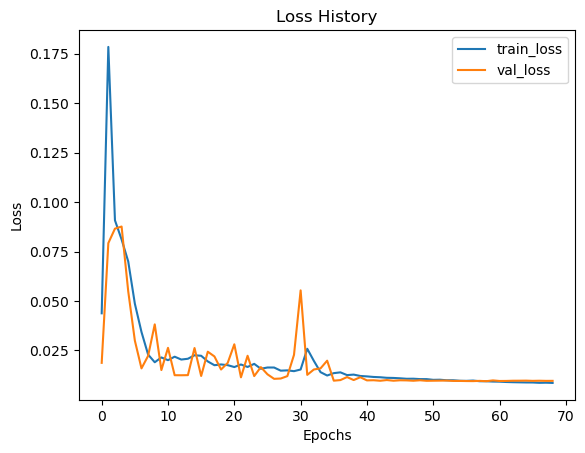

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

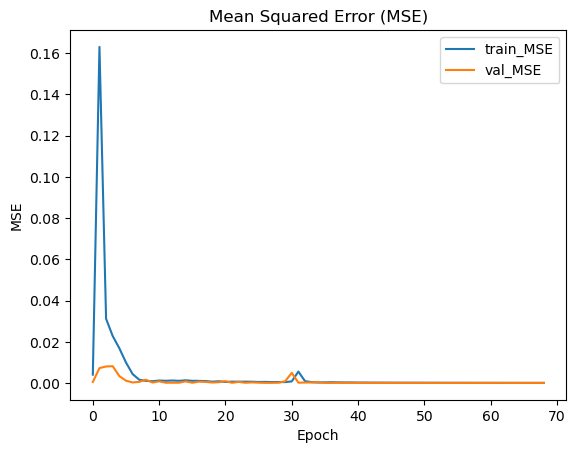

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

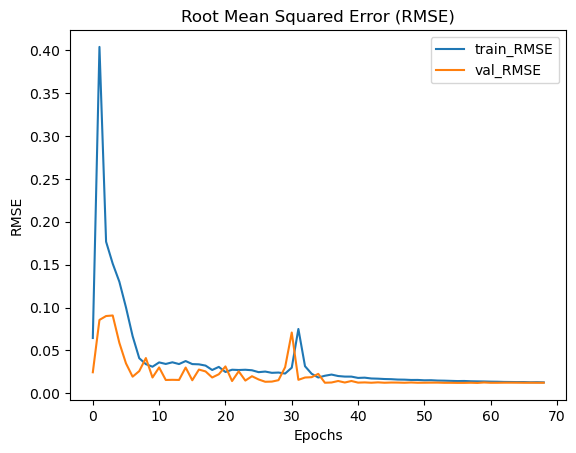

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

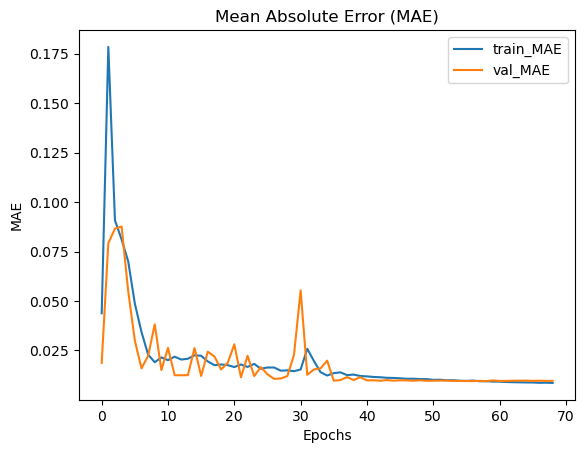

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

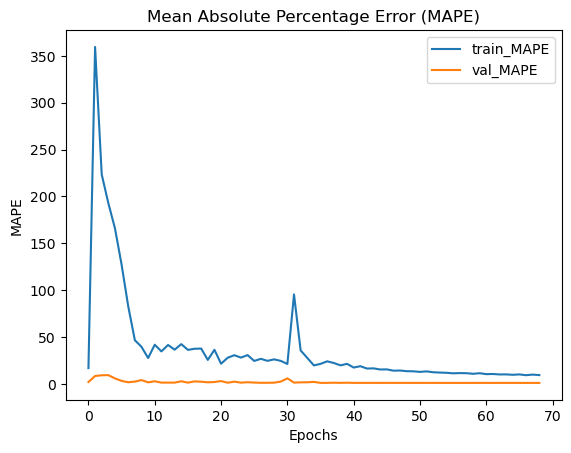

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 22:20:55.830407: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 3)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


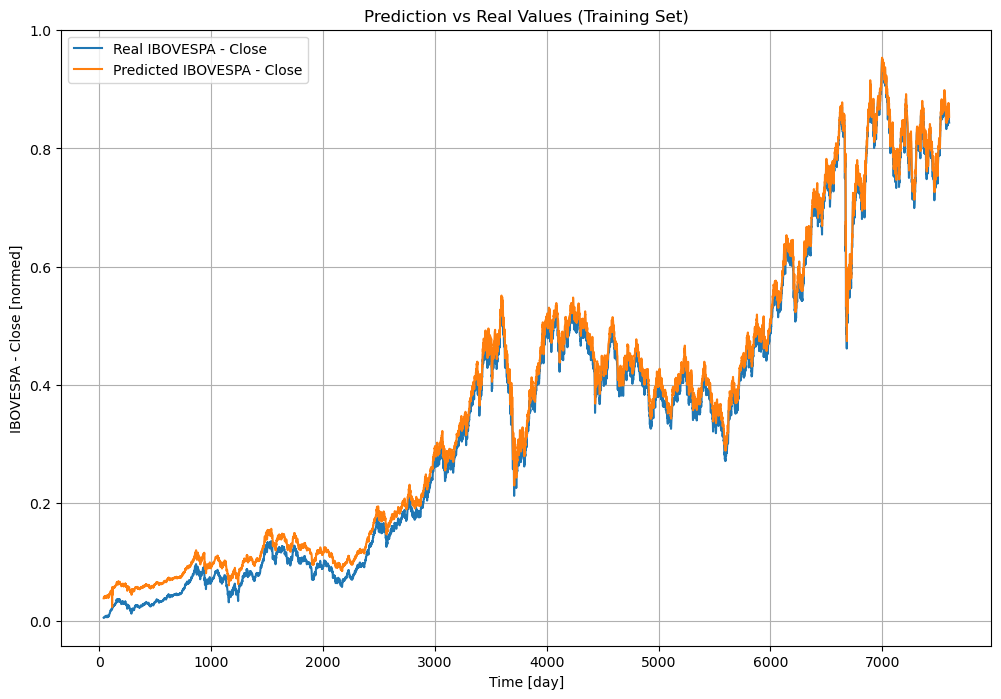

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 3)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


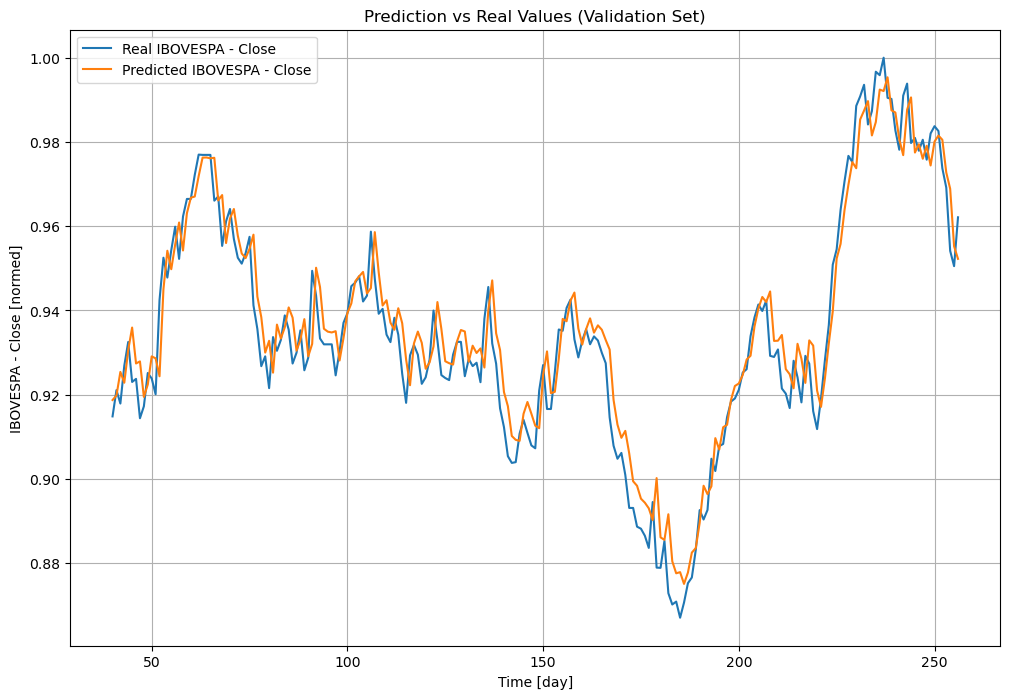

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 3)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


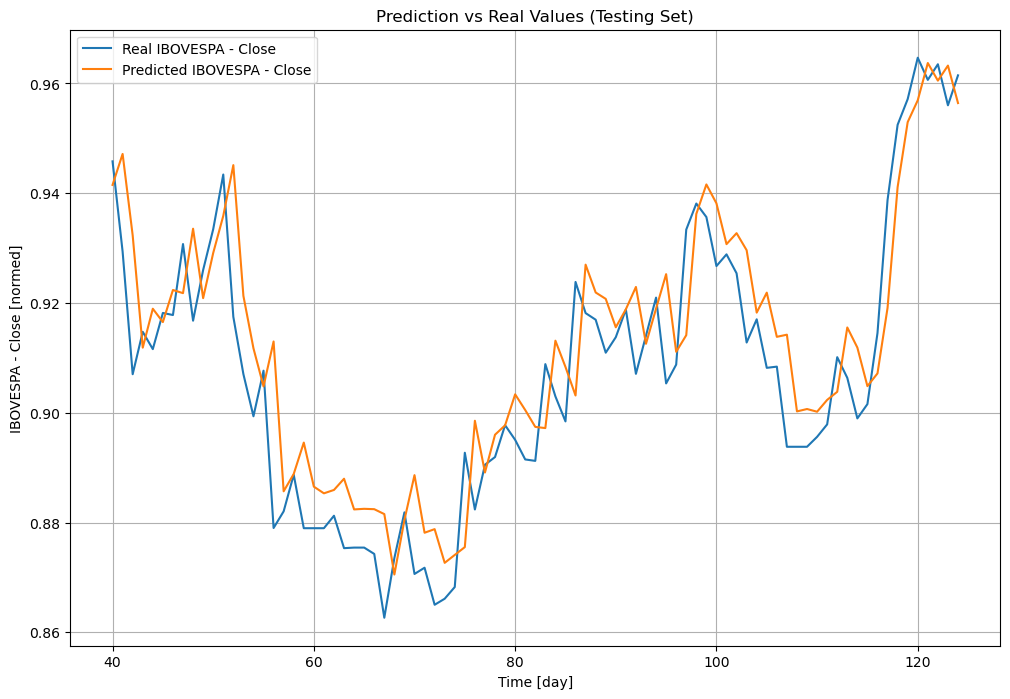

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

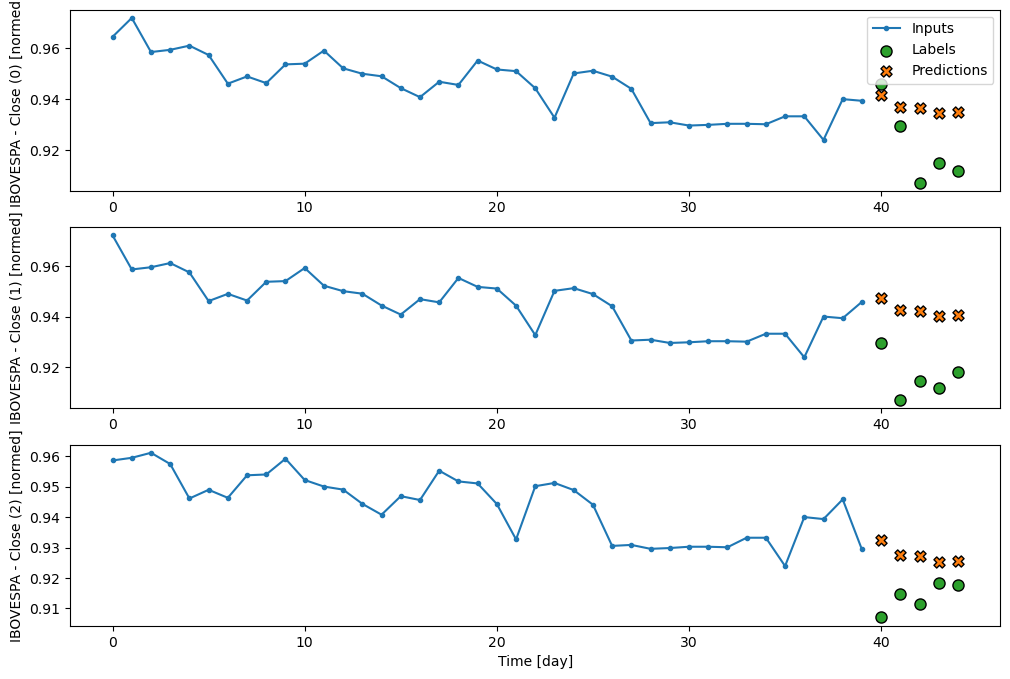

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:9m:27s:679ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step


array([[[0.9415138 , 0.9415138 , 0.9415138 , ..., 0.9415138 ,
         0.9415138 , 0.9415138 ],
        [0.9369426 , 0.9369426 , 0.9369426 , ..., 0.9369426 ,
         0.9369426 , 0.9369426 ],
        [0.93654764, 0.93654764, 0.93654764, ..., 0.93654764,
         0.93654764, 0.93654764],
        [0.9344357 , 0.9344357 , 0.9344357 , ..., 0.9344357 ,
         0.9344357 , 0.9344357 ],
        [0.9348459 , 0.9348459 , 0.9348459 , ..., 0.9348459 ,
         0.93501294, 0.93501294]],

       [[0.94716   , 0.94716   , 0.94716   , ..., 0.94716   ,
         0.94716   , 0.94716   ],
        [0.94272566, 0.94272566, 0.94272566, ..., 0.94272566,
         0.94272566, 0.94272566],
        [0.94213104, 0.94213104, 0.94213104, ..., 0.94213104,
         0.94213104, 0.94213104],
        [0.94014394, 0.94014394, 0.94014394, ..., 0.94014394,
         0.94014394, 0.94014394],
        [0.9405389 , 0.9405389 , 0.9405389 , ..., 0.9405389 ,
         0.94070446, 0.94070446]],

       [[0.9323275 , 0.9323275 , 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')